# Loan Default Risk Analysis Project

## Project Overview
This project analyzes a bank's customer loan data to identify key predictors of loan default. By analyzing behavioral and financial attributes, the aim is to provide insights for reducing loan default risks. The project follows an end-to-end EDA approach, using a publicly available dataset from Kaggle (https://www.kaggle.com/datasets/gauravduttakiit/loan-defaulter?select=previous_application.csv).

## Problem Statement
Loan defaults pose a significant risk for banks, leading to financial losses and operational challenges. Understanding the characteristics associated with defaults helps banks to mitigate risks and make informed lending decisions. This project focuses on exploring patterns and deriving insights to help banks refine customer screening and loan approval criteria.

## Project Structure and Methodology

### 1. Data Import and Basic Exploration
   - **Data Loading:** Import required libraries and load loan dataset
   - **Initial Inspection:** Examine data structure, dimensions, and columns
   - **Feature Overview:** Review available features for analysis

### 2. Feature Exploration and Selection
   - **Column Analysis:** Identify and understand available features
   - **Missing Values Analysis:** 
     - Analyze missing data patterns
     - Export missing values data for reference
     - Remove columns with excessive missing values (≥40%)
   - **Feature Selection:**
     - FLAG columns identification and analysis
     - External source features analysis
     - Social circle columns removal
     - Weekday process start removal

### 3. Missing Value Analysis & Imputation
   - **Missing Values Calculation:** Calculate percentage of missing values per column
   - **Imputation Strategy:**
     - CNT_FAM_MEMBERS: Mode imputation
     - OCCUPATION_TYPE: Mode imputation
     - NAME_TYPE_SUITE: Mode imputation
     - AMT_ANNUITY: Mean imputation
     - Credit Bureau Request Features: Median imputation

### 4. Value Modification
   - **DAYS Columns:** Convert negative values to positive for better interpretability

### 5. Outlier Detection and Binning
   - **Binning Implementation:**
     - AMT_GOODS_PRICE: Price range categorization
     - AMT_INCOME_TOTAL: Income bracket segmentation
     - AMT_CREDIT: Credit amount range definition
     - AMT_ANNUITY: Annuity range categorization
     - DAYS_EMPLOYED: Employment duration grouping
     - DAYS_BIRTH: Age group categorization

### 6. Data Analysis
   - **Univariate Analysis and Bivariate Analysis:**
     - Categorical features distribution analysis
     - Contract type analysis and relationship with defaults
     - Demographic feature analysis
     - Financial metrics distribution study

## Project Findings and Recommendations
[To be completed after analysis]

## Summary
This project provides a comprehensive analysis of loan default risk factors, offering actionable insights for banks to refine their lending strategies. By focusing on data-driven insights, this analysis aids financial institutions in making informed decisions that reduce default risks and improve loan outcomes.

### 1. Data Import and and basic exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import mannwhitneyu, chi2_contingency

import warnings
warnings.filterwarnings('ignore')

In [2]:
app = pd.read_csv('application_data.csv')
prev_app = pd.read_csv('previous_application.csv')

In [3]:
app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

### 2. Feature Exploration and Selection

In [4]:
app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [5]:
app.shape

(307511, 122)

#### Missing Values Analysis

This section analyzes and visualizes missing data to ensure data completeness and quality for further processing. Key takeaways:

- **Total Missing Values**: Quantifies missing values in each column to understand data gaps.
- **Data Type Identification**: Provides the data type of each column, aiding in selecting appropriate imputation strategies.
- **Missing Data Visualization**: Plots missing values by column to highlight columns requiring data treatment.
- **Summary Statistics**: Quickly identifies columns with extensive or minimal missing data to inform preprocessing priorities.


In [6]:
# Missing Values Analysis Functions
def analyze_missing_values(df):
    """
    Analyze missing values in a dataframe and return detailed information
    
    Parameters:
    df (pandas.DataFrame): Input dataframe to analyze
    
    Returns:
    pandas.DataFrame: DataFrame containing missing value analysis
    """
    # Calculate missing values statistics
    missing_stats = pd.DataFrame({
        'Total_Missing': df.isnull().sum(),
        'Percent_Missing': df.isnull().sum() / len(df) * 100
    })
    
    # Add data type information
    missing_stats['Data_Type'] = df.dtypes
    
    # Sort by percentage of missing values in descending order
    missing_stats = missing_stats.sort_values('Percent_Missing', ascending=False)
    
    # Add a flag for columns with missing values
    missing_stats['Has_Missing'] = missing_stats['Total_Missing'] > 0
    
    return missing_stats

def plot_missing_values(missing_stats, threshold=0):
    """
    Create a visualization of missing values
    
    Parameters:
    missing_stats (pandas.DataFrame): Output from analyze_missing_values function
    threshold (float): Only plot columns with missing values above this percentage
    """
    # Filter based on threshold
    plot_data = missing_stats[missing_stats['Percent_Missing'] > threshold]
    
    plt.figure(figsize=(15, 8))
    plt.bar(range(len(plot_data)), plot_data['Percent_Missing'])
    plt.xticks(range(len(plot_data)), plot_data.index, rotation=90)
    plt.xlabel('Columns')
    plt.ylabel('Percentage of Missing Values')
    plt.title('Percentage of Missing Values by Column')
    plt.tight_layout()
    
    return plt

# Function to get a summary of missing values
def get_missing_summary(missing_stats):
    """
    Generate a summary of missing values analysis
    
    Parameters:
    missing_stats (pandas.DataFrame): Output from analyze_missing_values function
    
    Returns:
    dict: Summary statistics about missing values
    """
    return {
        'columns_with_missing': missing_stats['Has_Missing'].sum(),
        'columns_without_missing': (~missing_stats['Has_Missing']).sum(),
        'total_columns': len(missing_stats),
        'columns_over_50_percent': (missing_stats['Percent_Missing'] > 50).sum(),
        'columns_over_30_percent': (missing_stats['Percent_Missing'] > 30).sum(),
        'columns_under_5_percent': (missing_stats['Percent_Missing'] <= 5).sum()
    }

Missing Values Summary:
Total columns: 122
Columns with missing values: 67
Columns without missing values: 55
Columns with >50% missing: 41
Columns with >30% missing: 50
Columns with ≤5% missing: 65

Detailed view of columns with missing values:
                              Total_Missing  Percent_Missing Data_Type  Has_Missing
COMMONAREA_MEDI                      214865        69.872297   float64         True
COMMONAREA_AVG                       214865        69.872297   float64         True
COMMONAREA_MODE                      214865        69.872297   float64         True
NONLIVINGAPARTMENTS_MODE             213514        69.432963   float64         True
NONLIVINGAPARTMENTS_AVG              213514        69.432963   float64         True
NONLIVINGAPARTMENTS_MEDI             213514        69.432963   float64         True
FONDKAPREMONT_MODE                   210295        68.386172    object         True
LIVINGAPARTMENTS_MODE                210199        68.354953   float64         Tru

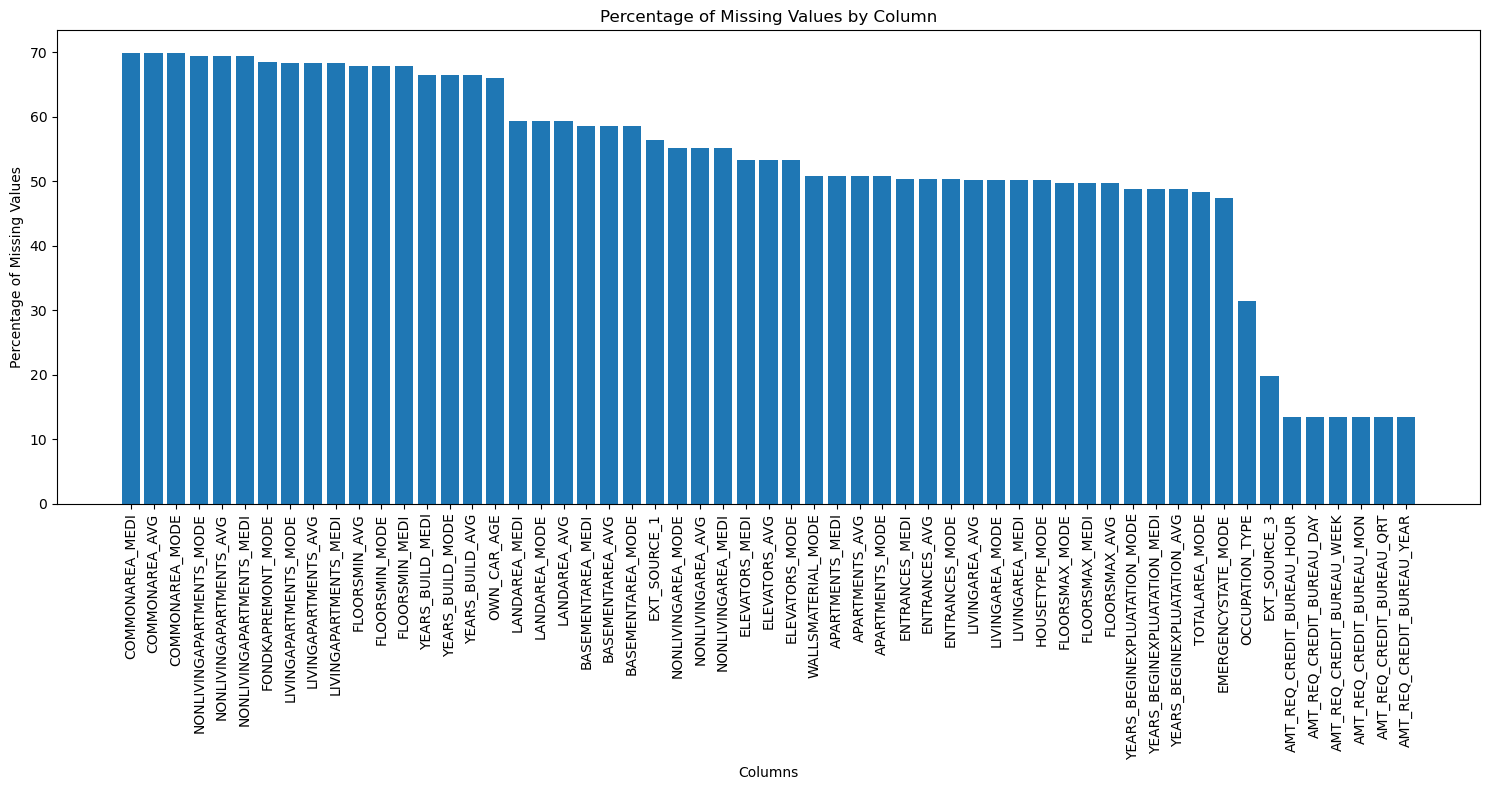

In [7]:
# Analyze missing values in the application data
missing_analysis = analyze_missing_values(app)

# Print summary statistics
summary = get_missing_summary(missing_analysis)

print("Missing Values Summary:")
print(f"Total columns: {summary['total_columns']}")
print(f"Columns with missing values: {summary['columns_with_missing']}")
print(f"Columns without missing values: {summary['columns_without_missing']}")
print(f"Columns with >50% missing: {summary['columns_over_50_percent']}")
print(f"Columns with >30% missing: {summary['columns_over_30_percent']}")
print(f"Columns with ≤5% missing: {summary['columns_under_5_percent']}")

# Display columns with missing values and their percentages
print("\nDetailed view of columns with missing values:")
print(missing_analysis[missing_analysis['Has_Missing']].to_string())

# Create visualization
plot_missing_values(missing_analysis, threshold=5)
plt.show()

#### Missing Values Export
- **Purpose:** Exporting missing values data to Excel enables a clear, shareable reference for data quality.
- **File Path:** save file to the desired path for offline analysis.
- **Outcome:** The Excel file captures all columns' missing value counts and types, supporting transparency and data cleaning planning.

In [8]:
# Get the missing values analysis
missing_info = analyze_missing_values(app)

# Export to Excel
# file_path = r"C:\Users\DELL\Desktop\HexSofwares Internship\Task 1\missing_info.xlsx"
# missing_info.to_excel(file_path)

# print(f"File has been exported successfully to: {file_path}")

#### High Missing Value Columns Removal
- **Purpose:** Optimize data quality by removing columns with excessive missing values (≥40%).
- **Outcome:** Retain only columns with substantial data, enhancing analysis reliability.
- **Columns Removed:** List all columns with ≥40% missing values for transparency and reference.

In [9]:
# Calculate the threshold based on dataset size
threshold = 40  # 40% threshold
rows_in_dataset = len(app)
missing_threshold = (threshold/100) * rows_in_dataset

# Create new dataframe without columns having ≥40% missing values
cleaned_application_data = app.loc[:, app.isnull().sum() < missing_threshold]

# Check the shapes to understand how many columns were removed
print("Original dataset shape:", app.shape)
print("Cleaned dataset shape:", cleaned_application_data.shape)

# Calculate how many columns were removed
columns_removed = app.shape[1] - cleaned_application_data.shape[1]
print(f"\nNumber of columns removed: {columns_removed}")

# Optionally, you can see which columns were removed
removed_columns = app.columns[app.isnull().sum() >= missing_threshold].tolist()
print("\nColumns removed due to ≥40% missing values:")
for col in removed_columns:
    missing_percentage = (app[col].isnull().sum() / len(app) * 100).round(2)
    print(f"- {col}: {missing_percentage}% missing")

Original dataset shape: (307511, 122)
Cleaned dataset shape: (307511, 73)

Number of columns removed: 49

Columns removed due to ≥40% missing values:
- OWN_CAR_AGE: 65.99% missing
- EXT_SOURCE_1: 56.38% missing
- APARTMENTS_AVG: 50.75% missing
- BASEMENTAREA_AVG: 58.52% missing
- YEARS_BEGINEXPLUATATION_AVG: 48.78% missing
- YEARS_BUILD_AVG: 66.5% missing
- COMMONAREA_AVG: 69.87% missing
- ELEVATORS_AVG: 53.3% missing
- ENTRANCES_AVG: 50.35% missing
- FLOORSMAX_AVG: 49.76% missing
- FLOORSMIN_AVG: 67.85% missing
- LANDAREA_AVG: 59.38% missing
- LIVINGAPARTMENTS_AVG: 68.35% missing
- LIVINGAREA_AVG: 50.19% missing
- NONLIVINGAPARTMENTS_AVG: 69.43% missing
- NONLIVINGAREA_AVG: 55.18% missing
- APARTMENTS_MODE: 50.75% missing
- BASEMENTAREA_MODE: 58.52% missing
- YEARS_BEGINEXPLUATATION_MODE: 48.78% missing
- YEARS_BUILD_MODE: 66.5% missing
- COMMONAREA_MODE: 69.87% missing
- ELEVATORS_MODE: 53.3% missing
- ENTRANCES_MODE: 50.35% missing
- FLOORSMAX_MODE: 49.76% missing
- FLOORSMIN_MODE: 

#### FLAG Columns Identification
- **Purpose:** Isolate FLAG columns, which indicate binary characteristics within the dataset.
- **Outcome:** FLAG columns listed for potential analysis of binary patterns in customer behavior or attributes.

In [10]:
# Investigate all the columns that start with FLAG and create a list of those columns
flag_col_list = [col for col in cleaned_application_data.columns if col.startswith('FLAG')]

# Print the list and count
print(f"Number of FLAG columns: {len(flag_col_list)}")
print("\nList of FLAG columns:")
for col in flag_col_list:
    print(f"- {col}")
    
print("\nView of first 5 rows of the listed columns")
cleaned_application_data[flag_col_list].head()

Number of FLAG columns: 28

List of FLAG columns:
- FLAG_OWN_CAR
- FLAG_OWN_REALTY
- FLAG_MOBIL
- FLAG_EMP_PHONE
- FLAG_WORK_PHONE
- FLAG_CONT_MOBILE
- FLAG_PHONE
- FLAG_EMAIL
- FLAG_DOCUMENT_2
- FLAG_DOCUMENT_3
- FLAG_DOCUMENT_4
- FLAG_DOCUMENT_5
- FLAG_DOCUMENT_6
- FLAG_DOCUMENT_7
- FLAG_DOCUMENT_8
- FLAG_DOCUMENT_9
- FLAG_DOCUMENT_10
- FLAG_DOCUMENT_11
- FLAG_DOCUMENT_12
- FLAG_DOCUMENT_13
- FLAG_DOCUMENT_14
- FLAG_DOCUMENT_15
- FLAG_DOCUMENT_16
- FLAG_DOCUMENT_17
- FLAG_DOCUMENT_18
- FLAG_DOCUMENT_19
- FLAG_DOCUMENT_20
- FLAG_DOCUMENT_21

View of first 5 rows of the listed columns


FLAG_OWN_CAR FLAG_OWN_REALTY  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            N               Y           1               1                0   
1            N               N           1               1                0   
2            Y               Y           1               1                1   
3            N               Y           1               1                0   
4            N               Y           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
0                 1           1           0                0                1   
1                 1           1           0                0                1   
2                 1           1           0                0                0   
3                 1           0           0                0                1   
4                 1           0           0                0                0   

   ...  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  \
0  ...                 0                 0                 0   
1  ...                 0                 0                 0   
2  ...                 0                 0                 0   
3  ...                 0                 0                 0   
4  ...                 0                 0                 0   

   FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  
0                 0                 0                 0  
1                 0                 0                 0  
2                 0                 0                 0  
3                 0                 0                 0  
4                 0                 0                 0  

[5 rows x 28 columns]

#### FLAG Columns and TARGET Subset Creation
- **Purpose:** Focus analysis on binary indicators (`FLAG` columns) and the `TARGET` variable to explore their relationship with loan default status.
- **Outcome:** Create a subset containing only `FLAG` columns and the `TARGET` column for targeted analysis of binary features.
- **Details:** Confirm the shape of the new DataFrame and display the first few rows for validation.


In [11]:
# Create list of columns we want (FLAG columns + TARGET)
columns_needed = flag_col_list + ['TARGET']

# Create new dataframe with selected columns
flag_target_columns = cleaned_application_data[columns_needed]

# View the head of the new dataframe
print("Shape of flag_target_columns:", flag_target_columns.shape)
print("\nFirst few rows of the dataframe:")
flag_target_columns.head()

Shape of flag_target_columns: (307511, 29)

First few rows of the dataframe:


FLAG_OWN_CAR FLAG_OWN_REALTY  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            N               Y           1               1                0   
1            N               N           1               1                0   
2            Y               Y           1               1                1   
3            N               Y           1               1                0   
4            N               Y           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
0                 1           1           0                0                1   
1                 1           1           0                0                1   
2                 1           1           0                0                0   
3                 1           0           0                0                1   
4                 1           0           0                0                0   

   ...  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  \
0  ...                 0                 0                 0   
1  ...                 0                 0                 0   
2  ...                 0                 0                 0   
3  ...                 0                 0                 0   
4  ...                 0                 0                 0   

   FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  TARGET  
0                 0                 0       1  
1                 0                 0       0  
2                 0                 0       0  
3                 0                 0       0  
4                 0                 0       0  

[5 rows x 29 columns]

#### FLAG Features vs TARGET Relationship Analysis
- **Purpose:** Investigate the relationship between each `FLAG` feature and `TARGET` (loan default), focusing on how these binary characteristics influence default likelihood.
- **Outcome:** Visualizations and statistical insights provide a clearer view of which flags correlate with higher or lower default rates.
- **Observations:** For each `FLAG` feature, distributions and default rates highlight potential risk indicators useful for profiling at-risk clients.

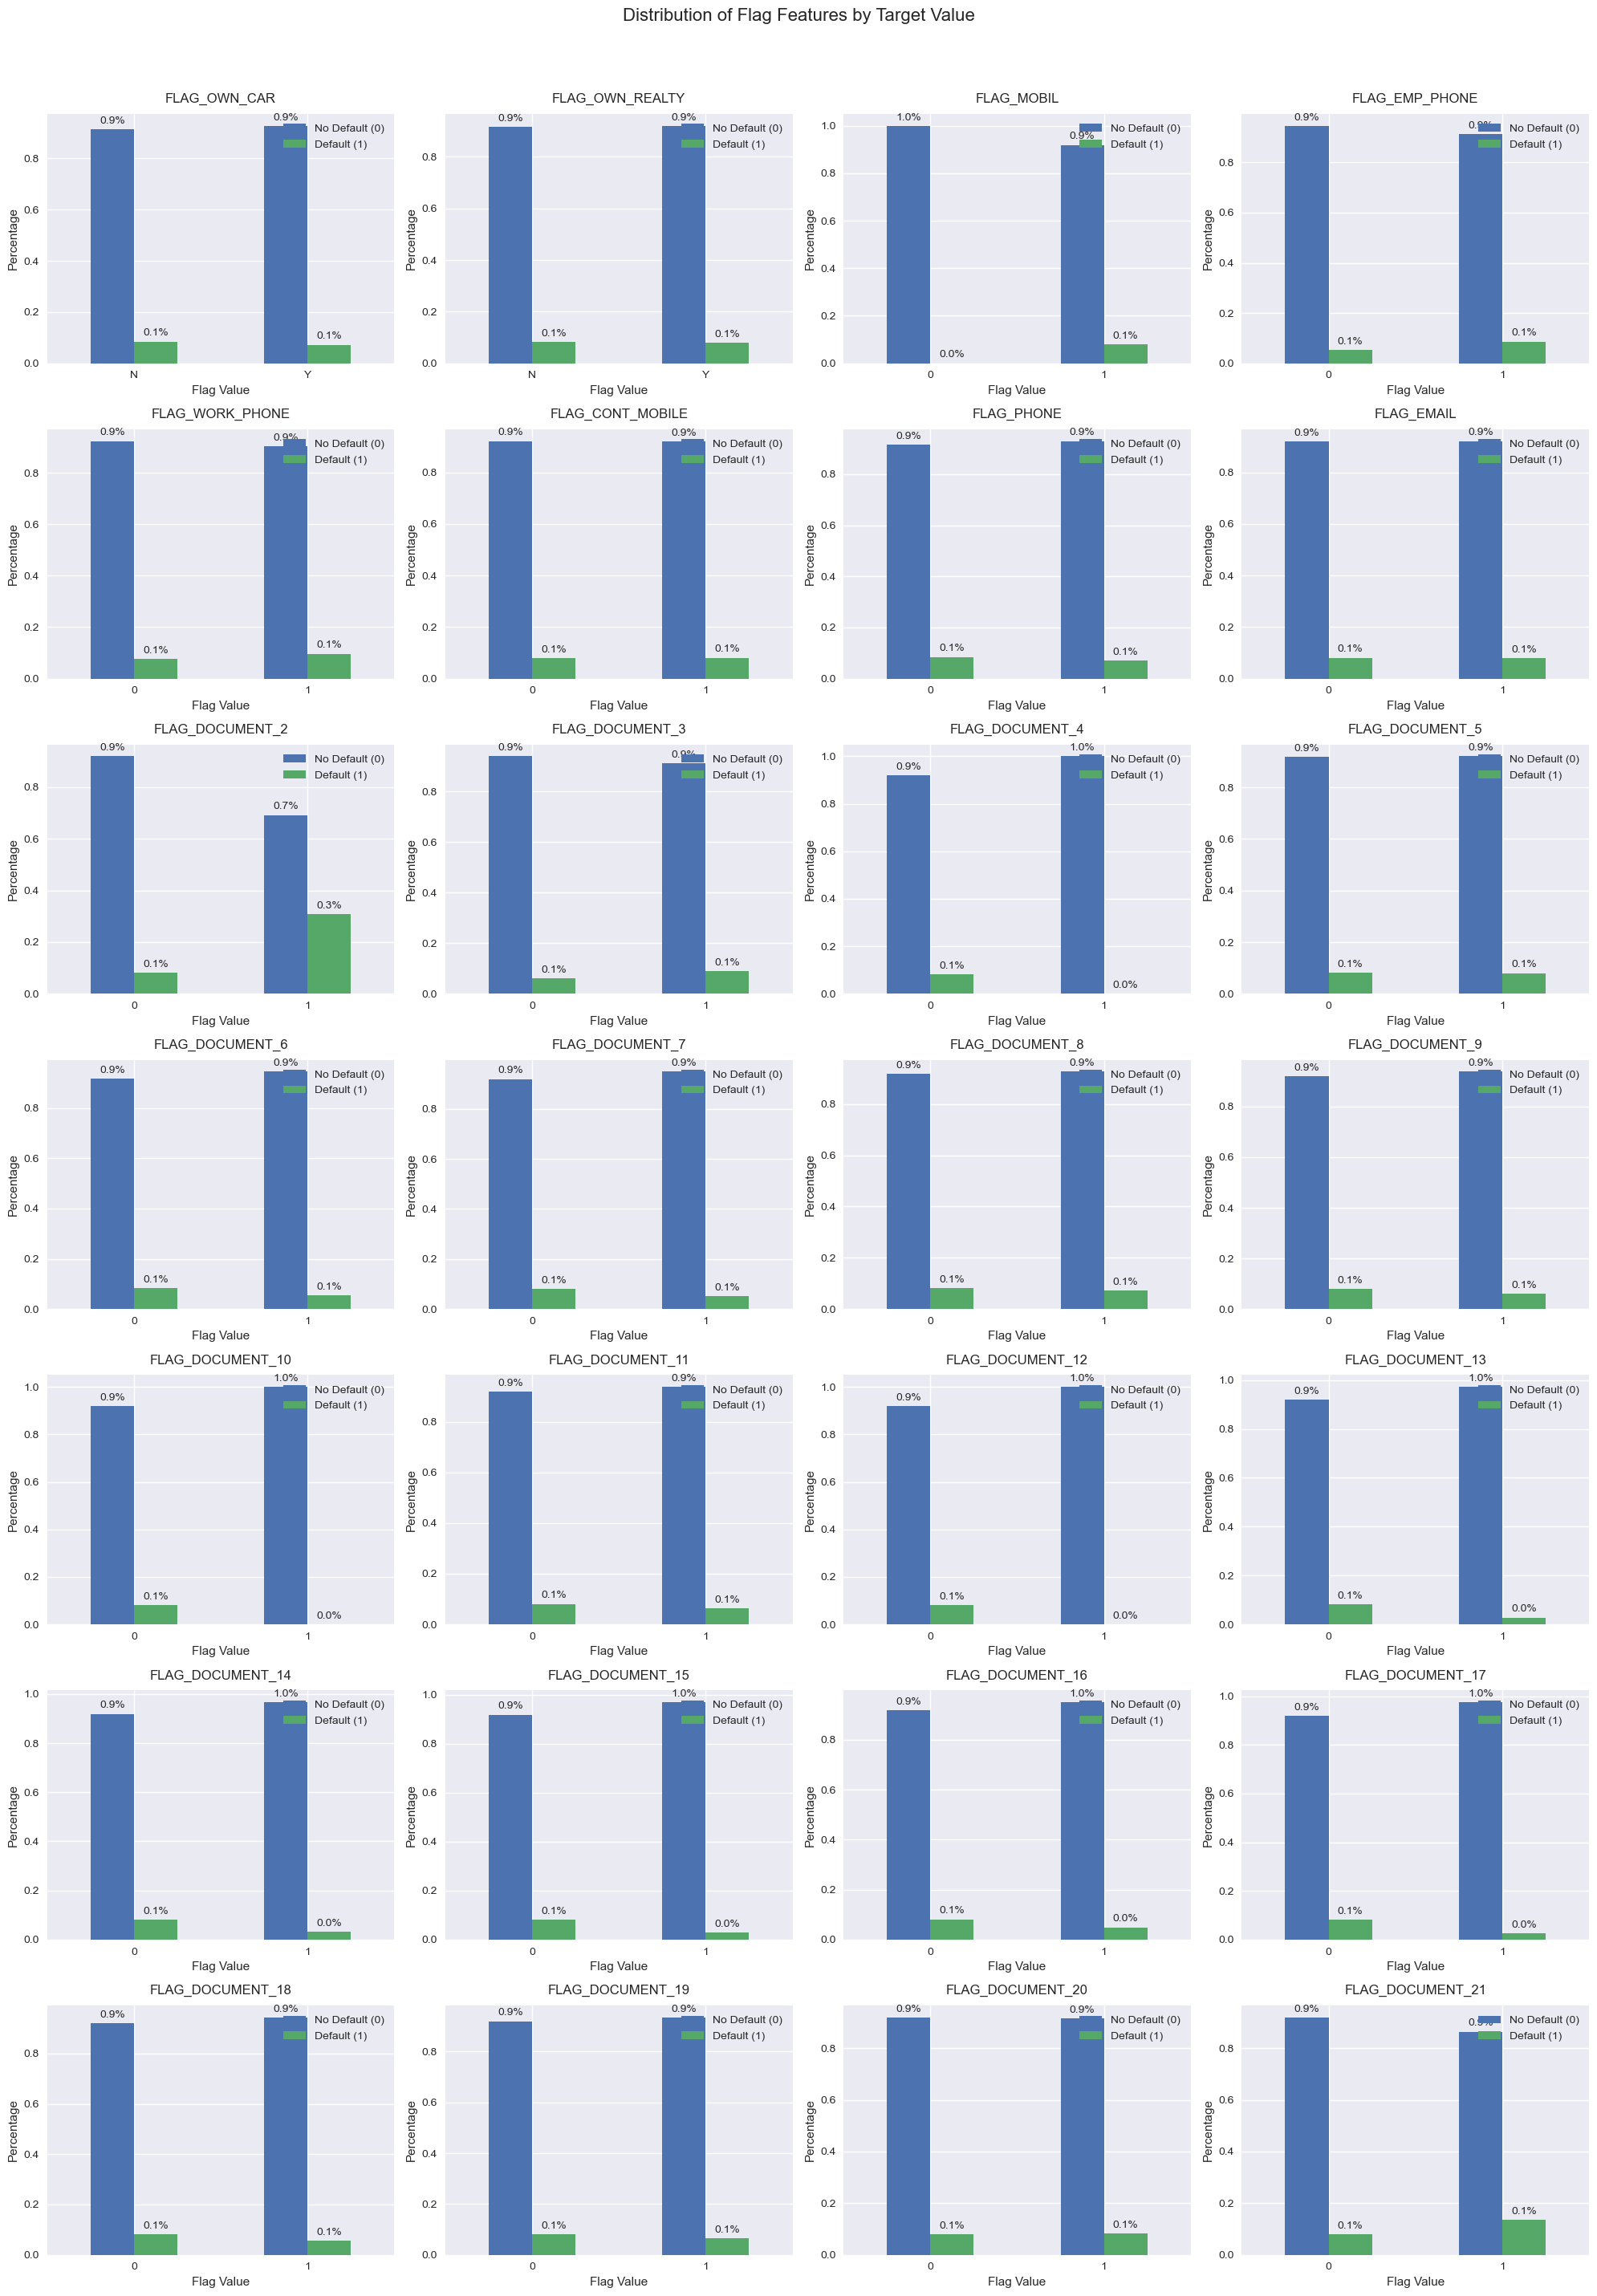


Statistical Insights:

FLAG_OWN_CAR:
Flag value N: 8.50% default rate
Flag value Y: 7.24% default rate

FLAG_OWN_REALTY:
Flag value N: 8.32% default rate
Flag value Y: 7.96% default rate

FLAG_MOBIL:
Flag value 0: 0.00% default rate
Flag value 1: 8.07% default rate

FLAG_EMP_PHONE:
Flag value 0: 5.40% default rate
Flag value 1: 8.66% default rate

FLAG_WORK_PHONE:
Flag value 0: 7.69% default rate
Flag value 1: 9.63% default rate

FLAG_CONT_MOBILE:
Flag value 0: 7.84% default rate
Flag value 1: 8.07% default rate

FLAG_PHONE:
Flag value 0: 8.48% default rate
Flag value 1: 7.04% default rate

FLAG_EMAIL:
Flag value 0: 8.08% default rate
Flag value 1: 7.88% default rate

FLAG_DOCUMENT_2:
Flag value 0: 8.07% default rate
Flag value 1: 30.77% default rate

FLAG_DOCUMENT_3:
Flag value 0: 6.18% default rate
Flag value 1: 8.84% default rate

FLAG_DOCUMENT_4:
Flag value 0: 8.07% default rate
Flag value 1: 0.00% default rate

FLAG_DOCUMENT_5:
Flag value 0: 8.07% default rate
Flag value 1: 8.00%

In [12]:
def plot_flag_target_relationships(data, flag_columns, n_cols=4):
    """
    Plot the relationship between flag features and target variable
    
    Parameters:
    data (pandas.DataFrame): DataFrame containing flag features and target
    flag_columns (list): List of flag column names
    n_cols (int): Number of columns in the subplot grid
    """
    # Calculate number of rows needed
    n_rows = (len(flag_columns) + n_cols - 1) // n_cols
    
    # Create figure and subplots
    plt.style.use('seaborn')
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4*n_rows))
    fig.suptitle('Distribution of Flag Features by Target Value', fontsize=16, y=1.02)
    
    # Flatten axes array for easier iteration
    axes_flat = axes.flatten()
    
    # Plot each feature
    for idx, feature in enumerate(flag_columns):
        if feature != 'TARGET':
            # Calculate percentages for each category
            props = data.groupby(feature)['TARGET'].value_counts(normalize=True).unstack()
            
            # Create bar plot
            ax = axes_flat[idx]
            props.plot(kind='bar', ax=ax)
            
            # Customize plot
            ax.set_title(f'{feature}', pad=10)
            ax.set_xlabel('Flag Value')
            ax.set_ylabel('Percentage')
            ax.legend(['No Default (0)', 'Default (1)'])
            
            # Add percentage labels on bars
            for i in ax.containers:
                ax.bar_label(i, fmt='%.1f%%', padding=3)
                
            # Rotate x-axis labels
            ax.tick_params(axis='x', rotation=0)
            
    # Remove empty subplots if any
    for idx in range(len(flag_columns), len(axes_flat)):
        fig.delaxes(axes_flat[idx])
    
    # Adjust layout
    plt.tight_layout()
    return fig

# Create the visualization
fig = plot_flag_target_relationships(flag_target_columns, flag_col_list)
plt.show()

# Calculate and print some statistical insights
print("\nStatistical Insights:")
for flag in flag_col_list:
    # Calculate default rates for each flag value
    default_rates = flag_target_columns.groupby(flag)['TARGET'].mean() * 100
    print(f"\n{flag}:")
    for flag_value, default_rate in default_rates.items():
        print(f"Flag value {flag_value}: {default_rate:.2f}% default rate")

#### Correlation Analysis and Default Rates of Selected FLAG Features
- **Purpose:** Assess correlations between selected `FLAG` features and the `TARGET` variable to identify potential indicators of loan default.
- **Outcome:** Correlation heatmap and calculated default rates for each `FLAG` feature value provide insight into which characteristics may signal higher default risk.
- **Statistical Findings:** Default rates by flag value reveal default likelihood for different client characteristics, helping refine risk assessment and client profiling.

Correlations with TARGET variable:
TARGET              1.000000
FLAG_EMP_PHONE      0.045982
FLAG_WORK_PHONE     0.028524
FLAG_MOBIL          0.000534
FLAG_CONT_MOBILE    0.000370
FLAG_EMAIL         -0.001758
FLAG_OWN_REALTY    -0.006148
FLAG_OWN_CAR       -0.021851
FLAG_PHONE         -0.023806
Name: TARGET, dtype: float64


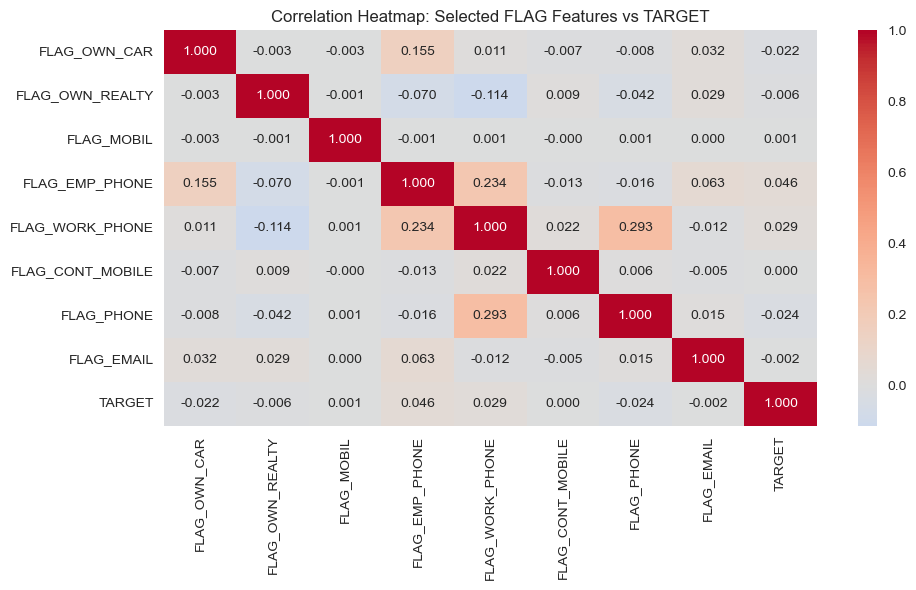

In [13]:
# Create a list of the specific flag features we want to analyze
selected_flags = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 
                 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'TARGET']

# Create a dataframe with only these features
selected_flag_df = cleaned_application_data[selected_flags].copy()

# Convert Y/N to 1/0 for relevant columns
for col in selected_flag_df.columns:
    if selected_flag_df[col].dtype == 'object':
        selected_flag_df[col] = selected_flag_df[col].map({'Y': 1, 'N': 0})

# Calculate correlations
correlations = selected_flag_df.corr()['TARGET'].sort_values(ascending=False)

# Print correlations with TARGET
print("Correlations with TARGET variable:")
print(correlations)

# Create a heatmap visualization
plt.figure(figsize=(10, 6))
sns.heatmap(selected_flag_df.corr(), annot=True, cmap='coolwarm', center=0, fmt='.3f')
plt.title('Correlation Heatmap: Selected FLAG Features vs TARGET')
plt.tight_layout()
plt.show()

#### Removal of FLAG Columns
- **Purpose:** Exclude `FLAG` columns to focus on non-binary features for further analysis.
- **Outcome:** Reduced dataset size by removing columns with binary flags, retaining only essential features for deeper exploration.
- **Verification:** Ensured all specified `FLAG` columns were removed, confirming a refined dataset for advanced analysis.

In [14]:
# Create new dataframe without the flag columns
# Note: We keep 'TARGET' as it's typically needed for analysis
cleaned_application_data = cleaned_application_data.drop(columns=flag_col_list)

# Print shape to confirm the removal
print("Dataset shape after removing flag columns:", cleaned_application_data.shape)

# Optionally, verify the columns were removed
remaining_flags = [col for col in flag_col_list if col in cleaned_application_data.columns]
if not remaining_flags:
    print("\nAll flag columns successfully removed.")
else:
    print("\nWarning: The following flag columns are still present:", remaining_flags)
    
print("\nCleaned dataframe without the flag columns:")
cleaned_application_data.head()

Dataset shape after removing flag columns: (307511, 45)

All flag columns successfully removed.

Cleaned dataframe without the flag columns:


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             0   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE  \
0          202500.0    406597.5      24700.5         351000.0   Unaccompanied   
1          270000.0   1293502.5      35698.5        1129500.0          Family   
2           67500.0    135000.0       6750.0         135000.0   Unaccompanied   
3          135000.0    312682.5      29686.5         297000.0   Unaccompanied   
4          121500.0    513000.0      21865.5         513000.0   Unaccompanied   

   ... DEF_30_CNT_SOCIAL_CIRCLE OBS_60_CNT_SOCIAL_CIRCLE  \
0  ...                      2.0                      2.0   
1  ...                      0.0                      1.0   
2  ...                      0.0                      0.0   
3  ...                      0.0                      2.0   
4  ...                      0.0                      0.0   

  DEF_60_CNT_SOCIAL_CIRCLE DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
0                      2.0                -1134.0                         0.0   
1                      0.0                 -828.0                         0.0   
2                      0.0                 -815.0                         0.0   
3                      0.0                 -617.0                         NaN   
4                      0.0                -1106.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                        0.0                         0.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        NaN                         NaN   
4                        0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        NaN                        NaN   
4                        0.0                        0.0   

  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        1.0  
1                        0.0  
2                        0.0  
3                        NaN  
4                        0.0  

[5 rows x 45 columns]

#### Analysis of External Source Features
- **Purpose:** Evaluate the relationship between external data sources (`EXT_SOURCE_2`, `EXT_SOURCE_3`) and `TARGET` to assess their predictive value.
- **Correlation Analysis:**
  - Calculate correlations between external source features and `TARGET` to understand their individual impacts on default probability.
  - Incorporate a heatmap visualization to provide an overview of feature interactions with `TARGET`.
- **Statistical Summary:** 
  - Display statistical summaries for `EXT_SOURCE_2` and `EXT_SOURCE_3` to understand data distribution and potential outliers.
- **Quartile Analysis:** 
  - Group external source values into quartiles, then computed default rates per quartile.
  - Insights from quartile-based analysis can reveal whether higher or lower values in these features correlate with default risk.

Correlations with TARGET variable:
TARGET          1.000000
EXT_SOURCE_2   -0.160472
EXT_SOURCE_3   -0.178919
Name: TARGET, dtype: float64


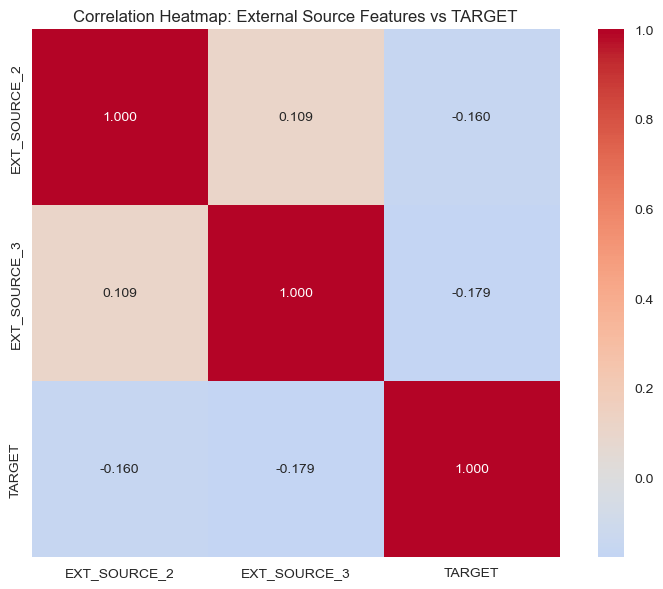


Statistical Summary for External Source Features:
       EXT_SOURCE_2   EXT_SOURCE_3         TARGET
count  3.068510e+05  246546.000000  307511.000000
mean   5.143927e-01       0.510853       0.080729
std    1.910602e-01       0.194844       0.272419
min    8.173617e-08       0.000527       0.000000
25%    3.924574e-01       0.370650       0.000000
50%    5.659614e-01       0.535276       0.000000
75%    6.636171e-01       0.669057       0.000000
max    8.549997e-01       0.896010       1.000000

Default rates by EXT_SOURCE_2 quartiles:
                            mean  count
EXT_SOURCE_2_quartile                  
Q1                     14.294280  76716
Q2                      8.174945  76710
Q3                      6.019840  76713
Q4                      3.803838  76712

Default rates by EXT_SOURCE_3 quartiles:
                            mean  count
EXT_SOURCE_3_quartile                  
Q1                     15.056539  61993
Q2                      7.510100  61384
Q3             

In [15]:
# Select the columns we want to analyze
ext_source_cols = ['EXT_SOURCE_2', 'EXT_SOURCE_3', 'TARGET']
ext_source_df = cleaned_application_data[ext_source_cols].copy()

# Calculate correlations
correlations = ext_source_df.corr()['TARGET'].sort_values(ascending=False)

# Print correlations with TARGET
print("Correlations with TARGET variable:")
print(correlations)

# Create a heatmap visualization
plt.figure(figsize=(8, 6))
sns.heatmap(ext_source_df.corr(), 
            annot=True,  # Show correlation values
            cmap='coolwarm',  # Color scheme
            center=0,  # Center the colormap at 0
            fmt='.3f',  # Format numbers to 3 decimal places
            square=True)  # Make cells square

plt.title('Correlation Heatmap: External Source Features vs TARGET')
plt.tight_layout()
plt.show()

# Additional statistical summary
print("\nStatistical Summary for External Source Features:")
print(ext_source_df.describe())

# Calculate default rates by EXT_SOURCE quartiles
for col in ['EXT_SOURCE_2', 'EXT_SOURCE_3']:
    print(f"\nDefault rates by {col} quartiles:")
    # Create quartiles
    ext_source_df[f'{col}_quartile'] = pd.qcut(ext_source_df[col], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
    
    # Calculate default rate by quartile
    default_rates = ext_source_df.groupby(f'{col}_quartile')['TARGET'].agg(['mean', 'count'])
    default_rates['mean'] = default_rates['mean'] * 100  # Convert to percentage
    
    print(default_rates)

#### Removal of External Source Columns
- **Purpose:** Streamline dataset by removing `EXT_SOURCE_2` and `EXT_SOURCE_3` columns after completing their analysis.
- **Outcome:** Reduces dataset dimensions, focusing analysis on remaining relevant features.
- **Verification:** Check dataset shape and confirm successful removal of external source columns.

In [16]:
# Define the columns to be dropped
ext_source_cols = ['EXT_SOURCE_2', 'EXT_SOURCE_3']

# Drop the columns
cleaned_application_data = cleaned_application_data.drop(columns=ext_source_cols)

# Print shape to confirm the removal
print("Dataset shape after removing external source columns:", cleaned_application_data.shape)

# Verify the columns were removed
remaining_ext_sources = [col for col in ext_source_cols if col in cleaned_application_data.columns]
if not remaining_ext_sources:
    print("\nExternal source columns successfully removed.")
else:
    print("\nWarning: The following external source columns are still present:", remaining_ext_sources)

# Display the first few columns to verify the changes
print("\nFirst few rows in the updated dataset:")
cleaned_application_data.head()

Dataset shape after removing external source columns: (307511, 43)

External source columns successfully removed.

First few rows in the updated dataset:


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             0   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE  \
0          202500.0    406597.5      24700.5         351000.0   Unaccompanied   
1          270000.0   1293502.5      35698.5        1129500.0          Family   
2           67500.0    135000.0       6750.0         135000.0   Unaccompanied   
3          135000.0    312682.5      29686.5         297000.0   Unaccompanied   
4          121500.0    513000.0      21865.5         513000.0   Unaccompanied   

   ... DEF_30_CNT_SOCIAL_CIRCLE OBS_60_CNT_SOCIAL_CIRCLE  \
0  ...                      2.0                      2.0   
1  ...                      0.0                      1.0   
2  ...                      0.0                      0.0   
3  ...                      0.0                      2.0   
4  ...                      0.0                      0.0   

  DEF_60_CNT_SOCIAL_CIRCLE DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
0                      2.0                -1134.0                         0.0   
1                      0.0                 -828.0                         0.0   
2                      0.0                 -815.0                         0.0   
3                      0.0                 -617.0                         NaN   
4                      0.0                -1106.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                        0.0                         0.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        NaN                         NaN   
4                        0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        NaN                        NaN   
4                        0.0                        0.0   

  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        1.0  
1                        0.0  
2                        0.0  
3                        NaN  
4                        0.0  

[5 rows x 43 columns]

#### Social Circle Columns Removal
- **Objective:** Remove specific social circle columns (`DEF_60_CNT_SOCIAL_CIRCLE`, `OBS_60_CNT_SOCIAL_CIRCLE`, `DEF_30_CNT_SOCIAL_CIRCLE`, `OBS_30_CNT_SOCIAL_CIRCLE`) to streamline the dataset for more relevant analysis.
- **Rationale:** These columns may not significantly impact the main analysis and could introduce unnecessary complexity.
- **Steps:**
  - Define a list of social circle columns targeted for removal.
  - Drop these columns from the dataset and confirm the removal.
  
- **Expected Outcome:** Dataset is streamlined, focusing on features that directly contribute to loan prediction analysis.

In [17]:
# Drop the specified social circle columns
columns_to_drop = [
    'DEF_60_CNT_SOCIAL_CIRCLE',
    'OBS_60_CNT_SOCIAL_CIRCLE', 
    'DEF_30_CNT_SOCIAL_CIRCLE',
    'OBS_30_CNT_SOCIAL_CIRCLE'
]

cleaned_application_data = cleaned_application_data.drop(columns=columns_to_drop)

#### Removal of `WEEKDAY_APPR_PROCESS_START` Column
- **Objective:** Drop the `WEEKDAY_APPR_PROCESS_START` column to further streamline the dataset.
- **Rationale:** This column represents the day of the week the application was processed, which may not provide significant predictive power for loan default analysis.
- **Steps:**
  - Use the `drop` method to remove the specified column.
  - Verify that the column no longer exists in the dataset.
  
- **Expected Outcome:** Dataset focuses on core variables, reducing noise and potentially improving model efficiency.

In [18]:
# Drop the specified column
cleaned_application_data = cleaned_application_data.drop(columns='WEEKDAY_APPR_PROCESS_START')

### 3. Missing Value Analysis  & Imputation

#### Calculation of Missing Values Percentage
- **Purpose:** Calculate and display the percentage of missing values for each column in the `cleaned_application_data` dataset.
- **Expected Outcome:** Identify columns with high missing percentages to inform data imputation or further removal steps.
- **Explanation:** Sorting by percentage helps prioritize columns based on the extent of missing data for better data quality management.

In [19]:
# Calculate percentage of missing values for each column
missing_percentage = (cleaned_application_data.isnull().sum().sort_values() / cleaned_application_data.shape[0]) * 100

# Display the missing percentage values
missing_percentage

SK_ID_CURR                      0.000000
ORGANIZATION_TYPE               0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
REG_CITY_NOT_WORK_CITY          0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
REG_REGION_NOT_WORK_REGION      0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
HOUR_APPR_PROCESS_START         0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
REGION_RATING_CLIENT            0.000000
DAYS_REGISTRATION               0.000000
DAYS_EMPLOYED                   0.000000
DAYS_BIRTH                      0.000000
DAYS_ID_PUBLISH                 0.000000
NAME_HOUSING_TYPE               0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
CNT_CHILDREN                    0.000000
REGION_POPULATION_RELATIVE      0.000000
AMT_CREDIT                      0.000000
AMT_INCOME_TOTAL                0.000000
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_T

#### Imputation of `CNT_FAM_MEMBERS` with Mode
- **Purpose:** Address missing values in the `CNT_FAM_MEMBERS` column by imputing with the mode.
- **Steps:**
  - Check initial missing values in `CNT_FAM_MEMBERS`.
  - Calculate and use the mode as the imputation value.
  - Revalidate to ensure no missing values remain post-imputation.
- **Expected Outcome:** Missing values in `CNT_FAM_MEMBERS` will be filled with the mode, preserving distribution integrity.
- **Post-Imputation Check:** Review value distribution and basic statistics for any changes.

In [20]:
# Check the current missing values
print("Missing values in CNT_FAM_MEMBERS before imputation:", 
      cleaned_application_data['CNT_FAM_MEMBERS'].isnull().sum())

# Calculate the mode of CNT_FAM_MEMBERS
mode_family_members = cleaned_application_data['CNT_FAM_MEMBERS'].mode()[0]
print("\nMode of CNT_FAM_MEMBERS:", mode_family_members)

# Display value counts before imputation
print("\nValue distribution before imputation:")
print(cleaned_application_data['CNT_FAM_MEMBERS'].value_counts(dropna=False))

# Impute missing values with the mode
cleaned_application_data['CNT_FAM_MEMBERS'] = cleaned_application_data['CNT_FAM_MEMBERS'].fillna(mode_family_members)

# Verify that there are no more missing values
print("\nMissing values after imputation:", 
      cleaned_application_data['CNT_FAM_MEMBERS'].isnull().sum())

# Display value counts after imputation
print("\nValue distribution after imputation:")
print(cleaned_application_data['CNT_FAM_MEMBERS'].value_counts())

# Basic statistics after imputation
print("\nBasic statistics after imputation:")
print(cleaned_application_data['CNT_FAM_MEMBERS'].describe())

Missing values in CNT_FAM_MEMBERS before imputation: 2

Mode of CNT_FAM_MEMBERS: 2.0

Value distribution before imputation:
2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
NaN          2
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

Missing values after imputation: 0

Value distribution after imputation:
2.0     158359
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

Basic statistics after imputation:
count    307511.000000
mean          2.152664
std           0.910679
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max     

#### Analysis of `OCCUPATION_TYPE` Distribution
- **Purpose:** Gain insights into the distribution of occupations before any imputation and the prevalence of missing values in `OCCUPATION_TYPE`.
- **Steps:**
  - Calculate counts and percentages for each occupation category.
  - Summarize missing values and the total number of unique occupations.
  - Visualize the distribution of occupation types with a bar plot.
- **Expected Outcome:** Identify predominant occupations and evaluate the proportion of missing values, providing context for potential data imputation or feature engineering.

OCCUPATION_TYPE Distribution before imputation:
--------------------------------------------------
Missing              | Count:  96391 | Percentage:  31.35%
Laborers             | Count:  55186 | Percentage:  17.95%
Sales staff          | Count:  32102 | Percentage:  10.44%
Core staff           | Count:  27570 | Percentage:   8.97%
Managers             | Count:  21371 | Percentage:   6.95%
Drivers              | Count:  18603 | Percentage:   6.05%
High skill tech staff | Count:  11380 | Percentage:   3.70%
Accountants          | Count:   9813 | Percentage:   3.19%
Medicine staff       | Count:   8537 | Percentage:   2.78%
Security staff       | Count:   6721 | Percentage:   2.19%
Cooking staff        | Count:   5946 | Percentage:   1.93%
Cleaning staff       | Count:   4653 | Percentage:   1.51%
Private service staff | Count:   2652 | Percentage:   0.86%
Low-skill Laborers   | Count:   2093 | Percentage:   0.68%
Waiters/barmen staff | Count:   1348 | Percentage:   0.44%
Secretaries   

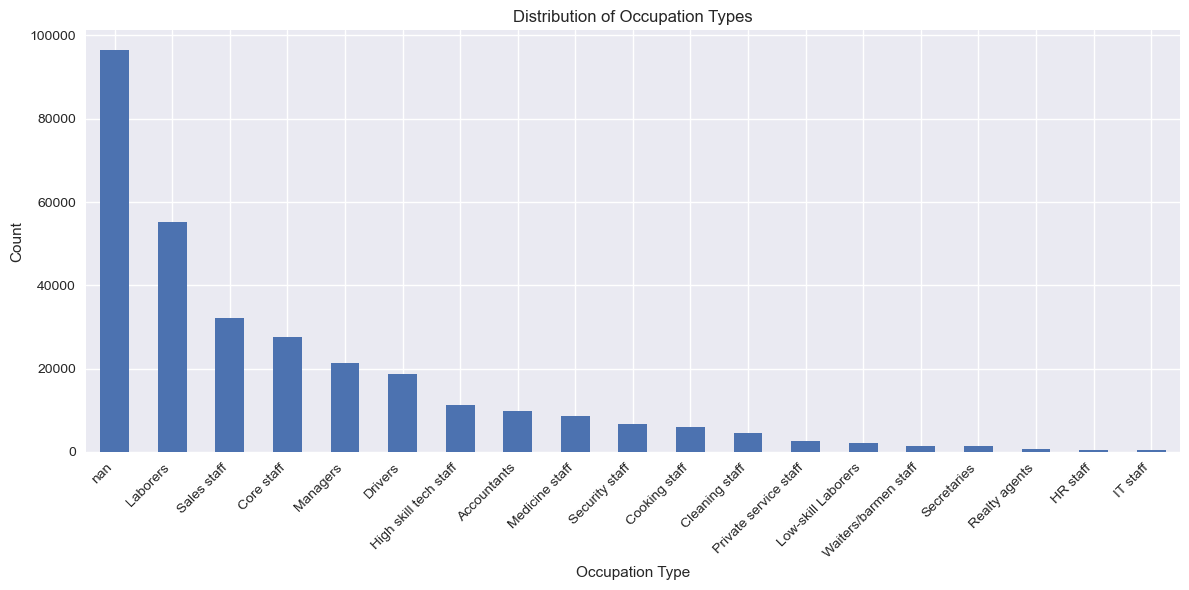

In [21]:
# Get value counts of OCCUPATION_TYPE and sort them in descending order
occupation_counts = cleaned_application_data['OCCUPATION_TYPE'].value_counts(dropna=False)
occupation_percentages = cleaned_application_data['OCCUPATION_TYPE'].value_counts(dropna=False, normalize=True) * 100

# Create a detailed summary
print("OCCUPATION_TYPE Distribution before imputation:")
print("-" * 50)
for occupation, count in occupation_counts.items():
    percentage = occupation_percentages[occupation]
    print(f"{occupation if occupation == occupation else 'Missing':<20} | Count: {count:>6} | Percentage: {percentage:>6.2f}%")

# Calculate total number of categories and missing values
total_categories = occupation_counts.size - (1 if occupation_counts.index.isna().any() else 0)
missing_count = occupation_counts.get(np.nan, 0)
missing_percentage = (missing_count / len(cleaned_application_data)) * 100

print("\nSummary Statistics:")
print("-" * 50)
print(f"Total number of categories: {total_categories}")
print(f"Total number of entries: {len(cleaned_application_data)}")
print(f"Missing values: {missing_count} ({missing_percentage:.2f}%)")

# Create a bar plot of the distribution
plt.figure(figsize=(12, 6))
occupation_counts.plot(kind='bar')
plt.title('Distribution of Occupation Types')
plt.xlabel('Occupation Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Imputation of Missing Values in `OCCUPATION_TYPE`
- **Objective:** Address missing values in the `OCCUPATION_TYPE` column by imputing the mode ('Laborers') and ensuring consistency across the dataset.
- **Steps:**
  - Count missing values before imputation.
  - Impute missing entries in `OCCUPATION_TYPE` with 'Laborers', the most common occupation.
  - Recalculate and display distribution of values after imputation.
- **Expected Outcome:** Eliminate missing values in `OCCUPATION_TYPE`, resulting in a complete dataset for this feature.

Missing values before imputation: 96391

Missing values after imputation: 0

Distribution after imputation:
Laborers             | Count: 151577 | Percentage:  49.29%
Sales staff          | Count:  32102 | Percentage:  10.44%
Core staff           | Count:  27570 | Percentage:   8.97%
Managers             | Count:  21371 | Percentage:   6.95%
Drivers              | Count:  18603 | Percentage:   6.05%
High skill tech staff | Count:  11380 | Percentage:   3.70%
Accountants          | Count:   9813 | Percentage:   3.19%
Medicine staff       | Count:   8537 | Percentage:   2.78%
Security staff       | Count:   6721 | Percentage:   2.19%
Cooking staff        | Count:   5946 | Percentage:   1.93%
Cleaning staff       | Count:   4653 | Percentage:   1.51%
Private service staff | Count:   2652 | Percentage:   0.86%
Low-skill Laborers   | Count:   2093 | Percentage:   0.68%
Waiters/barmen staff | Count:   1348 | Percentage:   0.44%
Secretaries          | Count:   1305 | Percentage:   0.42%
Realt

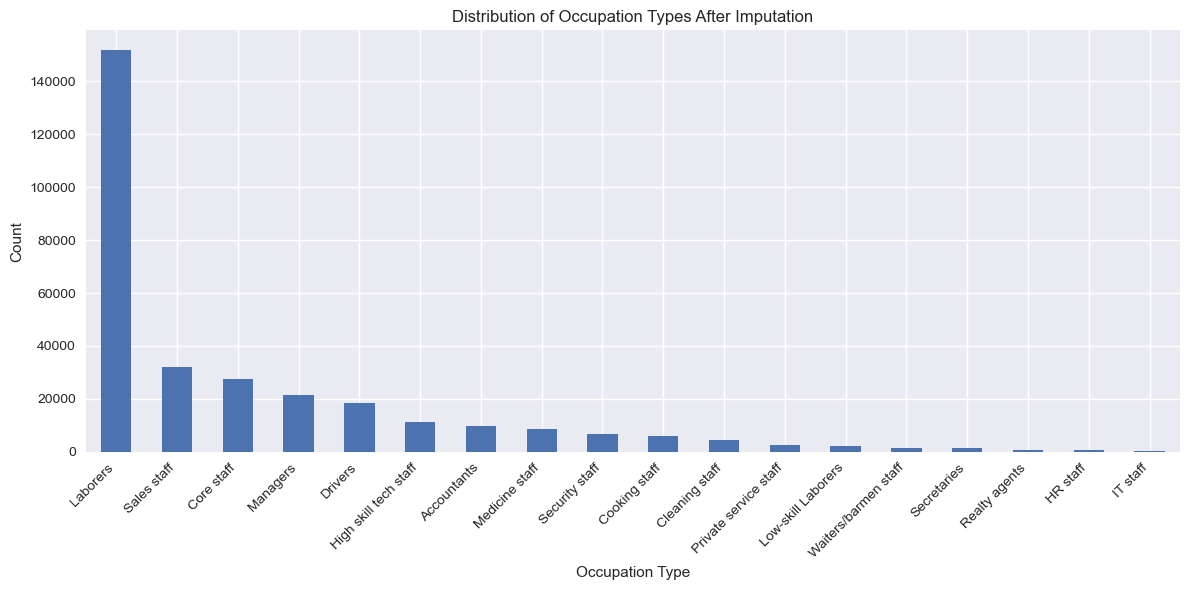

In [22]:
# Check the number of missing values before imputation
missing_before = cleaned_application_data['OCCUPATION_TYPE'].isnull().sum()
print("Missing values before imputation:", missing_before)

# Impute missing values with 'Laborers'
cleaned_application_data['OCCUPATION_TYPE'] = cleaned_application_data['OCCUPATION_TYPE'].fillna('Laborers')

# Verify that there are no more missing values
missing_after = cleaned_application_data['OCCUPATION_TYPE'].isnull().sum()
print("\nMissing values after imputation:", missing_after)

# Display new distribution
print("\nDistribution after imputation:")
occupation_counts = cleaned_application_data['OCCUPATION_TYPE'].value_counts()
occupation_percentages = cleaned_application_data['OCCUPATION_TYPE'].value_counts(normalize=True) * 100

for occupation, count in occupation_counts.items():
    percentage = occupation_percentages[occupation]
    print(f"{occupation:<20} | Count: {count:>6} | Percentage: {percentage:>6.2f}%")

# Create a bar plot of the new distribution
plt.figure(figsize=(12, 6))
cleaned_application_data['OCCUPATION_TYPE'].value_counts().plot(kind='bar')
plt.title('Distribution of Occupation Types After Imputation')
plt.xlabel('Occupation Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Imputation of Missing Values in `NAME_TYPE_SUITE`
- **Objective:** Replace missing values in `NAME_TYPE_SUITE` using the mode, to ensure completeness and maintain data consistency.
- **Steps:**
  - Calculate the distribution of `NAME_TYPE_SUITE` before imputation and identify the most common category (mode).
  - Impute missing values with the identified mode.
  - Reevaluate and visualize the distribution post-imputation to confirm the expected consistency.
- **Expected Outcome:** All missing values in `NAME_TYPE_SUITE` are replaced by the mode, reflecting the distribution observed prior to imputation.

Initial Distribution of NAME_TYPE_SUITE:
--------------------------------------------------
Unaccompanied        | Count: 248526 | Percentage:  80.82%
Family               | Count:  40149 | Percentage:  13.06%
Spouse, partner      | Count:  11370 | Percentage:   3.70%
Children             | Count:   3267 | Percentage:   1.06%
Other_B              | Count:   1770 | Percentage:   0.58%
Missing              | Count:   1292 | Percentage:   0.42%
Other_A              | Count:    866 | Percentage:   0.28%
Group of people      | Count:    271 | Percentage:   0.09%

Most common suite type (mode): Unaccompanied

Missing values before imputation: 1292
Missing values after imputation: 0

Distribution after imputation:
--------------------------------------------------
Unaccompanied        | Count: 249818 | Percentage:  81.24%
Family               | Count:  40149 | Percentage:  13.06%
Spouse, partner      | Count:  11370 | Percentage:   3.70%
Children             | Count:   3267 | Percentage:   1.

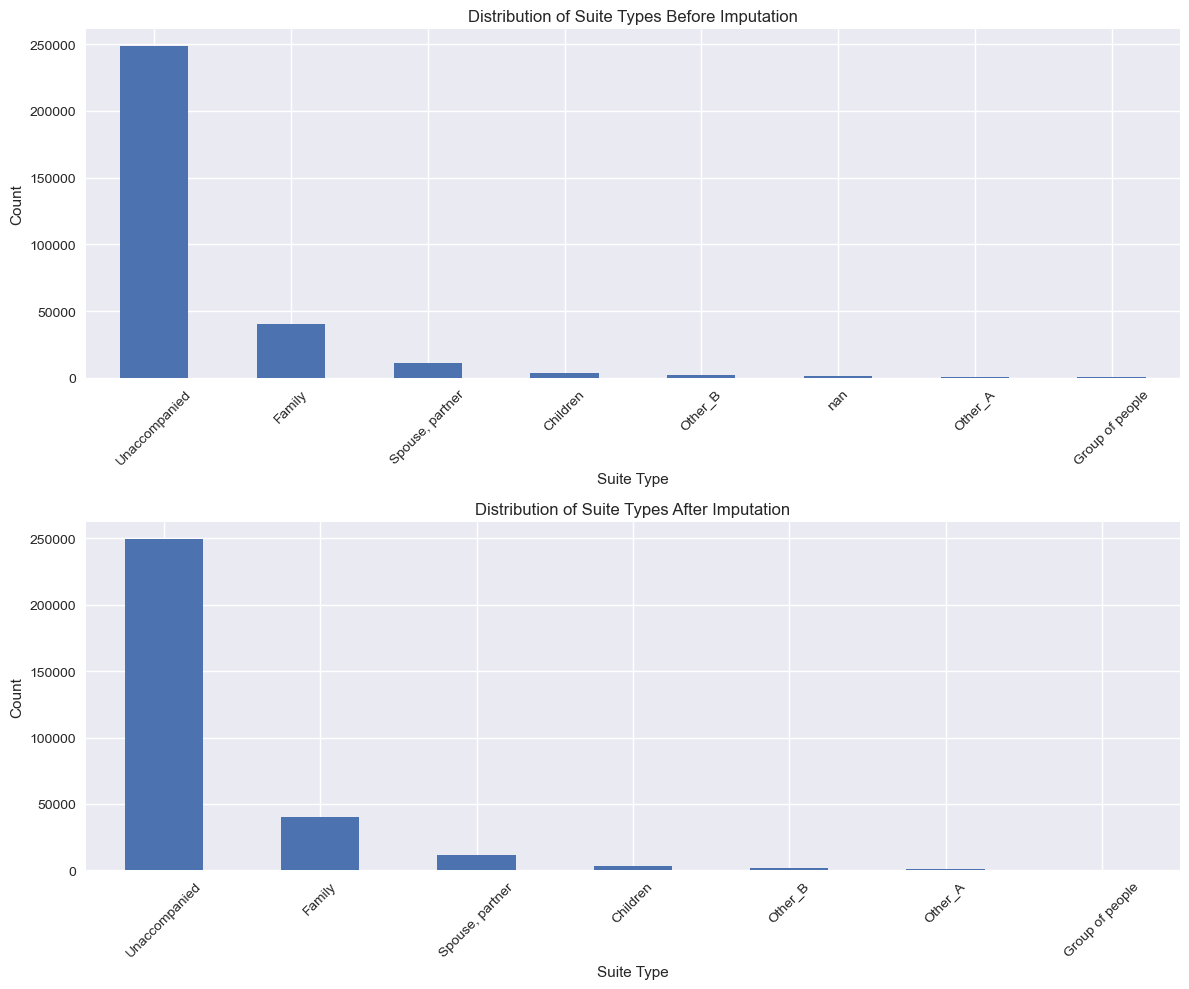


Summary:
--------------------------------------------------
Total number of categories: 7
Total number of entries: 307511
Number of values imputed: 1292
Most common category after imputation: Unaccompanied (249818 entries)


In [23]:
# Analyze the current distribution of NAME_TYPE_SUITE
print("Initial Distribution of NAME_TYPE_SUITE:")
print("-" * 50)
suite_counts = cleaned_application_data['NAME_TYPE_SUITE'].value_counts(dropna=False)
suite_percentages = cleaned_application_data['NAME_TYPE_SUITE'].value_counts(dropna=False, normalize=True) * 100

# Display current distribution with counts and percentages
for suite_type, count in suite_counts.items():
    percentage = suite_percentages[suite_type]
    print(f"{suite_type if suite_type == suite_type else 'Missing':<20} | Count: {count:>6} | Percentage: {percentage:>6.2f}%")

# Get the mode (most common value)
mode_suite = cleaned_application_data['NAME_TYPE_SUITE'].mode()[0]
print(f"\nMost common suite type (mode): {mode_suite}")

# Count missing values before imputation
missing_before = cleaned_application_data['NAME_TYPE_SUITE'].isnull().sum()
print(f"\nMissing values before imputation: {missing_before}")

# Impute missing values with the mode
cleaned_application_data['NAME_TYPE_SUITE'] = cleaned_application_data['NAME_TYPE_SUITE'].fillna(mode_suite)

# Verify imputation
missing_after = cleaned_application_data['NAME_TYPE_SUITE'].isnull().sum()
print(f"Missing values after imputation: {missing_after}")

# Display new distribution
print("\nDistribution after imputation:")
print("-" * 50)
new_suite_counts = cleaned_application_data['NAME_TYPE_SUITE'].value_counts()
new_suite_percentages = cleaned_application_data['NAME_TYPE_SUITE'].value_counts(normalize=True) * 100

for suite_type, count in new_suite_counts.items():
    percentage = new_suite_percentages[suite_type]
    print(f"{suite_type:<20} | Count: {count:>6} | Percentage: {percentage:>6.2f}%")

# Create before and after visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Before imputation plot
suite_counts.plot(kind='bar', ax=ax1)
ax1.set_title('Distribution of Suite Types Before Imputation')
ax1.set_xlabel('Suite Type')
ax1.set_ylabel('Count')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

# After imputation plot
new_suite_counts.plot(kind='bar', ax=ax2)
ax2.set_title('Distribution of Suite Types After Imputation')
ax2.set_xlabel('Suite Type')
ax2.set_ylabel('Count')
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary:")
print("-" * 50)
print(f"Total number of categories: {len(new_suite_counts)}")
print(f"Total number of entries: {len(cleaned_application_data)}")
print(f"Number of values imputed: {missing_before}")
print(f"Most common category after imputation: {new_suite_counts.index[0]} ({new_suite_counts.iloc[0]} entries)")

#### Imputation and Analysis of `AMT_ANNUITY`
- **Objective:** Address missing values in `AMT_ANNUITY` by imputing with the mean value to ensure continuity and complete analysis across the dataset.
- **Steps:**
  - **Initial Analysis:** Evaluate data type and calculate basic statistics, including missing values and percentage.
  - **Imputation Process:** Replace missing values with the mean amount to retain dataset consistency.
  - **Visualization:** Compare distribution histograms and box plots pre- and post-imputation to examine shifts in distribution and detect any significant impact of imputation.
- **Expected Outcome:** `AMT_ANNUITY` column has no missing values, preserving the original distribution while providing insight into average, median, and quartile values for further analysis.

AMT_ANNUITY Feature Analysis:
--------------------------------------------------
Data type: float64

Basic Statistics Before Imputation:
count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

Missing values before imputation: 12 (0.00%)

Mean value for imputation: 27108.57

Missing values after imputation: 0

Basic Statistics After Imputation:
count    307511.000000
mean      27108.573909
std       14493.454517
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


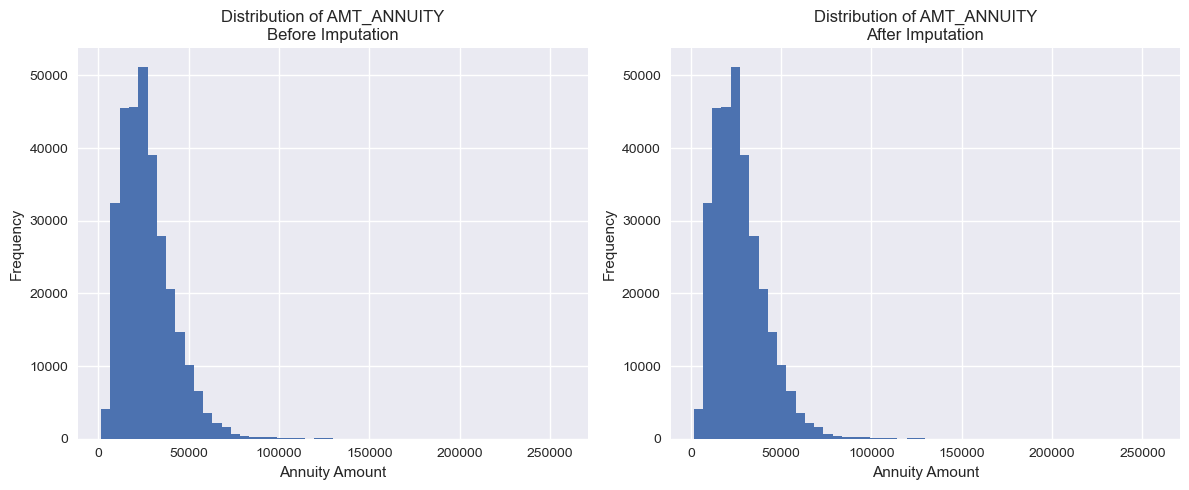


Distribution Analysis:
--------------------------------------------------
Minimum amount: 1615.50
Maximum amount: 258025.50
Average amount: 27108.57
Median amount: 24903.00

Quartile Information:
25th percentile: 16524.00
50th percentile (median): 24903.00
75th percentile: 34596.00


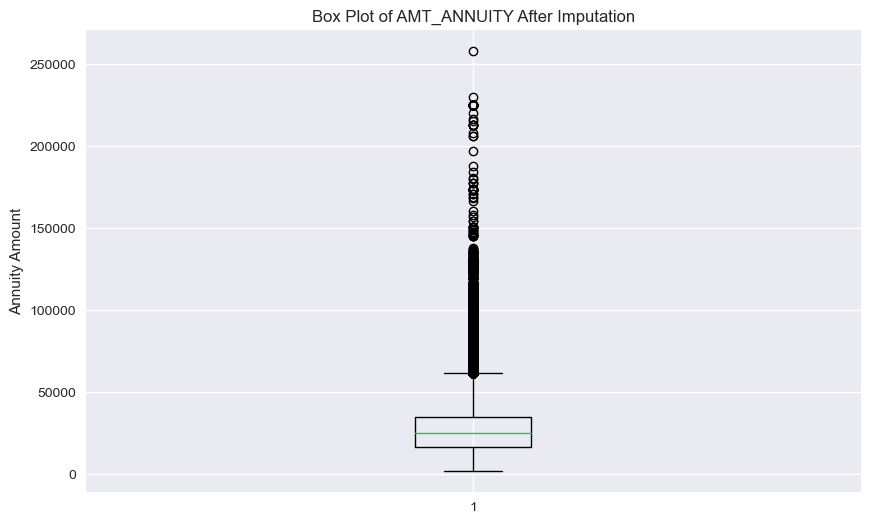

In [24]:
# Analyze the AMT_ANNUITY feature
print("AMT_ANNUITY Feature Analysis:")
print("-" * 50)

# Check data type
print("Data type:", cleaned_application_data['AMT_ANNUITY'].dtype)

# Basic statistics
print("\nBasic Statistics Before Imputation:")
print(cleaned_application_data['AMT_ANNUITY'].describe())

# Count missing values before imputation
missing_before = cleaned_application_data['AMT_ANNUITY'].isnull().sum()
missing_percentage = (missing_before / len(cleaned_application_data)) * 100
print(f"\nMissing values before imputation: {missing_before} ({missing_percentage:.2f}%)")

# Calculate mean for imputation
annuity_mean = cleaned_application_data['AMT_ANNUITY'].mean()
print(f"\nMean value for imputation: {annuity_mean:.2f}")

# Create visualization of distribution before imputation
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
cleaned_application_data['AMT_ANNUITY'].hist(bins=50)
plt.title('Distribution of AMT_ANNUITY\nBefore Imputation')
plt.xlabel('Annuity Amount')
plt.ylabel('Frequency')

# Impute missing values with mean
cleaned_application_data['AMT_ANNUITY'] = cleaned_application_data['AMT_ANNUITY'].fillna(annuity_mean)

# Verify imputation
missing_after = cleaned_application_data['AMT_ANNUITY'].isnull().sum()
print(f"\nMissing values after imputation: {missing_after}")

# Display statistics after imputation
print("\nBasic Statistics After Imputation:")
print(cleaned_application_data['AMT_ANNUITY'].describe())

# Create visualization of distribution after imputation
plt.subplot(1, 2, 2)
cleaned_application_data['AMT_ANNUITY'].hist(bins=50)
plt.title('Distribution of AMT_ANNUITY\nAfter Imputation')
plt.xlabel('Annuity Amount')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Additional analysis
print("\nDistribution Analysis:")
print("-" * 50)
print(f"Minimum amount: {cleaned_application_data['AMT_ANNUITY'].min():.2f}")
print(f"Maximum amount: {cleaned_application_data['AMT_ANNUITY'].max():.2f}")
print(f"Average amount: {cleaned_application_data['AMT_ANNUITY'].mean():.2f}")
print(f"Median amount: {cleaned_application_data['AMT_ANNUITY'].median():.2f}")

# Calculate and display quartile information
quartiles = cleaned_application_data['AMT_ANNUITY'].quantile([0.25, 0.5, 0.75])
print("\nQuartile Information:")
print(f"25th percentile: {quartiles[0.25]:.2f}")
print(f"50th percentile (median): {quartiles[0.5]:.2f}")
print(f"75th percentile: {quartiles[0.75]:.2f}")

# Box plot to show distribution and outliers
plt.figure(figsize=(10, 6))
plt.boxplot(cleaned_application_data['AMT_ANNUITY'])
plt.title('Box Plot of AMT_ANNUITY After Imputation')
plt.ylabel('Annuity Amount')
plt.show()

#### Credit Bureau Request Features Imputation and Analysis
- **Objective:** Address missing values in credit bureau request columns, impute using median values, and convert data to whole numbers since these are scores and not required to be in decimal for consistency and interpretability.
- **Steps:**
  - **Initial Analysis:** For each feature (`AMT_REQ_CREDIT_BUREAU_QRT`, `HOUR`, `DAY`, `WEEK`, `MON`, `YEAR`), evaluate the missing values, data type, and calculate median values.
  - **Imputation Process:** Replace missing values with respective column medians to minimize skew, then round and convert data to integer format for ease of interpretation.
  - **Visualization:** Generate individual histograms to observe distributions post-imputation, and a heatmap to analyze correlations between features.
- **Expected Outcome:** Each credit bureau request column is complete, with distributions showcasing typical request frequency. Insights into common request counts and any notable correlations between request periods assist in understanding borrower behavior.

Credit Bureau Request Features Analysis:
----------------------------------------------------------------------

Analyzing QRT:
----------------------------------------
Data type: float64
Missing values: 41519 (13.50%)
Median value: 0.0

Before imputation:
count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

After imputation and conversion to whole numbers:
count    307511.000000
mean          0.229631
std           0.744059
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

Analyzing HOUR:
----------------------------------------
Data type: float64
Missing values: 41519 (13.50%)
Median value: 0.0

Before imputation:
count    265992.000000
mean          0.006402
std           0.083849
min          

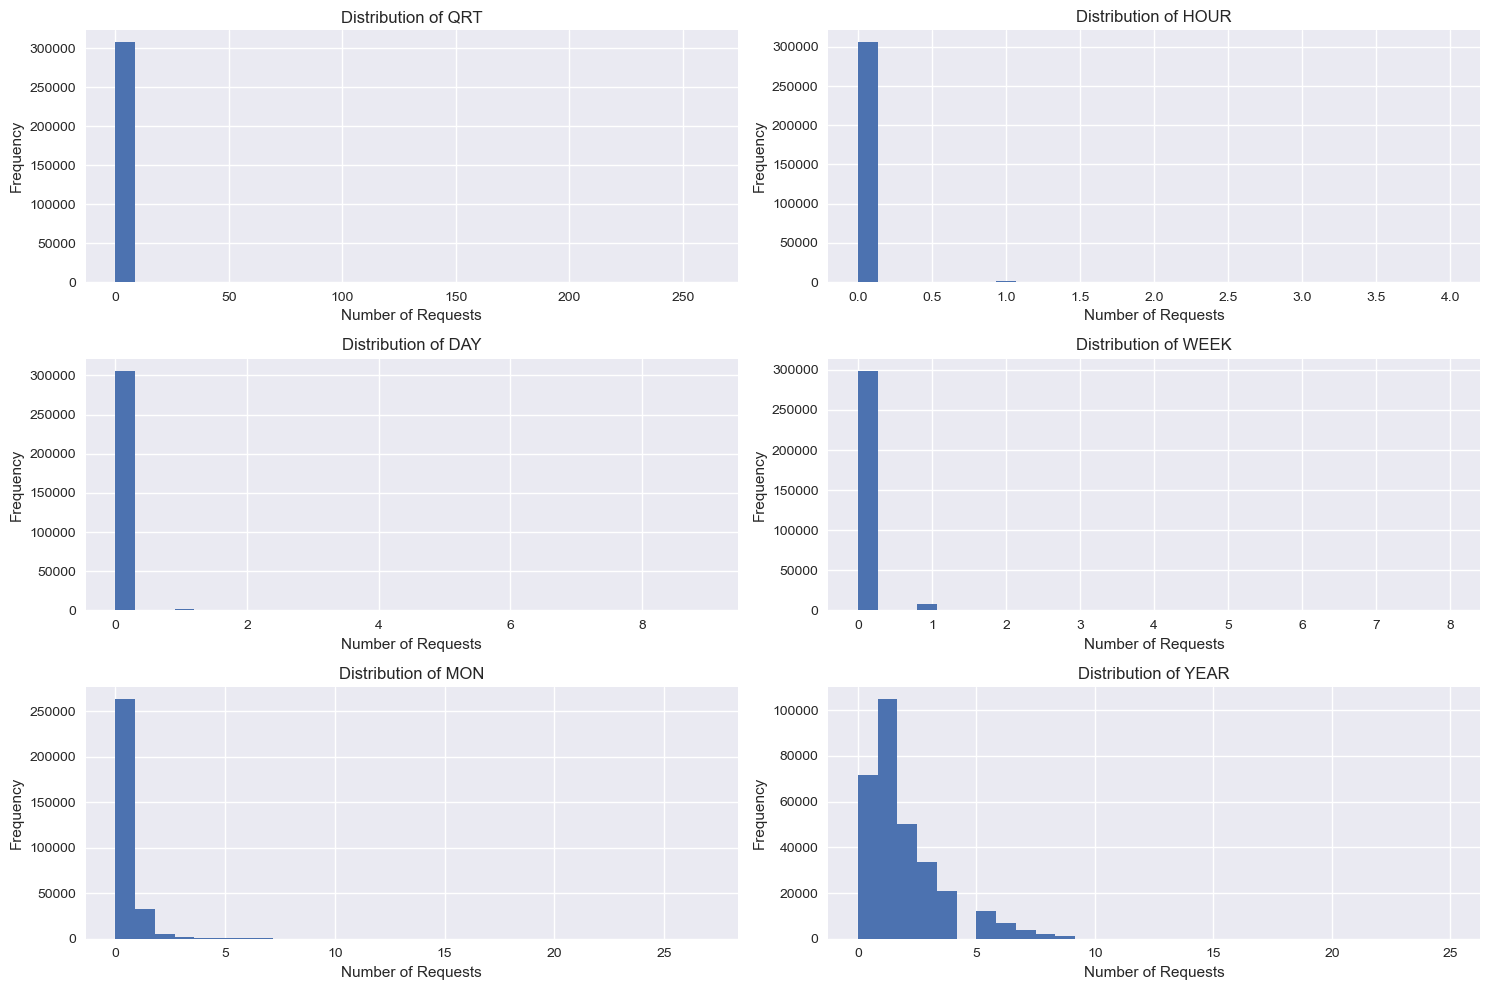

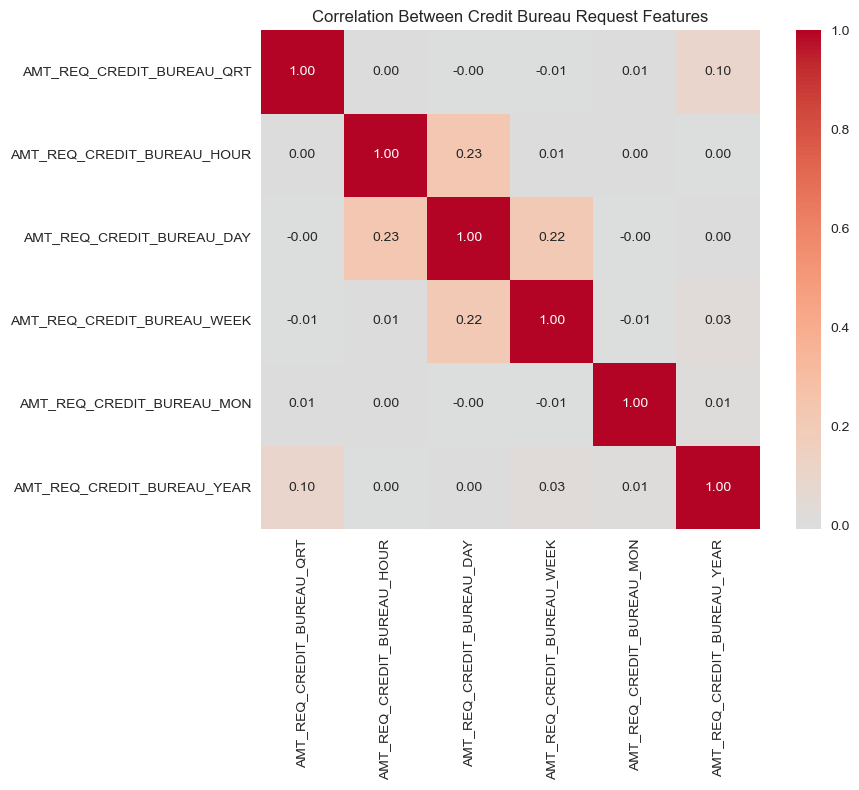


Final Summary Statistics:
----------------------------------------------------------------------

QRT:
Range: 0 to 261
Most common value: 0
Unique values: 11
Top 5 most common values:
0    256936
1     33862
2     14412
3      1717
4       476
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

HOUR:
Range: 0 to 4
Most common value: 0
Unique values: 5
Top 5 most common values:
0    305885
1      1560
2        56
3         9
4         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

DAY:
Range: 0 to 9
Most common value: 0
Unique values: 9
Top 5 most common values:
0    306022
1      1292
2       106
3        45
4        26
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

WEEK:
Range: 0 to 8
Most common value: 0
Unique values: 9
Top 5 most common values:
0    298975
1      8208
2       199
3        58
4        34
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

MON:
Range: 0 to 27
Most common value: 0
Unique values: 24
Top 5 most common values:
0    263752
1     33147
2      5386
3      1991
4

In [25]:
# Define the credit bureau request columns
credit_bureau_cols = [
    'AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_REQ_CREDIT_BUREAU_HOUR',
    'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_YEAR'
]

# Function to create a shortened display name
def get_short_name(col):
    return col.replace('AMT_REQ_CREDIT_BUREAU_', '')

# Initial analysis and imputation for each column
print("Credit Bureau Request Features Analysis:")
print("-" * 70)

for col in credit_bureau_cols:
    print(f"\nAnalyzing {get_short_name(col)}:")
    print("-" * 40)
    
    # Current data type and missing values
    missing_count = cleaned_application_data[col].isnull().sum()
    missing_percent = (missing_count / len(cleaned_application_data)) * 100
    print(f"Data type: {cleaned_application_data[col].dtype}")
    print(f"Missing values: {missing_count} ({missing_percent:.2f}%)")
    
    # Calculate median for imputation
    median_value = cleaned_application_data[col].median()
    print(f"Median value: {median_value}")
    
    # Basic statistics before imputation
    print("\nBefore imputation:")
    print(cleaned_application_data[col].describe())
    
    # Impute missing values with median
    cleaned_application_data[col] = cleaned_application_data[col].fillna(median_value)
    
    # Convert to whole numbers
    cleaned_application_data[col] = cleaned_application_data[col].round().astype(int)
    
    # Statistics after imputation and rounding
    print("\nAfter imputation and conversion to whole numbers:")
    print(cleaned_application_data[col].describe())

# Visualize distributions after imputation
plt.figure(figsize=(15, 10))
for idx, col in enumerate(credit_bureau_cols, 1):
    plt.subplot(3, 2, idx)
    cleaned_application_data[col].hist(bins=30)
    plt.title(f'Distribution of {get_short_name(col)}')
    plt.xlabel('Number of Requests')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Create correlation matrix
correlation_matrix = cleaned_application_data[credit_bureau_cols].corr()

# Visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            fmt='.2f',
            square=True)
plt.title('Correlation Between Credit Bureau Request Features')
plt.tight_layout()
plt.show()

# Summary statistics for all features
print("\nFinal Summary Statistics:")
print("-" * 70)
for col in credit_bureau_cols:
    print(f"\n{get_short_name(col)}:")
    print(f"Range: {cleaned_application_data[col].min()} to {cleaned_application_data[col].max()}")
    print(f"Most common value: {cleaned_application_data[col].mode()[0]}")
    print(f"Unique values: {cleaned_application_data[col].nunique()}")
    
    # Value counts for top 5 most common values
    print("Top 5 most common values:")
    print(cleaned_application_data[col].value_counts().head())

#### AMT_GOODS_PRICE Feature Imputation and Analysis
- **Objective:** Analyze, impute, and visualize the `AMT_GOODS_PRICE` feature to ensure data completeness and detect potential outliers.
- **Steps:**
  - **Initial Analysis:** Assess current statistics (min, max, median, mean) and missing values.
  - **Imputation Strategy:** Impute missing values using the median to preserve data distribution and avoid skew.
  - **Visualization:** 
    - Histograms are used to display distributions before and after imputation.
    - A box plot provides insights into potential outliers.
  - **Outlier Detection:** Compute Interquartile Range (IQR) and identify data points that fall outside this range as potential outliers.
  - **Value Range Distribution:** Segment the data into distinct ranges (Very Low, Low, Medium, High, Very High) and analyze distribution within each.

- **Expected Outcome:** `AMT_GOODS_PRICE` feature is complete, with potential outliers identified and range distributions analyzed, providing a clearer understanding of the loan amounts requested.

AMT_GOODS_PRICE Feature Analysis:
--------------------------------------------------
Data type: float64

Basic Statistics Before Imputation:
min         40500.0
max       4050000.0
median     450000.0
Name: AMT_GOODS_PRICE, dtype: float64

Mean Value of this Feature:
538396.2074288895

Missing values before imputation: 278 (0.09%)

Median value for imputation: 450,000.00

Missing values after imputation: 0

Basic Statistics After Imputation:
count    3.075110e+05
mean     5.383163e+05
std      3.692890e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


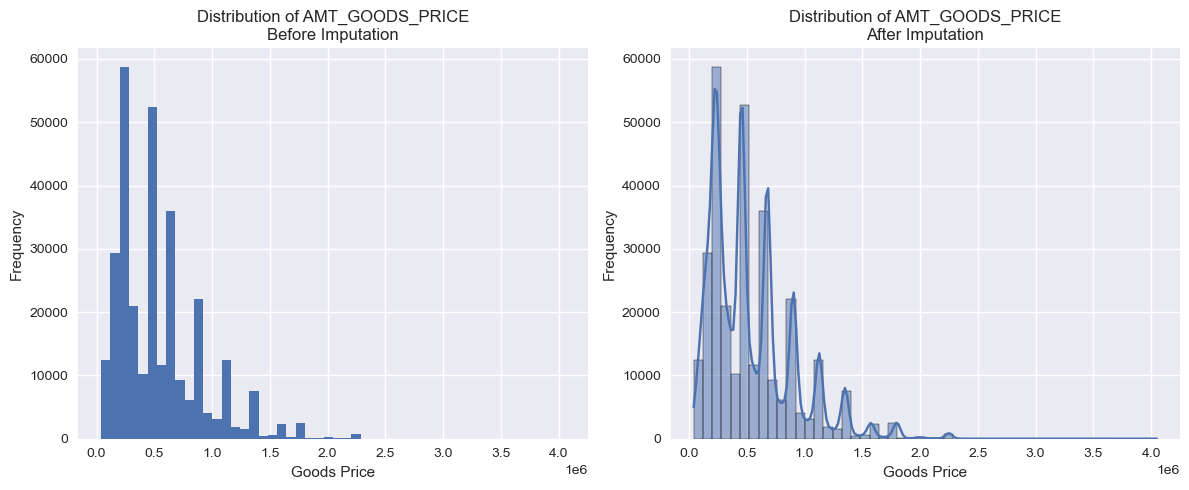


Detailed Distribution Analysis:
--------------------------------------------------
Minimum price: 40,500.00
Maximum price: 4,050,000.00
Average price: 538,316.29
Median price: 450,000.00

Quartile Information:
25th percentile: 238,500.00
50th percentile (median): 450,000.00
75th percentile: 679,500.00

Outlier Analysis:
Number of potential outliers: 14728
Percentage of outliers: 4.79%


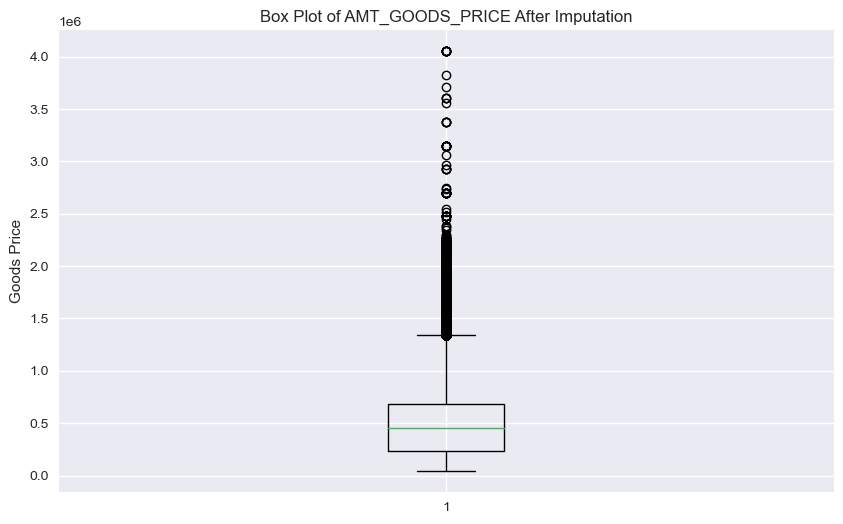


Value Range Distribution:
Very Low     247251
Low           56087
Medium         4108
High             47
Very High        18
Name: AMT_GOODS_PRICE, dtype: int64

First Few Rows of the Dataset:


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             0   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE  \
0          202500.0    406597.5      24700.5         351000.0   Unaccompanied   
1          270000.0   1293502.5      35698.5        1129500.0          Family   
2           67500.0    135000.0       6750.0         135000.0   Unaccompanied   
3          135000.0    312682.5      29686.5         297000.0   Unaccompanied   
4          121500.0    513000.0      21865.5         513000.0   Unaccompanied   

   ... REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0  ...                      0                       0  Business Entity Type 3   
1  ...                      0                       0                  School   
2  ...                      0                       0              Government   
3  ...                      0                       0  Business Entity Type 3   
4  ...                      1                       1                Religion   

  DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
0                -1134.0                           0   
1                 -828.0                           0   
2                 -815.0                           0   
3                 -617.0                           0   
4                -1106.0                           0   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                          0                           0   
1                          0                           0   
2                          0                           0   
3                          0                           0   
4                          0                           0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

  AMT_REQ_CREDIT_BUREAU_YEAR  
0                          1  
1                          0  
2                          0  
3                          1  
4                          0  

[5 rows x 38 columns]

In [26]:
# Analyze AMT_GOODS_PRICE feature
print("AMT_GOODS_PRICE Feature Analysis:")
print("-" * 50)

# Check data type and basic info
print("Data type:", cleaned_application_data['AMT_GOODS_PRICE'].dtype)

# Initial statistics
print("\nBasic Statistics Before Imputation:")
print(cleaned_application_data['AMT_GOODS_PRICE'].agg(['min', 'max', 'median']))
print("\nMean Value of this Feature:")
print(cleaned_application_data['AMT_GOODS_PRICE'].mean())

# Count missing values before imputation
missing_before = cleaned_application_data['AMT_GOODS_PRICE'].isnull().sum()
missing_percentage = (missing_before / len(cleaned_application_data)) * 100
print(f"\nMissing values before imputation: {missing_before} ({missing_percentage:.2f}%)")

# Calculate median for imputation
goods_price_median = cleaned_application_data['AMT_GOODS_PRICE'].median()
print(f"\nMedian value for imputation: {goods_price_median:,.2f}")

# Create visualization of distribution before imputation
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
cleaned_application_data['AMT_GOODS_PRICE'].hist(bins=50)
plt.title('Distribution of AMT_GOODS_PRICE\nBefore Imputation')
plt.xlabel('Goods Price')
plt.ylabel('Frequency')

# Impute missing values with median
cleaned_application_data['AMT_GOODS_PRICE'] = cleaned_application_data['AMT_GOODS_PRICE'].fillna(goods_price_median)

# Verify imputation
missing_after = cleaned_application_data['AMT_GOODS_PRICE'].isnull().sum()
print(f"\nMissing values after imputation: {missing_after}")

# Display statistics after imputation
print("\nBasic Statistics After Imputation:")
print(cleaned_application_data['AMT_GOODS_PRICE'].describe())

# After imputation - Histogram with KDE
plt.subplot(1, 2, 2)
sns.histplot(data=cleaned_application_data['AMT_GOODS_PRICE'], bins=50, kde=True)
plt.title('Distribution of AMT_GOODS_PRICE\nAfter Imputation')
plt.xlabel('Goods Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Additional analysis
print("\nDetailed Distribution Analysis:")
print("-" * 50)
print(f"Minimum price: {cleaned_application_data['AMT_GOODS_PRICE'].min():,.2f}")
print(f"Maximum price: {cleaned_application_data['AMT_GOODS_PRICE'].max():,.2f}")
print(f"Average price: {cleaned_application_data['AMT_GOODS_PRICE'].mean():,.2f}")
print(f"Median price: {cleaned_application_data['AMT_GOODS_PRICE'].median():,.2f}")

# Calculate and display quartile information
quartiles = cleaned_application_data['AMT_GOODS_PRICE'].quantile([0.25, 0.5, 0.75])
print("\nQuartile Information:")
print(f"25th percentile: {quartiles[0.25]:,.2f}")
print(f"50th percentile (median): {quartiles[0.5]:,.2f}")
print(f"75th percentile: {quartiles[0.75]:,.2f}")

# Calculate IQR and identify potential outliers
Q1 = quartiles[0.25]
Q3 = quartiles[0.75]
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = cleaned_application_data[
    (cleaned_application_data['AMT_GOODS_PRICE'] < lower_bound) | 
    (cleaned_application_data['AMT_GOODS_PRICE'] > upper_bound)
]

print(f"\nOutlier Analysis:")
print(f"Number of potential outliers: {len(outliers)}")
print(f"Percentage of outliers: {(len(outliers) / len(cleaned_application_data) * 100):.2f}%")

# Box plot to show distribution and outliers
plt.figure(figsize=(10, 6))
plt.boxplot(cleaned_application_data['AMT_GOODS_PRICE'])
plt.title('Box Plot of AMT_GOODS_PRICE After Imputation')
plt.ylabel('Goods Price')
plt.show()

# Distribution of values in different ranges
print("\nValue Range Distribution:")
value_ranges = pd.cut(cleaned_application_data['AMT_GOODS_PRICE'], 
                     bins=5, 
                     labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
range_distribution = value_ranges.value_counts().sort_index()
print(range_distribution)

print("\nFirst Few Rows of the Dataset:")
cleaned_application_data.head()

### 4. Value Modification

#### Conversion of `DAYS` Columns to Positive Values
- **Objective:** Convert all `DAYS` columns from negative to positive values to improve readability and consistency.
- **Rationale:** `DAYS` columns (such as `DAYS_BIRTH`, `DAYS_EMPLOYED`) often represent days elapsed before a specific event (e.g., date of birth or employment). Converting these to positive values enhances interpretability.
- **Steps:**
  - Identify columns that start with `DAYS`.
  - Apply absolute value transformation to make values positive.
  
- **Expected Outcome:** All `DAYS` columns will now contain positive values, making them more intuitive for analysis.
- **Columns Processed:** Displays each column converted to confirm changes.

In [27]:
# Get all columns that start with 'DAYS'
days_columns = [col for col in cleaned_application_data.columns if col.startswith('DAYS')]

# Convert negative values to positive using absolute value
for col in days_columns:
    cleaned_application_data[col] = cleaned_application_data[col].abs()

# Print the list of columns that were processed
print("Columns converted to positive values:")
for col in days_columns:
    print(col)

Columns converted to positive values:
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
DAYS_LAST_PHONE_CHANGE


### 5. Outlier Detection and Binning

#### Binning and Distribution of `AMT_GOODS_PRICE`
- **Objective:** Segment `AMT_GOODS_PRICE` into defined price ranges to better understand loan distributions across different product values.
- **Approach:**
  - Define specific price ranges (e.g., `0-100k`, `100-200k`, ..., `Above 900k`).
  - Assign each `AMT_GOODS_PRICE` value to its respective range.
  
- **Insights Derived:**
  - Calculate distribution and percentage of applications across each price range.
  - Visualize distribution in a bar plot for an easy overview of application volume across price ranges.

- **Outcome:** Clear segmentation of `AMT_GOODS_PRICE` reveals common price bands and highlights any price-related trends in loan applications.

Data Distribution Across Different Percentiles:
--------------------------------------------------
0.10     180000.0
0.20     225000.0
0.30     270000.0
0.40     378000.0
0.50     450000.0
0.60     522000.0
0.70     675000.0
0.80     814500.0
0.90    1093500.0
0.99    1800000.0
Name: AMT_GOODS_PRICE, dtype: float64

Distribution of AMT_GOODS_PRICE ranges:
--------------------------------------------------
AMT_GOODS_PRICE_RANGE
0-100k         8709
100-200k      32956
200-300k      62761
300-400k      21219
400-500k      57251
500-600k      13117
600-700k      40024
700-800k       8110
800-900k      21484
Above 900k    41880
dtype: int64

Percentage distribution:
--------------------------------------------------
AMT_GOODS_PRICE_RANGE
0-100k         2.83%
100-200k      10.72%
200-300k      20.41%
300-400k        6.9%
400-500k      18.62%
500-600k       4.27%
600-700k      13.02%
700-800k       2.64%
800-900k       6.99%
Above 900k    13.62%
dtype: object


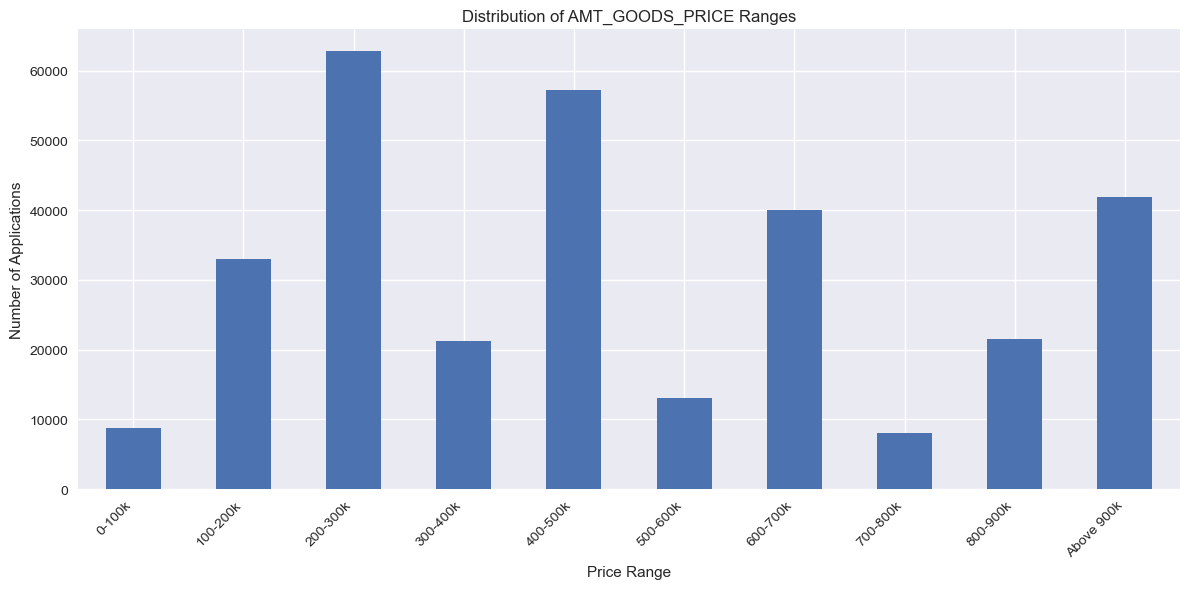

In [28]:
# Identify data distribution across different percentiles
AMT_GOODS_PRICE_QUANTILES = cleaned_application_data['AMT_GOODS_PRICE'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])
print("Data Distribution Across Different Percentiles:")
print("-" * 50)
print(AMT_GOODS_PRICE_QUANTILES)

# Create bins and labels for AMT_GOODS_PRICE
bins = [0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 4050000]
ranges = ['0-100k', '100-200k', '200-300k', '300-400k', '400-500k', '500-600k', '600-700k', '700-800k', '800-900k', 'Above 900k']

# Create new column with binned values
cleaned_application_data['AMT_GOODS_PRICE_RANGE'] = pd.cut(cleaned_application_data['AMT_GOODS_PRICE'], 
                                                         bins=bins, 
                                                         labels=ranges)

# Display the size of each range
range_sizes = cleaned_application_data.groupby('AMT_GOODS_PRICE_RANGE').size()
print("\nDistribution of AMT_GOODS_PRICE ranges:")
print("-" * 50)
print(range_sizes)

# Calculate and display percentages
range_percentages = (range_sizes / len(cleaned_application_data) * 100).round(2)
print("\nPercentage distribution:")
print("-" * 50)
print(range_percentages.astype(str) + '%')

# Create a bar plot of the distribution
plt.figure(figsize=(12, 6))
range_sizes.plot(kind='bar')
plt.title('Distribution of AMT_GOODS_PRICE Ranges')
plt.xlabel('Price Range')
plt.ylabel('Number of Applications')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Binning and Distribution of `AMT_INCOME_TOTAL`
- **Objective:** Segment `AMT_INCOME_TOTAL` into predefined income ranges to analyze applicant distribution across various income brackets.
- **Approach:**
  - Define income ranges (e.g., `0-100k`, `100-150k`, ..., `Above 450k`) based on quantile analysis to establish structured bins.
  - Assign each `AMT_INCOME_TOTAL` value to a corresponding income range.

- **Insights Derived:**
  - Calculate counts and percentage distributions within each income range.
  - Display these distributions in a bar plot to provide a visual summary of applicant income levels.

- **Outcome:** Segmented view of income distribution, highlighting predominant income brackets among applicants and identifying any notable trends related to income range.

Data Distribution Across Different Percentiles:
--------------------------------------------------
0.10     81000.0
0.20     99000.0
0.30    112500.0
0.40    135000.0
0.50    147150.0
0.60    162000.0
0.70    180000.0
0.80    225000.0
0.90    270000.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

Distribution of AMT_INCOME_TOTAL ranges:
--------------------------------------------------
AMT_INCOME_TOTAL_RANGE
0-100k        63698
100-150k      91591
150-200k      64307
200-250k      48137
250-300k      17039
300-350k       8874
350-400k       5802
400-450        4924
Above 450k      125
dtype: int64

Percentage distribution:
--------------------------------------------------
AMT_INCOME_TOTAL_RANGE
0-100k        20.71%
100-150k      29.78%
150-200k      20.91%
200-250k      15.65%
250-300k       5.54%
300-350k       2.89%
350-400k       1.89%
400-450         1.6%
Above 450k     0.04%
dtype: object


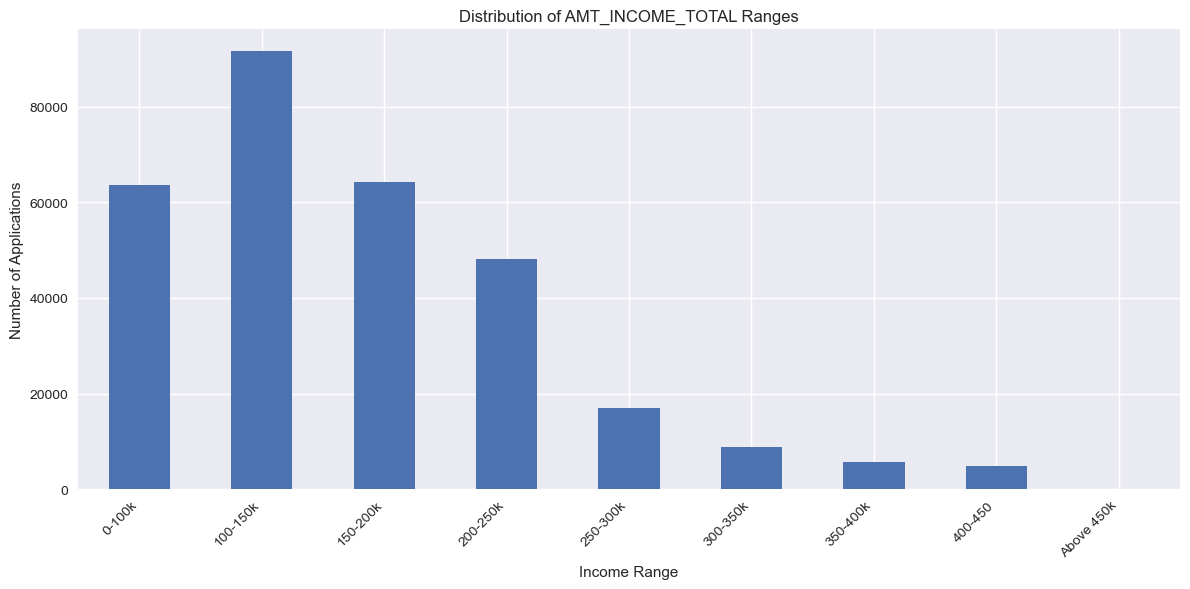

In [29]:
# Identify data distribution across different percentiles
AMT_INCOME_TOTAL_QUANTILES = cleaned_application_data['AMT_INCOME_TOTAL'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])
print("Data Distribution Across Different Percentiles:")
print("-" * 50)
print(AMT_INCOME_TOTAL_QUANTILES)

# Create bins and labels for AMT_INCOME_TOTAL
bins = [0, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 472500]
ranges = ['0-100k', '100-150k', '150-200k', '200-250k', '250-300k', '300-350k', '350-400k', '400-450', 'Above 450k']

# Create new column with binned values
cleaned_application_data['AMT_INCOME_TOTAL_RANGE'] = pd.cut(cleaned_application_data['AMT_INCOME_TOTAL'], 
                                                          bins=bins, 
                                                          labels=ranges)

# Display the size of each range
range_sizes = cleaned_application_data.groupby('AMT_INCOME_TOTAL_RANGE').size()
print("\nDistribution of AMT_INCOME_TOTAL ranges:")
print("-" * 50)
print(range_sizes)

# Calculate and display percentages
range_percentages = (range_sizes / len(cleaned_application_data) * 100).round(2)
print("\nPercentage distribution:")
print("-" * 50)
print(range_percentages.astype(str) + '%')

# Create a bar plot of the distribution
plt.figure(figsize=(12, 6))
range_sizes.plot(kind='bar')
plt.title('Distribution of AMT_INCOME_TOTAL Ranges')
plt.xlabel('Income Range')
plt.ylabel('Number of Applications')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Binning and Distribution of `AMT_CREDIT`
- **Objective:** Segment `AMT_CREDIT` into specific credit ranges to examine the distribution of loan amounts requested by applicants.
- **Approach:**
  - Defined credit ranges (e.g., `0-200k`, `200-400k`, ..., `Above 1M`) informed by quantile analysis for meaningful segmentation.
  - Categorized each `AMT_CREDIT` value into these predefined ranges.

- **Insights Derived:**
  - Calculated count and percentage of applications for each credit range.
  - Visualized this distribution in a bar plot, allowing for an accessible overview of loan amount frequency across ranges.

- **Outcome:** The binned `AMT_CREDIT` data offers insights into commonly requested loan amounts, facilitating better understanding of credit preferences among applicants.

Data Distribution Across Different Percentiles:
--------------------------------------------------
0.10     180000.0
0.20     254700.0
0.30     306306.0
0.40     432000.0
0.50     513531.0
0.60     604152.0
0.70     755190.0
0.80     900000.0
0.90    1133748.0
0.99    1854000.0
Name: AMT_CREDIT, dtype: float64

Distribution of AMT_CREDIT ranges:
--------------------------------------------------
AMT_CREDIT_RANGE
0-200k      36144
200-400k    81151
400-600k    66270
600-800k    43242
800-900k    21792
900-1M       8927
Above 1M    46910
dtype: int64

Percentage distribution:
--------------------------------------------------
AMT_CREDIT_RANGE
0-200k      11.75%
200-400k    26.39%
400-600k    21.55%
600-800k    14.06%
800-900k     7.09%
900-1M        2.9%
Above 1M    15.25%
dtype: object


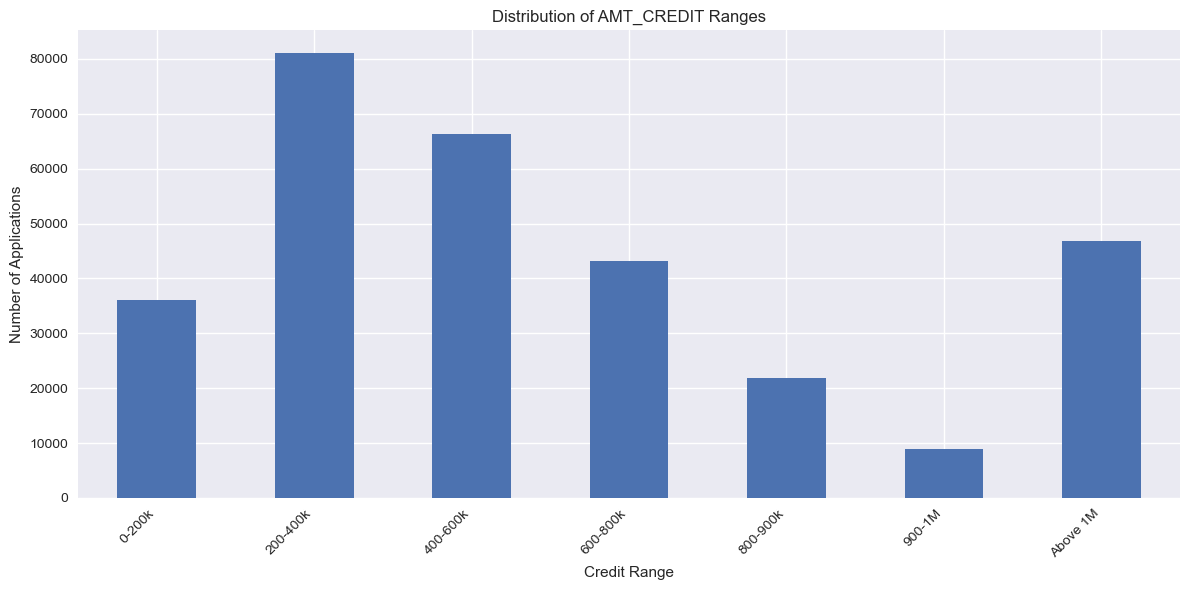

In [30]:
# Identify data distribution across different percentiles for AMT_CREDIT
AMT_CREDIT_QUANTILES = cleaned_application_data['AMT_CREDIT'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99])
print("Data Distribution Across Different Percentiles:")
print("-" * 50)
print(AMT_CREDIT_QUANTILES)

# Create bins and labels for AMT_CREDIT
bins = [0, 200000, 400000, 600000, 800000, 900000, 1000000, 1854000]
ranges = ['0-200k', '200-400k', '400-600k', '600-800k', '800-900k', '900-1M', 'Above 1M']

# Create new column with binned values
cleaned_application_data['AMT_CREDIT_RANGE'] = pd.cut(cleaned_application_data['AMT_CREDIT'], 
                                                    bins=bins, 
                                                    labels=ranges)

# Display the size of each range
range_sizes = cleaned_application_data.groupby('AMT_CREDIT_RANGE').size()
print("\nDistribution of AMT_CREDIT ranges:")
print("-" * 50)
print(range_sizes)

# Calculate and display percentages
range_percentages = (range_sizes / len(cleaned_application_data) * 100).round(2)
print("\nPercentage distribution:")
print("-" * 50)
print(range_percentages.astype(str) + '%')

# Create a bar plot of the distribution
plt.figure(figsize=(12, 6))
range_sizes.plot(kind='bar')
plt.title('Distribution of AMT_CREDIT Ranges')
plt.xlabel('Credit Range')
plt.ylabel('Number of Applications')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Binning and Distribution of `AMT_ANNUITY`
- **Objective:** Categorize `AMT_ANNUITY` values into defined annuity ranges to better understand the distribution of loan annuities among applicants.
- **Approach:**
  - Establish annuity ranges (e.g., `0-25k`, `25k-50k`, ..., `Above 200k`) based on percentile analysis for granular segmentation.
  - Assign each `AMT_ANNUITY` value to a corresponding range.

- **Insights Derived:**
  - Calculate the count and percentage of applications in each annuity range.
  - Visualize the distribution with a bar plot to highlight frequency across various annuity amounts.

- **Outcome:** The segmentation of `AMT_ANNUITY` unveils common annuity values, assisting in identifying typical loan repayment terms preferred by applicants.

Data Distribution Across Different Percentiles:
--------------------------------------------------
0.10    11074.5
0.20    14701.5
0.30    18189.0
0.40    21870.0
0.50    24903.0
0.60    28062.0
0.70    32004.0
0.80    37516.5
0.90    45954.0
0.99    70006.5
Name: AMT_ANNUITY, dtype: float64

Distribution of AMT_ANNUITY ranges:
--------------------------------------------------
AMT_ANNUITY_RANGE
0-25k         154867
25k-50k       131347
50k-100k       20792
100k-150k        437
150k-200k         32
Above 200k        35
dtype: int64

Percentage distribution:
--------------------------------------------------
AMT_ANNUITY_RANGE
0-25k         50.36%
25k-50k       42.71%
50k-100k       6.76%
100k-150k      0.14%
150k-200k      0.01%
Above 200k     0.01%
dtype: object


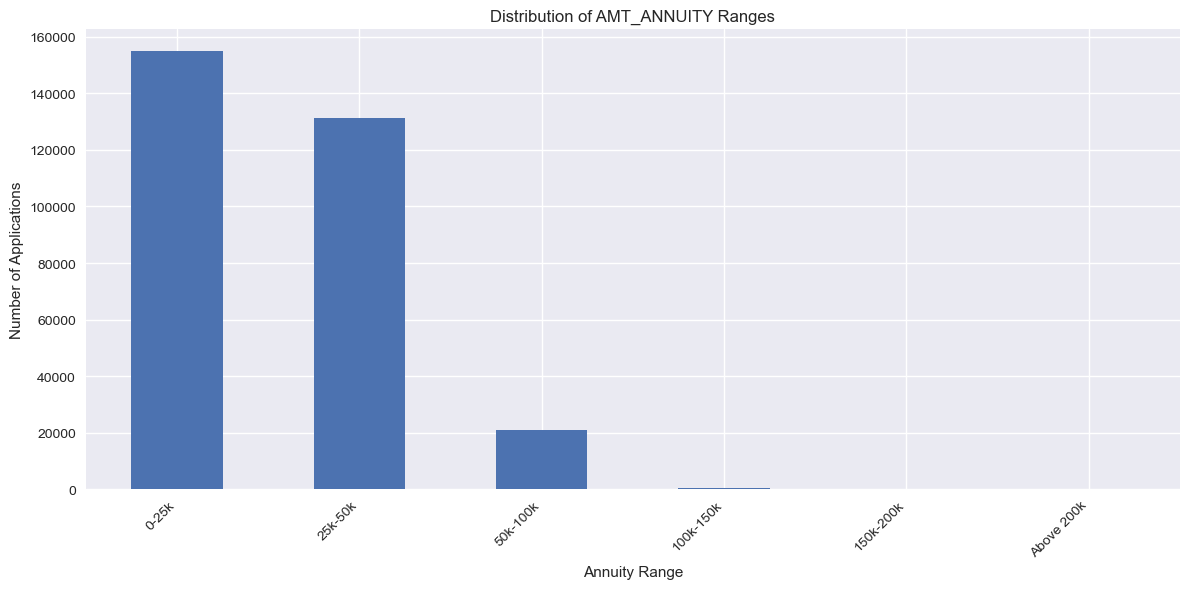

In [31]:
# Identify data distribution across different percentiles for AMT_ANNUITY
AMT_ANNUITY_QUANTILES = cleaned_application_data['AMT_ANNUITY'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99])
print("Data Distribution Across Different Percentiles:")
print("-" * 50)
print(AMT_ANNUITY_QUANTILES)

# Create bins and labels for AMT_ANNUITY
bins = [0,25000,50000,100000,150000,200000,258025]
ranges = ['0-25k', '25k-50k', '50k-100k', '100k-150k', '150k-200k', 'Above 200k']

# Create new column with binned values
cleaned_application_data['AMT_ANNUITY_RANGE'] = pd.cut(cleaned_application_data['AMT_ANNUITY'], 
                                                      bins=bins, 
                                                      labels=ranges)

# Display the size of each range
range_sizes = cleaned_application_data.groupby('AMT_ANNUITY_RANGE').size()
print("\nDistribution of AMT_ANNUITY ranges:")
print("-" * 50)
print(range_sizes)

# Calculate and display percentages
range_percentages = (range_sizes / len(cleaned_application_data) * 100).round(2)
print("\nPercentage distribution:")
print("-" * 50)
print(range_percentages.astype(str) + '%')

# Create a bar plot of the distribution
plt.figure(figsize=(12, 6))
range_sizes.plot(kind='bar')
plt.title('Distribution of AMT_ANNUITY Ranges')
plt.xlabel('Annuity Range')
plt.ylabel('Number of Applications')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Binning and Distribution of `DAYS_EMPLOYED`
- **Objective:** Segment `DAYS_EMPLOYED` to understand employment duration trends among applicants and analyze possible correlations with loan behavior.
- **Approach:**
  - Establish employment duration ranges (e.g., `0-5Y`, `5Y-10Y`, ..., `Above 50Y`) to group applicants by employment history.
  - Categorize each applicant’s `DAYS_EMPLOYED` value within the relevant range.

- **Insights Derived:**
  - Compute the count and percentage of applications across each employment duration range.
  - Present the distribution in a bar plot, highlighting patterns in applicant employment tenure.

- **Outcome:** The segmentation provides a clearer view of applicant employment stability, which can be insightful for assessing financial reliability and potential loan repayment capabilities.

Data Distribution Across Different Percentiles:
--------------------------------------------------
0.10       392.0
0.20       749.0
0.30      1132.0
0.40      1597.0
0.50      2219.0
0.60      3032.0
0.70      4435.0
0.80      9188.0
0.90    365243.0
0.99    365243.0
Name: DAYS_EMPLOYED, dtype: float64

Distribution of DAYS_EMPLOYED ranges:
--------------------------------------------------
DAYS_EMPLOYED_RANGE
0-5Y         136309
5Y-10Y        64872
10Y-15Y       27549
15Y-20Y       10849
20Y-25Y        6243
25Y-30Y        3308
30Y-35Y        1939
35Y-40Y         832
40Y-45Y         210
45Y-50Y          24
Above 50Y     55374
dtype: int64

Percentage distribution:
--------------------------------------------------
DAYS_EMPLOYED_RANGE
0-5Y         44.33%
5Y-10Y        21.1%
10Y-15Y       8.96%
15Y-20Y       3.53%
20Y-25Y       2.03%
25Y-30Y       1.08%
30Y-35Y       0.63%
35Y-40Y       0.27%
40Y-45Y       0.07%
45Y-50Y       0.01%
Above 50Y    18.01%
dtype: object


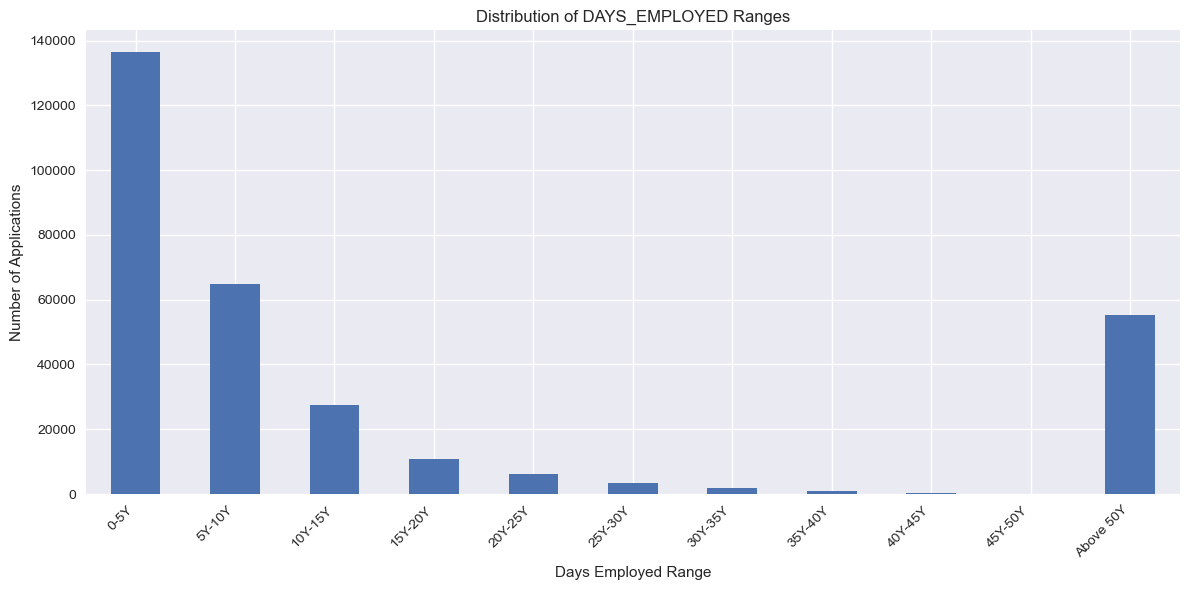

In [32]:
# Identify data distribution across different percentiles for DAYS_EMPLOYED
DAYS_EMPLOYED_QUANTILES = cleaned_application_data['DAYS_EMPLOYED'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99])
print("Data Distribution Across Different Percentiles:")
print("-" * 50)
print(DAYS_EMPLOYED_QUANTILES)

# Create bins and labels for DAYS_EMPLOYED
bins = [0, 1825,3650,5475,7300,9125,10950,12775,14600,16425,18250,365243]
ranges = ['0-5Y','5Y-10Y','10Y-15Y','15Y-20Y','20Y-25Y','25Y-30Y','30Y-35Y','35Y-40Y','40Y-45Y','45Y-50Y', 'Above 50Y'] 

# Create new column with binned values
cleaned_application_data['DAYS_EMPLOYED_RANGE'] = pd.cut(cleaned_application_data['DAYS_EMPLOYED'], 
                                                       bins=bins, 
                                                       labels=ranges)

# Display the size of each range
range_sizes = cleaned_application_data.groupby('DAYS_EMPLOYED_RANGE').size()
print("\nDistribution of DAYS_EMPLOYED ranges:")
print("-" * 50)
print(range_sizes)

# Calculate and display percentages
range_percentages = (range_sizes / len(cleaned_application_data) * 100).round(2)
print("\nPercentage distribution:")
print("-" * 50)
print(range_percentages.astype(str) + '%')

# Create a bar plot of the distribution
plt.figure(figsize=(12, 6))
range_sizes.plot(kind='bar')
plt.title('Distribution of DAYS_EMPLOYED Ranges')
plt.xlabel('Days Employed Range')
plt.ylabel('Number of Applications')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Binning and Distribution of `DAYS_BIRTH`
- **Objective:** Segment `DAYS_BIRTH` into defined age ranges to analyze age distribution among applicants and observe trends across different age groups.
- **Approach:**
  - Creat specific age ranges (e.g., `20Y-30Y`, `30Y-40Y`, ..., `Above 60Y`) based on `DAYS_BIRTH` values.
  - Assign each applicant’s `DAYS_BIRTH` to the appropriate age range.

- **Insights Derived:**
  - Calculate the distribution and percentage of applicants within each age range.
  - Visualize the age distribution in a bar plot to provide an overview of application volume across age groups.

- **Outcome:** Segmentation of `DAYS_BIRTH` highlights prevalent age ranges, offering insights into the age demographics of applicants, which may inform strategies tailored to different age segments.

Data Distribution Across Different Percentiles:
--------------------------------------------------
0.10    10284.0
0.20    11694.0
0.30    13140.0
0.40    14416.0
0.50    15750.0
0.60    17220.0
0.70    18885.0
0.80    20474.0
0.90    22181.0
0.99    24419.0
Name: DAYS_BIRTH, dtype: float64

Distribution of DAYS_BIRTH ranges:
--------------------------------------------------
DAYS_BIRTH_RANGE
2OY              0
20Y-30Y      45021
30Y-40Y      82308
40Y-50Y      76541
50Y-60Y      68062
Above 60Y    35579
dtype: int64

Percentage distribution:
--------------------------------------------------
DAYS_BIRTH_RANGE
2OY            0.0%
20Y-30Y      14.64%
30Y-40Y      26.77%
40Y-50Y      24.89%
50Y-60Y      22.13%
Above 60Y    11.57%
dtype: object


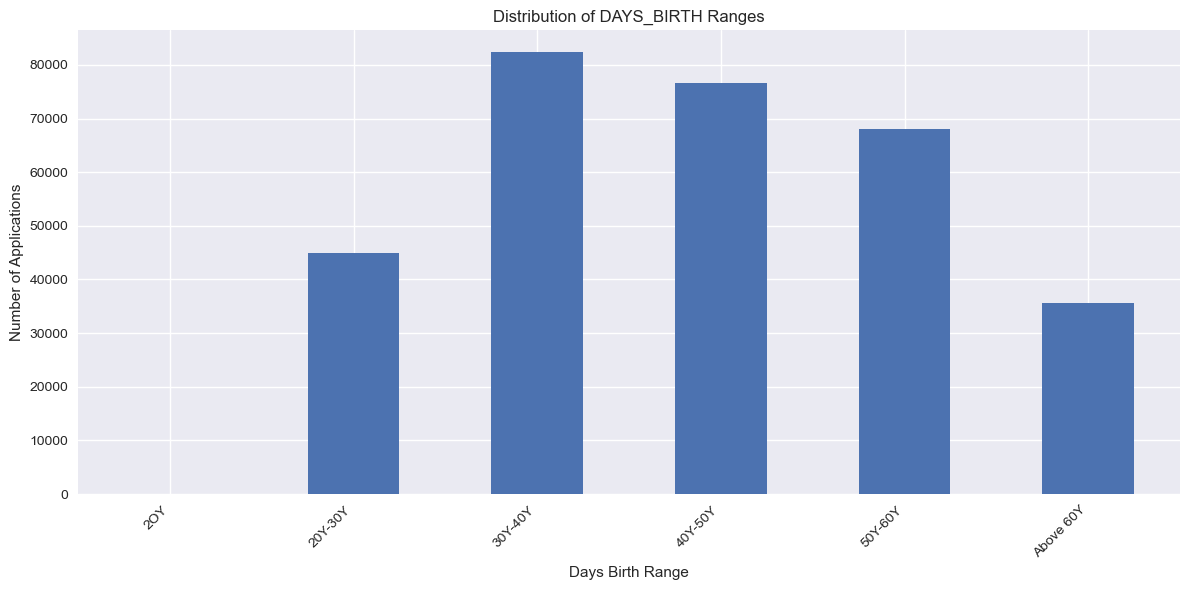


Summary Statistics for DAYS_BIRTH:
--------------------------------------------------
count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64


In [33]:
# Identify data distribution across different percentiles for DAYS_BIRTH
DAYS_BIRTH_QUANTILES = cleaned_application_data['DAYS_BIRTH'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99])
print("Data Distribution Across Different Percentiles:")
print("-" * 50)
print(DAYS_BIRTH_QUANTILES)

# Create bins and labels for DAYS_BIRTH
bins = [0,7300,10950,14600,18250,21900,25229]
ranges = ['2OY', '20Y-30Y','30Y-40Y','40Y-50Y','50Y-60Y','Above 60Y']

# Create new column with binned values
cleaned_application_data['DAYS_BIRTH_RANGE'] = pd.cut(cleaned_application_data['DAYS_BIRTH'], 
                                                    bins=bins, 
                                                    labels=ranges)

# Display the size of each range
range_sizes = cleaned_application_data.groupby('DAYS_BIRTH_RANGE').size()
print("\nDistribution of DAYS_BIRTH ranges:")
print("-" * 50)
print(range_sizes)

# Calculate and display percentages
range_percentages = (range_sizes / len(cleaned_application_data) * 100).round(2)
print("\nPercentage distribution:")
print("-" * 50)
print(range_percentages.astype(str) + '%')

# Create a bar plot of the distribution
plt.figure(figsize=(12, 6))
range_sizes.plot(kind='bar')
plt.title('Distribution of DAYS_BIRTH Ranges')
plt.xlabel('Days Birth Range')
plt.ylabel('Number of Applications')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Additional statistics
print("\nSummary Statistics for DAYS_BIRTH:")
print("-" * 50)
print(cleaned_application_data['DAYS_BIRTH'].describe())

### 6. Data Analysis

### Univariate Analysis of Categorical Features

### Overview
This univariate analysis focuses on understanding the distribution and characteristics of key categorical features in the loan dataset. By analyzing each feature individually, we aim to gain insights into patterns, trends, and potential risk factors that may influence loan defaults. These findings are intended to provide a foundation for identifying high-risk profiles and preparing data for further analysis.

#### Features for Analysis
The following categorical features are included in this analysis:

1. **NAME_CONTRACT_TYPE** - Type of contract for each loan application (e.g., cash loans, revolving credit).
2. **CODE_GENDER** - Gender of the applicant, potentially revealing trends in loan repayment behavior.
3. **NAME_TYPE_SUITE** - Type of suite accompanying the applicant during the loan application process (e.g., spouse, children).
4. **NAME_INCOME_TYPE** - Source of income for the applicant (e.g., working, pensioner, commercial associate).
5. **NAME_EDUCATION_TYPE** - Applicant's education level, which may impact employment stability and income.
6. **NAME_FAMILY_STATUS** - Family status of the applicant (e.g., married, single), which could influence financial obligations and stability.
7. **NAME_HOUSING_TYPE** - Housing situation of the applicant, offering insight into their financial commitments.
8. **OCCUPATION_TYPE** - Applicant’s profession, a factor that may correlate with income stability and loan default risk.

#### Analysis Approach
For each categorical feature, the following steps guide this analysis:

1. **Basic Distribution Analysis**:
   - Count and display the unique values, occurrences, and percentages within the dataset. This distribution helps identify the most common categories and any potential data imbalances.

2. **Missing Value Check**:
   - Evaluate the proportion of missing values to assess data completeness and identify any gaps that could affect analysis accuracy.

3. **Default Rate Analysis**:
   - Calculate default rates for each category and apply statistical tests (e.g., chi-square) to evaluate the relationship between feature categories and loan defaults. This helps determine if certain categories are associated with higher default risks.

4. **Financial Analysis by Category**:
   - For each category, compute summary statistics of key financial metrics (income, credit amount, annuity) and financial ratios like credit-to-income and annuity-to-income. These metrics aim to provide a clearer view of the financial profiles associated with each category.

5. **Visualization**:
   - Bar plots, pie charts, and box plots visually represent distributions, default rates, and financial metrics by category. These visualizations facilitate spotting trends, identifying high-risk groups, and communicating insights effectively to stakeholders.

#### Expected Insights
- **Distribution and Trends**: The analysis highlights the most common categories in each feature, such as prevalent contract types, income sources, and education levels.
- **Default Risk Indicators**: Categories with higher default rates suggest which groups may require more stringent risk assessments.
- **Financial Variability**: Variations in income, credit amount, and other financial metrics across categories help indicate which groups may have more stable financial situations.

#### Stakeholder Impact
This univariate analysis aims to equip stakeholders with a foundational understanding of categorical trends and risk factors within the loan data. The anticipated insights support data-driven decisions in areas like loan approval criteria, customer profiling, and risk management strategies.


In [34]:
# View info about the dataset
print("View the basic information of the dataset:")
print("-" * 50)
cleaned_application_data.info()

# View the head of the dataset
print("\nFirst 5 rows of object fetures:")
print("-" * 50)
cleaned_application_data.select_dtypes(include=['object']).head()

View the basic information of the dataset:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   CNT_CHILDREN                 307511 non-null  int64   
 5   AMT_INCOME_TOTAL             307511 non-null  float64 
 6   AMT_CREDIT                   307511 non-null  float64 
 7   AMT_ANNUITY                  307511 non-null  float64 
 8   AMT_GOODS_PRICE              307511 non-null  float64 
 9   NAME_TYPE_SUITE              307511 non-null  object  
 10  NAME_INCOME_TYPE             307511 non-null  object  
 11  NAME_EDUCA

NAME_CONTRACT_TYPE CODE_GENDER NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         Cash loans           M   Unaccompanied          Working   
1         Cash loans           F          Family    State servant   
2    Revolving loans           M   Unaccompanied          Working   
3         Cash loans           F   Unaccompanied          Working   
4         Cash loans           M   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

  OCCUPATION_TYPE       ORGANIZATION_TYPE  
0        Laborers  Business Entity Type 3  
1      Core staff                  School  
2        Laborers              Government  
3        Laborers  Business Entity Type 3  
4      Core staff                Religion

In [35]:
# Display the object columns
print("\nList of object columns:")
print("-" * 50)
obj_variables = cleaned_application_data.select_dtypes(include=['object']).columns
obj_variables


List of object columns:
--------------------------------------------------


Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE'],
      dtype='object')

#### Analysis of `NAME_CONTRACT_TYPE` and Relationship with `TARGET`
- **Objective:** Understand the distribution of contract types and analyze their relationship with loan repayment status.
  
- **Steps:**
  - Retrieve unique values in `NAME_CONTRACT_TYPE` and counte occurrences of each contract type.
  - Calculate proportions for each contract type to understand its share in the dataset.
  - Analyze the relationship between `NAME_CONTRACT_TYPE` and `TARGET` (loan repayment status) through cross-tabulation.

- **Visualizations:**
  - **Pie Chart** for `NAME_CONTRACT_TYPE` distribution, highlighting the share of each contract type.
  - **Bar Plot** displaying loan repayment (TARGET) distribution by contract type to observe default patterns.
  - **Bar Plot** for default percentages across contract types, color-coded for clarity.

- **Statistical Insights:**
  - **Default Rates by Contract Type**: Calculate to show the likelihood of default for each contract type.
  - **Chi-Square Test of Independence**: Perform to assess the statistical association between `NAME_CONTRACT_TYPE` and `TARGET`.
    - Chi-square statistic and p-value obtained indicate whether the association is significant.

- **Outcome:** The analysis reveals key insights on default rates by contract type, which could be valuable in understanding the risk associated with different loan types and in making informed lending decisions.

Unique values in NAME_CONTRACT_TYPE:
--------------------------------------------------
['Cash loans' 'Revolving loans']

Count of each contract type:
--------------------------------------------------
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

Proportion of each contract type:
--------------------------------------------------
Cash loans         90.5
Revolving loans     9.5
Name: NAME_CONTRACT_TYPE, dtype: float64 %

Cross-tabulation of CONTRACT_TYPE and TARGET:
--------------------------------------------------
TARGET                  0     1
NAME_CONTRACT_TYPE             
Cash loans          91.65  8.35
Revolving loans     94.52  5.48

Default Rate by Contract Type:
--------------------------------------------------
NAME_CONTRACT_TYPE
Cash loans         8.35
Revolving loans    5.48
Name: TARGET, dtype: float64 %

Chi-square Test Results:
--------------------------------------------------
Chi-square statistic: 293.1505
p-value: 0.0000

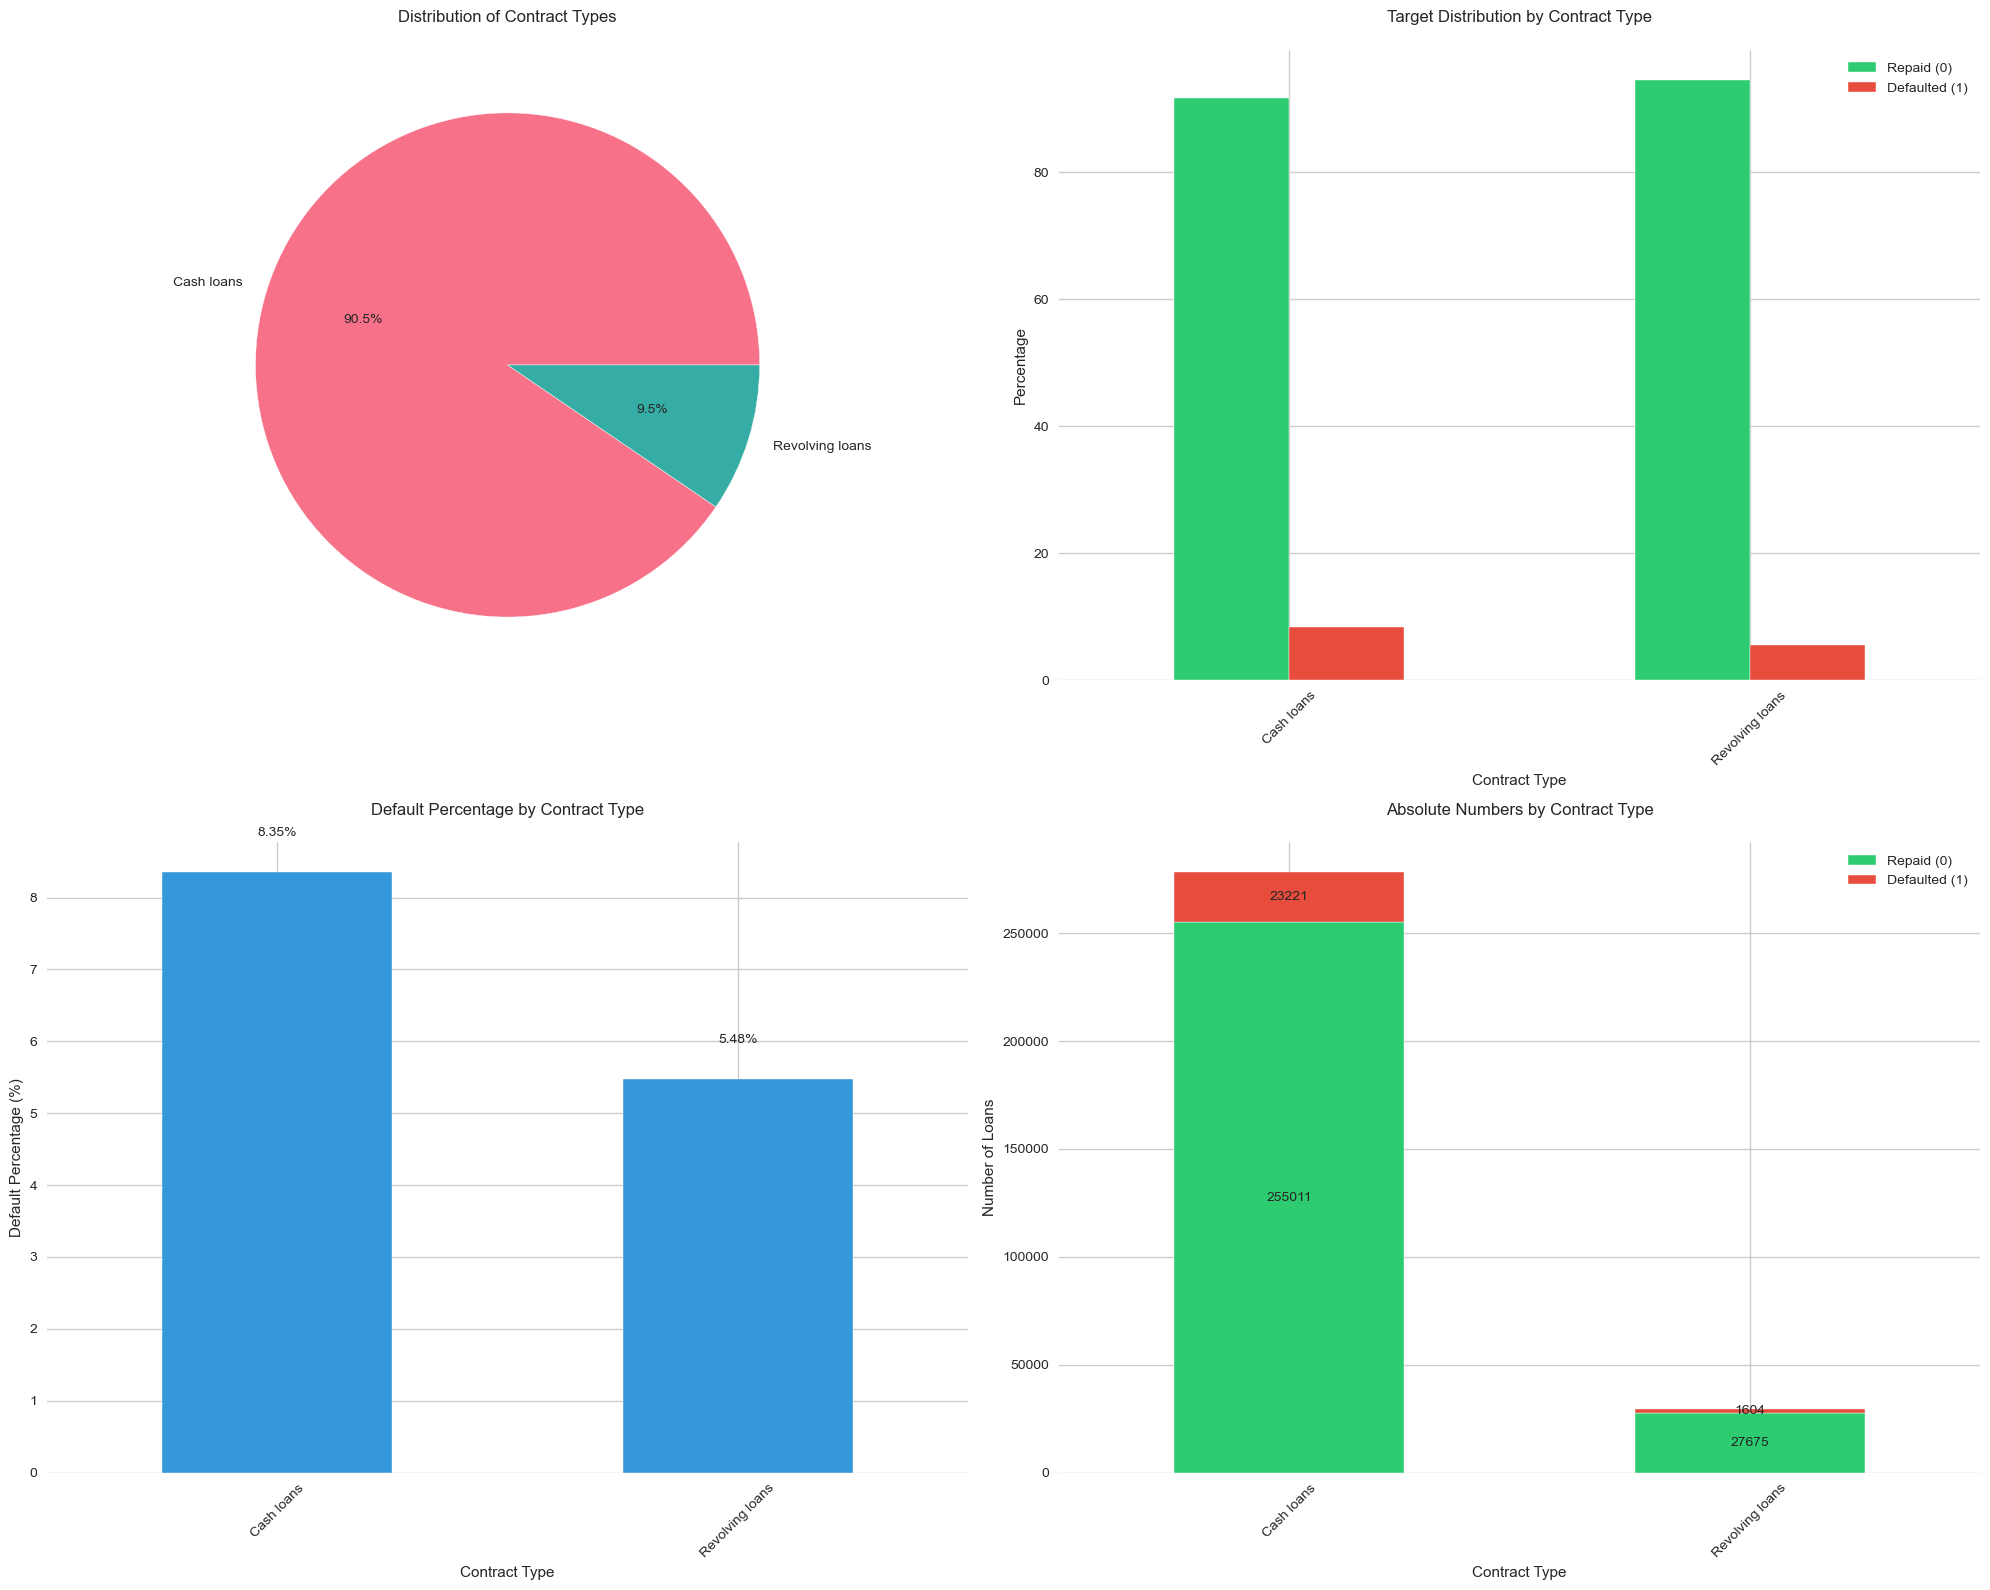

In [36]:
def analyze_contract_types(data):
    """
    Perform comprehensive analysis of contract types and their relationship with the target variable
    
    Parameters:
    data (pandas.DataFrame): DataFrame containing 'NAME_CONTRACT_TYPE' and 'TARGET' columns
    """
    # Set the style
    sns.set_style("whitegrid")
    
    # Basic analysis
    print("Unique values in NAME_CONTRACT_TYPE:")
    print("-" * 50)
    print(data['NAME_CONTRACT_TYPE'].unique())
    
    # Get counts and proportions
    contract_type_counts = data['NAME_CONTRACT_TYPE'].value_counts()
    contract_type_proportions = data['NAME_CONTRACT_TYPE'].value_counts(normalize=True)
    
    print("\nCount of each contract type:")
    print("-" * 50)
    print(contract_type_counts)
    
    print("\nProportion of each contract type:")
    print("-" * 50)
    print(contract_type_proportions.round(3) * 100, '%')
    
    # Cross-tabulation analysis
    crosstab = pd.crosstab(data['NAME_CONTRACT_TYPE'], 
                          data['TARGET'], 
                          normalize='index') * 100
    print("\nCross-tabulation of CONTRACT_TYPE and TARGET:")
    print("-" * 50)
    print(crosstab.round(2))
    
    # Create visualizations
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    
    # 1. Pie chart for contract type distribution
    axes[0, 0].pie(contract_type_counts, 
                   labels=contract_type_counts.index, 
                   autopct='%1.1f%%',
                   colors=sns.color_palette("husl", n_colors=len(contract_type_counts)))
    axes[0, 0].set_title('Distribution of Contract Types', pad=20)
    
    # 2. Bar plot for TARGET distribution by contract type
    crosstab.plot(kind='bar', ax=axes[0, 1], color=['#2ecc71', '#e74c3c'])
    axes[0, 1].set_title('Target Distribution by Contract Type', pad=20)
    axes[0, 1].set_xlabel('Contract Type')
    axes[0, 1].set_ylabel('Percentage')
    axes[0, 1].legend(['Repaid (0)', 'Defaulted (1)'])
    axes[0, 1].tick_params(axis='x', rotation=45)
    
    # 3. Bar plot for default percentages
    default_percentages = (data.groupby('NAME_CONTRACT_TYPE')['TARGET'].mean() * 100).round(2)
    default_percentages.plot(kind='bar', ax=axes[1, 0], color='#3498db')
    axes[1, 0].set_title('Default Percentage by Contract Type', pad=20)
    axes[1, 0].set_xlabel('Contract Type')
    axes[1, 0].set_ylabel('Default Percentage (%)')
    axes[1, 0].tick_params(axis='x', rotation=45)
    
    # Add percentage labels
    for i, v in enumerate(default_percentages):
        axes[1, 0].text(i, v + 0.5, f'{v}%', ha='center')
    
    # 4. Stacked bar chart showing absolute numbers
    absolute_counts = pd.crosstab(data['NAME_CONTRACT_TYPE'], data['TARGET'])
    absolute_counts.plot(kind='bar', stacked=True, ax=axes[1, 1],
                        color=['#2ecc71', '#e74c3c'])
    axes[1, 1].set_title('Absolute Numbers by Contract Type', pad=20)
    axes[1, 1].set_xlabel('Contract Type')
    axes[1, 1].set_ylabel('Number of Loans')
    axes[1, 1].legend(['Repaid (0)', 'Defaulted (1)'])
    axes[1, 1].tick_params(axis='x', rotation=45)
    
    # Add numbers on bars
    for c in axes[1, 1].containers:
        axes[1, 1].bar_label(c, label_type='center')
    
    # Adjust layout
    plt.tight_layout()
    
    # Statistical tests
    contingency_table = pd.crosstab(data['NAME_CONTRACT_TYPE'], data['TARGET'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    print("\nDefault Rate by Contract Type:")
    print("-" * 50)
    print(default_percentages.round(2), '%')
    
    print("\nChi-square Test Results:")
    print("-" * 50)
    print(f"Chi-square statistic: {chi2:.4f}")
    print(f"p-value: {p_value:.4f}")
    
    return fig

fig2 = analyze_contract_types(cleaned_application_data)
plt.show()

#### Analysis of `CODE_GENDER` Column
- **Objective:** Investigate the distribution of genders, analyze loan repayment behavior by gender, and examine financial metrics based on gender.

- **Steps:**
  - **Basic Distribution and Missing Values:**
    - Check unique values and calculate the count and percentage distribution for each gender.
    - Verify that there are no missing values in `CODE_GENDER`.
  - **Default Analysis by Gender:**
    - Analyze default rates (TARGET variable) for each gender and perform a Chi-square test to determine if default rates vary significantly by gender.
  - **Financial Metrics Analysis:**
    - Compare average, median, and standard deviation for key financial metrics (`AMT_INCOME_TOTAL`, `AMT_CREDIT`, and `AMT_ANNUITY`) by gender.
  
- **Visualizations:**
  - **Pie Chart** showing the overall gender distribution.
  - **Bar Chart** displaying default rates by gender, with color-coded bars indicating the lowest and highest default rates.
  - **Box Plots** for each financial metric to observe the income, credit amount, and annuity amount distribution by gender.

- **Statistical Insights:**
  - **Default Rate by Gender:** Identify and visualize default rates for each gender.
  - **Chi-Square Test Result:** Perform to evaluate the statistical significance of gender differences in default rates.
  
- **Outcome:** The analysis highlights differences in default rates and financial characteristics by gender, providing insights into the role of gender in loan performance.

Analysis of CODE_GENDER Column

1. Basic Distribution Analysis:
------------------------------
Unique values: ['M' 'F' 'XNA']

Value counts:
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

Percentages:
F      65.83%
M      34.16%
XNA      0.0%
Name: CODE_GENDER, dtype: object

Missing values: 0 (0.0%)

2. Default Analysis by Gender:
------------------------------

Default rates by gender (%):
TARGET            0      1
CODE_GENDER               
F             93.00   7.00
M             89.86  10.14
XNA          100.00   0.00

Chi-square test:
Chi-square statistic: 920.79
p-value: 0.0000000000

Interpretation:
There is a statistically significant relationship between gender and default rate

3. Financial Analysis by Gender:
------------------------------

Financial metrics by gender:
            AMT_INCOME_TOTAL                      AMT_CREDIT            \
                        mean    median        std       mean    median   
CODE_GENDER                    

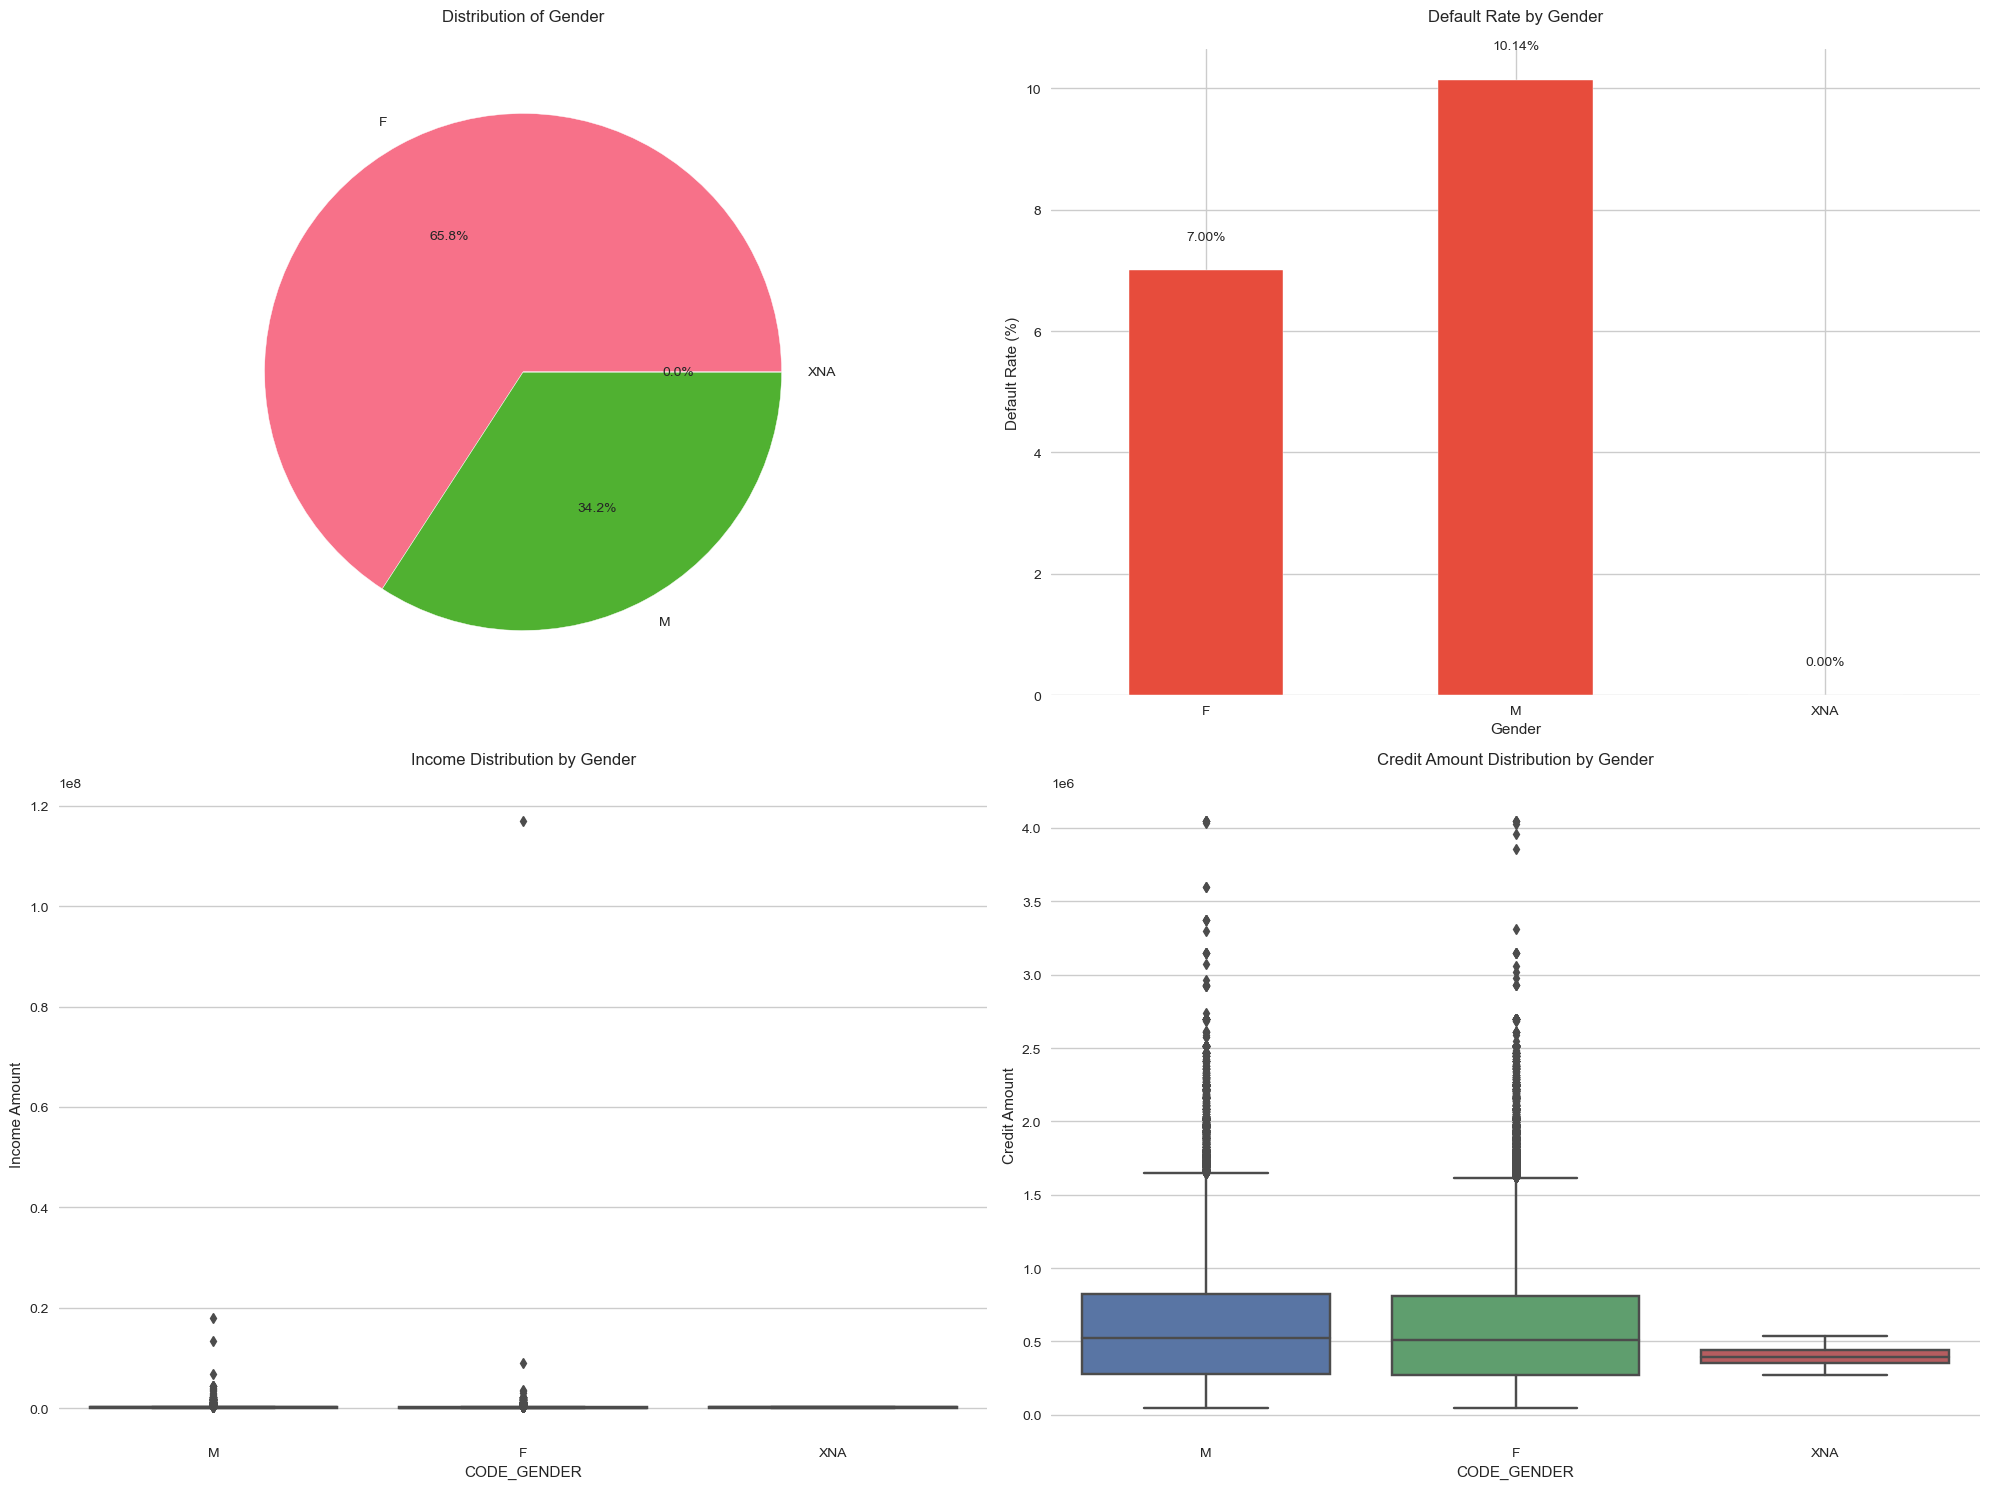

In [37]:
def analyze_gender_distribution(data):
    """
    Perform comprehensive analysis of gender distribution and its relationship with various metrics
    
    Parameters:
    data (pandas.DataFrame): DataFrame containing 'CODE_GENDER' and related columns
    """
    print("Analysis of CODE_GENDER Column")
    print("=" * 50)
    
    # 1. Basic Distribution Analysis
    print("\n1. Basic Distribution Analysis:")
    print("-" * 30)
    
    gender_counts = data['CODE_GENDER'].value_counts()
    gender_percentages = (gender_counts / len(data) * 100).round(2)
    
    print("Unique values:", data['CODE_GENDER'].unique())
    print("\nValue counts:")
    print(gender_counts)
    print("\nPercentages:")
    print(gender_percentages.astype(str) + '%')
    
    # Missing values check
    missing_count = data['CODE_GENDER'].isnull().sum()
    missing_percentage = (missing_count / len(data) * 100).round(2)
    print(f"\nMissing values: {missing_count} ({missing_percentage}%)")
    
    # 2. Default Analysis
    print("\n2. Default Analysis by Gender:")
    print("-" * 30)
    
    default_by_gender = pd.crosstab(data['CODE_GENDER'], 
                                   data['TARGET'],
                                   normalize='index') * 100
    print("\nDefault rates by gender (%):")
    print(default_by_gender.round(2))
    
    # Chi-square test
    contingency_table = pd.crosstab(data['CODE_GENDER'], data['TARGET'])
    chi2, p_value = stats.chi2_contingency(contingency_table)[:2]
    print(f"\nChi-square test:")
    print(f"Chi-square statistic: {chi2:.2f}")
    print(f"p-value: {p_value:.10f}")
    
    # Interpretation of chi-square test
    print("\nInterpretation:")
    if p_value < 0.05:
        print("There is a statistically significant relationship between gender and default rate")
    else:
        print("There is no statistically significant relationship between gender and default rate")
    
    # 3. Financial Analysis
    print("\n3. Financial Analysis by Gender:")
    print("-" * 30)
    
    financial_metrics = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']
    financial_analysis = data.groupby('CODE_GENDER')[financial_metrics].agg([
        ('mean', 'mean'),
        ('median', 'median'),
        ('std', 'std')
    ]).round(2)
    
    print("\nFinancial metrics by gender:")
    print(financial_analysis)
    
    # Mann-Whitney U tests for financial metrics
    print("\nMann-Whitney U Test Results:")
    for metric in financial_metrics:
        male_data = data[data['CODE_GENDER'] == 'M'][metric]
        female_data = data[data['CODE_GENDER'] == 'F'][metric]
        stat, p_val = mannwhitneyu(male_data, female_data)
        print(f"\n{metric}:")
        print(f"Statistic: {stat:.2f}")
        print(f"p-value: {p_val:.10f}")
        print("Interpretation: " + ("Significant difference" if p_val < 0.05 else "No significant difference"))
    
    # 4. Visualizations
    print("\n4. Creating Visualizations...")
    
    # Create a figure with subplots
    fig = plt.figure(figsize=(20, 15))
    
    # 1. Gender Distribution Pie Chart
    ax1 = plt.subplot(2, 2, 1)
    plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',
            colors=sns.color_palette("husl", n_colors=len(gender_counts)))
    plt.title('Distribution of Gender', pad=20)
    
    # 2. Default Rates by Gender
    ax2 = plt.subplot(2, 2, 2)
    default_rates = data.groupby('CODE_GENDER')['TARGET'].mean() * 100
    colors = ['#2ecc71' if x == min(default_rates) else '#e74c3c' for x in default_rates]
    default_rates.plot(kind='bar', color=colors, ax=ax2)
    ax2.set_title('Default Rate by Gender', pad=20)
    ax2.set_xlabel('Gender')
    ax2.set_ylabel('Default Rate (%)')
    ax2.tick_params(axis='x', rotation=0)
    
    # Add percentage labels
    for i, v in enumerate(default_rates):
        ax2.text(i, v + 0.5, f'{v:.2f}%', ha='center')
    
    # 3. Financial Metrics Boxplots
    ax3 = plt.subplot(2, 2, 3)
    sns.boxplot(x='CODE_GENDER', y='AMT_INCOME_TOTAL', data=data, ax=ax3)
    ax3.set_title('Income Distribution by Gender', pad=20)
    ax3.set_ylabel('Income Amount')
    
    ax4 = plt.subplot(2, 2, 4)
    sns.boxplot(x='CODE_GENDER', y='AMT_CREDIT', data=data, ax=ax4)
    ax4.set_title('Credit Amount Distribution by Gender', pad=20)
    ax4.set_ylabel('Credit Amount')
    
    # Adjust layout
    plt.tight_layout()
    
    return fig

fig3 = analyze_gender_distribution(cleaned_application_data)
plt.show()

#### Analysis of `NAME_TYPE_SUITE` Column
- **Objective:** Explore the distribution of `NAME_TYPE_SUITE` values, examine its relationship with loan default rates (TARGET), and assess financial metrics based on suite type.

- **Steps Performed:**
  - **Basic Distribution and Missing Values:**
    - Check unique values, value counts, and percentage distribution across suite types.
    - Identify missing values and calculate their percentage within `NAME_TYPE_SUITE`.
  - **Default Analysis by Suite Type:**
    - Calculate and visualize default rates for each suite type.
    - Conducte a Chi-square test to assess the relationship between suite type and default rate.
  - **Financial Metrics Analysis:**
    - Examine financial metrics (`AMT_INCOME_TOTAL`, `AMT_CREDIT`, and `AMT_ANNUITY`) across different suite types.
  - **Additional Analysis:**
    - Explore the relationship of suite types with other variables, including gender distribution and average credit amount.

- **Visualizations:**
  - **Bar Chart** showing the overall distribution of suite types.
  - **Bar Plot** displaying default rates by suite type, with color coding for emphasis.
  - Additional bar plot for visualizing relationships with financial metrics and other key variables.

- **Statistical Insights:**
  - **Default Rate by Suite Type:** Visualize default percentages by suite type, highlighting the suite types associated with higher risk.
  - **Chi-Square Test Result:** Validate statistical significance of suite type in relation to default rates.

- **Outcome:** This analysis provides a clearer understanding of how suite type may impact loan default rates and financial metrics, which can guide more targeted customer insights and loan risk assessment.

Analysis of NAME_TYPE_SUITE Column
--------------------------------------------------

1. Basic Distribution:
------------------------------
Unique values: ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people']

Value counts:
Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

Percentages:
Unaccompanied      81.24%
Family             13.06%
Spouse, partner      3.7%
Children            1.06%
Other_B             0.58%
Other_A             0.28%
Group of people     0.09%
Name: NAME_TYPE_SUITE, dtype: object

Missing values: 0 (0.0%)

2. Default Analysis by Suite Type:
------------------------------

Default rates by suite type (%):
TARGET               0     1
NAME_TYPE_SUITE             
Children         92.62  7.38
Family           92.51  7.49
Group of people  91.51  8.49
Other_A    

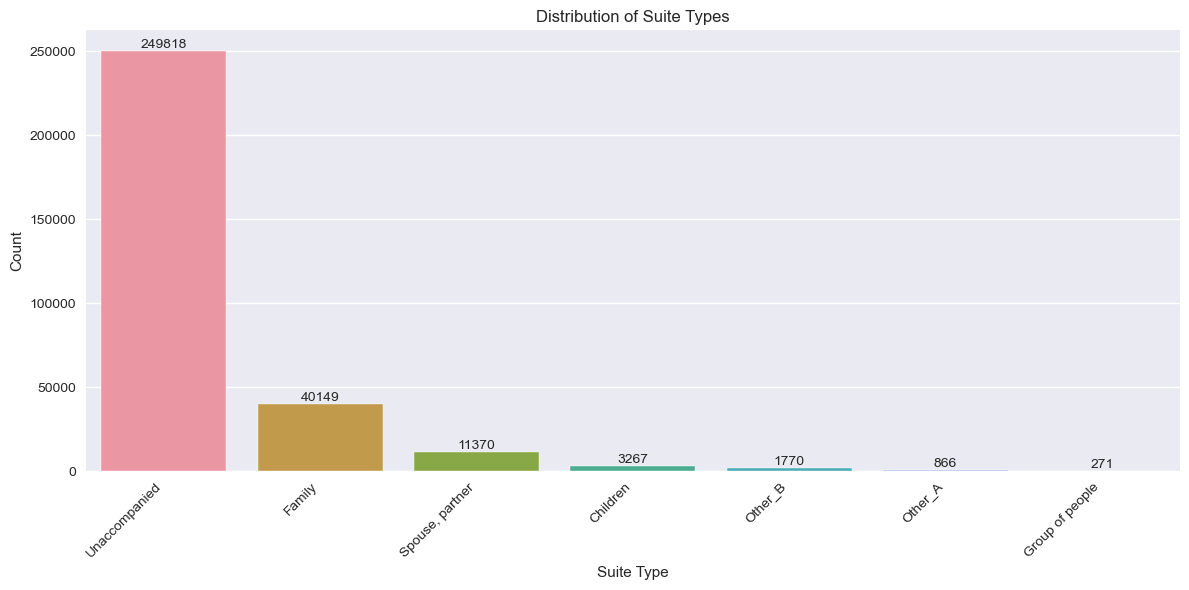

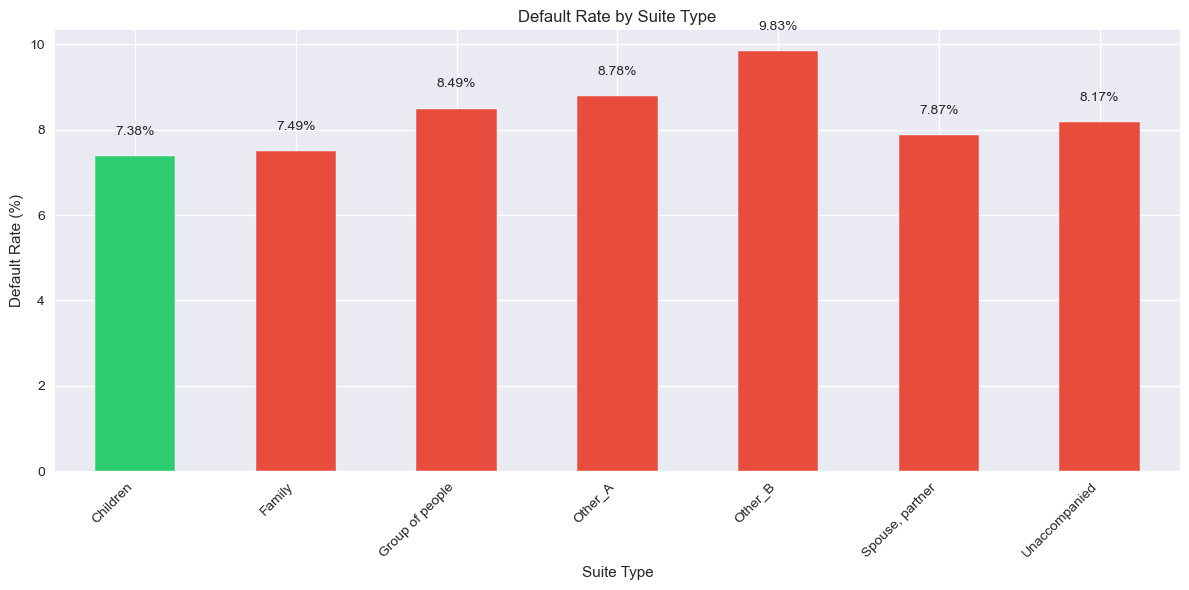


5. Relationship with Other Key Variables:
------------------------------

Gender distribution by suite type (%):
CODE_GENDER          F      M  XNA
NAME_TYPE_SUITE                   
Children         85.46  14.54  0.0
Family           68.38  31.61  0.0
Group of people  61.99  38.01  0.0
Other_A          62.24  37.76  0.0
Other_B          69.32  30.68  0.0
Spouse, partner  55.33  44.67  0.0
Unaccompanied    65.64  34.36  0.0

Average credit amount by suite type:
NAME_TYPE_SUITE
Children           580523.94
Family             619353.22
Group of people    571435.51
Other_A            581041.84
Other_B            552112.48
Spouse, partner    649443.50
Unaccompanied      594131.12
Name: AMT_CREDIT, dtype: float64


In [38]:
# Basic analysis of NAME_TYPE_SUITE
print("Analysis of NAME_TYPE_SUITE Column")
print("-" * 50)

# 1. Look at unique values and basic counts
print("\n1. Basic Distribution:")
print("-" * 30)
suite_counts = cleaned_application_data['NAME_TYPE_SUITE'].value_counts()
suite_percentages = (suite_counts / len(cleaned_application_data) * 100).round(2)

print("Unique values:", cleaned_application_data['NAME_TYPE_SUITE'].unique())
print("\nValue counts:")
print(suite_counts)
print("\nPercentages:")
print(suite_percentages.astype(str) + '%')

# 2. Missing values check
missing_count = cleaned_application_data['NAME_TYPE_SUITE'].isnull().sum()
missing_percentage = (missing_count / len(cleaned_application_data) * 100).round(2)
print(f"\nMissing values: {missing_count} ({missing_percentage}%)")

# 3. Target (Default) Analysis
print("\n2. Default Analysis by Suite Type:")
print("-" * 30)

# Calculate default rates by suite type
default_by_suite = pd.crosstab(cleaned_application_data['NAME_TYPE_SUITE'], 
                              cleaned_application_data['TARGET'],
                              normalize='index') * 100
print("\nDefault rates by suite type (%):")
print(default_by_suite.round(2))

# Chi-square test
contingency_table = pd.crosstab(cleaned_application_data['NAME_TYPE_SUITE'], 
                               cleaned_application_data['TARGET'])
chi2, p_value = stats.chi2_contingency(contingency_table)[:2]
print(f"\nChi-square test:")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p_value:.10f}")

# 4. Financial Analysis by Suite Type
print("\n3. Financial Analysis by Suite Type:")
print("-" * 30)

financial_metrics = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']
financial_analysis = cleaned_application_data.groupby('NAME_TYPE_SUITE')[financial_metrics].agg([
    ('mean', 'mean'),
    ('median', 'median'),
    ('std', 'std')
]).round(2)

print("\nFinancial metrics by suite type:")
print(financial_analysis)

# 5. Visualizations
print("\n4. Creating Visualizations...")
print("-" * 30)

# Set up the plotting style
plt.style.use('seaborn')

# Figure 1: Suite Type Distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=suite_counts.index, y=suite_counts.values)
plt.title('Distribution of Suite Types')
plt.xlabel('Suite Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(suite_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Figure 2: Default Rates by Suite Type
plt.figure(figsize=(12, 6))
default_rates = cleaned_application_data.groupby('NAME_TYPE_SUITE')['TARGET'].mean() * 100
colors = ['#2ecc71' if x == min(default_rates) else '#e74c3c' for x in default_rates]
ax = default_rates.plot(kind='bar', color=colors)
plt.title('Default Rate by Suite Type')
plt.xlabel('Suite Type')
plt.ylabel('Default Rate (%)')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(default_rates):
    plt.text(i, v + 0.5, f'{v:.2f}%', ha='center')
plt.tight_layout()
plt.show()

# Additional Analysis: Correlation with other categorical variables
print("\n5. Relationship with Other Key Variables:")
print("-" * 30)

# Analyze relationship with CODE_GENDER
gender_suite_cross = pd.crosstab(cleaned_application_data['NAME_TYPE_SUITE'], 
                                cleaned_application_data['CODE_GENDER'], 
                                normalize='index') * 100
print("\nGender distribution by suite type (%):")
print(gender_suite_cross.round(2))

# Calculate average credit amount by suite type
avg_credit = cleaned_application_data.groupby('NAME_TYPE_SUITE')['AMT_CREDIT'].mean().round(2)
print("\nAverage credit amount by suite type:")
print(avg_credit)

#### Analysis of `NAME_INCOME_TYPE` Column
- **Objective:** Explore the distribution of income types, assess their relationship with loan default rates (TARGET), and examine key financial metrics across income categories.

- **Steps Performed:**
  - **Basic Distribution and Missing Values:**
    - Check unique values, value counts, and percentage distribution for `NAME_INCOME_TYPE`.
    - Identify any missing values and calculate their percentage within the column.
  - **Default Analysis by Income Type:**
    - Calculate default rates by income type, examining potential associations.
    - Conduct a Chi-square test to assess the statistical relationship between income type and default rates.
  - **Financial Metrics Analysis by Income Type:**
    - Assess financial metrics (`AMT_INCOME_TOTAL`, `AMT_CREDIT`, and `AMT_ANNUITY`) by income type.
    - Calculate additional financial ratios, such as Credit-to-Income and Annuity-to-Income ratios.
  - **Additional Analysis:**
    - Analyze relationships with other key variables, including education distribution and average age by income type.

- **Visualizations:**
  - **Bar Chart** of income type distribution.
  - **Bar Plot** for default rates by income type.
  - **Box Plots** for financial metrics distribution by income type (e.g., income, credit, annuity amounts).
  - Additional box plot visualizing Credit-to-Income ratios across income types.

- **Statistical Insights:**
  - **Default Rates by Income Type:** Identify income types associated with higher default rates, providing insights for risk assessment.
  - **Financial Ratios Analysis:** Ratios highlight financial stability differences across income types, aiding in credit evaluation.
  - **Chi-Square Test Result:** Provide statistical significance of income type associations with default rates.

- **Outcome:** This analysis offers a comprehensive view of how income types affect loan default risks, financial metrics, and key borrower characteristics, aiding financial institutions in tailoring credit policies for different income categories.

Analysis of NAME_INCOME_TYPE Column
--------------------------------------------------

1. Basic Distribution:
------------------------------
Unique values: ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']

Value counts:
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

Percentages:
Working                 51.63%
Commercial associate    23.29%
Pensioner                18.0%
State servant            7.06%
Unemployed               0.01%
Student                  0.01%
Businessman               0.0%
Maternity leave           0.0%
Name: NAME_INCOME_TYPE, dtype: object

Missing values: 0 (0.0%)

2. Default Analysis by Income Type:
------------------------------

Default rates by income type 

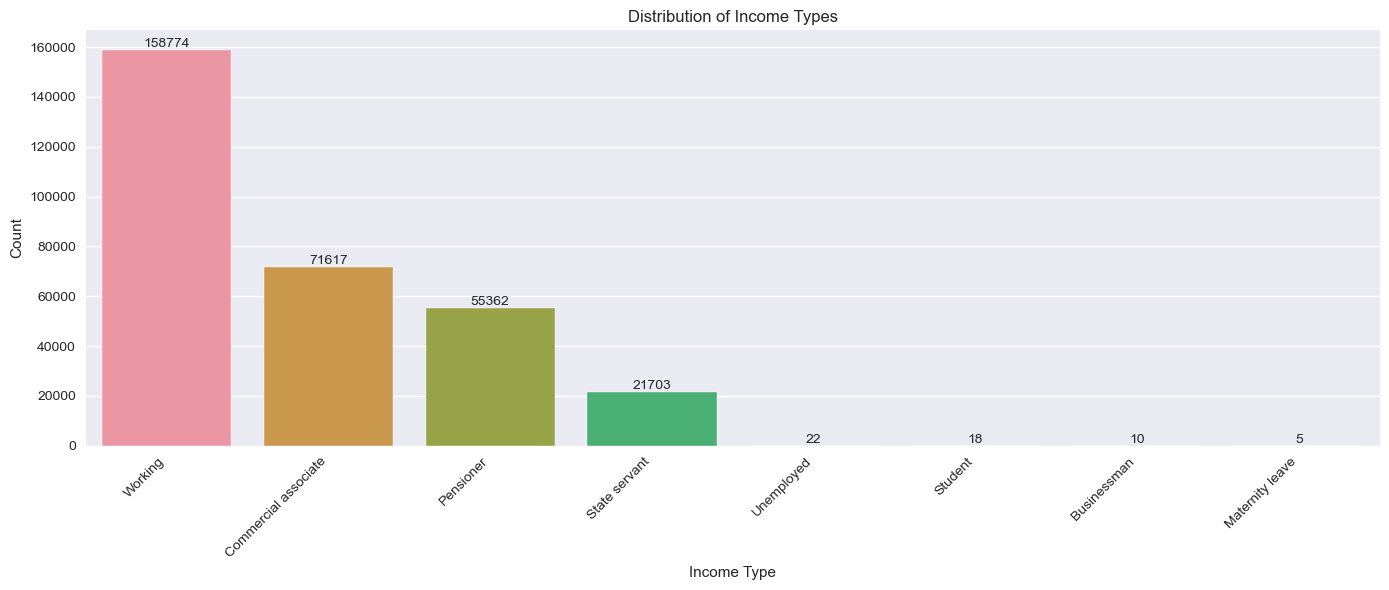

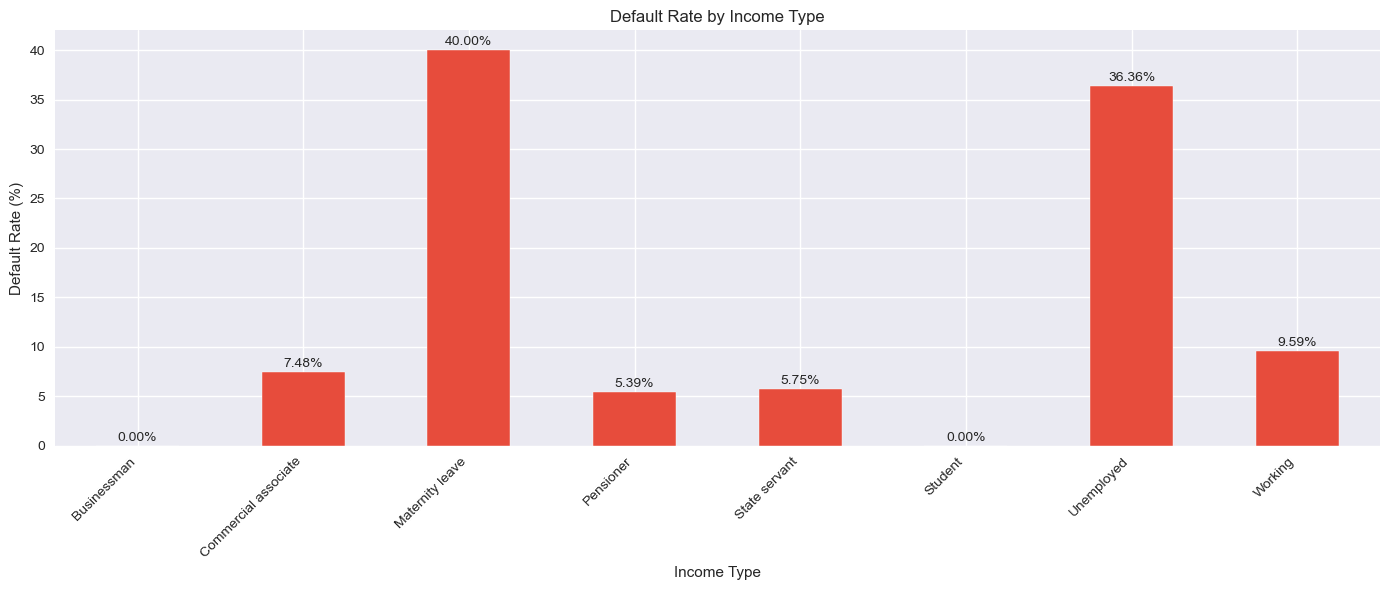

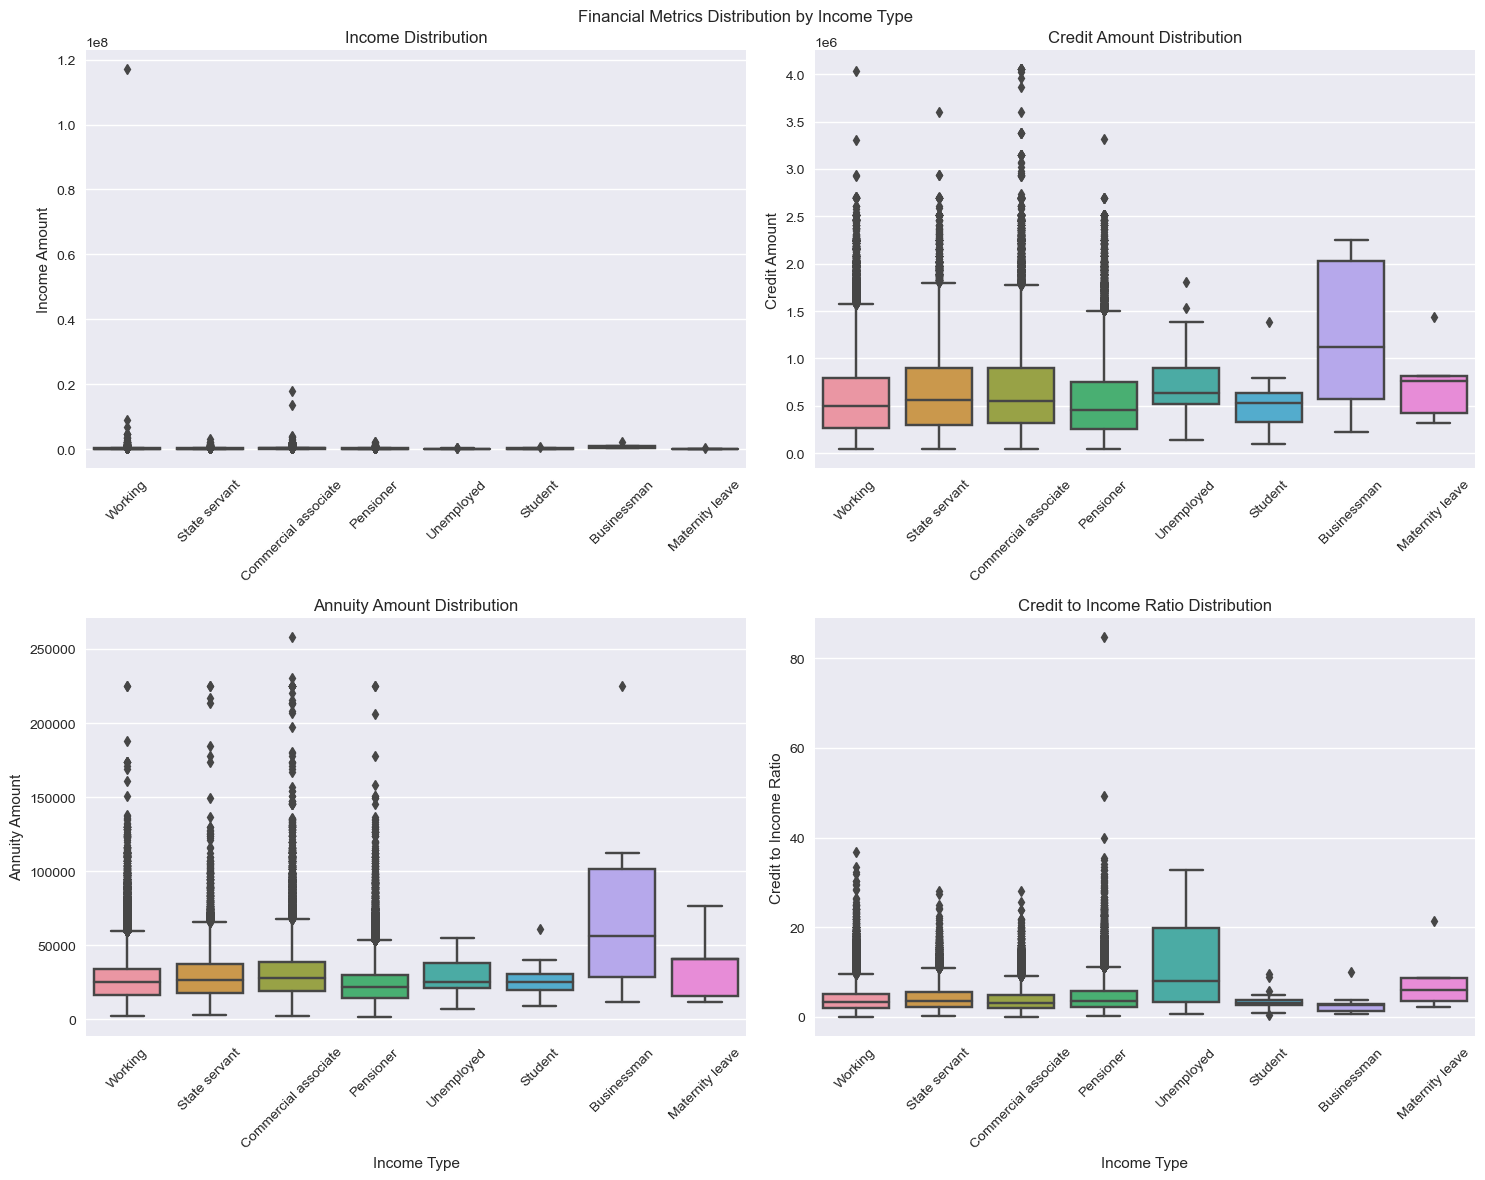


5. Additional Analysis:
------------------------------

Education distribution by income type (%):
NAME_EDUCATION_TYPE   Academic degree  Higher education  Incomplete higher  \
NAME_INCOME_TYPE                                                             
Businessman                      0.00            100.00               0.00   
Commercial associate             0.06             33.55               4.75   
Maternity leave                  0.00             60.00               0.00   
Pensioner                        0.05             14.79               0.94   
State servant                    0.11             40.84               3.55   
Student                          0.00             33.33               5.56   
Unemployed                       0.00             27.27              13.64   
Working                          0.05             21.26               3.52   

NAME_EDUCATION_TYPE   Lower secondary  Secondary / secondary special  
NAME_INCOME_TYPE                                

In [39]:
# Basic analysis of NAME_INCOME_TYPE
print("Analysis of NAME_INCOME_TYPE Column")
print("-" * 50)

# 1. Look at unique values and basic counts
print("\n1. Basic Distribution:")
print("-" * 30)
income_type_counts = cleaned_application_data['NAME_INCOME_TYPE'].value_counts()
income_type_percentages = (income_type_counts / len(cleaned_application_data) * 100).round(2)

print("Unique values:", cleaned_application_data['NAME_INCOME_TYPE'].unique())
print("\nValue counts:")
print(income_type_counts)
print("\nPercentages:")
print(income_type_percentages.astype(str) + '%')

# 2. Missing values check
missing_count = cleaned_application_data['NAME_INCOME_TYPE'].isnull().sum()
missing_percentage = (missing_count / len(cleaned_application_data) * 100).round(2)
print(f"\nMissing values: {missing_count} ({missing_percentage}%)")

# 3. Target (Default) Analysis
print("\n2. Default Analysis by Income Type:")
print("-" * 30)

# Calculate default rates by income type
default_by_income_type = pd.crosstab(cleaned_application_data['NAME_INCOME_TYPE'], 
                                    cleaned_application_data['TARGET'],
                                    normalize='index') * 100
print("\nDefault rates by income type (%):")
print(default_by_income_type.round(2))

# Chi-square test
contingency_table = pd.crosstab(cleaned_application_data['NAME_INCOME_TYPE'], 
                               cleaned_application_data['TARGET'])
chi2, p_value = stats.chi2_contingency(contingency_table)[:2]
print(f"\nChi-square test:")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p_value:.10f}")

# 4. Financial Analysis by Income Type
print("\n3. Financial Analysis by Income Type:")
print("-" * 30)

financial_metrics = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']
financial_analysis = cleaned_application_data.groupby('NAME_INCOME_TYPE')[financial_metrics].agg([
    ('mean', 'mean'),
    ('median', 'median'),
    ('std', 'std')
]).round(2)

print("\nFinancial metrics by income type:")
print(financial_analysis)

# Calculate additional financial ratios
print("\nFinancial ratios by income type:")
financial_ratios = cleaned_application_data.groupby('NAME_INCOME_TYPE').agg({
    'AMT_CREDIT': lambda x: (x / cleaned_application_data.loc[x.index, 'AMT_INCOME_TOTAL']).mean(),
    'AMT_ANNUITY': lambda x: (x / cleaned_application_data.loc[x.index, 'AMT_INCOME_TOTAL']).mean()
}).round(3)
financial_ratios.columns = ['Credit-to-Income Ratio', 'Annuity-to-Income Ratio']
print(financial_ratios)

# 5. Visualizations
print("\n4. Creating Visualizations...")
print("-" * 30)

# Set up the plotting style
plt.style.use('seaborn')

# Figure 1: Income Type Distribution
plt.figure(figsize=(14, 6))
sns.barplot(x=income_type_counts.index, y=income_type_counts.values)
plt.title('Distribution of Income Types')
plt.xlabel('Income Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(income_type_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Figure 2: Default Rates by Income Type
plt.figure(figsize=(14, 6))
default_rates = cleaned_application_data.groupby('NAME_INCOME_TYPE')['TARGET'].mean() * 100
colors = ['#2ecc71' if x == min(default_rates) else '#e74c3c' for x in default_rates]
ax = default_rates.plot(kind='bar', color=colors)
plt.title('Default Rate by Income Type')
plt.xlabel('Income Type')
plt.ylabel('Default Rate (%)')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(default_rates):
    plt.text(i, v + 0.5, f'{v:.2f}%', ha='center')
plt.tight_layout()
plt.show()

# Figure 3: Financial Metrics by Income Type
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Financial Metrics Distribution by Income Type')

# Income Distribution
sns.boxplot(x='NAME_INCOME_TYPE', y='AMT_INCOME_TOTAL', data=cleaned_application_data, ax=axes[0,0])
axes[0,0].set_title('Income Distribution')
axes[0,0].set_xlabel('')
axes[0,0].set_ylabel('Income Amount')
axes[0,0].tick_params(axis='x', rotation=45)

# Credit Amount Distribution
sns.boxplot(x='NAME_INCOME_TYPE', y='AMT_CREDIT', data=cleaned_application_data, ax=axes[0,1])
axes[0,1].set_title('Credit Amount Distribution')
axes[0,1].set_xlabel('')
axes[0,1].set_ylabel('Credit Amount')
axes[0,1].tick_params(axis='x', rotation=45)

# Annuity Amount Distribution
sns.boxplot(x='NAME_INCOME_TYPE', y='AMT_ANNUITY', data=cleaned_application_data, ax=axes[1,0])
axes[1,0].set_title('Annuity Amount Distribution')
axes[1,0].set_xlabel('Income Type')
axes[1,0].set_ylabel('Annuity Amount')
axes[1,0].tick_params(axis='x', rotation=45)

# Credit to Income Ratio
sns.boxplot(data=cleaned_application_data, 
            x='NAME_INCOME_TYPE', 
            y=cleaned_application_data['AMT_CREDIT']/cleaned_application_data['AMT_INCOME_TOTAL'],
            ax=axes[1,1])
axes[1,1].set_title('Credit to Income Ratio Distribution')
axes[1,1].set_xlabel('Income Type')
axes[1,1].set_ylabel('Credit to Income Ratio')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Additional Analysis: Relationship with other variables
print("\n5. Additional Analysis:")
print("-" * 30)

# Income Type by Education
education_income_cross = pd.crosstab(cleaned_application_data['NAME_INCOME_TYPE'], 
                                   cleaned_application_data['NAME_EDUCATION_TYPE'], 
                                   normalize='index') * 100
print("\nEducation distribution by income type (%):")
print(education_income_cross.round(2))

# Average age by income type
age_by_income = cleaned_application_data.groupby('NAME_INCOME_TYPE')['DAYS_BIRTH'].mean().apply(lambda x: abs(x)/365).round(1)
print("\nAverage age by income type:")
print(age_by_income)

#### Analysis of `NAME_EDUCATION_TYPE`

- **Objective:** Analyze the education level of applicants to understand its influence on loan default and financial behaviors.
  
- **Approach:**
  1. **Distribution Analysis:** Evaluate the unique education categories, their counts, and distribution across the dataset.
  2. **Missing Values:** Check for any missing data within this column and calculate the percentage, if any.
  3. **Default Analysis by Education Level:** Conduct a chi-square test to examine the relationship between education level and loan default.
  4. **Financial Analysis:** Investigate financial metrics (income, credit, annuity) by education level to identify patterns.
  5. **Additional Analysis:**
      - Calculate the age and employment tenure averages by education level.
      - Examine income type distribution across different education levels.
  
- **Insights Derived:**
  - **Default Rates:** Observe and visualize default rates across education levels, which provide insights into risk profiles associated with each education category.
  - **Financial Distribution:** Analyze the distributions of income, credit amount, and annuity by education level to spot significant financial trends.
  - **Additional Trends:** Explore correlations with other variables like age and employment years, giving a comprehensive understanding of applicant profiles by education.

- **Outcome:** This analysis offers valuable insights on how education level correlates with financial behavior and loan default risk, enabling targeted risk assessment and improved lending criteria.

Analysis of NAME_EDUCATION_TYPE Column
--------------------------------------------------

1. Basic Distribution:
------------------------------
Unique values: ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

Value counts:
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

Percentages:
Secondary / secondary special    71.02%
Higher education                 24.34%
Incomplete higher                 3.34%
Lower secondary                   1.24%
Academic degree                   0.05%
Name: NAME_EDUCATION_TYPE, dtype: object

Missing values: 0 (0.0%)

2. Default Analysis by Education Level:
------------------------------

Default rates by education level (%):
TARGET                             0      1
NAME_EDUCATION_TYPE                    

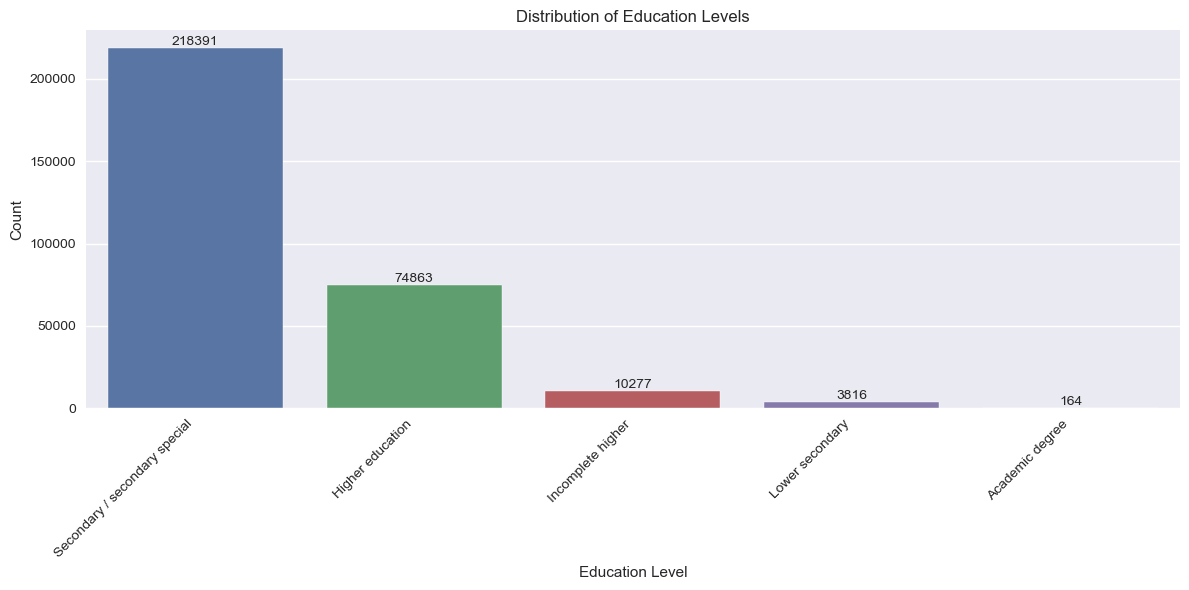

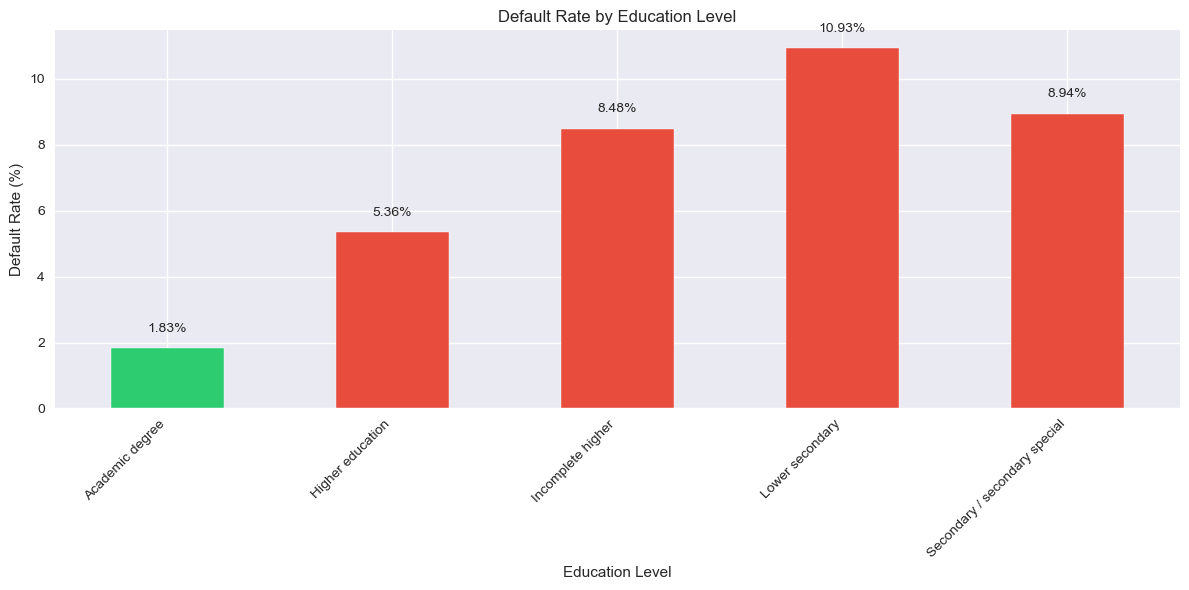

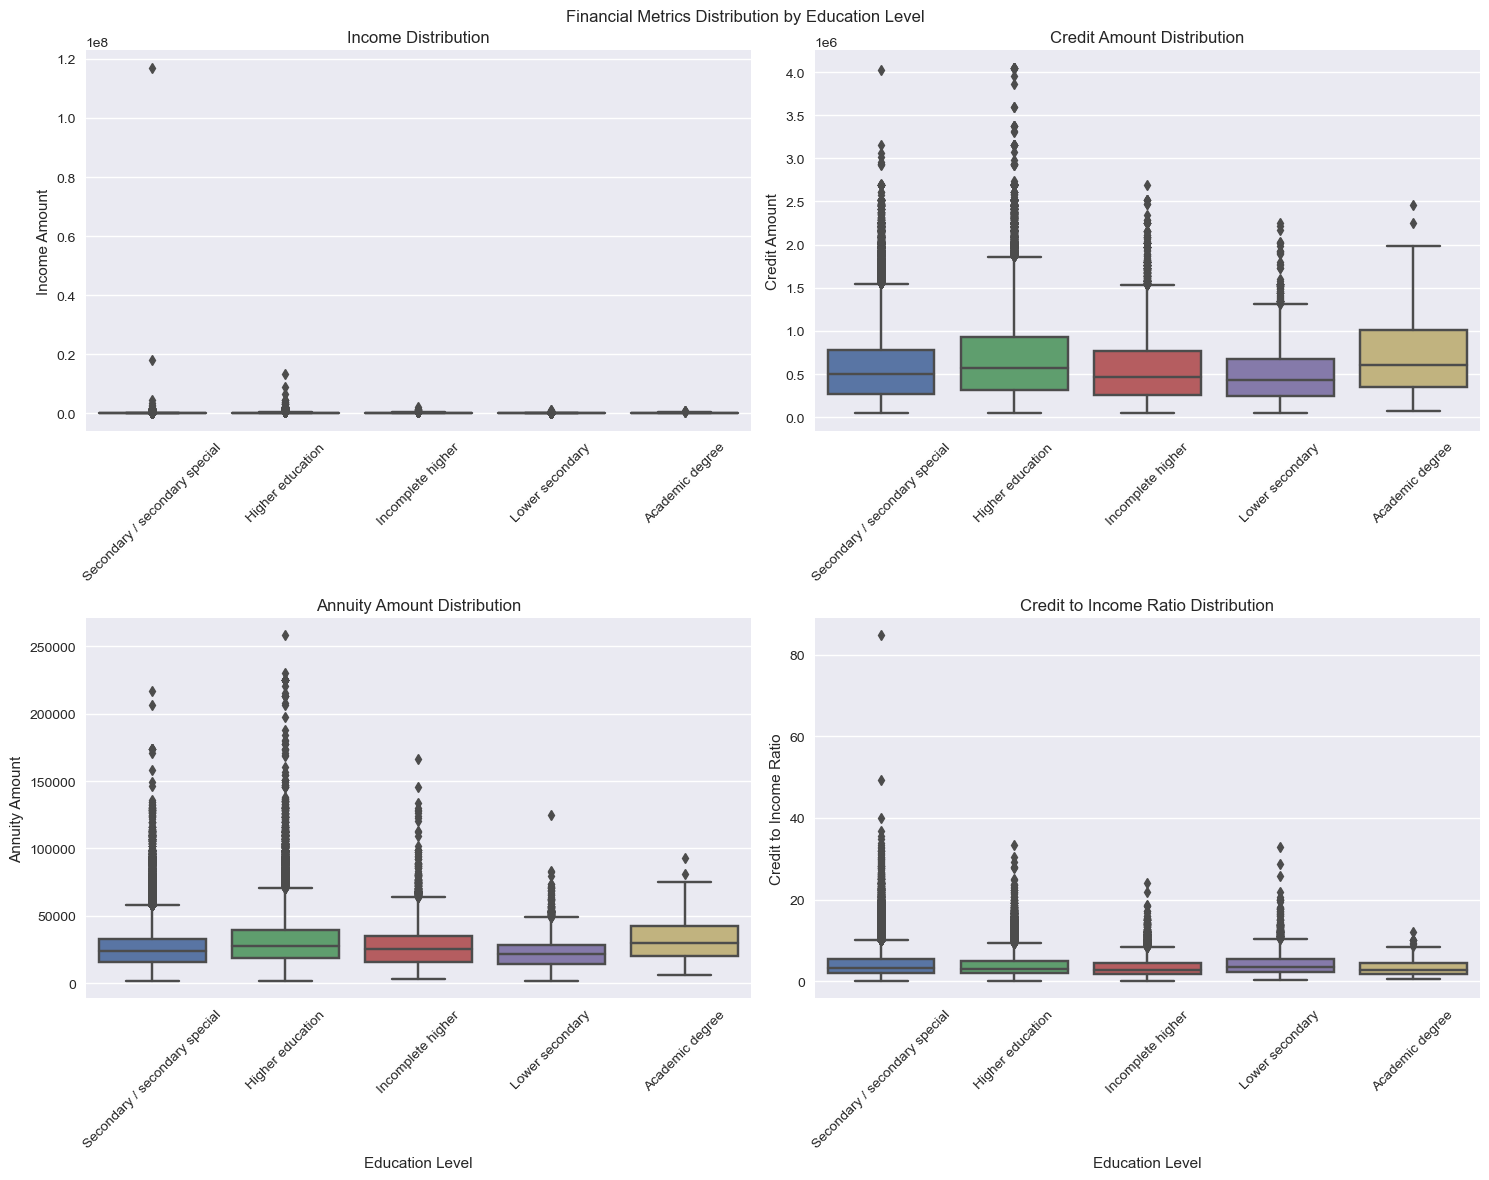


5. Additional Analysis:
------------------------------

Average age in days by education level:
NAME_EDUCATION_TYPE
Academic degree                  44.5
Higher education                 41.5
Incomplete higher                34.5
Lower secondary                  48.4
Secondary / secondary special    45.1
Name: DAYS_BIRTH, dtype: float64

Average days of employment by education level:
NAME_EDUCATION_TYPE
Academic degree                  164.3
Higher education                 115.3
Incomplete higher                 55.0
Lower secondary                  404.5
Secondary / secondary special    212.0
Name: DAYS_EMPLOYED, dtype: float64

Income type distribution by education level (%):
NAME_INCOME_TYPE               Businessman  Commercial associate  \
NAME_EDUCATION_TYPE                                                
Academic degree                       0.00                 26.22   
Higher education                      0.01                 32.09   
Incomplete higher                     0

In [40]:
# Basic analysis of NAME_EDUCATION_TYPE
print("Analysis of NAME_EDUCATION_TYPE Column")
print("-" * 50)

# 1. Look at unique values and basic counts
print("\n1. Basic Distribution:")
print("-" * 30)
education_counts = cleaned_application_data['NAME_EDUCATION_TYPE'].value_counts()
education_percentages = (education_counts / len(cleaned_application_data) * 100).round(2)

print("Unique values:", cleaned_application_data['NAME_EDUCATION_TYPE'].unique())
print("\nValue counts:")
print(education_counts)
print("\nPercentages:")
print(education_percentages.astype(str) + '%')

# 2. Missing values check
missing_count = cleaned_application_data['NAME_EDUCATION_TYPE'].isnull().sum()
missing_percentage = (missing_count / len(cleaned_application_data) * 100).round(2)
print(f"\nMissing values: {missing_count} ({missing_percentage}%)")

# 3. Target (Default) Analysis
print("\n2. Default Analysis by Education Level:")
print("-" * 30)

# Calculate default rates by education type
default_by_education = pd.crosstab(cleaned_application_data['NAME_EDUCATION_TYPE'], 
                                 cleaned_application_data['TARGET'],
                                 normalize='index') * 100
print("\nDefault rates by education level (%):")
print(default_by_education.round(2))

# Chi-square test
contingency_table = pd.crosstab(cleaned_application_data['NAME_EDUCATION_TYPE'], 
                               cleaned_application_data['TARGET'])
chi2, p_value = stats.chi2_contingency(contingency_table)[:2]
print(f"\nChi-square test:")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p_value:.10f}")

# 4. Financial Analysis by Education Level
print("\n3. Financial Analysis by Education Level:")
print("-" * 30)

financial_metrics = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']
financial_analysis = cleaned_application_data.groupby('NAME_EDUCATION_TYPE')[financial_metrics].agg([
    ('mean', 'mean'),
    ('median', 'median'),
    ('std', 'std')
]).round(2)

print("\nFinancial metrics by education level:")
print(financial_analysis)

# Calculate additional financial ratios
print("\nFinancial ratios by education level:")
financial_ratios = cleaned_application_data.groupby('NAME_EDUCATION_TYPE').agg({
    'AMT_CREDIT': lambda x: (x / cleaned_application_data.loc[x.index, 'AMT_INCOME_TOTAL']).mean(),
    'AMT_ANNUITY': lambda x: (x / cleaned_application_data.loc[x.index, 'AMT_INCOME_TOTAL']).mean()
}).round(3)
financial_ratios.columns = ['Credit-to-Income Ratio', 'Annuity-to-Income Ratio']
print(financial_ratios)

# 5. Visualizations
print("\n4. Creating Visualizations...")
print("-" * 30)

# Set up the plotting style
plt.style.use('seaborn')

# Figure 1: Education Type Distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=education_counts.index, y=education_counts.values)
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(education_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Figure 2: Default Rates by Education Level
plt.figure(figsize=(12, 6))
default_rates = cleaned_application_data.groupby('NAME_EDUCATION_TYPE')['TARGET'].mean() * 100
colors = ['#2ecc71' if x == min(default_rates) else '#e74c3c' for x in default_rates]
ax = default_rates.plot(kind='bar', color=colors)
plt.title('Default Rate by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Default Rate (%)')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(default_rates):
    plt.text(i, v + 0.5, f'{v:.2f}%', ha='center')
plt.tight_layout()
plt.show()

# Figure 3: Financial Metrics by Education Level
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Financial Metrics Distribution by Education Level')

# Income Distribution
sns.boxplot(x='NAME_EDUCATION_TYPE', y='AMT_INCOME_TOTAL', data=cleaned_application_data, ax=axes[0,0])
axes[0,0].set_title('Income Distribution')
axes[0,0].set_xlabel('')
axes[0,0].set_ylabel('Income Amount')
axes[0,0].tick_params(axis='x', rotation=45)

# Credit Amount Distribution
sns.boxplot(x='NAME_EDUCATION_TYPE', y='AMT_CREDIT', data=cleaned_application_data, ax=axes[0,1])
axes[0,1].set_title('Credit Amount Distribution')
axes[0,1].set_xlabel('')
axes[0,1].set_ylabel('Credit Amount')
axes[0,1].tick_params(axis='x', rotation=45)

# Annuity Amount Distribution
sns.boxplot(x='NAME_EDUCATION_TYPE', y='AMT_ANNUITY', data=cleaned_application_data, ax=axes[1,0])
axes[1,0].set_title('Annuity Amount Distribution')
axes[1,0].set_xlabel('Education Level')
axes[1,0].set_ylabel('Annuity Amount')
axes[1,0].tick_params(axis='x', rotation=45)

# Credit to Income Ratio
sns.boxplot(data=cleaned_application_data, 
            x='NAME_EDUCATION_TYPE', 
            y=cleaned_application_data['AMT_CREDIT']/cleaned_application_data['AMT_INCOME_TOTAL'],
            ax=axes[1,1])
axes[1,1].set_title('Credit to Income Ratio Distribution')
axes[1,1].set_xlabel('Education Level')
axes[1,1].set_ylabel('Credit to Income Ratio')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Additional Analysis
print("\n5. Additional Analysis:")
print("-" * 30)

# Age distribution by education level
age_by_education = cleaned_application_data.groupby('NAME_EDUCATION_TYPE')['DAYS_BIRTH'].mean().apply(lambda x: abs(x)/365).round(1)
print("\nAverage age in days by education level:")
print(age_by_education)

# Employment analysis by education
employment_years = cleaned_application_data.groupby('NAME_EDUCATION_TYPE')['DAYS_EMPLOYED'].mean().apply(lambda x: abs(x)/365).round(1)
print("\nAverage days of employment by education level:")
print(employment_years)

# Income type distribution by education
income_education_cross = pd.crosstab(cleaned_application_data['NAME_EDUCATION_TYPE'], 
                                   cleaned_application_data['NAME_INCOME_TYPE'], 
                                   normalize='index') * 100
print("\nIncome type distribution by education level (%):")
print(income_education_cross.round(2))

#### Analysis of `NAME_FAMILY_STATUS`

- **Objective:** Examine how family status influences loan default risk and financial behavior to identify potential risk factors.

- **Approach:**
  1. **Distribution Analysis:** Analyze unique family status categories, their counts, and their percentage distribution within the dataset.
  2. **Missing Values:** Verifiy if any missing values exist within the column and calculate their percentage, if applicable.
  3. **Default Rate Analysis:** Assess default rates across family statuses, conducting a chi-square test to understand the statistical relationship between family status and loan default.
  4. **Financial Metrics by Family Status:** Examine income, credit, and annuity distributions across family statuses to observe any significant financial patterns.
  5. **Additional Analysis:**
      - Analyze average age and years of employment by family status.
      - Review income type distributions by family status to identify correlations.

- **Insights Derived:**
  - **Default Trends:** Observe family status categories with higher default rates, indicating possible risk factors related to family structure.
  - **Financial Patterns:** Identify family status categories with significant variations in income, credit, and annuity values.
  - **Additional Relationships:** Examine relationships between family status and other demographics, such as age and employment years, to gain comprehensive insight.

- **Outcome:** This analysis helps highlight key family demographics and financial metrics that could assist in assessing loan risk based on family status, supporting more targeted and informed loan decisions.


Analysis of NAME_FAMILY_STATUS Column
--------------------------------------------------

1. Basic Distribution:
------------------------------
Unique values: ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']

Value counts:
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

Percentages:
Married                 63.88%
Single / not married    14.78%
Civil marriage           9.68%
Separated                6.43%
Widow                    5.23%
Unknown                   0.0%
Name: NAME_FAMILY_STATUS, dtype: object

Missing values: 0 (0.0%)

2. Default Analysis by Family Status:
------------------------------

Default rates by family status (%):
TARGET                     0     1
NAME_FAMILY_STATUS                
Civil marriage         90.06  9.94
Married                92.44  7.56
Separ

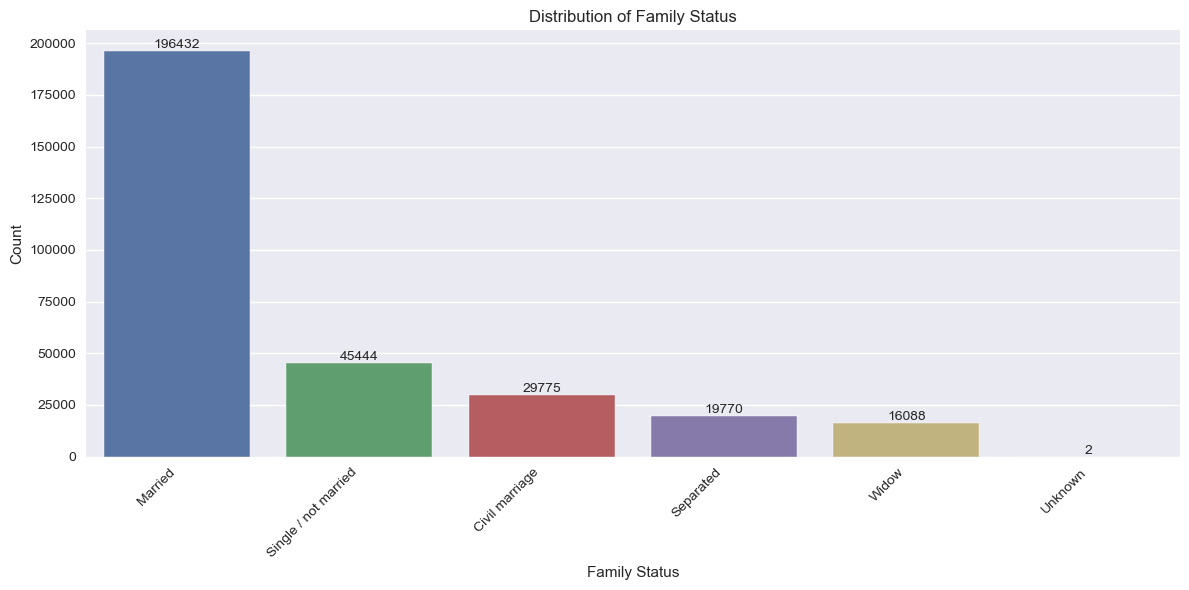

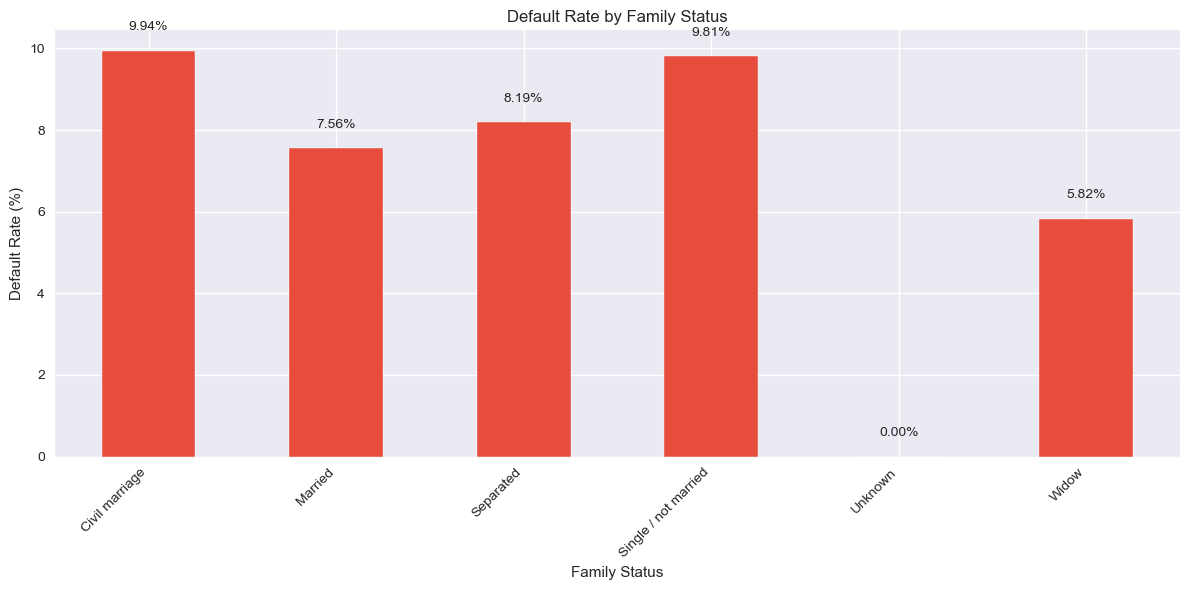

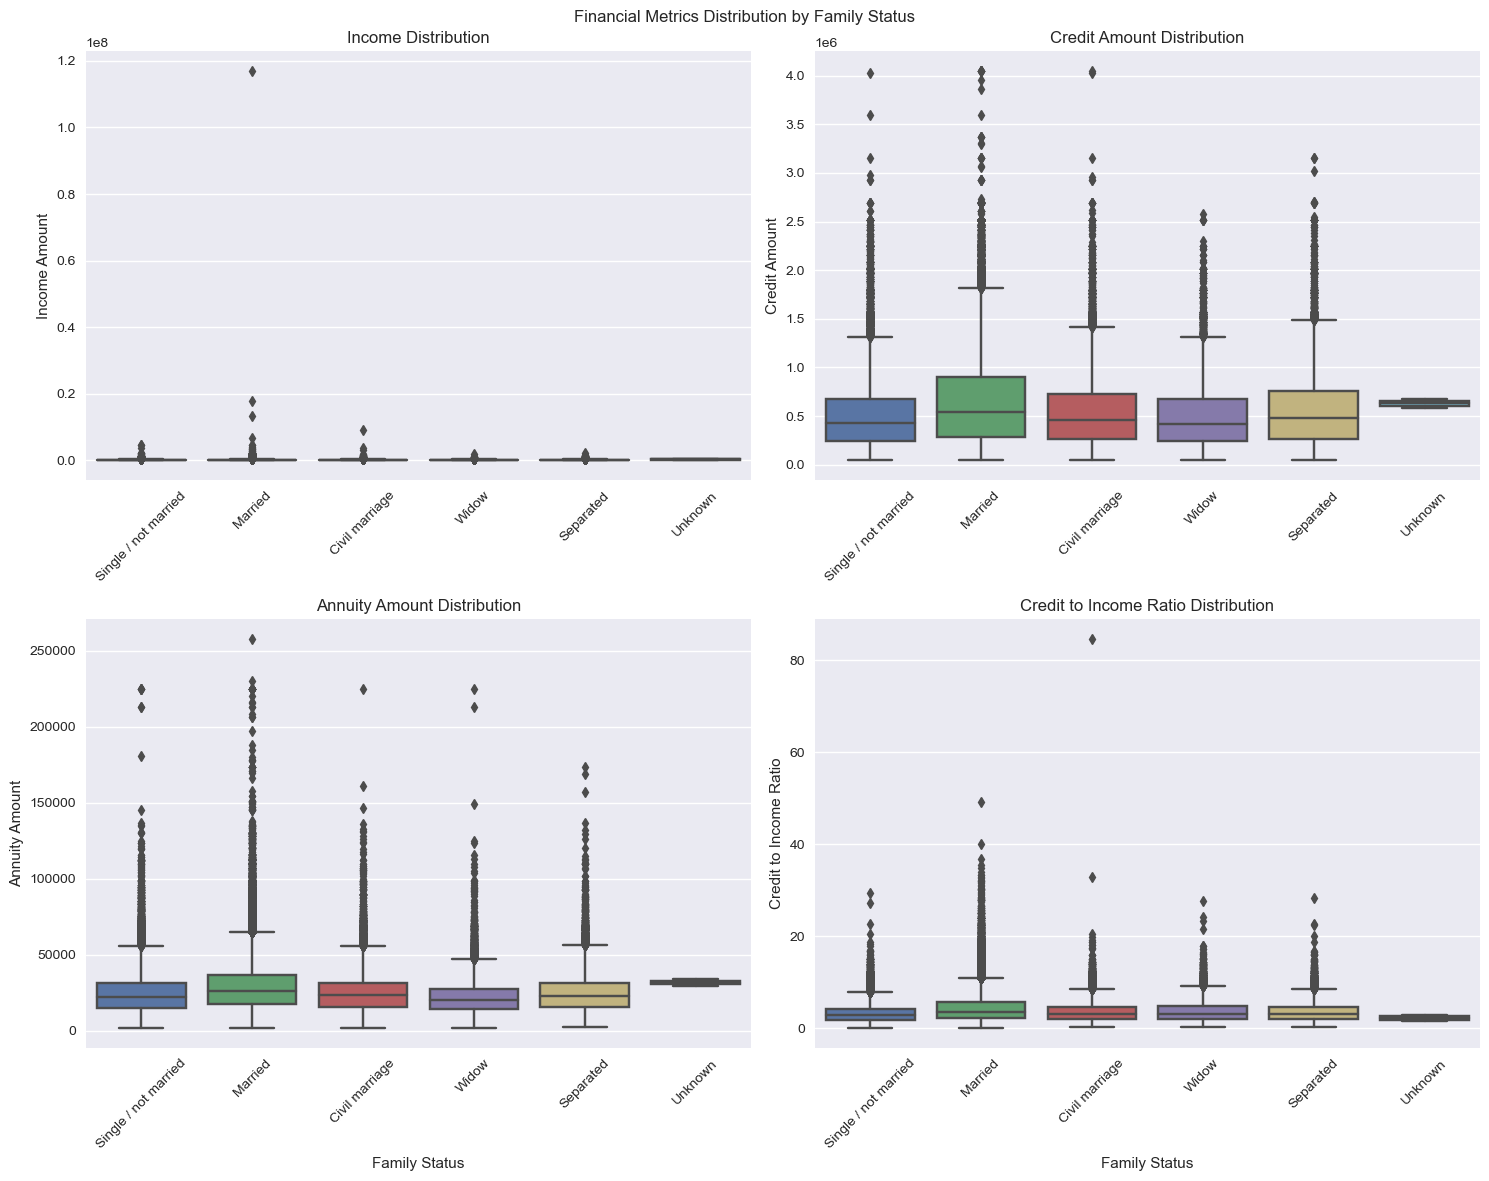


5. Additional Analysis:
------------------------------

Average age by family status:
NAME_FAMILY_STATUS
Civil marriage          41.5
Married                 44.0
Separated               46.4
Single / not married    39.3
Unknown                 34.6
Widow                   57.5
Name: DAYS_BIRTH, dtype: float64

Average years of employment by family status:
NAME_FAMILY_STATUS
Civil marriage          125.2
Married                 171.4
Separated               196.3
Single / not married    139.4
Unknown                   1.9
Widow                   587.3
Name: DAYS_EMPLOYED, dtype: float64

Income type distribution by family status (%):
NAME_INCOME_TYPE      Businessman  Commercial associate  Maternity leave  \
NAME_FAMILY_STATUS                                                         
Civil marriage                0.0                 25.92              0.0   
Married                       0.0                 23.16              0.0   
Separated                     0.0                 22.

In [41]:
# Basic analysis of NAME_FAMILY_STATUS
print("Analysis of NAME_FAMILY_STATUS Column")
print("-" * 50)

# 1. Look at unique values and basic counts
print("\n1. Basic Distribution:")
print("-" * 30)
family_counts = cleaned_application_data['NAME_FAMILY_STATUS'].value_counts()
family_percentages = (family_counts / len(cleaned_application_data) * 100).round(2)

print("Unique values:", cleaned_application_data['NAME_FAMILY_STATUS'].unique())
print("\nValue counts:")
print(family_counts)
print("\nPercentages:")
print(family_percentages.astype(str) + '%')

# 2. Missing values check
missing_count = cleaned_application_data['NAME_FAMILY_STATUS'].isnull().sum()
missing_percentage = (missing_count / len(cleaned_application_data) * 100).round(2)
print(f"\nMissing values: {missing_count} ({missing_percentage}%)")

# 3. Target (Default) Analysis
print("\n2. Default Analysis by Family Status:")
print("-" * 30)

# Calculate default rates by family status
default_by_family = pd.crosstab(cleaned_application_data['NAME_FAMILY_STATUS'], 
                               cleaned_application_data['TARGET'],
                               normalize='index') * 100
print("\nDefault rates by family status (%):")
print(default_by_family.round(2))

# Chi-square test
contingency_table = pd.crosstab(cleaned_application_data['NAME_FAMILY_STATUS'], 
                               cleaned_application_data['TARGET'])
chi2, p_value = stats.chi2_contingency(contingency_table)[:2]
print(f"\nChi-square test:")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p_value:.10f}")

# 4. Financial Analysis by Family Status
print("\n3. Financial Analysis by Family Status:")
print("-" * 30)

financial_metrics = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']
financial_analysis = cleaned_application_data.groupby('NAME_FAMILY_STATUS')[financial_metrics].agg([
    ('mean', 'mean'),
    ('median', 'median'),
    ('std', 'std')
]).round(2)

print("\nFinancial metrics by family status:")
print(financial_analysis)

# Calculate additional financial ratios
print("\nFinancial ratios by family status:")
financial_ratios = cleaned_application_data.groupby('NAME_FAMILY_STATUS').agg({
    'AMT_CREDIT': lambda x: (x / cleaned_application_data.loc[x.index, 'AMT_INCOME_TOTAL']).mean(),
    'AMT_ANNUITY': lambda x: (x / cleaned_application_data.loc[x.index, 'AMT_INCOME_TOTAL']).mean()
}).round(3)
financial_ratios.columns = ['Credit-to-Income Ratio', 'Annuity-to-Income Ratio']
print(financial_ratios)

# 5. Visualizations
print("\n4. Creating Visualizations...")
print("-" * 30)

# Set up the plotting style
plt.style.use('seaborn')

# Figure 1: Family Status Distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=family_counts.index, y=family_counts.values)
plt.title('Distribution of Family Status')
plt.xlabel('Family Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(family_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Figure 2: Default Rates by Family Status
plt.figure(figsize=(12, 6))
default_rates = cleaned_application_data.groupby('NAME_FAMILY_STATUS')['TARGET'].mean() * 100
colors = ['#2ecc71' if x == min(default_rates) else '#e74c3c' for x in default_rates]
ax = default_rates.plot(kind='bar', color=colors)
plt.title('Default Rate by Family Status')
plt.xlabel('Family Status')
plt.ylabel('Default Rate (%)')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(default_rates):
    plt.text(i, v + 0.5, f'{v:.2f}%', ha='center')
plt.tight_layout()
plt.show()

# Figure 3: Financial Metrics by Family Status
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Financial Metrics Distribution by Family Status')

# Income Distribution
sns.boxplot(x='NAME_FAMILY_STATUS', y='AMT_INCOME_TOTAL', data=cleaned_application_data, ax=axes[0,0])
axes[0,0].set_title('Income Distribution')
axes[0,0].set_xlabel('')
axes[0,0].set_ylabel('Income Amount')
axes[0,0].tick_params(axis='x', rotation=45)

# Credit Amount Distribution
sns.boxplot(x='NAME_FAMILY_STATUS', y='AMT_CREDIT', data=cleaned_application_data, ax=axes[0,1])
axes[0,1].set_title('Credit Amount Distribution')
axes[0,1].set_xlabel('')
axes[0,1].set_ylabel('Credit Amount')
axes[0,1].tick_params(axis='x', rotation=45)

# Annuity Amount Distribution
sns.boxplot(x='NAME_FAMILY_STATUS', y='AMT_ANNUITY', data=cleaned_application_data, ax=axes[1,0])
axes[1,0].set_title('Annuity Amount Distribution')
axes[1,0].set_xlabel('Family Status')
axes[1,0].set_ylabel('Annuity Amount')
axes[1,0].tick_params(axis='x', rotation=45)

# Credit to Income Ratio
sns.boxplot(data=cleaned_application_data, 
            x='NAME_FAMILY_STATUS', 
            y=cleaned_application_data['AMT_CREDIT']/cleaned_application_data['AMT_INCOME_TOTAL'],
            ax=axes[1,1])
axes[1,1].set_title('Credit to Income Ratio Distribution')
axes[1,1].set_xlabel('Family Status')
axes[1,1].set_ylabel('Credit to Income Ratio')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Additional Analysis
print("\n5. Additional Analysis:")
print("-" * 30)

# Age distribution by family status
age_by_family = cleaned_application_data.groupby('NAME_FAMILY_STATUS')['DAYS_BIRTH'].mean().apply(lambda x: abs(x)/365).round(1)
print("\nAverage age by family status:")
print(age_by_family)

# Employment analysis by family status
employment_years = cleaned_application_data.groupby('NAME_FAMILY_STATUS')['DAYS_EMPLOYED'].apply(lambda x: abs(x.mean()/365)).round(1)
print("\nAverage years of employment by family status:")
print(employment_years)

# Income type distribution by family status
income_family_cross = pd.crosstab(cleaned_application_data['NAME_FAMILY_STATUS'], 
                                 cleaned_application_data['NAME_INCOME_TYPE'], 
                                 normalize='index') * 100
print("\nIncome type distribution by family status (%):")
print(income_family_cross.round(2))

#### Analysis of `NAME_HOUSING_TYPE`

- **Objective:** Assess the influence of housing type on loan default and financial metrics, helping to identify potential risk factors associated with different housing categories.

- **Approach:**
  1. **Distribution Analysis:** Analyze the distribution of housing types in the dataset, providing counts and percentage breakdowns of each category.
  2. **Missing Values Check:** Verify the presence of missing values and calculate their percentage in the column.
  3. **Default Rate Analysis:** Examine default rates across housing types and conducted a chi-square test to evaluate the statistical significance between housing type and default rates.
  4. **Financial Analysis by Housing Type:** Investigate income, credit, and annuity statistics by housing type, focusing on variations that may indicate financial patterns.
  5. **Additional Analysis:**
      - Examine average age and years of employment across housing types to understand demographic differences.
      - Analyze income type distribution by housing type to uncover any association with financial stability.

- **Insights Derived:**
  - **Default Patterns:** Certain housing types exhibit higher default rates, suggesting a possible link between housing stability and loan repayment reliability.
  - **Financial Variations:** Identify income, credit, and annuity differences across housing types, which could aid in predicting loan performance based on housing category.
  - **Additional Relationships:** Observe variations in demographics like age and employment tenure across housing types, adding depth to the default risk profile.

- **Outcome:** This analysis provides insights into how housing status may influence financial behavior and default tendencies, helping refine risk assessment models based on housing characteristics.


Analysis of NAME_HOUSING_TYPE Column
--------------------------------------------------

1. Basic Distribution:
------------------------------
Unique values: ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']

Value counts:
House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

Percentages:
House / apartment      88.73%
With parents            4.83%
Municipal apartment     3.64%
Rented apartment        1.59%
Office apartment        0.85%
Co-op apartment         0.36%
Name: NAME_HOUSING_TYPE, dtype: object

Missing values: 0 (0.0%)

2. Default Analysis by Housing Type:
------------------------------

Default rates by housing type (%):
TARGET                   0      1
NAME_HOUSING_TYPE                
Co-op apartment      92.07   7.93
House / apartment    92.20 

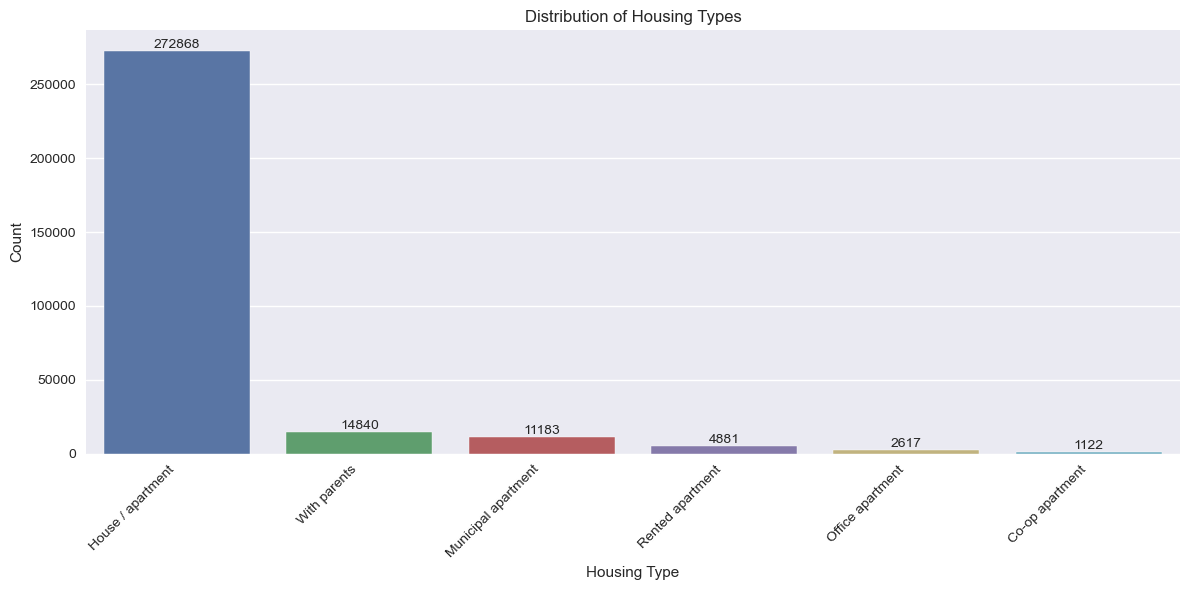

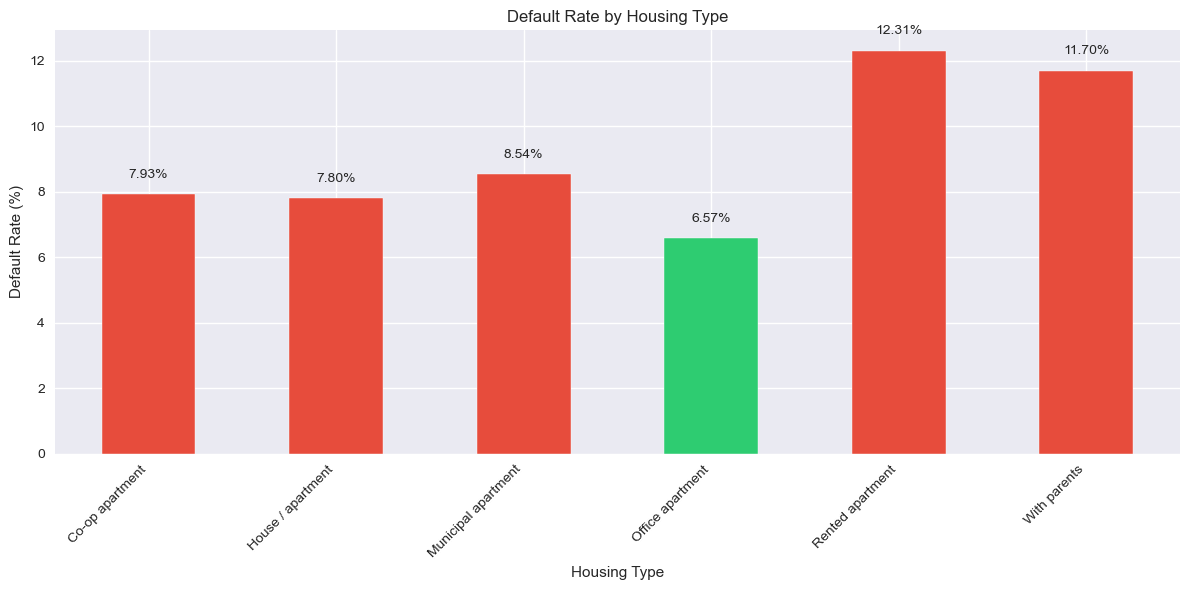

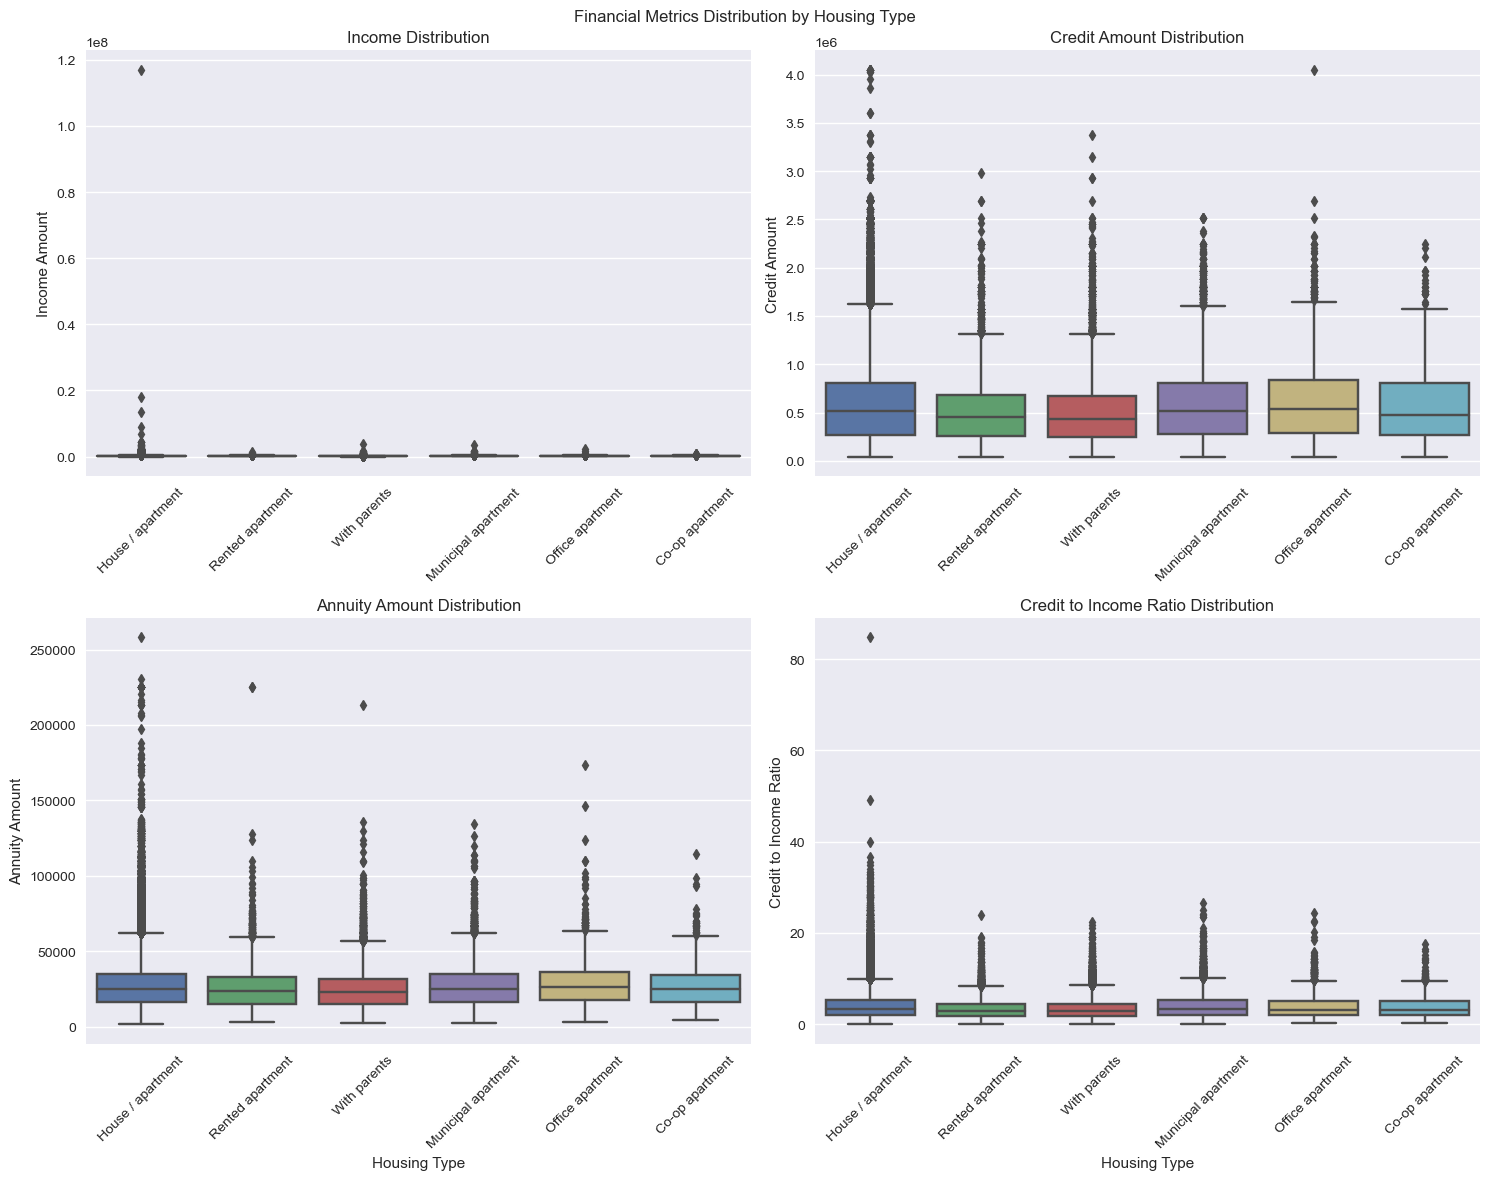


5. Additional Analysis:
------------------------------

Average age by housing type:
NAME_HOUSING_TYPE
Co-op apartment        39.0
House / apartment      44.7
Municipal apartment    45.4
Office apartment       41.6
Rented apartment       35.9
With parents           32.0
Name: DAYS_BIRTH, dtype: float64

Average years of employment by housing type:
NAME_HOUSING_TYPE
Co-op apartment        108.6
House / apartment      197.5
Municipal apartment    196.6
Office apartment       127.1
Rented apartment        46.1
With parents            18.9
Name: DAYS_EMPLOYED, dtype: float64

Income type distribution by housing type (%):
NAME_INCOME_TYPE     Businessman  Commercial associate  Maternity leave  \
NAME_HOUSING_TYPE                                                         
Co-op apartment              0.0                 26.29              0.0   
House / apartment            0.0                 22.98              0.0   
Municipal apartment          0.0                 23.99              0.0   

In [42]:
# Basic analysis of NAME_HOUSING_TYPE
print("Analysis of NAME_HOUSING_TYPE Column")
print("-" * 50)

# 1. Look at unique values and basic counts
print("\n1. Basic Distribution:")
print("-" * 30)
housing_counts = cleaned_application_data['NAME_HOUSING_TYPE'].value_counts()
housing_percentages = (housing_counts / len(cleaned_application_data) * 100).round(2)

print("Unique values:", cleaned_application_data['NAME_HOUSING_TYPE'].unique())
print("\nValue counts:")
print(housing_counts)
print("\nPercentages:")
print(housing_percentages.astype(str) + '%')

# 2. Missing values check
missing_count = cleaned_application_data['NAME_HOUSING_TYPE'].isnull().sum()
missing_percentage = (missing_count / len(cleaned_application_data) * 100).round(2)
print(f"\nMissing values: {missing_count} ({missing_percentage}%)")

# 3. Target (Default) Analysis
print("\n2. Default Analysis by Housing Type:")
print("-" * 30)

# Calculate default rates by housing type
default_by_housing = pd.crosstab(cleaned_application_data['NAME_HOUSING_TYPE'], 
                               cleaned_application_data['TARGET'],
                               normalize='index') * 100
print("\nDefault rates by housing type (%):")
print(default_by_housing.round(2))

# Chi-square test
contingency_table = pd.crosstab(cleaned_application_data['NAME_HOUSING_TYPE'], 
                               cleaned_application_data['TARGET'])
chi2, p_value = stats.chi2_contingency(contingency_table)[:2]
print(f"\nChi-square test:")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p_value:.10f}")

# 4. Financial Analysis by Housing Type
print("\n3. Financial Analysis by Housing Type:")
print("-" * 30)

financial_metrics = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']
financial_analysis = cleaned_application_data.groupby('NAME_HOUSING_TYPE')[financial_metrics].agg([
    ('mean', 'mean'),
    ('median', 'median'),
    ('std', 'std')
]).round(2)

print("\nFinancial metrics by housing type:")
print(financial_analysis)

# Calculate additional financial ratios
print("\nFinancial ratios by housing type:")
financial_ratios = cleaned_application_data.groupby('NAME_HOUSING_TYPE').agg({
    'AMT_CREDIT': lambda x: (x / cleaned_application_data.loc[x.index, 'AMT_INCOME_TOTAL']).mean(),
    'AMT_ANNUITY': lambda x: (x / cleaned_application_data.loc[x.index, 'AMT_INCOME_TOTAL']).mean()
}).round(3)
financial_ratios.columns = ['Credit-to-Income Ratio', 'Annuity-to-Income Ratio']
print(financial_ratios)

# 5. Visualizations
print("\n4. Creating Visualizations...")
print("-" * 30)

# Set up the plotting style
plt.style.use('seaborn')

# Figure 1: Housing Type Distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=housing_counts.index, y=housing_counts.values)
plt.title('Distribution of Housing Types')
plt.xlabel('Housing Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(housing_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Figure 2: Default Rates by Housing Type
plt.figure(figsize=(12, 6))
default_rates = cleaned_application_data.groupby('NAME_HOUSING_TYPE')['TARGET'].mean() * 100
colors = ['#2ecc71' if x == min(default_rates) else '#e74c3c' for x in default_rates]
ax = default_rates.plot(kind='bar', color=colors)
plt.title('Default Rate by Housing Type')
plt.xlabel('Housing Type')
plt.ylabel('Default Rate (%)')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(default_rates):
    plt.text(i, v + 0.5, f'{v:.2f}%', ha='center')
plt.tight_layout()
plt.show()

# Figure 3: Financial Metrics by Housing Type
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Financial Metrics Distribution by Housing Type')

# Income Distribution
sns.boxplot(x='NAME_HOUSING_TYPE', y='AMT_INCOME_TOTAL', data=cleaned_application_data, ax=axes[0,0])
axes[0,0].set_title('Income Distribution')
axes[0,0].set_xlabel('')
axes[0,0].set_ylabel('Income Amount')
axes[0,0].tick_params(axis='x', rotation=45)

# Credit Amount Distribution
sns.boxplot(x='NAME_HOUSING_TYPE', y='AMT_CREDIT', data=cleaned_application_data, ax=axes[0,1])
axes[0,1].set_title('Credit Amount Distribution')
axes[0,1].set_xlabel('')
axes[0,1].set_ylabel('Credit Amount')
axes[0,1].tick_params(axis='x', rotation=45)

# Annuity Amount Distribution
sns.boxplot(x='NAME_HOUSING_TYPE', y='AMT_ANNUITY', data=cleaned_application_data, ax=axes[1,0])
axes[1,0].set_title('Annuity Amount Distribution')
axes[1,0].set_xlabel('Housing Type')
axes[1,0].set_ylabel('Annuity Amount')
axes[1,0].tick_params(axis='x', rotation=45)

# Credit to Income Ratio
sns.boxplot(data=cleaned_application_data, 
            x='NAME_HOUSING_TYPE', 
            y=cleaned_application_data['AMT_CREDIT']/cleaned_application_data['AMT_INCOME_TOTAL'],
            ax=axes[1,1])
axes[1,1].set_title('Credit to Income Ratio Distribution')
axes[1,1].set_xlabel('Housing Type')
axes[1,1].set_ylabel('Credit to Income Ratio')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Additional Analysis
print("\n5. Additional Analysis:")
print("-" * 30)

# Age distribution by housing type
age_by_housing = cleaned_application_data.groupby('NAME_HOUSING_TYPE')['DAYS_BIRTH'].mean().apply(lambda x: abs(x)/365).round(1)
print("\nAverage age by housing type:")
print(age_by_housing)

# Employment analysis by housing type
employment_years = cleaned_application_data.groupby('NAME_HOUSING_TYPE')['DAYS_EMPLOYED'].apply(lambda x: abs(x.mean()/365)).round(1)
print("\nAverage years of employment by housing type:")
print(employment_years)

# Income type distribution by housing type
income_housing_cross = pd.crosstab(cleaned_application_data['NAME_HOUSING_TYPE'], 
                                 cleaned_application_data['NAME_INCOME_TYPE'], 
                                 normalize='index') * 100
print("\nIncome type distribution by housing type (%):")
print(income_housing_cross.round(2))

#### Analysis of `OCCUPATION_TYPE`

- **Objective:** Understan the distribution and impact of different occupations on loan default likelihood and financial metrics, identifying high-risk professions that may be more prone to default.

- **Approach:**
  1. **Distribution Analysis:** 
      - Count occurrences of each occupation type in the dataset, along with percentage representations.
  2. **Missing Values Check:** Assess the proportion of missing values in the `OCCUPATION_TYPE` column.
  3. **Default Rate Analysis:** 
      - Calculate default rates for each occupation type and conduct a chi-square test to determine the significance of the relationship between occupation and loan default.
  4. **Financial Analysis by Occupation:**
      - Examine average income, credit amount, and annuity values across occupations, calculating additional metrics like credit-to-income and annuity-to-income ratios.
  5. **Additional Analysis:**
      - Investigate average age and employment tenure for each occupation type.
      - Analyze income type distributions by occupation, uncovering potential links between job types and financial stability.

- **Insights Derived:**
  - **Default Trends:** Certain occupations, such as those with inconsistent or low-income streams, exhibited higher default rates, suggesting a correlation between job type and loan reliability.
  - **Financial Variability:** Identify distinct differences in financial metrics like credit and annuity across occupations, which may inform tailored lending policies based on occupation.
  - **Age and Employment Insights:** Differences in average age and employment tenure across occupations provided context for default risk, with younger or less experienced employees showing higher risk in some categories.

- **Outcome:** This occupation-focused analysis reveals key occupational risk factors for loan defaults, helping refine predictive models and lending strategies based on job-related financial behavior.

Analysis of OCCUPATION_TYPE Column
--------------------------------------------------

1. Basic Distribution:
------------------------------
Unique values: ['Laborers' 'Core staff' 'Accountants' 'Managers' 'Drivers' 'Sales staff'
 'Cleaning staff' 'Cooking staff' 'Private service staff' 'Medicine staff'
 'Security staff' 'High skill tech staff' 'Waiters/barmen staff'
 'Low-skill Laborers' 'Realty agents' 'Secretaries' 'IT staff' 'HR staff']

Value counts:
Laborers                 151577
Sales staff               32102
Core staff                27570
Managers                  21371
Drivers                   18603
High skill tech staff     11380
Accountants                9813
Medicine staff             8537
Security staff             6721
Cooking staff              5946
Cleaning staff             4653
Private service staff      2652
Low-skill Laborers         2093
Waiters/barmen staff       1348
Secretaries                1305
Realty agents               751
HR staff                    

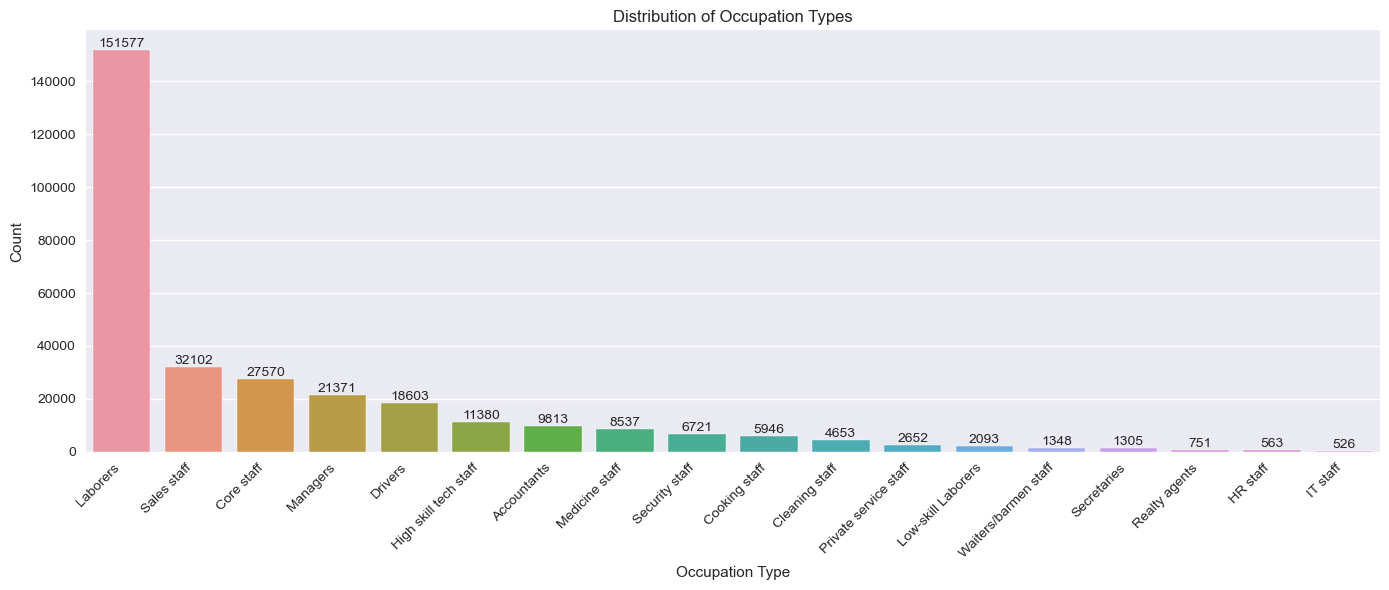

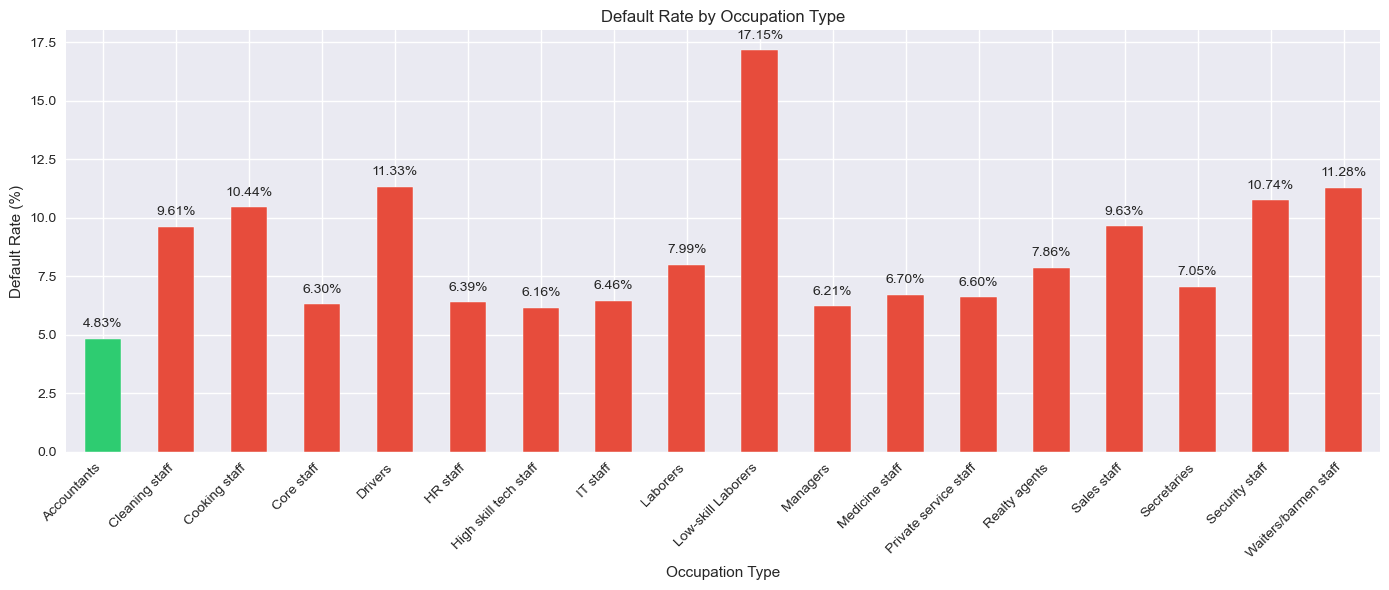

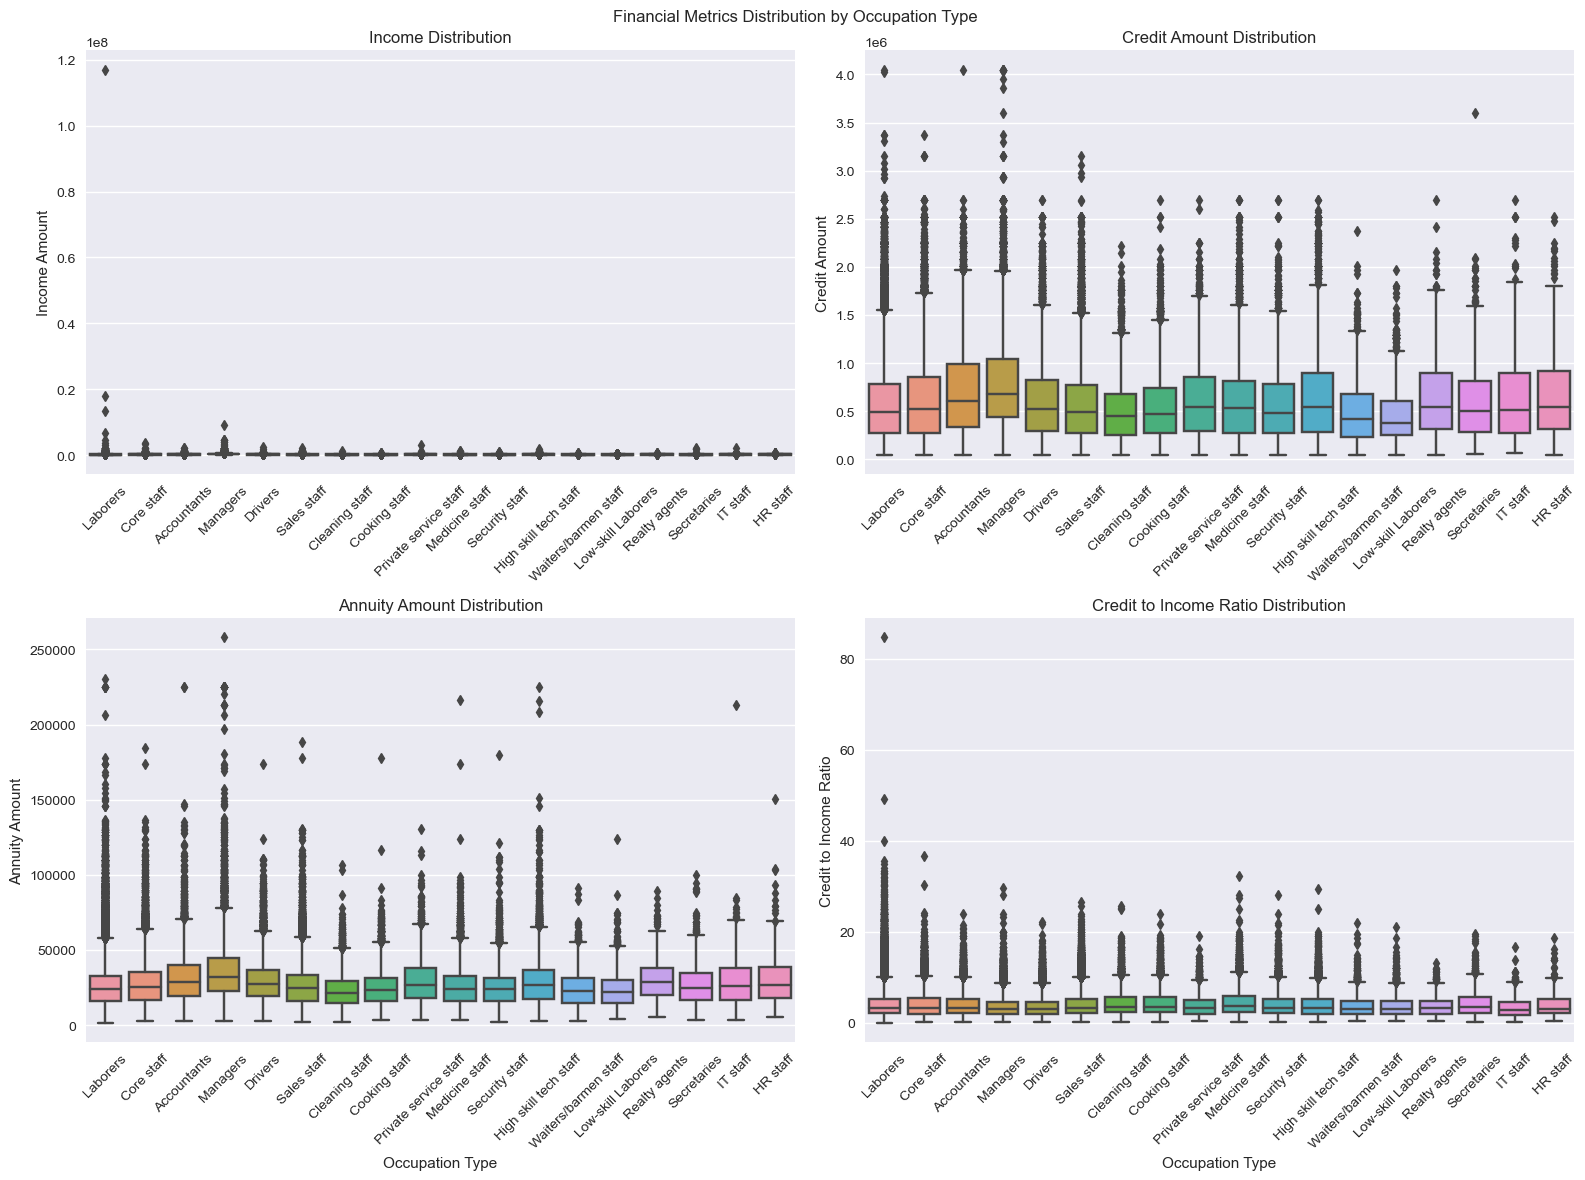


5. Additional Analysis:
------------------------------

Average age by occupation:
OCCUPATION_TYPE
Accountants              40.5
Cleaning staff           47.3
Cooking staff            41.5
Core staff               38.7
Drivers                  41.4
HR staff                 39.3
High skill tech staff    40.4
IT staff                 35.3
Laborers                 47.5
Low-skill Laborers       39.0
Managers                 42.1
Medicine staff           42.6
Private service staff    39.0
Realty agents            38.3
Sales staff              38.4
Secretaries              38.3
Security staff           45.3
Waiters/barmen staff     35.8
Name: DAYS_BIRTH, dtype: float64

Average years of employment by occupation:
OCCUPATION_TYPE
Accountants                6.6
Cleaning staff             6.3
Cooking staff              5.9
Core staff                 7.7
Drivers                    5.3
HR staff                   6.2
High skill tech staff      7.5
IT staff                   5.7
Laborers           

In [43]:
# Basic analysis of OCCUPATION_TYPE
print("Analysis of OCCUPATION_TYPE Column")
print("-" * 50)

# 1. Look at unique values and basic counts
print("\n1. Basic Distribution:")
print("-" * 30)
occupation_counts = cleaned_application_data['OCCUPATION_TYPE'].value_counts()
occupation_percentages = (occupation_counts / len(cleaned_application_data) * 100).round(2)

print("Unique values:", cleaned_application_data['OCCUPATION_TYPE'].unique())
print("\nValue counts:")
print(occupation_counts)
print("\nPercentages:")
print(occupation_percentages.astype(str) + '%')

# 2. Missing values check
missing_count = cleaned_application_data['OCCUPATION_TYPE'].isnull().sum()
missing_percentage = (missing_count / len(cleaned_application_data) * 100).round(2)
print(f"\nMissing values: {missing_count} ({missing_percentage}%)")

# 3. Target (Default) Analysis
print("\n2. Default Analysis by Occupation:")
print("-" * 30)

# Calculate default rates by occupation type
default_by_occupation = pd.crosstab(cleaned_application_data['OCCUPATION_TYPE'], 
                                  cleaned_application_data['TARGET'],
                                  normalize='index') * 100
print("\nDefault rates by occupation (%):")
print(default_by_occupation.round(2))

# Chi-square test
contingency_table = pd.crosstab(cleaned_application_data['OCCUPATION_TYPE'], 
                               cleaned_application_data['TARGET'])
chi2, p_value = stats.chi2_contingency(contingency_table)[:2]
print(f"\nChi-square test:")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p_value:.10f}")

# 4. Financial Analysis by Occupation
print("\n3. Financial Analysis by Occupation:")
print("-" * 30)

financial_metrics = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']
financial_analysis = cleaned_application_data.groupby('OCCUPATION_TYPE')[financial_metrics].agg([
    ('mean', 'mean'),
    ('median', 'median'),
    ('std', 'std')
]).round(2)

print("\nFinancial metrics by occupation:")
print(financial_analysis)

# Calculate additional financial ratios
print("\nFinancial ratios by occupation:")
financial_ratios = cleaned_application_data.groupby('OCCUPATION_TYPE').agg({
    'AMT_CREDIT': lambda x: (x / cleaned_application_data.loc[x.index, 'AMT_INCOME_TOTAL']).mean(),
    'AMT_ANNUITY': lambda x: (x / cleaned_application_data.loc[x.index, 'AMT_INCOME_TOTAL']).mean()
}).round(3)
financial_ratios.columns = ['Credit-to-Income Ratio', 'Annuity-to-Income Ratio']
print(financial_ratios)

# 5. Visualizations
print("\n4. Creating Visualizations...")
print("-" * 30)

# Set up the plotting style
plt.style.use('seaborn')

# Figure 1: Occupation Type Distribution
plt.figure(figsize=(14, 6))
sns.barplot(x=occupation_counts.index, y=occupation_counts.values)
plt.title('Distribution of Occupation Types')
plt.xlabel('Occupation Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(occupation_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Figure 2: Default Rates by Occupation
plt.figure(figsize=(14, 6))
default_rates = cleaned_application_data.groupby('OCCUPATION_TYPE')['TARGET'].mean() * 100
colors = ['#2ecc71' if x == min(default_rates) else '#e74c3c' for x in default_rates]
ax = default_rates.plot(kind='bar', color=colors)
plt.title('Default Rate by Occupation Type')
plt.xlabel('Occupation Type')
plt.ylabel('Default Rate (%)')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(default_rates):
    plt.text(i, v + 0.5, f'{v:.2f}%', ha='center')
plt.tight_layout()
plt.show()

# Figure 3: Financial Metrics by Occupation
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Financial Metrics Distribution by Occupation Type')

# Income Distribution
sns.boxplot(x='OCCUPATION_TYPE', y='AMT_INCOME_TOTAL', data=cleaned_application_data, ax=axes[0,0])
axes[0,0].set_title('Income Distribution')
axes[0,0].set_xlabel('')
axes[0,0].set_ylabel('Income Amount')
axes[0,0].tick_params(axis='x', rotation=45)

# Credit Amount Distribution
sns.boxplot(x='OCCUPATION_TYPE', y='AMT_CREDIT', data=cleaned_application_data, ax=axes[0,1])
axes[0,1].set_title('Credit Amount Distribution')
axes[0,1].set_xlabel('')
axes[0,1].set_ylabel('Credit Amount')
axes[0,1].tick_params(axis='x', rotation=45)

# Annuity Amount Distribution
sns.boxplot(x='OCCUPATION_TYPE', y='AMT_ANNUITY', data=cleaned_application_data, ax=axes[1,0])
axes[1,0].set_title('Annuity Amount Distribution')
axes[1,0].set_xlabel('Occupation Type')
axes[1,0].set_ylabel('Annuity Amount')
axes[1,0].tick_params(axis='x', rotation=45)

# Credit to Income Ratio
sns.boxplot(data=cleaned_application_data, 
            x='OCCUPATION_TYPE', 
            y=cleaned_application_data['AMT_CREDIT']/cleaned_application_data['AMT_INCOME_TOTAL'],
            ax=axes[1,1])
axes[1,1].set_title('Credit to Income Ratio Distribution')
axes[1,1].set_xlabel('Occupation Type')
axes[1,1].set_ylabel('Credit to Income Ratio')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Additional Analysis
print("\n5. Additional Analysis:")
print("-" * 30)

# Age distribution by occupation
age_by_occupation = cleaned_application_data.groupby('OCCUPATION_TYPE')['DAYS_BIRTH'].mean().apply(lambda x: abs(x)/365).round(1)
print("\nAverage age by occupation:")
print(age_by_occupation)

# Employment analysis by occupation
employment_years = cleaned_application_data.groupby('OCCUPATION_TYPE')['DAYS_EMPLOYED'].mean().apply(lambda x: abs(x)/365).round(1)
print("\nAverage years of employment by occupation:")
print(employment_years)

# Income type distribution by occupation
income_occupation_cross = pd.crosstab(cleaned_application_data['OCCUPATION_TYPE'], 
                                    cleaned_application_data['NAME_INCOME_TYPE'], 
                                    normalize='index') * 100
print("\nIncome type distribution by occupation (%):")
print(income_occupation_cross.round(2))

#### Analysis of `ORGANIZATION_TYPE` Feature

- **Objective:** Examine the distribution and implications of `ORGANIZATION_TYPE`, which records the applicant’s employment organization category, to assess its potential influence on loan default risk.
- **Steps Involved:**
  - **Distribution Overview:** Display the unique values and their proportions, identifying how frequently each organization type appears in the data.
  - **Default Rate by Organization Type:** Calculate and visualize the loan default rate across different organization types to see if any categories are more associated with default risks.
  - **Financial Metrics Analysis:** Compute and display key financial indicators (Income, Credit Amount, Annuity, and Credit-to-Income Ratio) across organization types, focusing on the top 20 most common types for clearer insights.
  - **Statistical Test (Chi-Square):** Perform a chi-square test to assess the independence of organization type and default status, which informs if specific organization types are statistically linked to defaults.

- **Key Visualizations:**
  - **Top 20 Organization Types Distribution:** A bar chart for the top 20 most common organization types.
  - **Default Rate by Organization Type:** A bar plot showing the default rate for the top 20 organizations, highlighting any categories with higher or lower risk.
  - **Financial Distributions:** Box plots illustrating income, credit amount, annuity, and credit-to-income ratio across the top organization types for in-depth financial comparison.

- **Insights Expected:**
  - **Default Rate Patterns:** Detect organization types with heightened default risk, offering insights for targeted risk mitigation strategies.
  - **Financial Characteristics:** Understanding income and credit behavior across organization types aids in creating tailored loan offers for low-risk categories.

- **Outcome:** This analysis offers actionable insights on the relationship between `ORGANIZATION_TYPE` and loan default, as well as the financial health of applicants based on their organization type, potentially guiding bank policy and loan strategies.


Analysis of ORGANIZATION_TYPE Column
--------------------------------------------------

1. Basic Distribution:
------------------------------
Unique values: ['Business Entity Type 3' 'School' 'Government' 'Religion' 'Other' 'XNA'
 'Electricity' 'Medicine' 'Business Entity Type 2' 'Self-employed'
 'Transport: type 2' 'Construction' 'Housing' 'Kindergarten'
 'Trade: type 7' 'Industry: type 11' 'Military' 'Services'
 'Security Ministries' 'Transport: type 4' 'Industry: type 1' 'Emergency'
 'Security' 'Trade: type 2' 'University' 'Transport: type 3' 'Police'
 'Business Entity Type 1' 'Postal' 'Industry: type 4' 'Agriculture'
 'Restaurant' 'Culture' 'Hotel' 'Industry: type 7' 'Trade: type 3'
 'Industry: type 3' 'Bank' 'Industry: type 9' 'Insurance' 'Trade: type 6'
 'Industry: type 2' 'Transport: type 1' 'Industry: type 12' 'Mobile'
 'Trade: type 1' 'Industry: type 5' 'Industry: type 10' 'Legal Services'
 'Advertising' 'Trade: type 5' 'Cleaning' 'Industry: type 13'
 'Trade: type 4' 'Telecom

                        Credit-to-Income Ratio  Annuity-to-Income Ratio
ORGANIZATION_TYPE                                                      
Advertising                              3.447                    0.164
Agriculture                              4.301                    0.196
Bank                                     3.434                    0.154
Business Entity Type 1                   3.721                    0.169
Business Entity Type 2                   3.804                    0.173
Business Entity Type 3                   3.675                    0.172
Cleaning                                 3.751                    0.179
Construction                             3.486                    0.165
Culture                                  4.135                    0.183
Electricity                              3.990                    0.173
Emergency                                3.483                    0.156
Government                               4.215                  

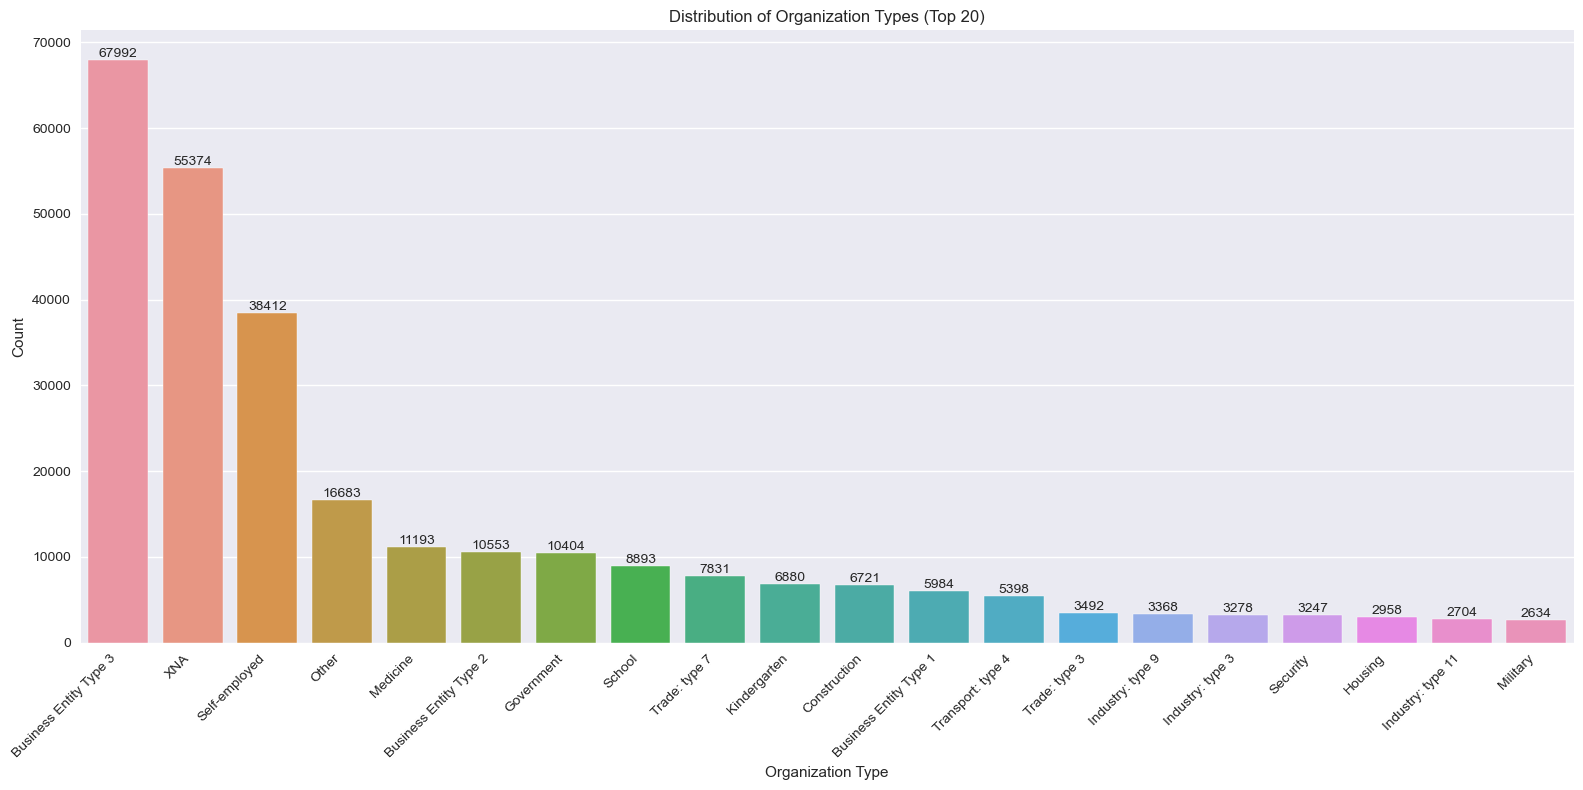

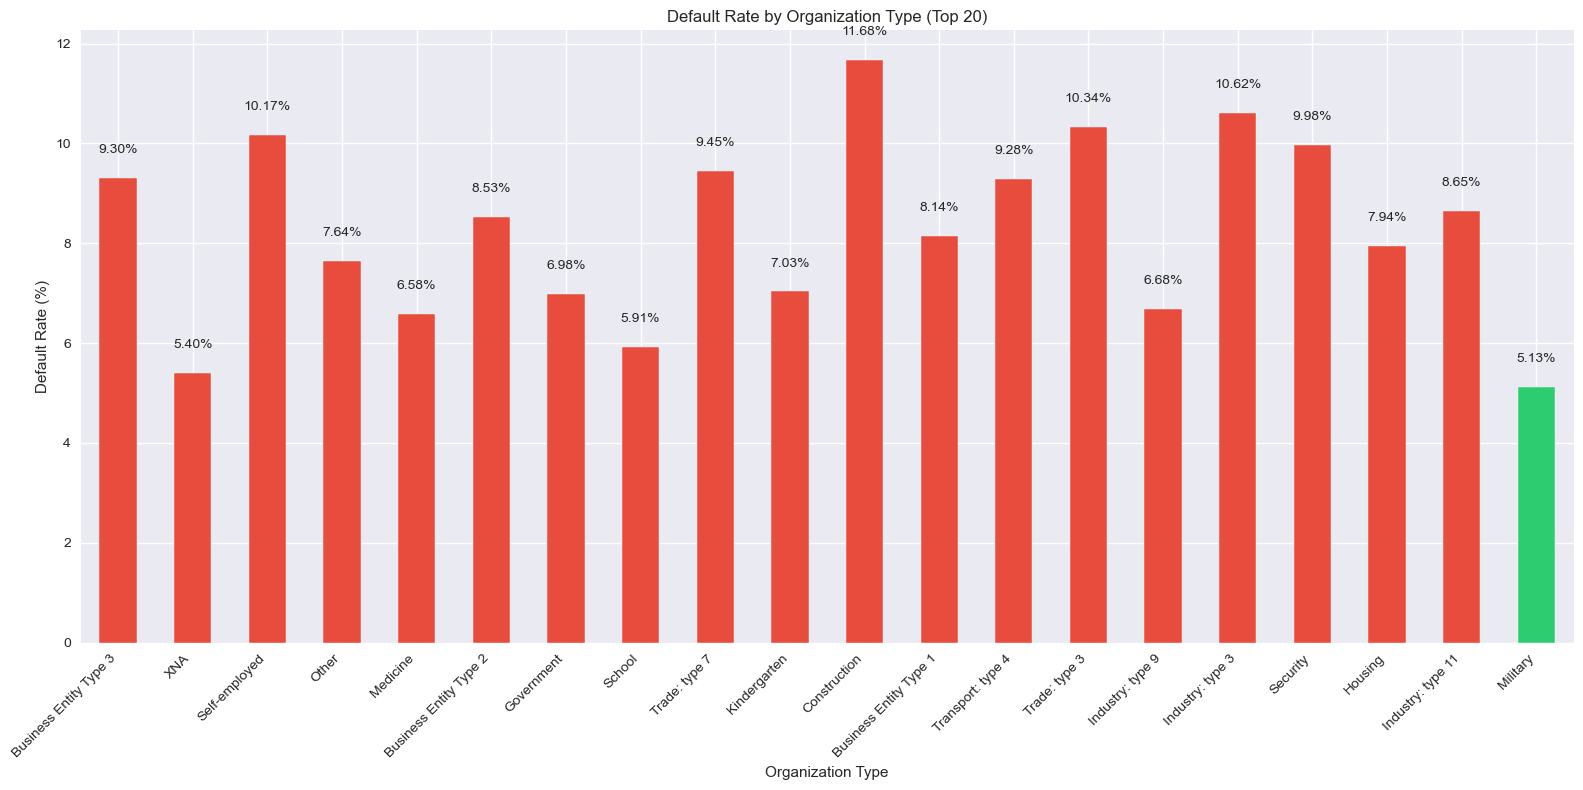

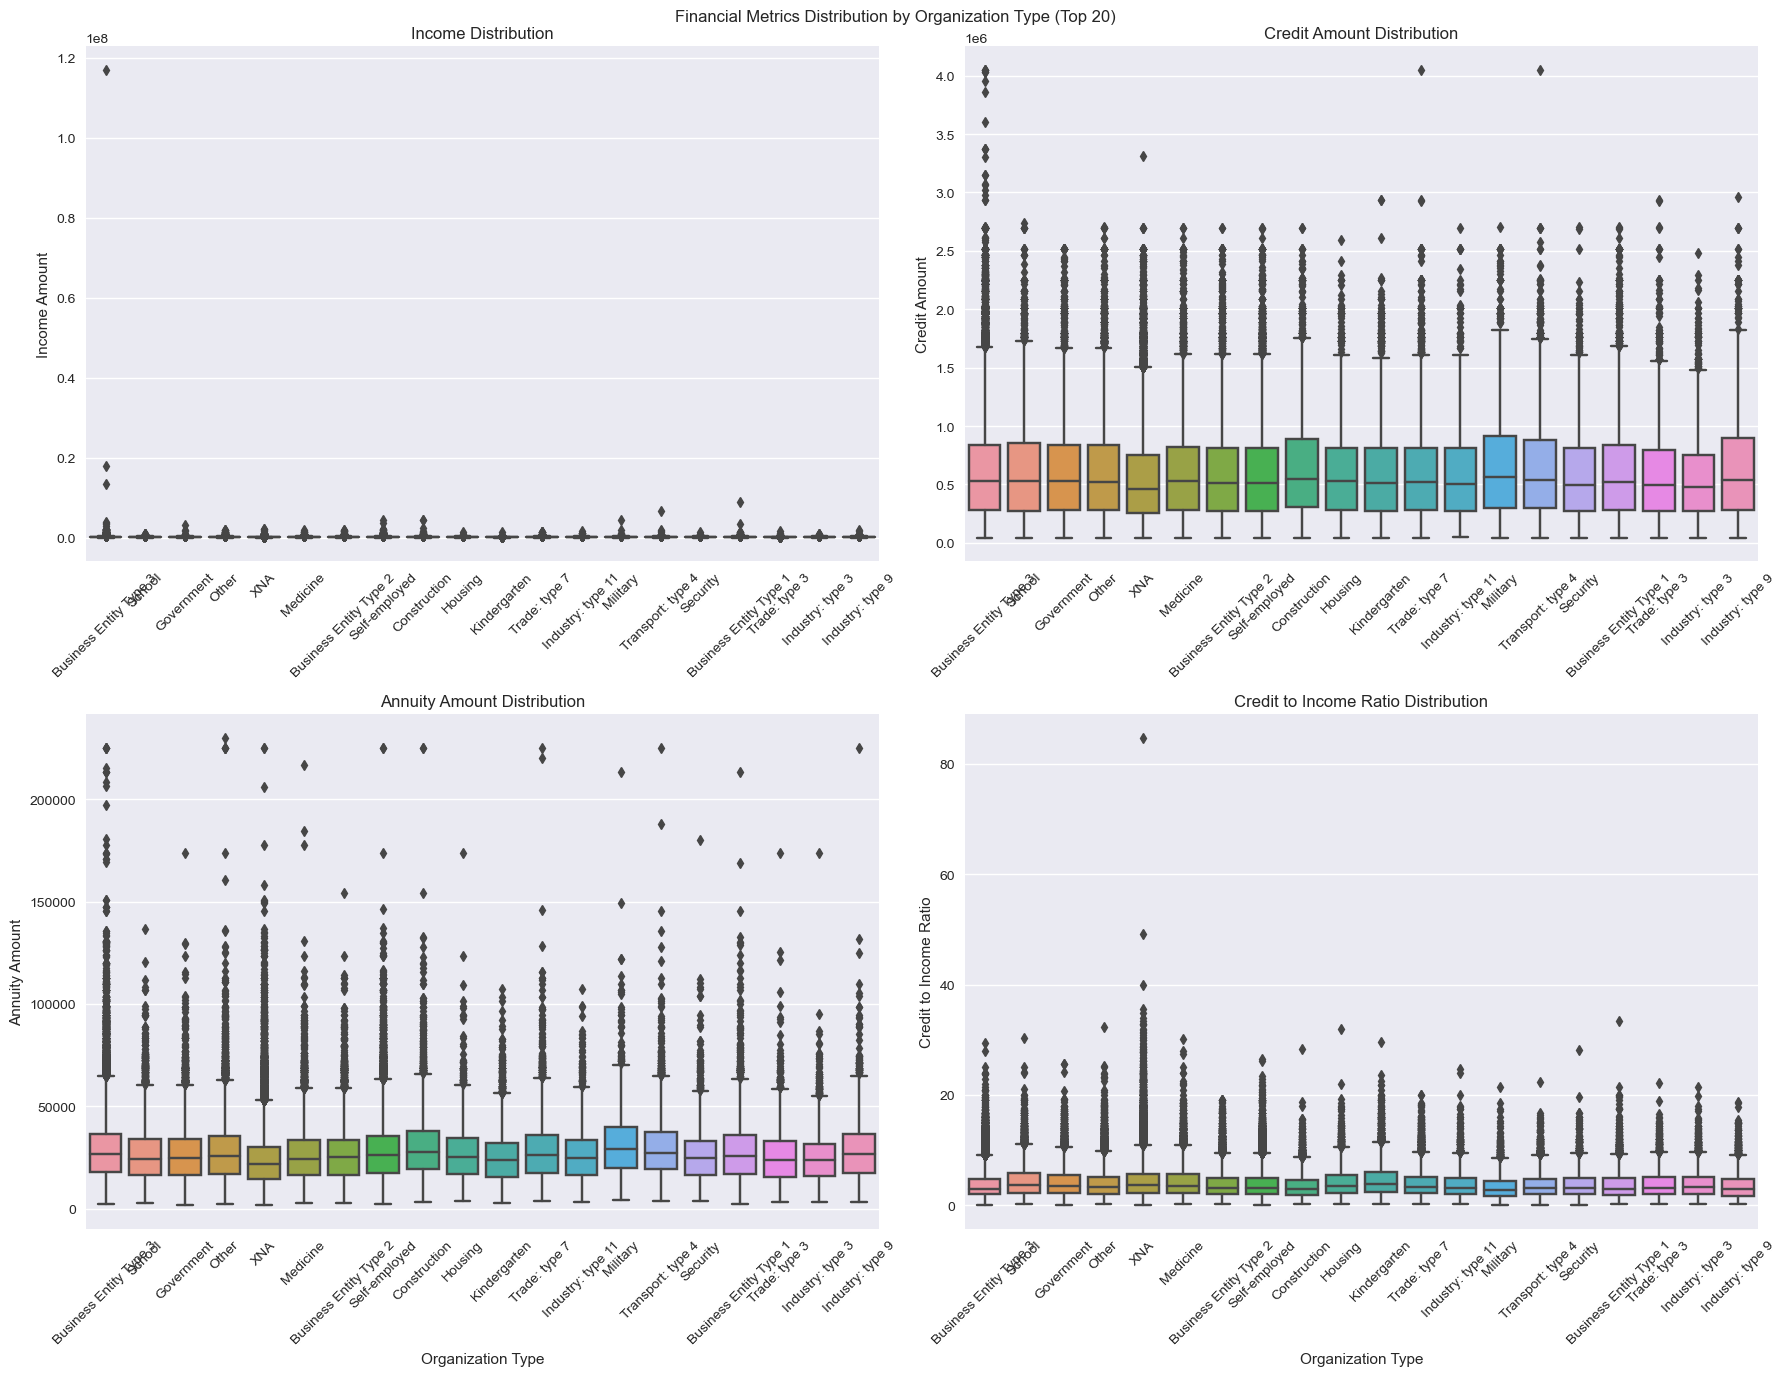


5. Additional Analysis:
------------------------------

Average age by organization type:
ORGANIZATION_TYPE
Advertising               39.6
Agriculture               42.5
Bank                      34.3
Business Entity Type 1    40.0
Business Entity Type 2    40.8
Business Entity Type 3    39.7
Cleaning                  44.0
Construction              40.8
Culture                   43.2
Electricity               42.6
Emergency                 39.0
Government                42.4
Hotel                     43.8
Housing                   44.7
Industry: type 1          40.4
Industry: type 10         39.2
Industry: type 11         41.2
Industry: type 12         40.9
Industry: type 13         40.1
Industry: type 2          40.7
Industry: type 3          41.1
Industry: type 4          38.3
Industry: type 5          40.2
Industry: type 6          39.8
Industry: type 7          41.4
Industry: type 8          36.9
Industry: type 9          40.0
Insurance                 41.0
Kindergarten           

In [44]:
# Basic analysis of ORGANIZATION_TYPE
print("Analysis of ORGANIZATION_TYPE Column")
print("-" * 50)

# 1. Look at unique values and basic counts
print("\n1. Basic Distribution:")
print("-" * 30)
organization_counts = cleaned_application_data['ORGANIZATION_TYPE'].value_counts()
organization_percentages = (organization_counts / len(cleaned_application_data) * 100).round(2)

print("Unique values:", cleaned_application_data['ORGANIZATION_TYPE'].unique())
print("\nValue counts:")
print(organization_counts)
print("\nPercentages:")
print(organization_percentages.astype(str) + '%')

# 2. Missing values check
missing_count = cleaned_application_data['ORGANIZATION_TYPE'].isnull().sum()
missing_percentage = (missing_count / len(cleaned_application_data) * 100).round(2)
print(f"\nMissing values: {missing_count} ({missing_percentage}%)")

# 3. Target (Default) Analysis
print("\n2. Default Analysis by Organization Type:")
print("-" * 30)

# Calculate default rates by organization type
default_by_organization = pd.crosstab(cleaned_application_data['ORGANIZATION_TYPE'], 
                                    cleaned_application_data['TARGET'],
                                    normalize='index') * 100
print("\nDefault rates by organization type (%):")
print(default_by_organization.round(2))

# Chi-square test
contingency_table = pd.crosstab(cleaned_application_data['ORGANIZATION_TYPE'], 
                               cleaned_application_data['TARGET'])
chi2, p_value = stats.chi2_contingency(contingency_table)[:2]
print(f"\nChi-square test:")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p_value:.10f}")

# 4. Financial Analysis by Organization Type
print("\n3. Financial Analysis by Organization Type:")
print("-" * 30)

financial_metrics = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']
financial_analysis = cleaned_application_data.groupby('ORGANIZATION_TYPE')[financial_metrics].agg([
    ('mean', 'mean'),
    ('median', 'median'),
    ('std', 'std')
]).round(2)

print("\nFinancial metrics by organization type:")
print(financial_analysis)

# Calculate additional financial ratios
print("\nFinancial ratios by organization type:")
financial_ratios = cleaned_application_data.groupby('ORGANIZATION_TYPE').agg({
    'AMT_CREDIT': lambda x: (x / cleaned_application_data.loc[x.index, 'AMT_INCOME_TOTAL']).mean(),
    'AMT_ANNUITY': lambda x: (x / cleaned_application_data.loc[x.index, 'AMT_INCOME_TOTAL']).mean()
}).round(3)
financial_ratios.columns = ['Credit-to-Income Ratio', 'Annuity-to-Income Ratio']
print(financial_ratios)

# 5. Visualizations
print("\n4. Creating Visualizations...")
print("-" * 30)

# Set up the plotting style
plt.style.use('seaborn')

# Figure 1: Organization Type Distribution
plt.figure(figsize=(16, 8))
# Plot top 20 organizations by frequency
top_20_orgs = organization_counts.head(20)
sns.barplot(x=top_20_orgs.index, y=top_20_orgs.values)
plt.title('Distribution of Organization Types (Top 20)')
plt.xlabel('Organization Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(top_20_orgs.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Figure 2: Default Rates by Organization Type
plt.figure(figsize=(16, 8))
# Plot default rates for top 20 organizations by frequency
default_rates = cleaned_application_data.groupby('ORGANIZATION_TYPE')['TARGET'].mean() * 100
top_20_default_rates = default_rates[organization_counts.head(20).index]
colors = ['#2ecc71' if x == min(top_20_default_rates) else '#e74c3c' for x in top_20_default_rates]
ax = top_20_default_rates.plot(kind='bar', color=colors)
plt.title('Default Rate by Organization Type (Top 20)')
plt.xlabel('Organization Type')
plt.ylabel('Default Rate (%)')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(top_20_default_rates):
    plt.text(i, v + 0.5, f'{v:.2f}%', ha='center')
plt.tight_layout()
plt.show()

# Figure 3: Financial Metrics by Organization Type
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Financial Metrics Distribution by Organization Type (Top 20)')

# Get top 20 organizations by count for consistent plotting
top_20_orgs_list = organization_counts.head(20).index
plot_data = cleaned_application_data[cleaned_application_data['ORGANIZATION_TYPE'].isin(top_20_orgs_list)]

# Income Distribution
sns.boxplot(x='ORGANIZATION_TYPE', y='AMT_INCOME_TOTAL', data=plot_data, ax=axes[0,0])
axes[0,0].set_title('Income Distribution')
axes[0,0].set_xlabel('')
axes[0,0].set_ylabel('Income Amount')
axes[0,0].tick_params(axis='x', rotation=45)

# Credit Amount Distribution
sns.boxplot(x='ORGANIZATION_TYPE', y='AMT_CREDIT', data=plot_data, ax=axes[0,1])
axes[0,1].set_title('Credit Amount Distribution')
axes[0,1].set_xlabel('')
axes[0,1].set_ylabel('Credit Amount')
axes[0,1].tick_params(axis='x', rotation=45)

# Annuity Amount Distribution
sns.boxplot(x='ORGANIZATION_TYPE', y='AMT_ANNUITY', data=plot_data, ax=axes[1,0])
axes[1,0].set_title('Annuity Amount Distribution')
axes[1,0].set_xlabel('Organization Type')
axes[1,0].set_ylabel('Annuity Amount')
axes[1,0].tick_params(axis='x', rotation=45)

# Credit to Income Ratio
sns.boxplot(data=plot_data, 
            x='ORGANIZATION_TYPE', 
            y=plot_data['AMT_CREDIT']/plot_data['AMT_INCOME_TOTAL'],
            ax=axes[1,1])
axes[1,1].set_title('Credit to Income Ratio Distribution')
axes[1,1].set_xlabel('Organization Type')
axes[1,1].set_ylabel('Credit to Income Ratio')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Additional Analysis
print("\n5. Additional Analysis:")
print("-" * 30)

# Age distribution by organization type
age_by_organization = cleaned_application_data.groupby('ORGANIZATION_TYPE')['DAYS_BIRTH'].mean().apply(lambda x: abs(x)/365).round(1)
print("\nAverage age by organization type:")
print(age_by_organization)

# Employment analysis by organization type
employment_years = cleaned_application_data.groupby('ORGANIZATION_TYPE')['DAYS_EMPLOYED'].mean().apply(lambda x: abs(x)/365).round(1)
print("\nAverage years of employment by organization type:")
print(employment_years)

# Top 10 organizations by income
print("\nTop 10 organizations by average income:")
top_10_income = cleaned_application_data.groupby('ORGANIZATION_TYPE')['AMT_INCOME_TOTAL'].mean().sort_values(ascending=False).head(10)
print(top_10_income)

# Income type distribution by organization type
income_organization_cross = pd.crosstab(cleaned_application_data['ORGANIZATION_TYPE'], 
                                      cleaned_application_data['NAME_INCOME_TYPE'], 
                                      normalize='index') * 100
print("\nIncome type distribution by organization type (%):")
print(income_organization_cross.round(2))

# Organization size analysis (optional, if available in the dataset)
if 'ORGANIZATION_SIZE' in cleaned_application_data.columns:
    org_size_analysis = pd.crosstab(cleaned_application_data['ORGANIZATION_TYPE'], 
                                   cleaned_application_data['ORGANIZATION_SIZE'])
    print("\nOrganization size distribution:")
    print(org_size_analysis)

#### Displaying Numeric Columns for Analysis

- **Objective:** Identify and list all numeric columns to facilitate further analysis of relationships between these features and the target variable, `TARGET`.
- **Actions Taken:**
  - **Numeric Columns Identification:** Select columns with integer and float data types as `numeric_variables` for in-depth statistical analysis.
  - **Extended Numeric and Category Columns List:** Include both numeric and categorical data types in `numeric_category_variables` to capture all relevant columns for comprehensive analysis.

- **Outcome:** This process provides a complete list of numeric columns, allowing for streamlined bivariate analysis to assess relationships between continuous features and loan default status.

In [45]:
# Display the numeric columns
print("\nList of numeric columns:")
print("-" * 70)
numeric_variables = cleaned_application_data.select_dtypes(include=['int', 'float']).columns
numeric_category_variables = cleaned_application_data.select_dtypes(include=['int', 'float', 'category']).columns
numeric_variables


List of numeric columns:
----------------------------------------------------------------------


Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [46]:
cleaned_application_data[numeric_variables].head()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      100002       1             0          202500.0    406597.5   
1      100003       0             0          270000.0   1293502.5   
2      100004       0             0           67500.0    135000.0   
3      100006       0             0          135000.0    312682.5   
4      100007       0             0          121500.0    513000.0   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0      24700.5         351000.0                    0.018801        9461   
1      35698.5        1129500.0                    0.003541       16765   
2       6750.0         135000.0                    0.010032       19046   
3      29686.5         297000.0                    0.008019       19005   
4      21865.5         513000.0                    0.028663       19932   

   DAYS_EMPLOYED  ...  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
0            637  ...                       0                       0   
1           1188  ...                       0                       0   
2            225  ...                       0                       0   
3           3039  ...                       0                       0   
4           3038  ...                       0                       1   

   LIVE_CITY_NOT_WORK_CITY  DAYS_LAST_PHONE_CHANGE  \
0                        0                  1134.0   
1                        0                   828.0   
2                        0                   815.0   
3                        0                   617.0   
4                        1                  1106.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                           0                          0   
1                           0                          0   
2                           0                          0   
3                           0                          0   
4                           0                          0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                           0                          0   
1                           0                          0   
2                           0                          0   
3                           0                          0   
4                           0                          0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                          0                           1  
1                          0                           0  
2                          0                           0  
3                          0                           1  
4                          0                           0  

[5 rows x 29 columns]

#### Defining DataFrames for Defaulters and Non-Defaulters

- **Objective:** Segregate the data into two groups—defaulters and non-defaulters—to allow comparison of numeric features across both groups, focusing on understanding the characteristics that may contribute to default risk.
- **Approach:**
  - **Defaulters DataFrame:** Filter rows where `TARGET` is 1 (indicating a loan default) and select only numeric columns for further statistical analysis.
  - **Non-Defaulters DataFrame:** Similarly, filter rows where `TARGET` is 0 and exclude the `TARGET` column to maintain a purely numeric dataset.

- **Outcome:** Two separate DataFrames—`defaulters` and `non-defaulters`—are now available for analysis, setting the stage to compare feature distributions and averages across the two groups.

In [47]:
# Defaulters Dataframe
numeric_data = cleaned_application_data[numeric_variables]
defaulters = numeric_data[numeric_data['TARGET']==1].drop(['TARGET'],axis=1)
non_defaulters = numeric_data[numeric_data['TARGET']==0].drop(['TARGET'],axis=1)
non_defaulters.head()

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1      100003             0          270000.0   1293502.5      35698.5   
2      100004             0           67500.0    135000.0       6750.0   
3      100006             0          135000.0    312682.5      29686.5   
4      100007             0          121500.0    513000.0      21865.5   
5      100008             0           99000.0    490495.5      27517.5   

   AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
1        1129500.0                    0.003541       16765           1188   
2         135000.0                    0.010032       19046            225   
3         297000.0                    0.008019       19005           3039   
4         513000.0                    0.028663       19932           3038   
5         454500.0                    0.035792       16941           1588   

   DAYS_REGISTRATION  ...  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
1             1186.0  ...                       0                       0   
2             4260.0  ...                       0                       0   
3             9833.0  ...                       0                       0   
4             4311.0  ...                       0                       1   
5             4970.0  ...                       0                       0   

   LIVE_CITY_NOT_WORK_CITY  DAYS_LAST_PHONE_CHANGE  \
1                        0                   828.0   
2                        0                   815.0   
3                        0                   617.0   
4                        1                  1106.0   
5                        0                  2536.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
1                           0                          0   
2                           0                          0   
3                           0                          0   
4                           0                          0   
5                           0                          0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
1                           0                          0   
2                           0                          0   
3                           0                          0   
4                           0                          0   
5                           0                          0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
1                          0                           0  
2                          0                           0  
3                          0                           1  
4                          0                           0  
5                          1                           1  

[5 rows x 28 columns]

In [48]:
defaulters.head()

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0       100002             0          202500.0    406597.5      24700.5   
26      100031             0          112500.0    979992.0      27076.5   
40      100047             0          202500.0   1193580.0      35028.0   
42      100049             0          135000.0    288873.0      16258.5   
81      100096             0           81000.0    252000.0      14593.5   

    AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0          351000.0                    0.018801        9461            637   
26         702000.0                    0.018029       18724           2628   
40         855000.0                    0.025164       17482           1262   
42         238500.0                    0.007305       13384           3597   
81         252000.0                    0.028663       24794         365243   

    DAYS_REGISTRATION  ...  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
0              3648.0  ...                       0                       0   
26             6573.0  ...                       0                       0   
40             1182.0  ...                       0                       0   
42               45.0  ...                       0                       0   
81             5391.0  ...                       0                       0   

    LIVE_CITY_NOT_WORK_CITY  DAYS_LAST_PHONE_CHANGE  \
0                         0                  1134.0   
26                        0                   161.0   
40                        0                  1075.0   
42                        0                  1480.0   
81                        0                     0.0   

    AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                            0                          0   
26                           0                          0   
40                           0                          0   
42                           0                          0   
81                           0                          0   

    AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                            0                          0   
26                           0                          0   
40                           0                          2   
42                           0                          0   
81                           0                          0   

    AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                           0                           1  
26                          2                           2  
40                          0                           4  
42                          0                           2  
81                          0                           0  

[5 rows x 28 columns]

#### Correlation Analysis for Defaulters

- **Objective:** Identify the strongest correlations among features within the subset of defaulters, to better understand the relationships between key variables for clients who have defaulted.
- **Methodology:**
  - Compute the correlation matrix specifically for defaulters, focusing only on numerical features.
  - Transform the correlation matrix to a stacked format, isolating unique pairwise correlations by using only the upper triangle.
  - Convert correlation values to absolute values for a clear ranking, highlighting the top 10 strongest correlations.

- **Insights Gained:**
  - This correlation analysis reveals which variables are most interrelated within the defaulter group, offering insights into potential combined factors that may increase default risk.
- **Outcome:** The top 10 correlated variable pairs for defaulters are displayed, providing targeted features for further analysis.

In [49]:
defaulters_corr = defaulters.corr()
defaulters_corr_unstack = defaulters_corr.where(np.triu(np.ones(defaulters_corr.shape),k=1).astype(bool)).unstack().reset_index().rename(columns={'level_0':'var1'
                                                                                                                                                    ,'level_1':'var2'
                                                                                                                                                    ,0:'corr'})
defaulters_corr_unstack['corr'] = abs(defaulters_corr_unstack['corr'])
defaulters_corr_unstack.dropna(subset=['corr']).sort_values(by=['corr'], ascending=False).head(10)

var1                        var2      corr
143              AMT_GOODS_PRICE                  AMT_CREDIT  0.982783
376  REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT  0.956637
309              CNT_FAM_MEMBERS                CNT_CHILDREN  0.885484
492  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION  0.847885
579      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY  0.778540
144              AMT_GOODS_PRICE                 AMT_ANNUITY  0.752295
115                  AMT_ANNUITY                  AMT_CREDIT  0.752195
231                DAYS_EMPLOYED                  DAYS_BIRTH  0.582185
463   REG_REGION_NOT_WORK_REGION  REG_REGION_NOT_LIVE_REGION  0.497937
550       REG_CITY_NOT_WORK_CITY      REG_CITY_NOT_LIVE_CITY  0.472052

#### Correlation Analysis for Non-Defaulters

- **Objective:** Identify the strongest correlations among features within the subset of non-defaulters, to better understand the relationships between key variables for clients who have not defaulted.
- **Methodology:**
  - Compute the correlation matrix specifically for non-defaulters, focusing only on numerical features.
  - Transform the correlation matrix to a stacked format, isolating unique pairwise correlations by using only the upper triangle.
  - Convert correlation values to absolute values for a clear ranking, highlighting the top 10 strongest correlations.

- **Insights Gained:**
  - This correlation analysis reveals which variables are most interrelated within the non-defaulter group, offering insights into potential combined factors that may increase default risk.
- **Outcome:** The top 10 correlated variable pairs for non-defaulters are displayed, providing targeted features for further analysis.

In [50]:
non_defaulters = non_defaulters.corr()
non_defaulters = non_defaulters.where(np.triu(np.ones(non_defaulters.shape),k=1).astype(bool)).unstack().reset_index().rename(columns={'level_0':'var1'
                                                                                                                                        ,'level_1':'var2'
                                                                                                                                        ,0:'corr'})
non_defaulters['corr'] = abs(non_defaulters['corr'])
non_defaulters.dropna(subset=['corr']).sort_values(by=['corr'], ascending=False).head(10)

var1                        var2      corr
143              AMT_GOODS_PRICE                  AMT_CREDIT  0.987022
376  REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT  0.950149
309              CNT_FAM_MEMBERS                CNT_CHILDREN  0.878571
492  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION  0.861861
579      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY  0.830381
144              AMT_GOODS_PRICE                 AMT_ANNUITY  0.776421
115                  AMT_ANNUITY                  AMT_CREDIT  0.771297
231                DAYS_EMPLOYED                  DAYS_BIRTH  0.626114
342         REGION_RATING_CLIENT  REGION_POPULATION_RELATIVE  0.539005
370  REGION_RATING_CLIENT_W_CITY  REGION_POPULATION_RELATIVE  0.537301

In [51]:
numeric_data.head()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      100002       1             0          202500.0    406597.5   
1      100003       0             0          270000.0   1293502.5   
2      100004       0             0           67500.0    135000.0   
3      100006       0             0          135000.0    312682.5   
4      100007       0             0          121500.0    513000.0   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0      24700.5         351000.0                    0.018801        9461   
1      35698.5        1129500.0                    0.003541       16765   
2       6750.0         135000.0                    0.010032       19046   
3      29686.5         297000.0                    0.008019       19005   
4      21865.5         513000.0                    0.028663       19932   

   DAYS_EMPLOYED  ...  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
0            637  ...                       0                       0   
1           1188  ...                       0                       0   
2            225  ...                       0                       0   
3           3039  ...                       0                       0   
4           3038  ...                       0                       1   

   LIVE_CITY_NOT_WORK_CITY  DAYS_LAST_PHONE_CHANGE  \
0                        0                  1134.0   
1                        0                   828.0   
2                        0                   815.0   
3                        0                   617.0   
4                        1                  1106.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                           0                          0   
1                           0                          0   
2                           0                          0   
3                           0                          0   
4                           0                          0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                           0                          0   
1                           0                          0   
2                           0                          0   
3                           0                          0   
4                           0                          0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                          0                           1  
1                          0                           0  
2                          0                           0  
3                          0                           1  
4                          0                           0  

[5 rows x 29 columns]

#### Univariate Analysis of Numerical Features by Client Payment Status

- **Objective:** The following analysis visually compares the distributions of key numerical loan and financial features between clients who experienced payment difficulties (TARGET = 1) and those who paid on time (TARGET = 0). This approach helps identify potential risk indicators associated with loan default.
  
- **Features Analyzed:** A variety of numerical features are analyzed, including:
  - **Credit Amount (AMT_CREDIT)**: Total loan amount.
  - **Annuity Amount (AMT_ANNUITY)**: Scheduled loan repayment amount.
  - **Goods Price (AMT_GOODS_PRICE)**: Price of goods associated with the loan.
  - **Total Income (AMT_INCOME_TOTAL)**: Client's reported income.
  
- **Methodology:**
  - **Density Plots:** Kernel Density Estimation (KDE) plots to visualize the density of feature values across defaulters and non-defaulters.
  - **Histograms:** Layered histograms for comparison of feature distributions across payment groups, enabling insights into concentration and spread of data points.
  - **Summary Statistics:** Key statistics, such as mean, median, minimum, and maximum, are provided for each feature to facilitate a clear understanding of typical ranges and extreme values within each client group.
  
- **Outcome:** This univariate analysis identifies potential trends, helping to flag features that differ notably between defaulting and non-defaulting clients. These insights may indicate useful predictive features for further modeling.


In [52]:
# Set style for better-looking plots
plt.style.use('seaborn')
sns.set_palette("husl")

# Define consistent colors and labels for TARGET groups
TARGET_COLORS = {
    'Payment Difficulties (TARGET = 1)': 'salmon',
    'Paid On Time (TARGET = 0)': 'lightgreen'
}
TARGET_LABELS = {
    1: 'Payment Difficulties (TARGET = 1)',
    0: 'Paid On Time (TARGET = 0)'
}

def format_currency(value):
    if value >= 1e6:
        return f'{value/1e6:.1f}M'
    elif value >= 1e3:
        return f'{value/1e3:.1f}K'
    else:
        return f'{value:.0f}'

def perform_univariate_analysis(defaulters, non_defaulters, feature):
    plt.figure(figsize=(15, 6))
    
    readable_title = feature.replace('AMT_', '').replace('_', ' ').title()
    
    # Calculate percentiles for outlier removal in visualization
    combined_data = pd.concat([defaulters[feature], non_defaulters[feature]])
    lower_bound = combined_data.quantile(0.01)
    upper_bound = combined_data.quantile(0.99)
    
    # Filter data for visualization while keeping original for stats
    defaulters_filtered = defaulters[defaulters[feature].between(lower_bound, upper_bound)][feature]
    non_defaulters_filtered = non_defaulters[non_defaulters[feature].between(lower_bound, upper_bound)][feature]
    
    # KDE Plot
    plt.subplot(1, 2, 1)
    sns.kdeplot(data=defaulters_filtered, 
                color=TARGET_COLORS[TARGET_LABELS[1]], 
                label=TARGET_LABELS[1],
                fill=True, alpha=0.5)
    sns.kdeplot(data=non_defaulters_filtered, 
                color=TARGET_COLORS[TARGET_LABELS[0]], 
                label=TARGET_LABELS[0],
                fill=True, alpha=0.5)
    plt.title(f'Distribution Comparison of {readable_title}\nby Payment Status (1-99 percentile)', 
              fontsize=12, pad=15)
    plt.xlabel(f'{readable_title}', fontsize=10)
    plt.ylabel('Density', fontsize=10)
    plt.legend(title='Client Payment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Format x-axis labels
    current_values = plt.gca().get_xticks()
    plt.gca().set_xticklabels([format_currency(x) for x in current_values])
    
    # Histogram
    plt.subplot(1, 2, 2)
    data_combined = pd.DataFrame({
        'Value': pd.concat([defaulters_filtered, non_defaulters_filtered]),
        'Group': [TARGET_LABELS[1]] * len(defaulters_filtered) + 
                [TARGET_LABELS[0]] * len(non_defaulters_filtered)
    })
    
    sns.histplot(data=data_combined, x='Value', hue='Group', 
                palette=TARGET_COLORS, alpha=0.6, multiple="layer",
                stat='density', common_norm=False)
    plt.title(f'Distribution of {readable_title}\nby Payment Status (1-99 percentile)', 
              fontsize=12, pad=15)
    plt.xlabel(f'{readable_title}', fontsize=10)
    plt.ylabel('Density', fontsize=10)
    
    # Format x-axis labels
    current_values = plt.gca().get_xticks()
    plt.gca().set_xticklabels([format_currency(x) for x in current_values])
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print(f"\n📊 Summary Statistics for {readable_title}:")
    
    def print_friendly_stats(data_series, group):
        stats = data_series.describe()
        outliers_count = len(data_series[~data_series.between(lower_bound, upper_bound)])
        outliers_pct = (outliers_count / len(data_series)) * 100
        
        print(f"\n👥 {group}:")
        print(f"   • Average (Mean): {format_currency(stats['mean'])}")
        print(f"   • Typical Range (Median): {format_currency(stats['50%'])}")
        print(f"   • Standard Deviation: {format_currency(stats['std'])}")
        print(f"   • 25th Percentile: {format_currency(stats['25%'])}")
        print(f"   • 75th Percentile: {format_currency(stats['75%'])}")
        print(f"   • Minimum (1st percentile): {format_currency(lower_bound)}")
        print(f"   • Maximum (99th percentile): {format_currency(upper_bound)}")
        print(f"   • Outliers: {outliers_count:,} ({outliers_pct:.1f}% of data)")
    
    print_friendly_stats(defaulters[feature], TARGET_LABELS[1])
    print_friendly_stats(non_defaulters[feature], TARGET_LABELS[0])
    
    # Calculate and print statistical tests
    stat, p_value = stats.ks_2samp(defaulters[feature], non_defaulters[feature])
    print(f"\n📈 Statistical Test:")
    print(f"   • Kolmogorov-Smirnov test p-value: {p_value:.2e}")
    print(f"   • The distributions are {'statistically different' if p_value < 0.05 else 'not statistically different'}")

def analyze_features(defaulters, non_defaulters, features_list):
    print("🏦 Loan Application Data Analysis 📊\n")
    print("Legend Information:")
    print(f"• {TARGET_LABELS[1]}")
    print(f"• {TARGET_LABELS[0]}\n")
    
    for feature in features_list:
        print(f"\n{'='*70}")
        readable_feature = feature.replace('AMT_', '').replace('_', ' ').title()
        print(f"📊 Analyzing {readable_feature}")
        print('='*70)
        
        perform_univariate_analysis(defaulters, non_defaulters, feature)

🏦 Loan Application Data Analysis 📊

Legend Information:
• Payment Difficulties (TARGET = 1)
• Paid On Time (TARGET = 0)


📊 Analyzing Income Total


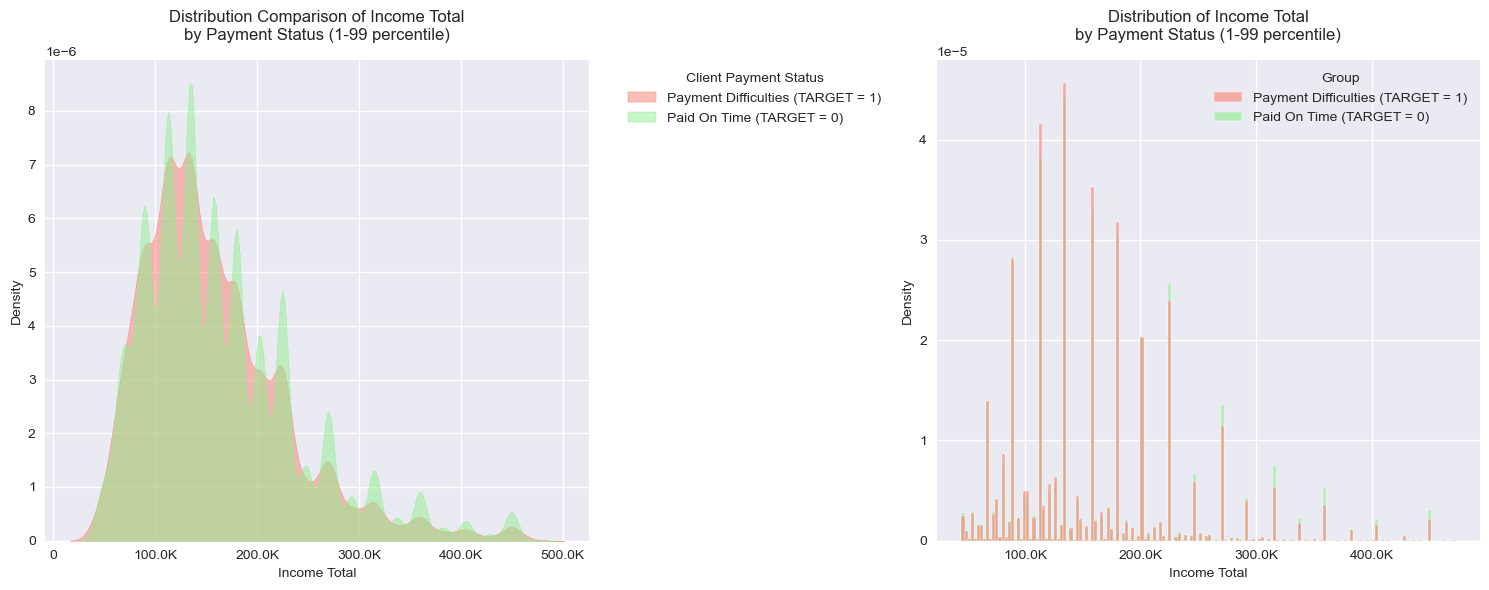


📊 Summary Statistics for Income Total:

👥 Payment Difficulties (TARGET = 1):
   • Average (Mean): 165.6K
   • Typical Range (Median): 135.0K
   • Standard Deviation: 746.7K
   • 25th Percentile: 112.5K
   • 75th Percentile: 202.5K
   • Minimum (1st percentile): 45.0K
   • Maximum (99th percentile): 472.5K
   • Outliers: 282 (1.1% of data)

👥 Paid On Time (TARGET = 0):
   • Average (Mean): 169.1K
   • Typical Range (Median): 148.5K
   • Standard Deviation: 110.5K
   • 25th Percentile: 112.5K
   • 75th Percentile: 202.5K
   • Minimum (1st percentile): 45.0K
   • Maximum (99th percentile): 472.5K
   • Outliers: 4,240 (1.5% of data)

📈 Statistical Test:
   • Kolmogorov-Smirnov test p-value: 3.91e-28
   • The distributions are statistically different

📊 Analyzing Credit


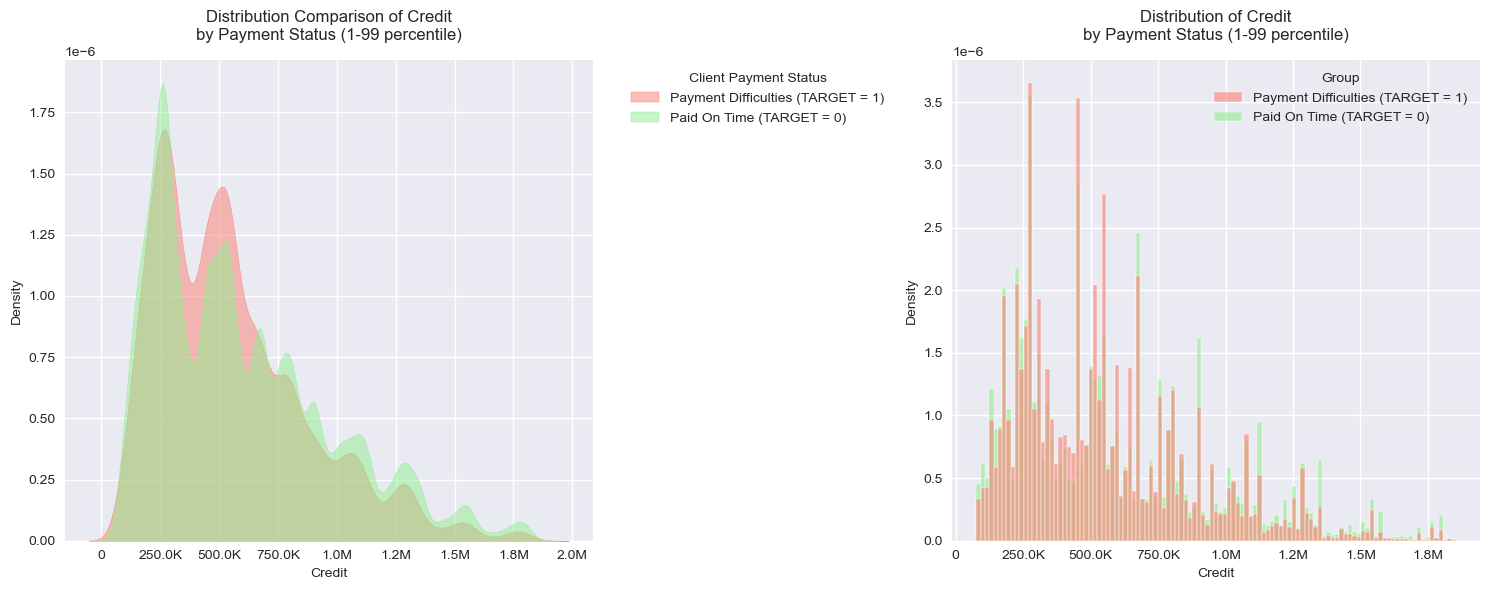


📊 Summary Statistics for Credit:

👥 Payment Difficulties (TARGET = 1):
   • Average (Mean): 557.8K
   • Typical Range (Median): 497.5K
   • Standard Deviation: 346.4K
   • 25th Percentile: 284.4K
   • 75th Percentile: 733.3K
   • Minimum (1st percentile): 76.4K
   • Maximum (99th percentile): 1.9M
   • Outliers: 256 (1.0% of data)

👥 Paid On Time (TARGET = 0):
   • Average (Mean): 602.6K
   • Typical Range (Median): 517.8K
   • Standard Deviation: 406.8K
   • 25th Percentile: 270.0K
   • 75th Percentile: 810.0K
   • Minimum (1st percentile): 76.4K
   • Maximum (99th percentile): 1.9M
   • Outliers: 5,555 (2.0% of data)

📈 Statistical Test:
   • Kolmogorov-Smirnov test p-value: 3.32e-96
   • The distributions are statistically different

📊 Analyzing Annuity


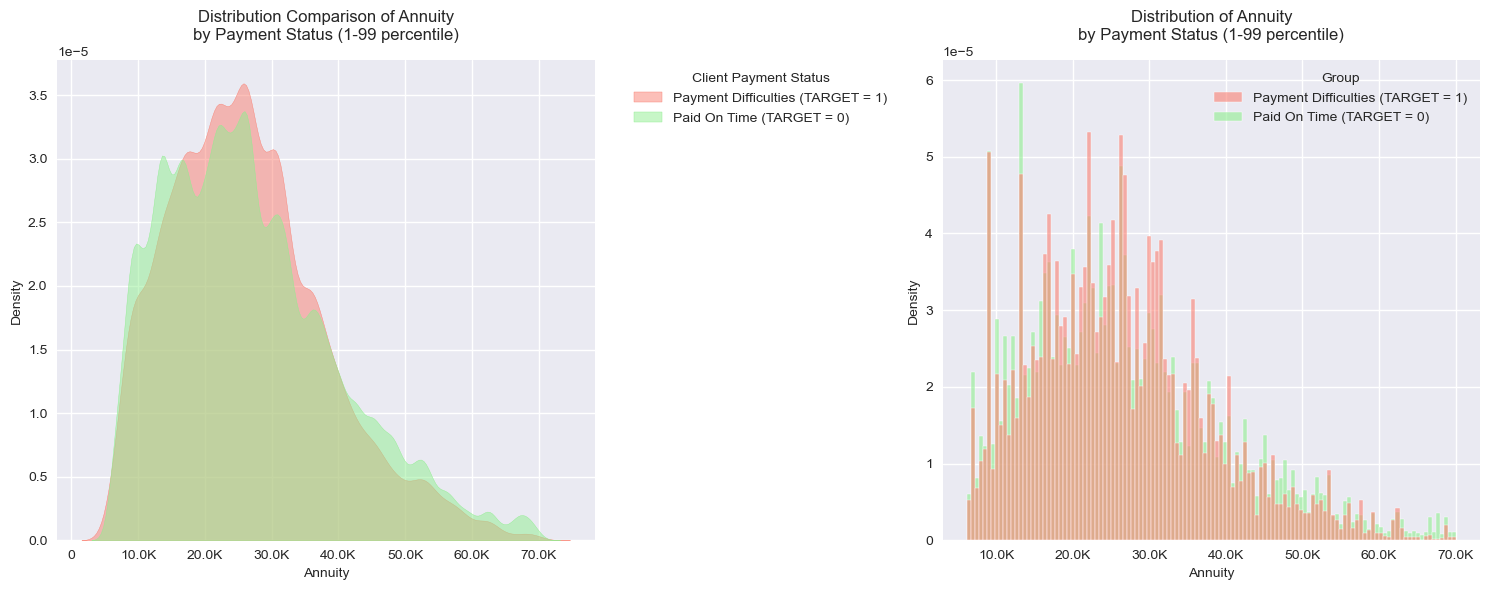


📊 Summary Statistics for Annuity:

👥 Payment Difficulties (TARGET = 1):
   • Average (Mean): 26.5K
   • Typical Range (Median): 25.3K
   • Standard Deviation: 12.5K
   • 25th Percentile: 17.4K
   • 75th Percentile: 33.0K
   • Minimum (1st percentile): 6.2K
   • Maximum (99th percentile): 70.0K
   • Outliers: 294 (1.2% of data)

👥 Paid On Time (TARGET = 0):
   • Average (Mean): 27.2K
   • Typical Range (Median): 24.9K
   • Standard Deviation: 14.7K
   • 25th Percentile: 16.5K
   • 75th Percentile: 34.7K
   • Minimum (1st percentile): 6.2K
   • Maximum (99th percentile): 70.0K
   • Outliers: 5,851 (2.1% of data)

📈 Statistical Test:
   • Kolmogorov-Smirnov test p-value: 2.62e-29
   • The distributions are statistically different

📊 Analyzing Goods Price


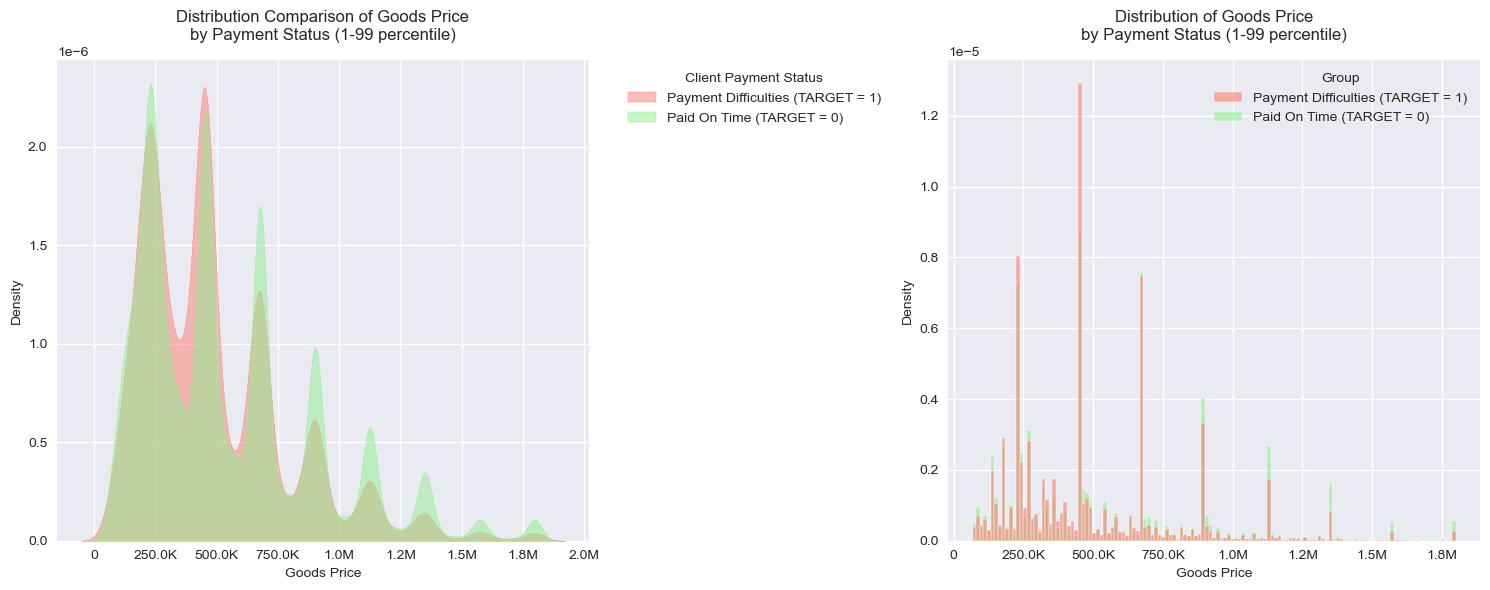


📊 Summary Statistics for Goods Price:

👥 Payment Difficulties (TARGET = 1):
   • Average (Mean): 488.9K
   • Typical Range (Median): 450.0K
   • Standard Deviation: 311.5K
   • 25th Percentile: 238.5K
   • 75th Percentile: 675.0K
   • Minimum (1st percentile): 67.5K
   • Maximum (99th percentile): 1.8M
   • Outliers: 154 (0.6% of data)

👥 Paid On Time (TARGET = 0):
   • Average (Mean): 542.7K
   • Typical Range (Median): 450.0K
   • Standard Deviation: 373.6K
   • 25th Percentile: 238.5K
   • 75th Percentile: 685.0K
   • Minimum (1st percentile): 67.5K
   • Maximum (99th percentile): 1.8M
   • Outliers: 3,339 (1.2% of data)

📈 Statistical Test:
   • Kolmogorov-Smirnov test p-value: 2.00e-176
   • The distributions are statistically different


In [53]:
# Create defaulters and non-defaulters DataFrames with the required columns
features_to_analyze = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']

# Split data into defaulters and non-defaulters
defaulters = cleaned_application_data[cleaned_application_data['TARGET'] == 1][features_to_analyze]
non_defaulters = cleaned_application_data[cleaned_application_data['TARGET'] == 0][features_to_analyze]

# Make use of the analysis functions
analyze_features(defaulters, non_defaulters, features_to_analyze)

#### Bivariate Analysis: Relationship between Credit Amount and Goods Price

- **Objective:** To explore the relationship between the total loan amount (AMT_CREDIT) and the goods price (AMT_GOODS_PRICE) for both defaulters and non-defaulters. This analysis provides insight into whether the loan amounts often exceed the value of goods and how this relationship differs across client groups.
  
- **Visualization:** 
  - **Scatter Plot:** A scatter plot with `AMT_CREDIT` on the x-axis and `AMT_GOODS_PRICE` on the y-axis, colored by payment status. A diagonal reference line (Credit = Goods Price) is added to illustrate points where the loan amount equals the goods price.
  - **Axis Formatting:** Both axes use readable formats for large values, converting values in thousands (K) or millions (M).
  - **Legend Customization:** Clearly labels groups as "Paid On Time" (TARGET = 0) and "Payment Difficulties" (TARGET = 1).

- **Key Findings:**
  - **Correlation Analysis:** Displays correlation values between credit amount and goods price for both defaulters and non-defaulters.
  - **Comparison Analysis:** Calculates the percentage of cases where the credit amount is greater than the goods price, along with average differences by client payment status.
  
- **Outcome:** This analysis highlights patterns between credit and goods price values, showing potential trends that could be associated with loan default risk.


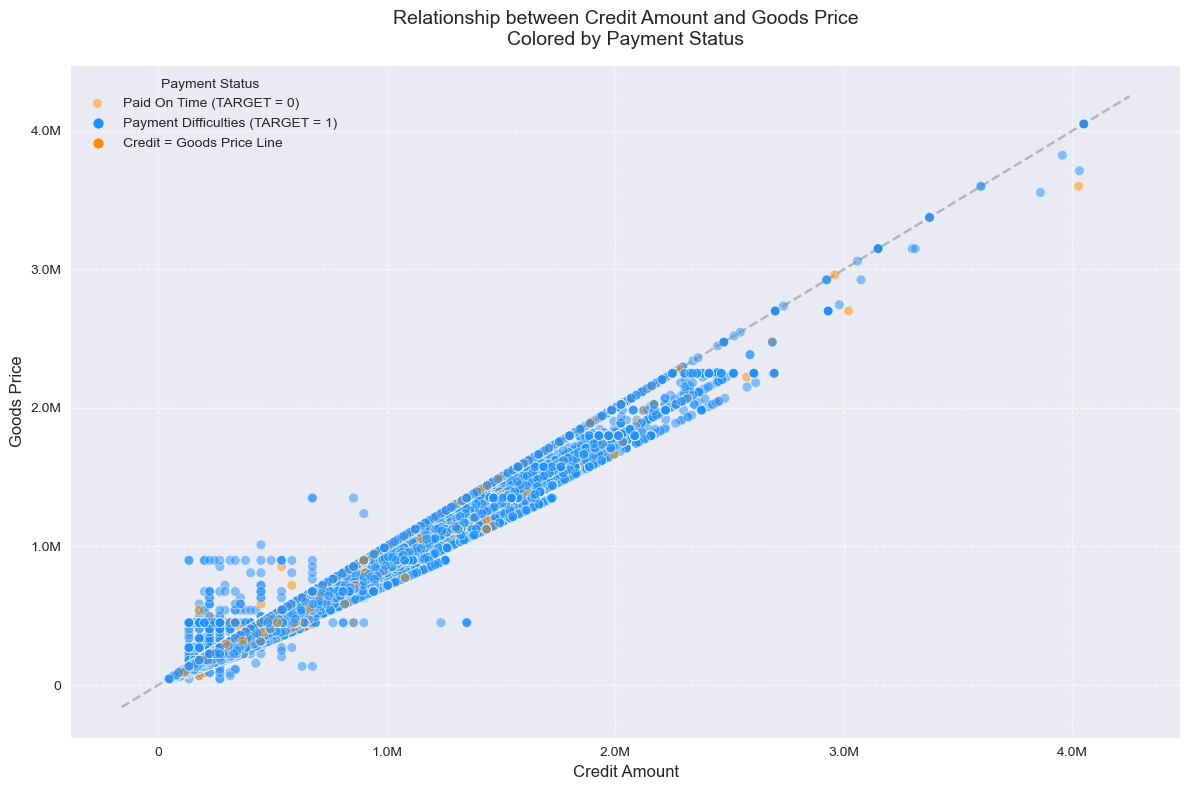


📊 Quick Analysis:

1️⃣ Credit Amount vs Goods Price Correlation:
   • Overall correlation: 0.987
   • Correlation for Paid On Time (TARGET = 0): 0.987
   • Correlation for Payment Difficulties (TARGET = 1): 0.983

2️⃣ Credit Amount vs Goods Price Comparison:
   • In 64.6% of cases, the credit amount is larger than the goods price

3️⃣ Average Difference (Credit - Goods Price):
   • Paid On Time (TARGET = 0): 60.0K
   • Payment Difficulties (TARGET = 1): 68.8K


In [54]:
# Set the style
plt.style.use('seaborn')
plt.figure(figsize=(12, 8))

# Create scatter plot
sns.scatterplot(data=numeric_data,
                x='AMT_CREDIT', 
                y='AMT_GOODS_PRICE',
                hue='TARGET',
                palette={0: 'dodgerblue', 1: 'darkorange'},
                alpha=0.5)

# Add title and labels
plt.title('Relationship between Credit Amount and Goods Price\nColored by Payment Status', 
          fontsize=14, pad=15)
plt.xlabel('Credit Amount', fontsize=12)
plt.ylabel('Goods Price', fontsize=12)

# Format axis labels to be more readable
def format_ticks(value, pos):
    if value >= 1e6:
        return f'{value/1e6:.1f}M'
    elif value >= 1e3:
        return f'{value/1e3:.1f}K'
    else:
        return f'{value:.0f}'

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(format_ticks))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_ticks))

# Add a diagonal line (y=x)
limits = [
    min(plt.xlim()[0], plt.ylim()[0]),
    max(plt.xlim()[1], plt.ylim()[1])
]
plt.plot(limits, limits, '--', color='gray', alpha=0.5, 
         label='Credit = Goods Price Line')

# Customize legend
plt.legend(title='Payment Status',
          labels=['Paid On Time (TARGET = 0)', 
                 'Payment Difficulties (TARGET = 1)',
                 'Credit = Goods Price Line'])

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout and display
plt.tight_layout()
plt.show()

# Calculate and print some insights
print("\n📊 Quick Analysis:")
print("\n1️⃣ Credit Amount vs Goods Price Correlation:")
correlation = numeric_data['AMT_CREDIT'].corr(numeric_data['AMT_GOODS_PRICE'])
print(f"   • Overall correlation: {correlation:.3f}")

# Calculate by TARGET group
for target in [0, 1]:
    group_corr = numeric_data[numeric_data['TARGET'] == target]['AMT_CREDIT'].corr(
        numeric_data[numeric_data['TARGET'] == target]['AMT_GOODS_PRICE']
    )
    group_name = "Paid On Time (TARGET = 0)" if target == 0 else "Payment Difficulties (TARGET = 1)"
    print(f"   • Correlation for {group_name}: {group_corr:.3f}")

# Calculate percentage of cases where credit > goods price
credit_larger = (numeric_data['AMT_CREDIT'] > numeric_data['AMT_GOODS_PRICE']).mean() * 100
print(f"\n2️⃣ Credit Amount vs Goods Price Comparison:")
print(f"   • In {credit_larger:.1f}% of cases, the credit amount is larger than the goods price")

# Calculate average difference by TARGET
print("\n3️⃣ Average Difference (Credit - Goods Price):")
for target in [0, 1]:
    group = numeric_data[numeric_data['TARGET'] == target]
    avg_diff = (group['AMT_CREDIT'] - group['AMT_GOODS_PRICE']).mean()
    group_name = "Paid On Time (TARGET = 0)" if target == 0 else "Payment Difficulties (TARGET = 1)"
    print(f"   • {group_name}: {format_ticks(avg_diff, None)}")

#### Bivariate Analysis: Credit Amount vs. Annual Income

- **Objective:** This analysis investigates the relationship between `AMT_CREDIT` (credit amount) and `AMT_INCOME_TOTAL` (annual income) across different loan payment statuses to understand if income levels correlate with credit amounts and loan repayment behavior.

- **Visualization:**
  - **Scatter Plot:** The scatter plot visualizes `AMT_CREDIT` vs. `AMT_INCOME_TOTAL`, with colors distinguishing between clients in good standing and those with payment difficulties.
  - **Axis Formatting:** Both axes display large values in a more readable format (K for thousands and M for millions), with a set range for clarity (0 - 5M).
  - **Legend and Grid:** A clear legend explains loan statuses, and a subtle grid enhances readability.

- **Key Insights:**
  - **Default Rate:** Overall default rate calculated to understand general payment behavior.
  - **Median Credit & Income Levels:** Median values of `AMT_CREDIT` and `AMT_INCOME_TOTAL` provide a benchmark for typical client credit and income.
  - **Credit Exceeding Income Percentage:** The analysis calculates the percentage of cases where credit amounts exceed annual income, providing insight into the financial stretching clients may undertake.
  - **Average Credit-Income Difference by Loan Status:** The average difference between credit and income is calculated separately for each loan status, revealing if high credit relative to income is associated with payment challenges.

- **Outcome:** This analysis provides insights into whether higher income levels impact credit size and repayment ability and highlights cases where credit exceeds income, potentially indicating higher risk.


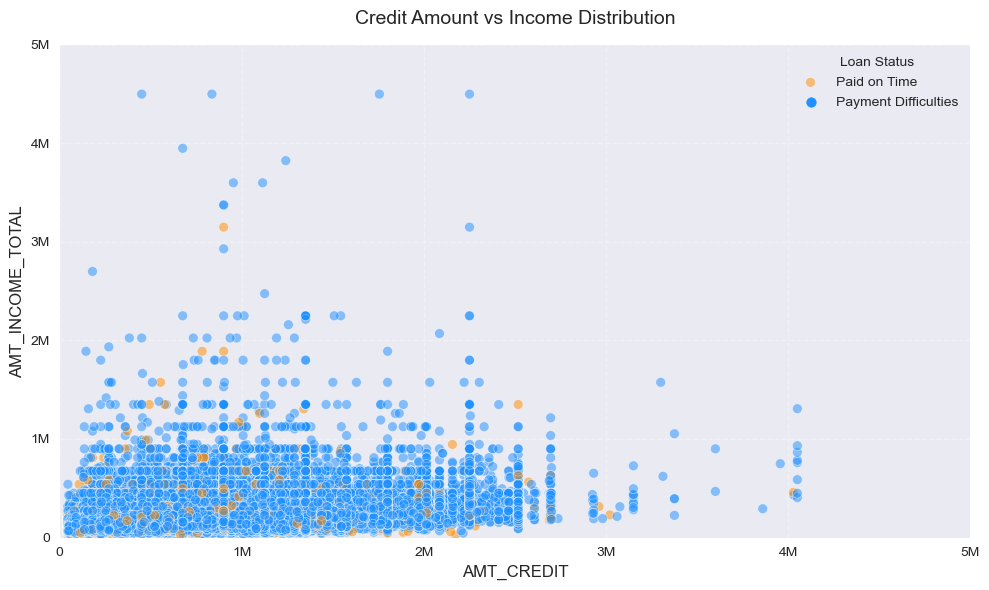


Key Insights:
--------------------------------------------------
• Overall Default Rate: 8.1%
• Median Credit Amount: 514K
• Median Annual Income: 147K
• Loans Exceeding Annual Income: 94.7%

Credit Amount vs income total Comparison:
   • In 94.7% of cases, the credit amount is larger than the income total

Average Difference (Credit - income total):
   • Paid On Time (TARGET = 0): 434K
   • Payment Difficulties (TARGET = 1): 392K


In [55]:
# Set clean, professional style
plt.style.use('seaborn')
plt.figure(figsize=(10, 6))

# Create simple but effective scatter plot
sns.scatterplot(data=numeric_data,
                x='AMT_CREDIT',
                y='AMT_INCOME_TOTAL',
                hue='TARGET',
                palette={0: 'dodgerblue', 1: 'darkorange'},
                alpha=0.5,
                s=50)

# Clean, professional title and labels
plt.title('Credit Amount vs Income Distribution', 
          fontsize=14, pad=15)
plt.xlabel('AMT_CREDIT', fontsize=12)
plt.ylabel('AMT_INCOME_TOTAL', fontsize=12)

# Format axis labels to be easily readable
def format_ticks(value, pos):
    if value >= 1e6:
        return f'{value/1e6:.0f}M'
    elif value >= 1e3:
        return f'{value/1e3:.0f}K'
    return f'{value:.0f}'

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(format_ticks))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_ticks))

# Set focused axis limits
plt.xlim(0, 5000000)
plt.ylim(0, 5000000)

# Clean, subtle grid
plt.grid(True, linestyle='--', alpha=0.3)

# Simple, clear legend
plt.legend(title='Loan Status',
          labels=['Paid on Time', 'Payment Difficulties'],
          bbox_to_anchor=(1, 1))

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Print key insights
print("\nKey Insights:")
print("-" * 50)

# Calculate default rate
default_rate = (numeric_data['TARGET'] == 1).mean() * 100
print(f"• Overall Default Rate: {default_rate:.1f}%")

# Calculate median credit and income
median_credit = numeric_data['AMT_CREDIT'].median()
median_income = numeric_data['AMT_INCOME_TOTAL'].median()
print(f"• Median Credit Amount: {format_ticks(median_credit, None)}")
print(f"• Median Annual Income: {format_ticks(median_income, None)}")

# Calculate credit higher than income
credit_larger = (numeric_data['AMT_CREDIT'] > numeric_data['AMT_INCOME_TOTAL']).mean() * 100
print(f"• Loans Exceeding Annual Income: {credit_larger:.1f}%")

# Calculate percentage of cases where credit > income total
credit_larger = (numeric_data['AMT_CREDIT'] > numeric_data['AMT_INCOME_TOTAL']).mean() * 100
print(f"\nCredit Amount vs income total Comparison:")
print(f"   • In {credit_larger:.1f}% of cases, the credit amount is larger than the income total")

# Calculate average difference by TARGET
print("\nAverage Difference (Credit - income total):")
for target in [0, 1]:
    group = numeric_data[numeric_data['TARGET'] == target]
    avg_diff = (group['AMT_CREDIT'] - group['AMT_INCOME_TOTAL']).mean()
    group_name = "Paid On Time (TARGET = 0)" if target == 0 else "Payment Difficulties (TARGET = 1)"
    print(f"   • {group_name}: {format_ticks(avg_diff, None)}")

#### Bivariate Analysis: Credit Amount vs. Number of Children

- **Objective:** This analysis explores the relationship between `AMT_CREDIT` (credit amount) and `CNT_CHILDREN` (number of children) across clients with different loan statuses to determine if family size influences loan amount or repayment behavior.

- **Visualization:**
  - **Scatter Plot:** The scatter plot of `AMT_CREDIT` vs. `CNT_CHILDREN` provides a visual comparison of credit amounts across family sizes, with colors indicating loan status.
  - **Axis Formatting:** Credit amount values are formatted for readability (K for thousands and M for millions), and the x-axis is limited to whole numbers, representing discrete family sizes.
  - **Legend and Grid:** A clear legend distinguishes loan repayment status, and a subtle grid enhances visual clarity.

- **Key Insights:**
  - **Correlation Analysis:** The analysis includes the correlation coefficient between `CNT_CHILDREN` and `AMT_CREDIT` to quantify the association between family size and loan amount.
  - **Median Credit Amount by Family Size:** The median credit amounts are calculated separately for applicants with children and those without, providing insight into typical credit requests based on family size.

- **Outcome:** This analysis aims to reveal any potential impact of family size on credit amount and to assess whether applicants with larger families may present different credit and repayment characteristics.

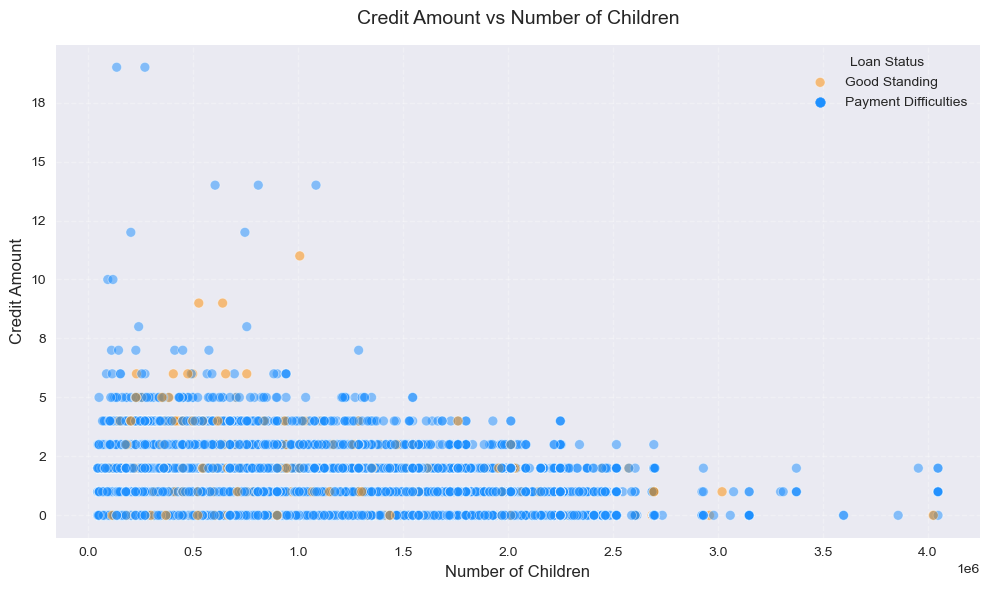


Correlation between Number of Children and Credit Amount: 0.002

Median Credit Amount:
• Applicants with Children: 512K
• Applicants without Children: 515K


In [56]:
# Set clean, professional style
plt.style.use('seaborn')
plt.figure(figsize=(10, 6))

# Create scatter plot
sns.scatterplot(data=numeric_data,
                x='AMT_CREDIT',
                y='CNT_CHILDREN',
                hue='TARGET',
                palette={0: 'dodgerblue', 1: 'darkorange'},
                alpha=0.5,
                s=50)

# Clean, professional title and labels
plt.title('Credit Amount vs Number of Children', 
          fontsize=14, pad=15)
plt.xlabel('Number of Children', fontsize=12)
plt.ylabel('Credit Amount', fontsize=12)

# Format credit amount labels
def format_ticks(value, pos):
    if value >= 1e6:
        return f'{value/1e6:.0f}M'
    elif value >= 1e3:
        return f'{value/1e3:.0f}K'
    return f'{value:.0f}'

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_ticks))

# Set x-axis to show whole numbers only
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Clean, subtle grid
plt.grid(True, linestyle='--', alpha=0.3)

# Simple, clear legend
plt.legend(title='Loan Status',
          labels=['Good Standing', 'Payment Difficulties'],
          bbox_to_anchor=(1, 1))

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Calculate correlation
correlation = numeric_data['CNT_CHILDREN'].corr(numeric_data['AMT_CREDIT'])
print(f"\nCorrelation between Number of Children and Credit Amount: {correlation:.3f}")

# Calculate median credit for those with and without children
median_with_children = numeric_data[numeric_data['CNT_CHILDREN'] > 0]['AMT_CREDIT'].median()
median_without_children = numeric_data[numeric_data['CNT_CHILDREN'] == 0]['AMT_CREDIT'].median()
print(f"\nMedian Credit Amount:")
print(f"• Applicants with Children: {format_ticks(median_with_children, None)}")
print(f"• Applicants without Children: {format_ticks(median_without_children, None)}")

### Bivariate Analysis: Scatter Plot Matrix of Key Credit Variables

- **Objective:** This analysis creates a 5x5 scatter plot matrix to explore bivariate relationships among key financial variables and assess how these interactions differ between `defaulters` and `non-defaulters`. The matrix includes:

    - `CNT_CHILDREN`: Number of children
    - `AMT_INCOME_TOTAL`: Annual income
    - `AMT_CREDIT`: Credit amount
    - `AMT_ANNUITY`: Annuity amount
    - `AMT_GOODS_PRICE`: Price of goods for which the credit was issued

- **Methodology:**
  - **Data Segmentation:** Each scatter plot differentiates between `defaulters` (in red) and `non-defaulters` (in blue) to highlight potential patterns in financial behavior across these groups.
  - **Axis Formatting:** Scientific notation is used for clear representation of large financial values.
  - **Correlation Coefficient:** Each plot includes the correlation coefficient between variables, offering insight into the strength of their linear relationship.

- **Outcome:** By observing these interactions across `defaulters` and `non-defaulters`, this analysis aims to identify patterns in financial metrics that may signal credit risk or repayment difficulties. The results from this visual inspection can inform the selection of predictive features for further analysis.


In [57]:
def create_scatter_matrix(numeric_data):
    """
    Create a 5x5 scatter plot matrix for bivariate analysis of credit data
    with TARGET variable (defaulter status) as the color coding.
    """
    # List of variables for analysis
    variables = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 
                'AMT_ANNUITY', 'AMT_GOODS_PRICE']
    
    # Set up the matplotlib figure
    fig, axes = plt.subplots(len(variables), len(variables), figsize=(20, 20))
    fig.suptitle('Bivariate Analysis of Credit Data', fontsize=16, y=0.95)
    
    # Create scatter plots
    for i, var1 in enumerate(variables):
        for j, var2 in enumerate(variables):
            # Create scatter plot
            defaulters = numeric_data[numeric_data['TARGET'] == 1]
            non_defaulters = numeric_data[numeric_data['TARGET'] == 0]
            
            # Plot for non-defaulters (0)
            axes[i, j].scatter(non_defaulters[var2], non_defaulters[var1], 
                             alpha=0.5, c='blue', label='Non-defaulters', s=20)
            
            # Plot for defaulters (1)
            axes[i, j].scatter(defaulters[var2], defaulters[var1], 
                             alpha=0.5, c='red', label='Defaulters', s=20)
            
            # Format axis labels
            if i == len(variables)-1:  # Bottom row
                axes[i, j].set_xlabel(var2)
            else:
                axes[i, j].set_xlabel('')
            
            if j == 0:  # Left column
                axes[i, j].set_ylabel(var1)
            else:
                axes[i, j].set_ylabel('')
            
            # Format numbers on axes
            axes[i, j].ticklabel_format(style='sci', scilimits=(-2, 6), axis='both')
            
            # Add correlation coefficient
            corr = numeric_data[[var1, var2]].corr().iloc[0, 1]
            axes[i, j].text(0.05, 0.95, f'corr: {corr:.2f}', 
                          transform=axes[i, j].transAxes)
            
            # Add legend to each plot
            axes[i, j].legend()
    
    # Adjust layout
    plt.tight_layout()
    return fig


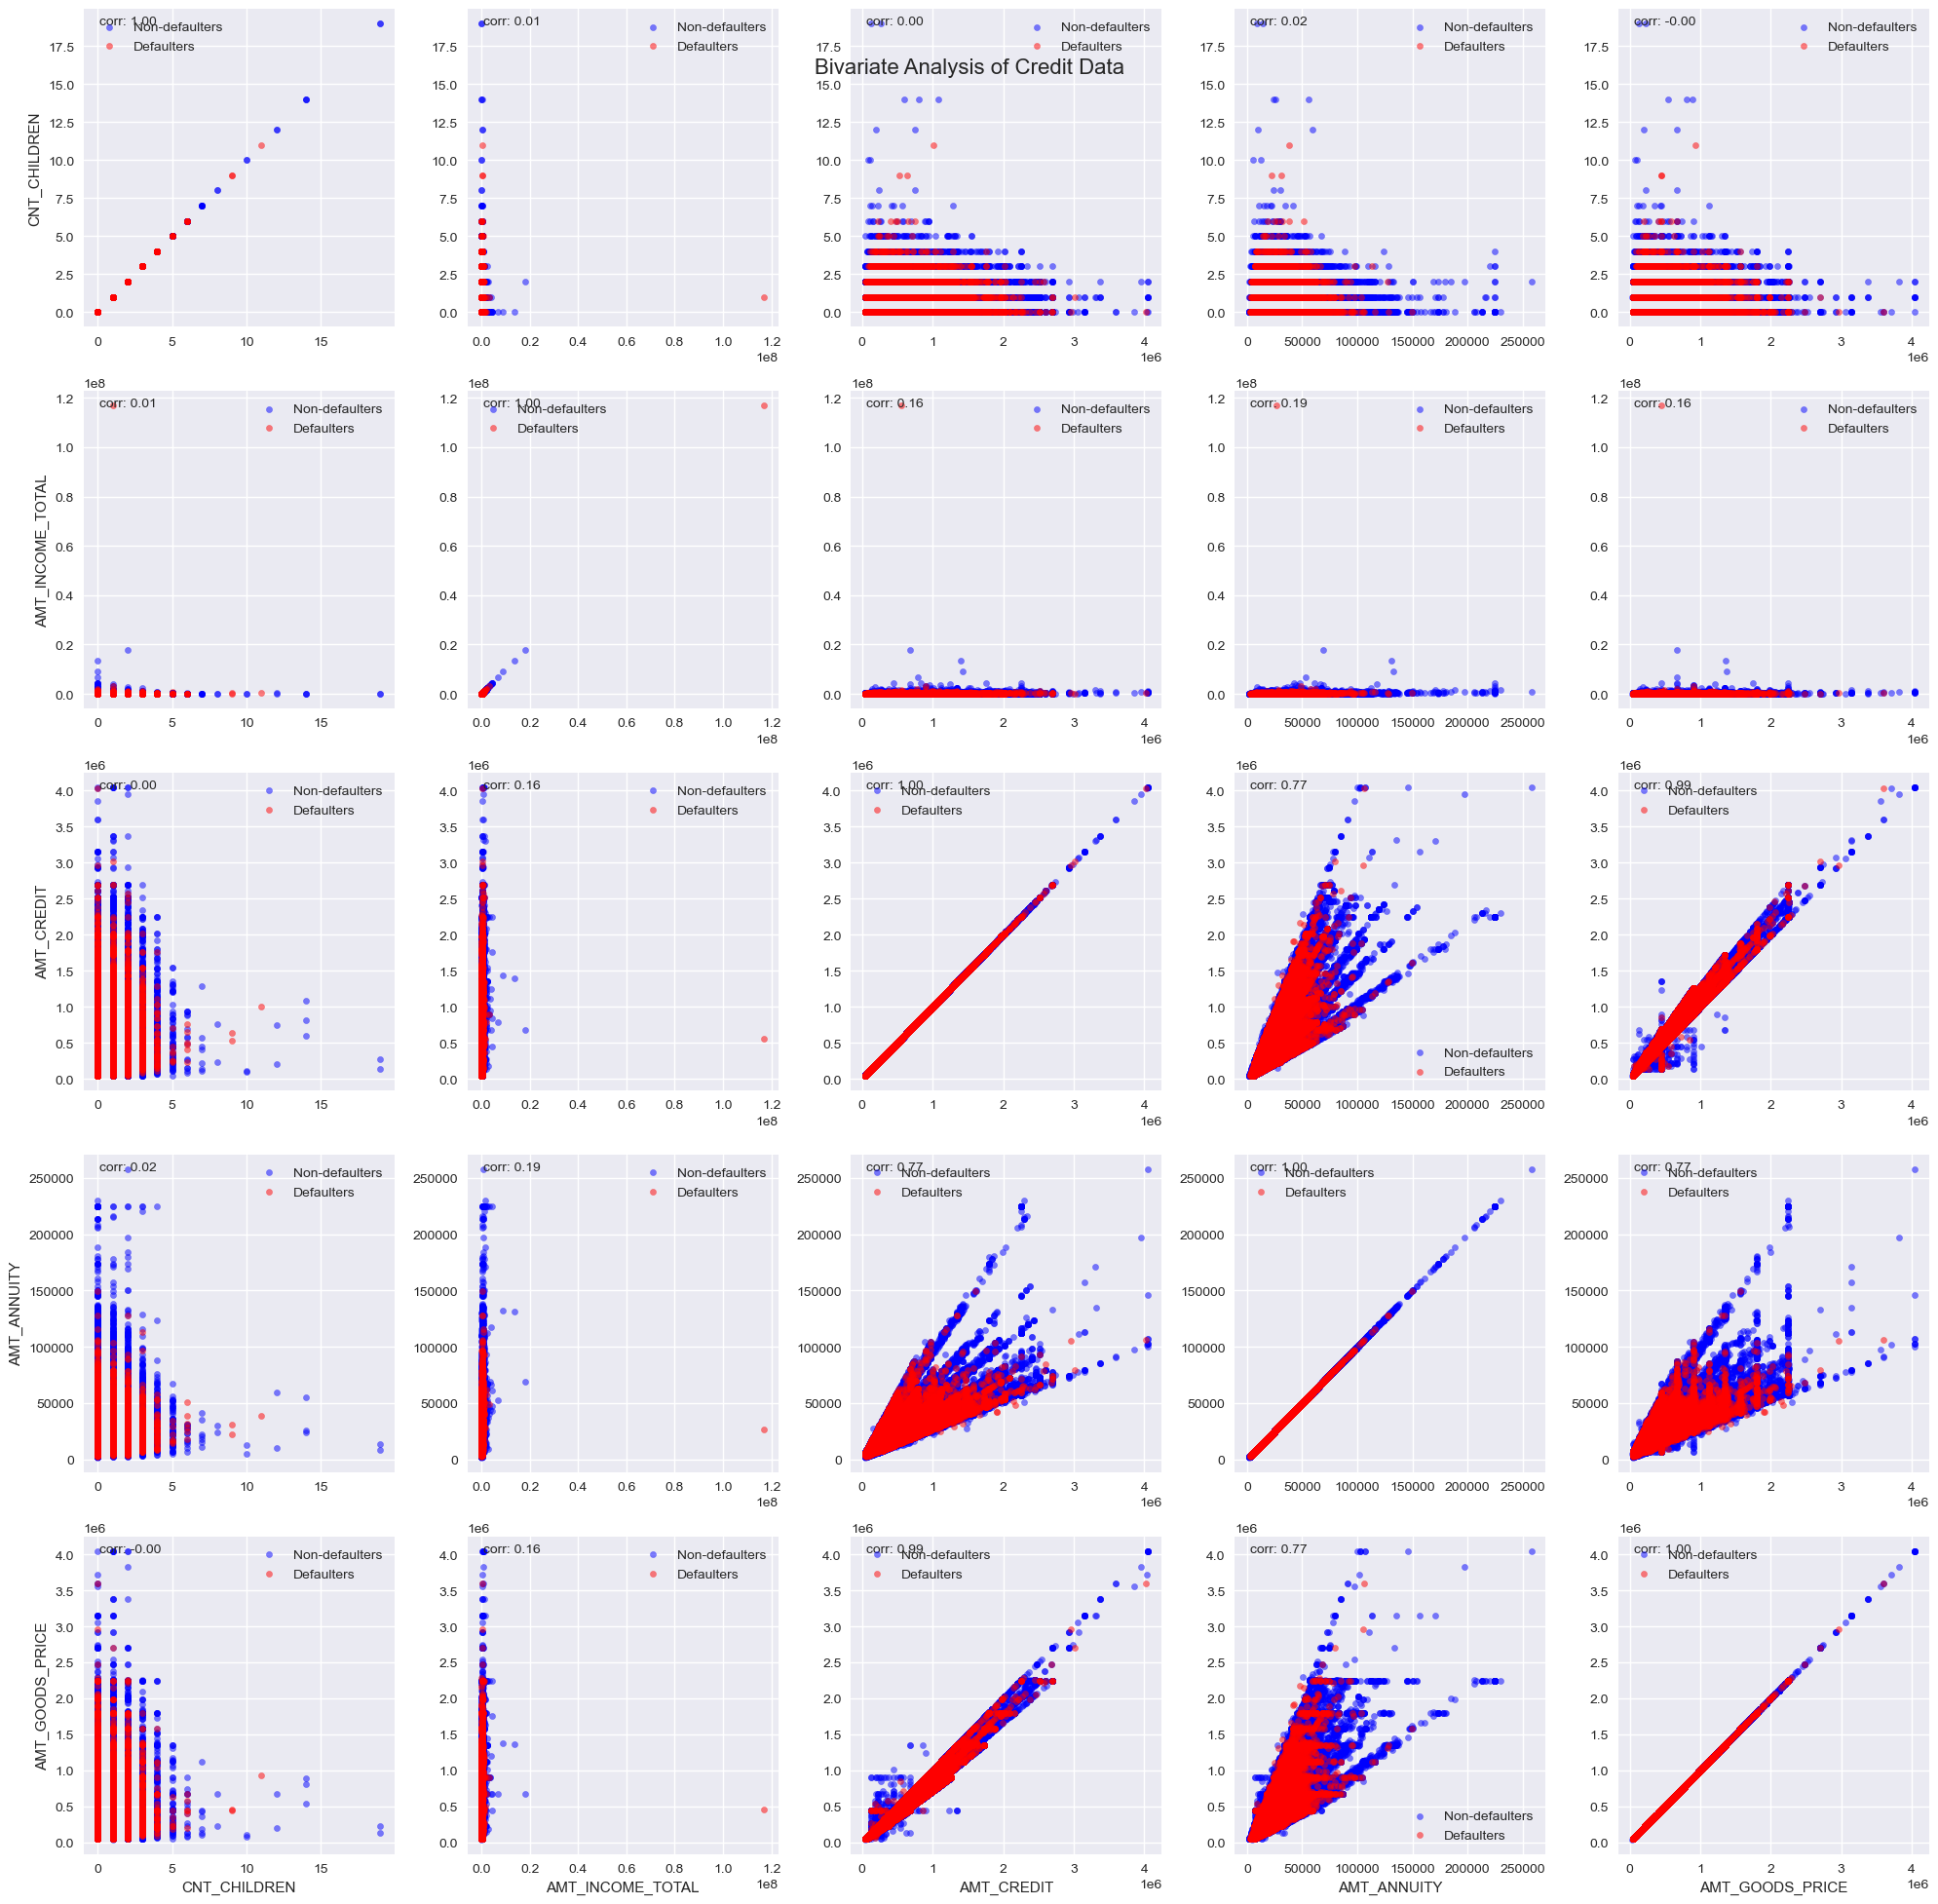

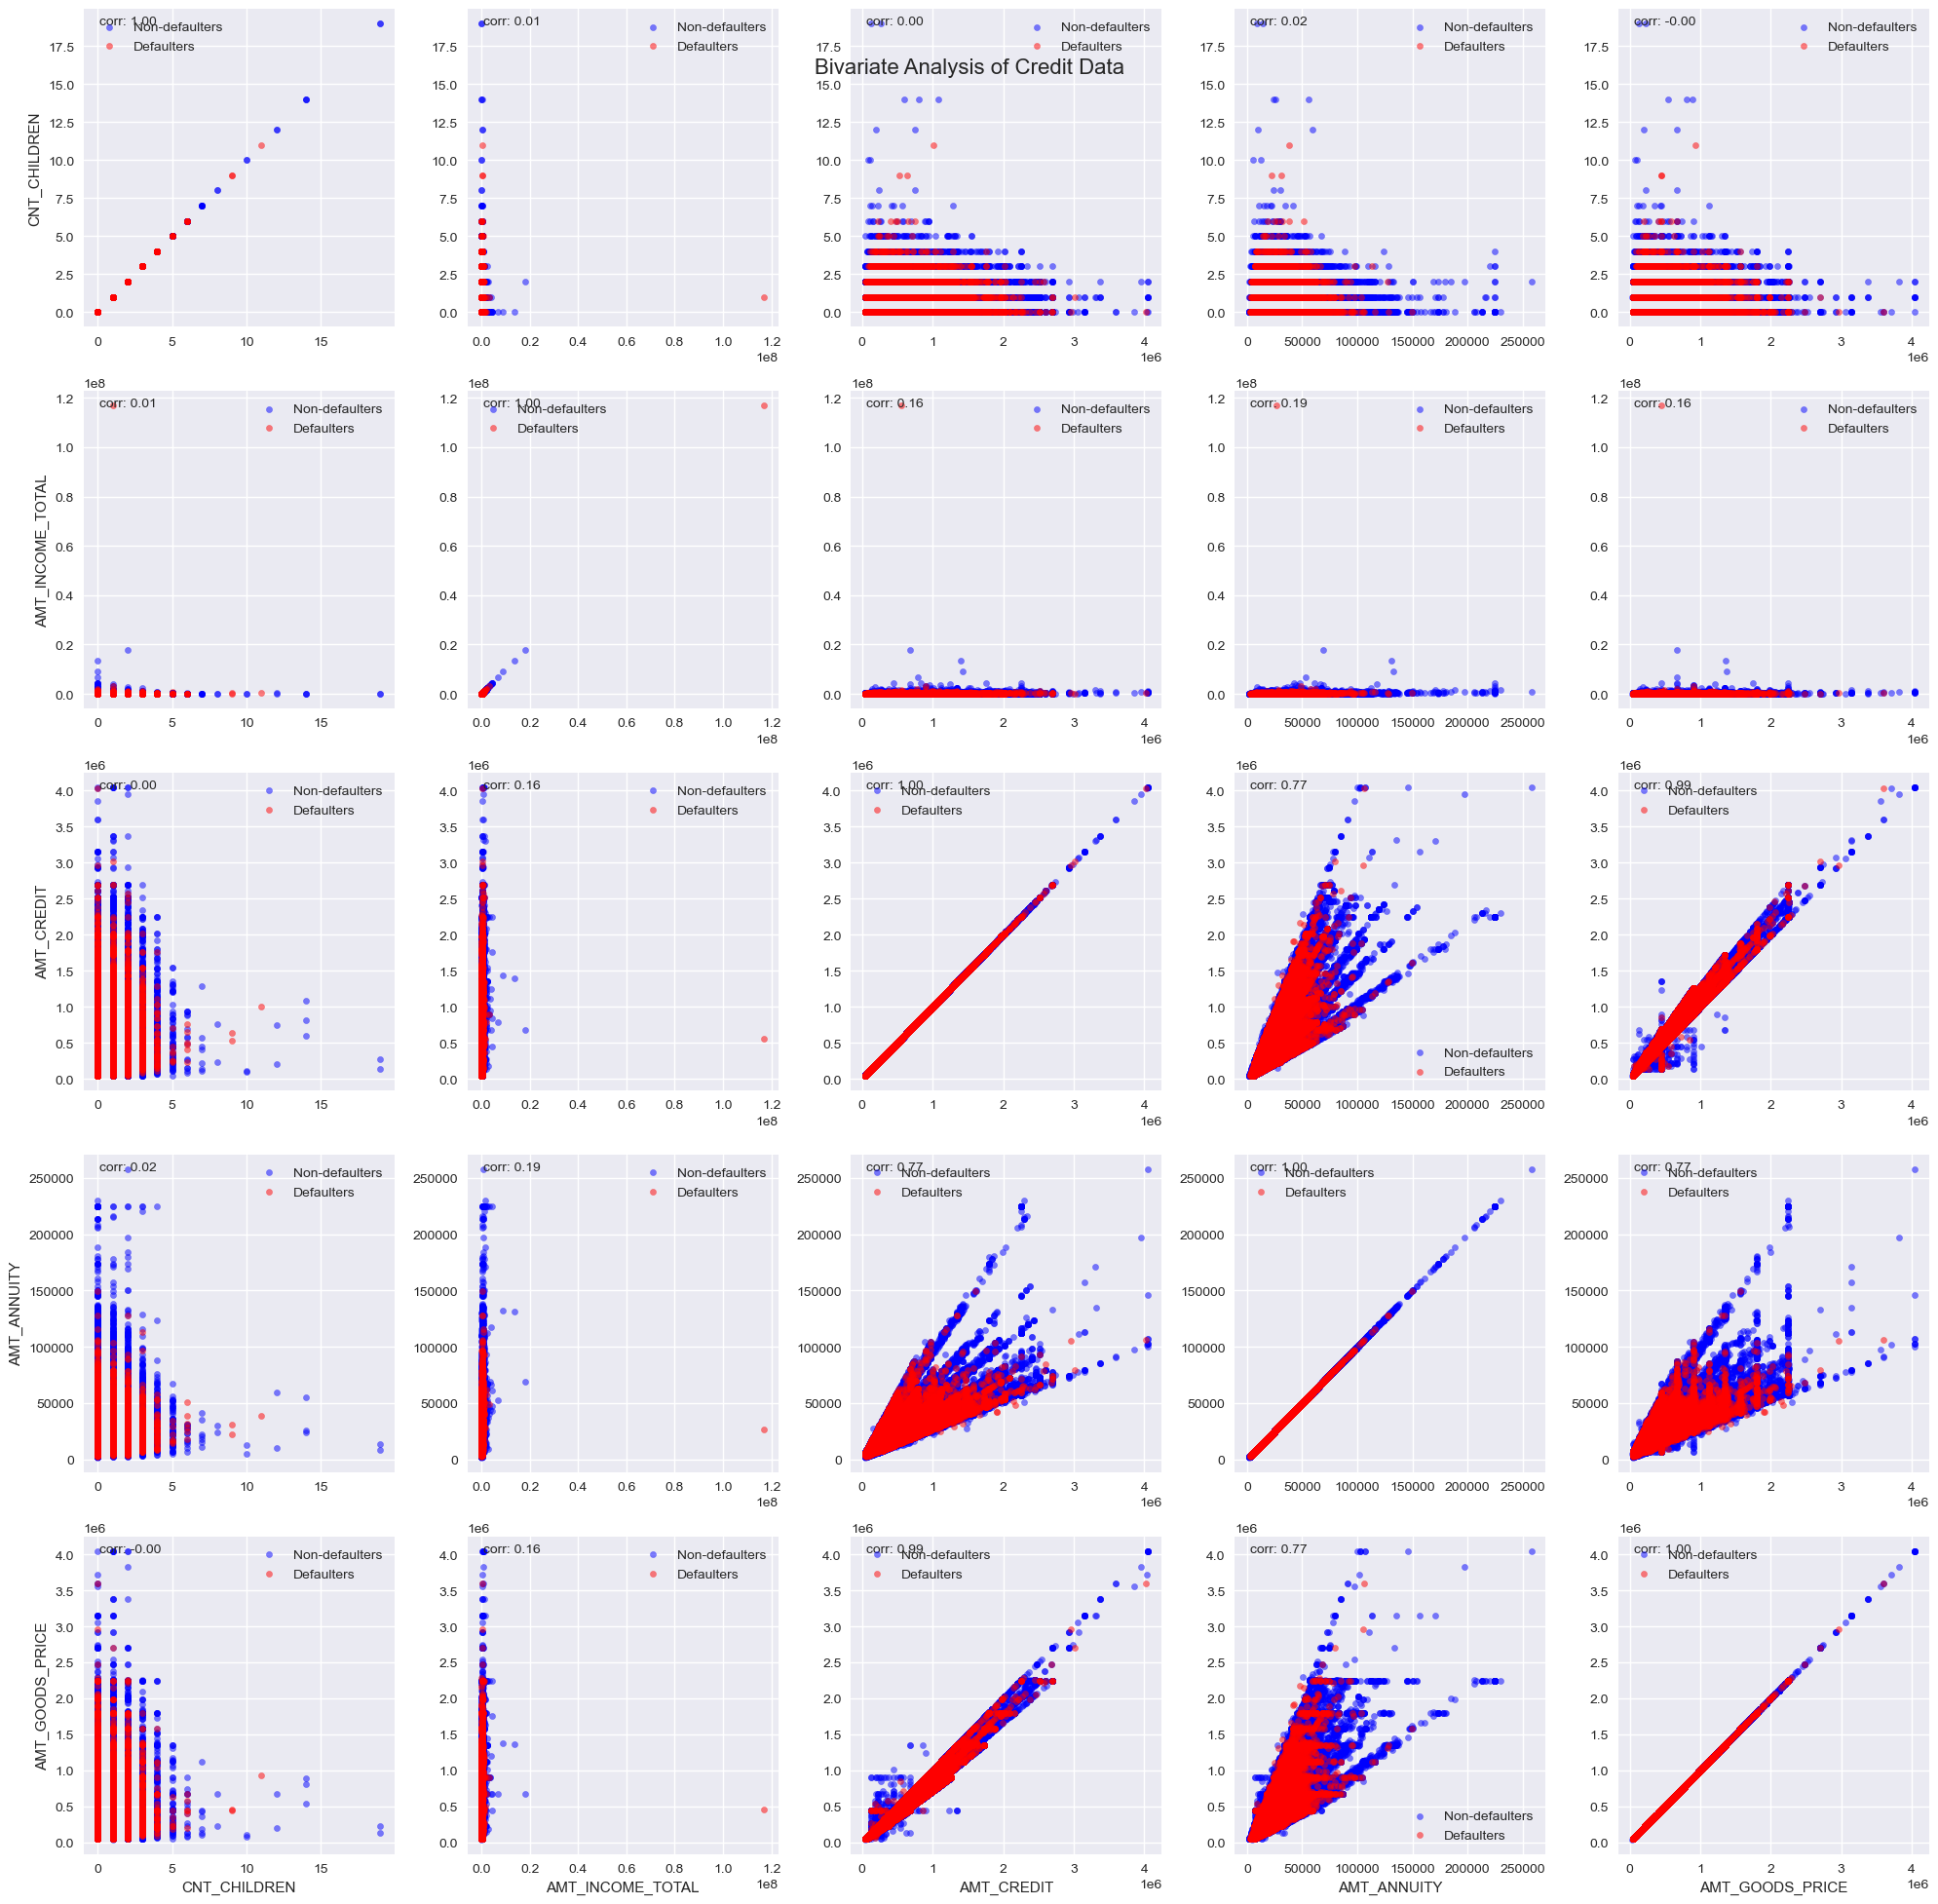

In [58]:
create_scatter_matrix(numeric_data)

## prev_app dataset
### Identifying Non-Informative Columns Based on Null Percentage and Relevance

This code block performs an initial examination of the `prev_app` dataset to identify columns with a high percentage of missing values and those considered non-essential for analysis.

#### method:

1. **Preview `prev_app` Dataset**:
   - Display the first few rows of `prev_app` to get an overview of the data structure.

2. **Calculate Null Percentage**:
   - Calculate the percentage of null values in each column and sort them in descending order.
   - Store these percentages in `null_count` for review, helping to identify columns with excessive missing data.

3. **Filter Columns with High Null Percentages**:
   - Filter for columns where the null percentage is 40% or higher, storing these in the list `var_msg_abv_40`.
   - These columns likely provide limited value due to a high rate of missing data.

4. **Define `non_valuable_cols`**:
   - Combine `var_msg_abv_40` with additional columns deemed non-essential for analysis based on their context, including:
     - `'WEEKDAY_APPR_PROCESS_START'`
     - `'HOUR_APPR_PROCESS_START'`
     - `'FLAG_LAST_APPL_PER_CONTRACT'`
     - `'NFLAG_LAST_APPL_IN_DAY'`

This process helps in reducing dataset complexity by removing columns with excessive null values or limited analytical relevance, ensuring a cleaner and more efficient dataset for further analysis.


In [59]:
prev_app.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [60]:
null_count = pd.DataFrame(prev_app.isnull().sum().sort_values(ascending=False)/prev_app.shape[0]*100).reset_index().rename(columns={'index':'var', 0:'count_pct'})

null_count

var  count_pct
0      RATE_INTEREST_PRIVILEGED  99.643698
1         RATE_INTEREST_PRIMARY  99.643698
2              AMT_DOWN_PAYMENT  53.636480
3             RATE_DOWN_PAYMENT  53.636480
4               NAME_TYPE_SUITE  49.119754
5     NFLAG_INSURED_ON_APPROVAL  40.298129
6              DAYS_TERMINATION  40.298129
7                 DAYS_LAST_DUE  40.298129
8     DAYS_LAST_DUE_1ST_VERSION  40.298129
9                DAYS_FIRST_DUE  40.298129
10           DAYS_FIRST_DRAWING  40.298129
11              AMT_GOODS_PRICE  23.081773
12                  AMT_ANNUITY  22.286665
13                  CNT_PAYMENT  22.286366
14          PRODUCT_COMBINATION   0.020716
15                   AMT_CREDIT   0.000060
16             NAME_YIELD_GROUP   0.000000
17               NAME_PORTFOLIO   0.000000
18         NAME_SELLER_INDUSTRY   0.000000
19             SELLERPLACE_AREA   0.000000
20                 CHANNEL_TYPE   0.000000
21            NAME_PRODUCT_TYPE   0.000000
22                   SK_ID_PREV   0.000000
23          NAME_GOODS_CATEGORY   0.000000
24             NAME_CLIENT_TYPE   0.000000
25           CODE_REJECT_REASON   0.000000
26                   SK_ID_CURR   0.000000
27                DAYS_DECISION   0.000000
28         NAME_CONTRACT_STATUS   0.000000
29       NAME_CASH_LOAN_PURPOSE   0.000000
30       NFLAG_LAST_APPL_IN_DAY   0.000000
31  FLAG_LAST_APPL_PER_CONTRACT   0.000000
32      HOUR_APPR_PROCESS_START   0.000000
33   WEEKDAY_APPR_PROCESS_START   0.000000
34              AMT_APPLICATION   0.000000
35           NAME_CONTRACT_TYPE   0.000000
36            NAME_PAYMENT_TYPE   0.000000

In [61]:
null_count = pd.DataFrame(prev_app.isnull().sum().sort_values(ascending=False)/prev_app.shape[0]*100).reset_index().rename(columns={'index':'var', 0:'count_pct'})

var_msg_abv_40 = list(null_count[null_count['count_pct']>=40]['var'])
var_msg_abv_40

['RATE_INTEREST_PRIVILEGED',
 'RATE_INTEREST_PRIMARY',
 'AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'NAME_TYPE_SUITE',
 'NFLAG_INSURED_ON_APPROVAL',
 'DAYS_TERMINATION',
 'DAYS_LAST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_FIRST_DUE',
 'DAYS_FIRST_DRAWING']

In [62]:
non_valuable_cols = var_msg_abv_40+['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY']
non_valuable_cols

['RATE_INTEREST_PRIVILEGED',
 'RATE_INTEREST_PRIMARY',
 'AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'NAME_TYPE_SUITE',
 'NFLAG_INSURED_ON_APPROVAL',
 'DAYS_TERMINATION',
 'DAYS_LAST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_FIRST_DUE',
 'DAYS_FIRST_DRAWING',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NFLAG_LAST_APPL_IN_DAY']

In [63]:
non_valuable_cols = var_msg_abv_40+['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY']
len(non_valuable_cols)

15

In [64]:
len(prev_app.columns)

37

In [65]:
prev_app_msg_cleaned = prev_app.drop(labels=non_valuable_cols, axis=1)

len(prev_app_msg_cleaned.columns)

22

In [66]:
prev_app_msg_cleaned.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [67]:
prev_app_msg_cleaned.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0     17145.0          17145.0                    XAP             Approved   
1    679671.0         607500.0                    XNA             Approved   
2    136444.5         112500.0                    XNA             Approved   
3    470790.0         450000.0                    XNA             Approved   
4    404055.0         337500.0                Repairs              Refused   

   DAYS_DECISION  ... NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO  \
0            -73  ...         Repeater              Mobile            POS   
1           -164  ...         Repeater                 XNA           Cash   
2           -301  ...         Repeater                 XNA           Cash   
3           -512  ...         Repeater                 XNA           Cash   
4           -781  ...         Repeater                 XNA           Cash   

  NAME_PRODUCT_TYPE             CHANNEL_TYPE SELLERPLACE_AREA  \
0               XNA             Country-wide               35   
1            x-sell           Contact center               -1   
2            x-sell  Credit and cash offices               -1   
3            x-sell  Credit and cash offices               -1   
4           walk-in  Credit and cash offices               -1   

  NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0         Connectivity         12.0           middle  POS mobile with interest  
1                  XNA         36.0       low_action          Cash X-Sell: low  
2                  XNA         12.0             high         Cash X-Sell: high  
3                  XNA         12.0           middle       Cash X-Sell: middle  
4                  XNA         24.0             high         Cash Street: high  

[5 rows x 22 columns]

In [68]:
prev_app_msg_cleaned.isnull().sum().sort_values(ascending=False)/prev_app_msg_cleaned.shape[0]*100

AMT_GOODS_PRICE           23.081773
AMT_ANNUITY               22.286665
CNT_PAYMENT               22.286366
PRODUCT_COMBINATION        0.020716
AMT_CREDIT                 0.000060
NAME_GOODS_CATEGORY        0.000000
NAME_YIELD_GROUP           0.000000
NAME_SELLER_INDUSTRY       0.000000
SELLERPLACE_AREA           0.000000
CHANNEL_TYPE               0.000000
NAME_PRODUCT_TYPE          0.000000
NAME_PORTFOLIO             0.000000
SK_ID_PREV                 0.000000
NAME_CLIENT_TYPE           0.000000
SK_ID_CURR                 0.000000
NAME_PAYMENT_TYPE          0.000000
DAYS_DECISION              0.000000
NAME_CONTRACT_STATUS       0.000000
NAME_CASH_LOAN_PURPOSE     0.000000
AMT_APPLICATION            0.000000
NAME_CONTRACT_TYPE         0.000000
CODE_REJECT_REASON         0.000000
dtype: float64

### Univariate Analysis: `AMT_GOODS_PRICE` Statistics

This section calculates and compares the **mean**, **median**, and **max** values of the `AMT_GOODS_PRICE` variable.

- **Values Included:**
  - **Mean:** Provides an estimate of the average goods price.
  - **Median:** Shows the middle value in the goods price distribution.

- **Additional Information:**
  - **Number of Null Values:** Displays the count of missing `AMT_GOODS_PRICE` entries.
  - **Total Records:** Provides the total number of records in the dataset for context.

In [69]:
# Calculate statistics for AMT_GOODS_PRICE
print("Statistics for AMT_GOODS_PRICE:")
print("-" * 50)

mean = prev_app_msg_cleaned['AMT_GOODS_PRICE'].mean()
median = prev_app_msg_cleaned['AMT_GOODS_PRICE'].median()
maxv = prev_app_msg_cleaned['AMT_GOODS_PRICE'].max()
print(f"Mean: {mean:,.2f}")
print(f"Median: {median:,.2f}")
print(f"Max: {maxv:,.2f}")

# Additional context
print(f"\nNumber of null values: {prev_app_msg_cleaned['AMT_GOODS_PRICE'].isnull().sum():,}")
print(f"Total number of records: {len(prev_app_msg_cleaned):,}")

Statistics for AMT_GOODS_PRICE:
--------------------------------------------------
Mean: 227,847.28
Median: 112,320.00
Max: 6,905,160.00

Number of null values: 385,515
Total number of records: 1,670,214


### Imputation Analysis of `AMT_GOODS_PRICE` with Median, Mean, and Mode

This section focuses on imputing missing values in `AMT_GOODS_PRICE` using three different statistical methods: **Median**, **Mean**, and **Mode**. By visualizing each imputation's effect on the distribution, we gain insights into which method best retains the dataset's original distribution characteristics.

- **Imputation Methods Applied:**
  - **Median Imputation:** Replaces null values with the median of `AMT_GOODS_PRICE`, which is effective in skewed distributions.
  - **Mean Imputation:** Fills missing values with the mean of `AMT_GOODS_PRICE`, often used for symmetric distributions.
  - **Mode Imputation:** Replaces null values with the most frequently occurring value in `AMT_GOODS_PRICE`, preserving mode-centric trends.

- **Visualization:**
  - The KDE plots illustrate the distributions of each imputed column (`AMT_GOODS_PRICE_MEDIAN`, `AMT_GOODS_PRICE_MEAN`, `AMT_GOODS_PRICE_MODE`), allowing a visual comparison to the original `AMT_GOODS_PRICE` distribution. This comparison helps determine which method aligns best with the original data characteristics.

- **Outcome:**
  - After assessing the distributions, median imputation is applied to `AMT_GOODS_PRICE` for further analysis, as it minimizes the impact of extreme values.

This analysis provides a foundational approach to handling missing values while preserving the underlying data structure and distribution.

In [70]:
prev_app_msg_cleaned['AMT_GOODS_PRICE_MEDIAN']=prev_app_msg_cleaned['AMT_GOODS_PRICE'].fillna(prev_app_msg_cleaned['AMT_GOODS_PRICE'].median())

In [71]:
prev_app_msg_cleaned['AMT_GOODS_PRICE_MEAN']=prev_app_msg_cleaned['AMT_GOODS_PRICE'].fillna(prev_app_msg_cleaned['AMT_GOODS_PRICE'].mean())


In [72]:
prev_app_msg_cleaned['AMT_GOODS_PRICE_MODE']=prev_app_msg_cleaned['AMT_GOODS_PRICE'].fillna(prev_app_msg_cleaned['AMT_GOODS_PRICE'].mode()[0])

In [73]:
goodsp_cols = ['AMT_GOODS_PRICE', 'AMT_GOODS_PRICE_MEDIAN', 'AMT_GOODS_PRICE_MEAN', 'AMT_GOODS_PRICE_MODE']

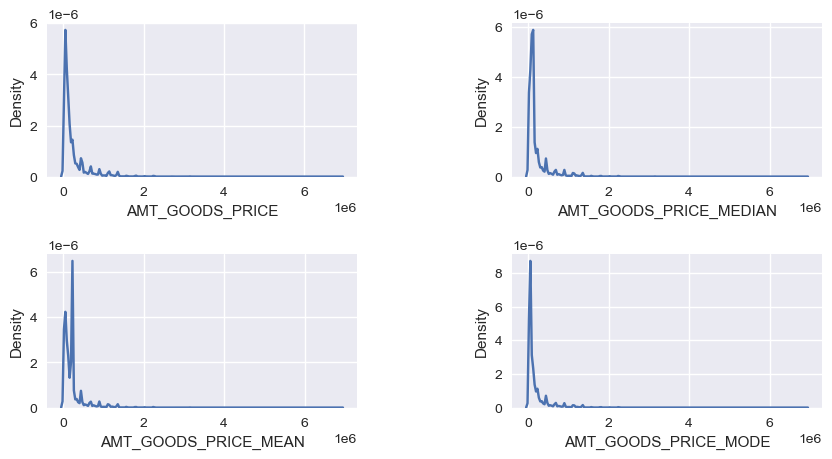

In [74]:
plt.figure(figsize=(10,5))

for i, col in enumerate(goodsp_cols):
    plt.subplot(2,2,i+1)
    sns.kdeplot(data=prev_app_msg_cleaned,x=col)
    plt.subplots_adjust(wspace=0.5,hspace=0.5)

In [75]:
prev_app_msg_cleaned['AMT_GOODS_PRICE'] = prev_app_msg_cleaned['AMT_GOODS_PRICE'].fillna(prev_app_msg_cleaned['AMT_GOODS_PRICE'].median())

In [76]:
prev_app_msg_cleaned['AMT_GOODS_PRICE'].isnull().sum()

0

### Statistical Analysis of `AMT_ANNUITY`

This analysis calculates key statistics for the `AMT_ANNUITY` column, providing insights into its central tendency and range, as well as identifying any remaining missing values.

- **Key Statistics:**
  - **Mean**: Represents the average annuity amount across all records.
  - **Median**: Indicates the middle value of annuity amounts, providing a measure of central tendency less influenced by outliers.
  - **Maximum**: Shows the highest annuity amount recorded in the dataset, highlighting the upper range of the data.

- **Additional Context:**
  - **Number of Null Values**: 0 (all missing values imputed).
  - **Total Records**: The column now has no missing values, ensuring completeness for subsequent analyses.
  
This summary provides an overview of the annuity amounts and ensures that the `AMT_ANNUITY` column is fully prepared for further analysis or modeling.


In [77]:
# Calculate statistics for AMT_ANNUITY
print("Statistics for AMT_ANNUITY:")
print("-" * 50)

mean = prev_app_msg_cleaned['AMT_ANNUITY'].mean()
median = prev_app_msg_cleaned['AMT_ANNUITY'].median()
maxv = prev_app_msg_cleaned['AMT_ANNUITY'].max()
print(f"Mean: {mean:,.2f}")
print(f"Median: {median:,.2f}")
print(f"Max: {maxv:,.2f}")

# Additional context
print(f"\nNumber of null values: {prev_app_msg_cleaned['AMT_ANNUITY'].isnull().sum():,}")
print(f"Total number of records: {len(prev_app_msg_cleaned):,}")

Statistics for AMT_ANNUITY:
--------------------------------------------------
Mean: 15,955.12
Median: 11,250.00
Max: 418,058.15

Number of null values: 372,235
Total number of records: 1,670,214


### Median Imputation for `AMT_ANNUITY`

In this step, missing values in the `AMT_ANNUITY` feature are replaced with the **median** value of the column. This approach is particularly useful for handling skewed data, as it reduces the effect of extreme values while providing a robust central tendency for the imputed values.

- **Steps:**
  - Identified missing values in `AMT_ANNUITY`.
  - Applied **median imputation** to fill these gaps.
  - Verified that all missing values have been successfully replaced by confirming that the null count is now zero.

- **Outcome:**
  - This imputation ensures a complete `AMT_ANNUITY` column without missing data, making it ready for further analysis while maintaining data integrity against the influence of outliers.


In [78]:
prev_app_msg_cleaned['AMT_ANNUITY']=prev_app_msg_cleaned['AMT_ANNUITY'].fillna(prev_app_msg_cleaned['AMT_ANNUITY'].median())

In [79]:
prev_app_msg_cleaned['AMT_ANNUITY'].isnull().sum()

0

### Mode Imputation for `PRODUCT_COMBINATION`

The `PRODUCT_COMBINATION` column, which includes categorical information about the product combinations in loan applications, contains some missing values. Since this is a categorical variable, the **mode (most frequent value)** is used to fill in these missing entries, preserving the data's categorical nature.

- **Steps:**
  - Examine the first few rows of the `PRODUCT_COMBINATION` column.
  - Identify missing values and filled them with the **mode** of the column.
  - Verify that all missing values have been successfully imputed.

- **Outcome:**
  - The `PRODUCT_COMBINATION` will have complete column entries, with missing values replaced by the most common category. This ensures consistency and maintains the categorical distribution of the data.


In [80]:
prev_app_msg_cleaned['PRODUCT_COMBINATION'].head()

0    POS mobile with interest
1            Cash X-Sell: low
2           Cash X-Sell: high
3         Cash X-Sell: middle
4           Cash Street: high
Name: PRODUCT_COMBINATION, dtype: object

In [81]:
prev_app_msg_cleaned['PRODUCT_COMBINATION']=prev_app_msg_cleaned['PRODUCT_COMBINATION'].fillna(prev_app_msg_cleaned['PRODUCT_COMBINATION'].mode()[0])

In [82]:
prev_app_msg_cleaned['PRODUCT_COMBINATION'].isnull().sum()

0

### Imputation for `AMT_CREDIT`
Impute `AMT_CREDIT` column in the `prev_app_msg_cleaned` dataset using the median value for all missing entries, ensuring data consistency and completeness across this feature.

#### Key Details:
- **Imputation Method**: Median
- **Total Missing Values After Imputation**: 0

This step enables seamless analysis of `AMT_CREDIT` without the impact of missing data, providing a more accurate foundation for further insights.


In [83]:
prev_app_msg_cleaned['AMT_CREDIT']=prev_app_msg_cleaned['AMT_CREDIT'].fillna(prev_app_msg_cleaned['AMT_CREDIT'].median())

In [84]:
prev_app_msg_cleaned['AMT_CREDIT'].isnull().sum()

0

### Statistics Calculation for `CNT_PAYMENT`

Key statistics for the `CNT_PAYMENT` column which represents the count of payments related to each record in the `prev_app_msg_cleaned` dataset. 

#### Code Functionality:
- **Mean**: Calculate the average number of payments.
- **Median**: Provide the median value, giving a central point in the data distribution.
- **Max**: Determine the maximum number of payments recorded in this column.
  
Additional context is provided to identify:
- **Null Values**: Check the number of missing values in `CNT_PAYMENT`.
- **Total Records**: Display the overall size of the dataset to understand the proportion of missing data.

This statistical overview assists in understanding payment patterns and can highlight potential outliers or areas needing further exploration.


In [85]:
# Calculate statistics for CNT_PAYMENT
print("Statistics for CNT_PAYMENT:")
print("-" * 50)

mean = prev_app_msg_cleaned['CNT_PAYMENT'].mean()
median = prev_app_msg_cleaned['CNT_PAYMENT'].median()
maxp = prev_app_msg_cleaned['CNT_PAYMENT'].max()
print(f"Mean: {mean:,.2f}")
print(f"Median: {median:,.2f}")
print(f"Max: {maxp:,.2f}")

# Additional context
print(f"\nNumber of null values: {prev_app_msg_cleaned['CNT_PAYMENT'].isnull().sum():,}")
print(f"Total number of records: {len(prev_app_msg_cleaned):,}")

Statistics for CNT_PAYMENT:
--------------------------------------------------
Mean: 16.05
Median: 12.00
Max: 84.00

Number of null values: 372,230
Total number of records: 1,670,214


### Handling Missing Values in `CNT_PAYMENT` by Contract Status

Analyzes missing values in the `CNT_PAYMENT` column to understand their distribution across different contract statuses, Then fill these missing values with `0`, assuming that records with null payment counts may represent cases with no scheduled payments.

#### Method:
1. **Grouping by `NAME_CONTRACT_STATUS`**: 
   - Group records with missing values in `CNT_PAYMENT` by `NAME_CONTRACT_STATUS`, showing the count of missing values for each contract status.
   
2. **Imputation of Missing Values**:
   - replace missing values with '0' in the `CNT_PAYMENT` column, indicating no scheduled payments for these records.

3. **Verification**:
   - After imputation, verify that all missing values are handled by outputting the count of nulls for each column.

This approach is useful for dealing with missing values in cases where `CNT_PAYMENT` may not be applicable, aligning all records with a non-null value for consistent data analysis.


In [86]:
prev_app_msg_cleaned[prev_app_msg_cleaned['CNT_PAYMENT'].isnull()].groupby(['NAME_CONTRACT_STATUS']).size().sort_values(ascending=False)

NAME_CONTRACT_STATUS
Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
dtype: int64

In [87]:
prev_app_msg_cleaned['CNT_PAYMENT'] = prev_app_msg_cleaned['CNT_PAYMENT'].fillna(0)

In [88]:
prev_app_msg_cleaned.isnull().sum().sort_values(ascending=False)

SK_ID_PREV                0
NAME_GOODS_CATEGORY       0
AMT_GOODS_PRICE_MEAN      0
AMT_GOODS_PRICE_MEDIAN    0
PRODUCT_COMBINATION       0
NAME_YIELD_GROUP          0
CNT_PAYMENT               0
NAME_SELLER_INDUSTRY      0
SELLERPLACE_AREA          0
CHANNEL_TYPE              0
NAME_PRODUCT_TYPE         0
NAME_PORTFOLIO            0
NAME_CLIENT_TYPE          0
SK_ID_CURR                0
CODE_REJECT_REASON        0
NAME_PAYMENT_TYPE         0
DAYS_DECISION             0
NAME_CONTRACT_STATUS      0
NAME_CASH_LOAN_PURPOSE    0
AMT_GOODS_PRICE           0
AMT_CREDIT                0
AMT_APPLICATION           0
AMT_ANNUITY               0
NAME_CONTRACT_TYPE        0
AMT_GOODS_PRICE_MODE      0
dtype: int64

### Dropping Temporary Columns for `AMT_GOODS_PRICE` Imputation Variants

Removes temporary columns that were created for analyzing different imputation methods of `AMT_GOODS_PRICE` (specifically median, mean, and mode-based imputations). 

#### Method:
1. **Column Removal**:
   - Drop `AMT_GOODS_PRICE_MEDIAN`, `AMT_GOODS_PRICE_MEAN`, and `AMT_GOODS_PRICE_MODE` columns from the DataFrame, as these columns were used for comparative analysis and are no longer needed.

2. **Verification**:
   - After dropping these columns, display the count of null values for each remaining column, confirming that all temporary imputation columns have been successfully removed and that there are no unintended nulls in the dataset.

This step refines the dataset to maintain only essential columns, improving data clarity for further analysis.

In [89]:
prev_app_cols_rmvd = prev_app_msg_cleaned.drop(labels=['AMT_GOODS_PRICE_MEDIAN', 'AMT_GOODS_PRICE_MEAN', 'AMT_GOODS_PRICE_MODE'],axis=1)

In [90]:
prev_app_cols_rmvd.isnull().sum().sort_values(ascending=False)

SK_ID_PREV                0
SK_ID_CURR                0
NAME_YIELD_GROUP          0
CNT_PAYMENT               0
NAME_SELLER_INDUSTRY      0
SELLERPLACE_AREA          0
CHANNEL_TYPE              0
NAME_PRODUCT_TYPE         0
NAME_PORTFOLIO            0
NAME_GOODS_CATEGORY       0
NAME_CLIENT_TYPE          0
CODE_REJECT_REASON        0
NAME_PAYMENT_TYPE         0
DAYS_DECISION             0
NAME_CONTRACT_STATUS      0
NAME_CASH_LOAN_PURPOSE    0
AMT_GOODS_PRICE           0
AMT_CREDIT                0
AMT_APPLICATION           0
AMT_ANNUITY               0
NAME_CONTRACT_TYPE        0
PRODUCT_COMBINATION       0
dtype: int64

In [91]:
len(prev_app_cols_rmvd.columns)

22

### Merging and Exploring Loan and Contract Data with Target Status

Merged data of current and previous applications based on loan purpose, contract status, and default status (`TARGET`).

#### Code Functionality and Visualizations:

1. **Merge Datasets**:
   - Combine `cleaned_application_data` and `prev_app_cols_rmvd` DataFrames on the `SK_ID_CURR` key using an inner join.
   - This merges current and previous application details, creating a consolidated view for detailed analysis.

2. **Visualize Loan Purpose vs. Contract Status**:
   - Plot a count of each `NAME_CASH_LOAN_PURPOSE` grouped by `NAME_CONTRACT_STATUS` using a bar plot.
   - Set the y-axis scale to logarithmic (`yscale('log')`) to manage any high-value skew and improve readability.

3. **Visualize Contract Status by Target (Default) Status**:
   - Create a count plot to show the distribution of `NAME_CONTRACT_STATUS` segmented by `TARGET` values, representing good-standing and defaulting clients.

4. **Calculate and Visualize Percentage Distribution**:
   - **By Contract Status**:
     - Group data by `NAME_CONTRACT_STATUS` and `TARGET`, calculate the percentage of each contract status within the respective `TARGET` group.
   - **By Loan Purpose**:
     - Group by `NAME_CASH_LOAN_PURPOSE` and `TARGET`, calculate the proportion of each loan purpose within the default (`TARGET = 1`) and non-default (`TARGET = 0`) segments.

5. **Income Analysis by Contract Status and Target**:
   - Plot `AMT_INCOME_TOTAL` with `NAME_CONTRACT_STATUS` as the x-axis and `TARGET` as the hue, using a line plot.
   - This visual will help to assess income patterns based on contract type and default status.

These steps allow for a deeper understanding of loan purpose, contract status, and income relationships, highlighting patterns in loan purpose distributions and default rates.


In [92]:
len(cleaned_application_data.columns)

44

In [93]:
cleaned_application_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'AMT_GOODS_PRICE_RANGE'

In [94]:
merged_df = pd.merge(cleaned_application_data, prev_app_cols_rmvd,how='inner', on='SK_ID_CURR')
merged_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER  CNT_CHILDREN  \
0      100002       1           Cash loans           M             0   
1      100003       0           Cash loans           F             0   
2      100003       0           Cash loans           F             0   
3      100003       0           Cash loans           F             0   
4      100004       0      Revolving loans           M             0   

   AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  \
0          202500.0      406597.5        24700.5           351000.0   
1          270000.0     1293502.5        35698.5          1129500.0   
2          270000.0     1293502.5        35698.5          1129500.0   
3          270000.0     1293502.5        35698.5          1129500.0   
4           67500.0      135000.0         6750.0           135000.0   

  NAME_TYPE_SUITE  ... NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY NAME_PORTFOLIO  \
0   Unaccompanied  ...              New              Vehicles            POS   
1          Family  ...         Repeater                   XNA           Cash   
2          Family  ...        Refreshed             Furniture            POS   
3          Family  ...        Refreshed  Consumer Electronics            POS   
4   Unaccompanied  ...              New                Mobile            POS   

  NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  \
0               XNA                    Stone               500   
1            x-sell  Credit and cash offices                -1   
2               XNA                    Stone              1400   
3               XNA             Country-wide               200   
4               XNA         Regional / Local                30   

   NAME_SELLER_INDUSTRY  CNT_PAYMENT  NAME_YIELD_GROUP  \
0       Auto technology         24.0        low_normal   
1                   XNA         12.0        low_normal   
2             Furniture          6.0            middle   
3  Consumer electronics         12.0            middle   
4          Connectivity          4.0            middle   

           PRODUCT_COMBINATION  
0      POS other with interest  
1             Cash X-Sell: low  
2   POS industry with interest  
3  POS household with interest  
4  POS mobile without interest  

[5 rows x 65 columns]

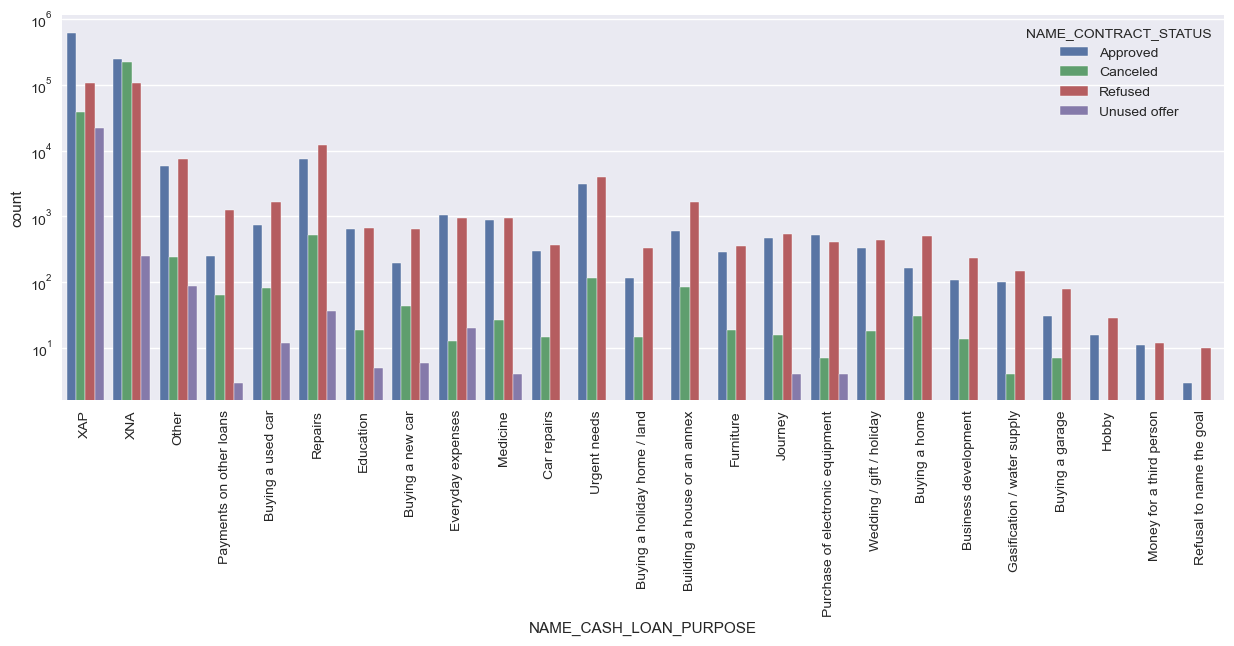

In [97]:
plt.figure(figsize=(15,5))

sns.countplot(data=merged_df,x='NAME_CASH_LOAN_PURPOSE', hue='NAME_CONTRACT_STATUS')
plt.xticks(rotation=90)
plt.yscale('log')

<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='count'>

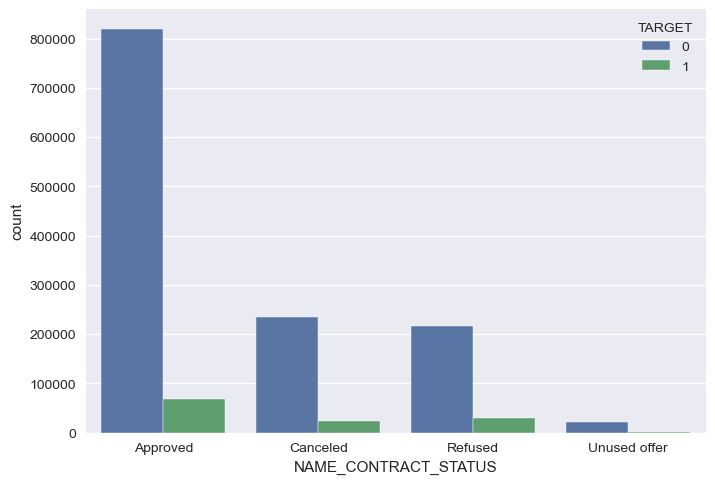

In [98]:
sns.countplot(data=merged_df,x='NAME_CONTRACT_STATUS',hue='TARGET')

In [100]:
merged_agg = merged_df.groupby(['NAME_CONTRACT_STATUS', 'TARGET']).size().reset_index().rename(columns={0:'counts'})
sum_df = merged_agg.groupby(['NAME_CONTRACT_STATUS'])['counts'].sum().reset_index()

merged_agg_2 = pd.merge(merged_agg, sum_df, how='left', on='NAME_CONTRACT_STATUS')
merged_agg_2['pct'] = round(merged_agg_2['counts_x']/merged_agg_2['counts_y']*100,2)
merged_agg_2

NAME_CONTRACT_STATUS  TARGET  counts_x  counts_y    pct
0             Approved       0    818856    886099  92.41
1             Approved       1     67243    886099   7.59
2             Canceled       0    235641    259441  90.83
3             Canceled       1     23800    259441   9.17
4              Refused       0    215952    245390  88.00
5              Refused       1     29438    245390  12.00
6         Unused offer       0     20892     22771  91.75
7         Unused offer       1      1879     22771   8.25

<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='AMT_INCOME_TOTAL'>

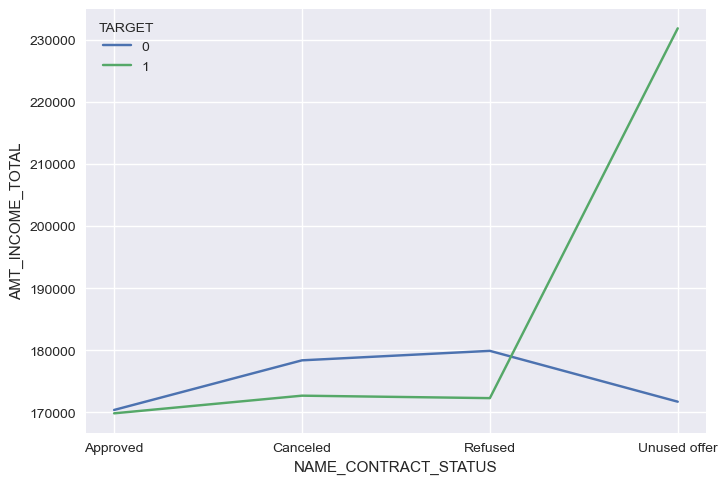

In [102]:
sns.lineplot(data=merged_df,x='NAME_CONTRACT_STATUS',y='AMT_INCOME_TOTAL',ci=None,hue='TARGET')

In [101]:
merged_aggr = merged_df.groupby(['NAME_CASH_LOAN_PURPOSE', 'TARGET']).size().reset_index().rename(columns={0:'counts'})
summ_df = merged_aggr.groupby(['NAME_CASH_LOAN_PURPOSE'])['counts'].sum().reset_index()

merged_aggr_2 = pd.merge(merged_aggr, summ_df, how='left', on='NAME_CASH_LOAN_PURPOSE')
merged_aggr_2['pct'] = round(merged_aggr_2['counts_x']/merged_aggr_2['counts_y']*100,2)
merged_aggr_2

NAME_CASH_LOAN_PURPOSE  TARGET  counts_x  counts_y    pct
0       Building a house or an annex       0      2020      2344  86.18
1       Building a house or an annex       1       324      2344  13.82
2               Business development       0       313       359  87.19
3               Business development       1        46       359  12.81
4                    Buying a garage       0       109       116  93.97
5                    Buying a garage       1         7       116   6.03
6       Buying a holiday home / land       0       408       463  88.12
7       Buying a holiday home / land       1        55       463  11.88
8                      Buying a home       0       617       701  88.02
9                      Buying a home       1        84       701  11.98
10                  Buying a new car       0       806       886  90.97
11                  Buying a new car       1        80       886   9.03
12                 Buying a used car       0      2151      2469  87.12
13                 Buying a used car       1       318      2469  12.88
14                       Car repairs       0       564       691  81.62
15                       Car repairs       1       127       691  18.38
16                         Education       0      1194      1334  89.51
17                         Education       1       140      1334  10.49
18                 Everyday expenses       0      1836      2052  89.47
19                 Everyday expenses       1       216      2052  10.53
20                         Furniture       0       575       660  87.12
21                         Furniture       1        85       660  12.88
22       Gasification / water supply       0       206       251  82.07
23       Gasification / water supply       1        45       251  17.93
24                             Hobby       0        36        45  80.00
25                             Hobby       1         9        45  20.00
26                           Journey       0       931      1042  89.35
27                           Journey       1       111      1042  10.65
28                          Medicine       0      1620      1871  86.58
29                          Medicine       1       251      1871  13.42
30          Money for a third person       0        19        23  82.61
31          Money for a third person       1         4        23  17.39
32                             Other       0     11759     13432  87.54
33                             Other       1      1673     13432  12.46
34           Payments on other loans       0      1321      1573  83.98
35           Payments on other loans       1       252      1573  16.02
36  Purchase of electronic equipment       0       817       934  87.47
37  Purchase of electronic equipment       1       117       934  12.53
38          Refusal to name the goal       0        10        13  76.92
39          Refusal to name the goal       1         3        13  23.08
40                           Repairs       0     17501     20117  87.00
41                           Repairs       1      2616     20117  13.00
42                      Urgent needs       0      6154      7236  85.05
43                      Urgent needs       1      1082      7236  14.95
44          Wedding / gift / holiday       0       707       801  88.26
45          Wedding / gift / holiday       1        94       801  11.74
46                               XAP       0    721774    786937  91.72
47                               XAP       1     65163    786937   8.28
48                               XNA       0    517893    567351  91.28
49                               XNA       1     49458    567351   8.72

### Key Insights and Conclusions

#### Loan Type and Default Trends
- **Loan Types**:
  - A majority of customers have taken cash loans.
  - Customers with cash loans are observed to have a lower likelihood of defaulting.

- **Gender Analysis**:
  - Females account for the majority of loan recipients, with a default rate of approximately 7%, which is lower and safer compared to males.

#### Loan Characteristics and Customer Profiles
- **Accompaniment Status (NAME_TYPE_SUITE)**:
  - Loans are most frequently taken by individuals marked as "Unaccompanied," with a default rate of ~8.5%, which is within acceptable limits.

- **Income Source (NAME_INCOME_TYPE)**:
  - Working professionals, commercial associates, and pensioners represent the safest segments for lending.

- **Education Level (NAME_EDUCATION_TYPE)**:
  - Borrowers with higher education levels exhibit the lowest default rates, at under 5%, making them a particularly low-risk segment.

- **Family Status (NAME_FAMILY_STATUS)**:
  - Married individuals have a lower risk of default, with an average default rate of 8%, making them safer candidates for lending.

- **Housing Type (NAME_HOUSING_TYPE)**:
  - Borrowers with their own house or apartment have an average default rate of 8%, indicating a low risk of default.

#### Occupational Insights
- **Occupation Analysis**:
  - Occupations such as low-skilled laborers and drivers show higher default rates, making them higher-risk segments.
  - Safer segments include accountants, core staff, managers, and laborers, with default rates between 7.5% and 10%.

- **Organization Type (ORGANIZATION_TYPE)**:
  - The transportation sector, particularly “Transport Type 3,” has the highest default rates.
  - Sectors like "Business Entity Type 3" and "Self-employed" demonstrate lower default rates, around 10%, making them moderate-risk segments.

#### Financial Profile and Loan Amount Analysis
- **Loan Amount Ranges**:
  - Most loans were issued for goods valued between 0 and 1 million.
  - The common credit amount range is also between 0 and 1 million, with customers paying an annuity of 0 to 50K.
  - The majority of customers have an annual income of less than 1 million.

#### Bivariate Analysis and Loan Safety Indicators
- **Income and Credit Trends**:
  - Credit amount and goods price show a positive correlation; as credit increases, default rates tend to decrease.
  - Customers with an annual income under 1 million are more likely to seek loans, and loans under 1.5 million in this segment show higher default potential.
  - Borrowers with one to four children are considered safer candidates for lending.
  - An annuity threshold of 100K appears to attract reliable borrowers who are more likely to pay back loans under 1.5 million.

#### Merged Data Insights on Loan Purpose and Default Rates
- **Previous Loan Purpose**:
  - Previous loans taken for "Repairing" purposes are frequently associated with cancellations, and current loan defaults are also notably high in this category, despite applicants’ higher income levels.
  - Historical applications (either canceled or refused) were often for repair purposes, and a majority of these previously unused loan offers now exhibit high default rates.

### Recommendations for Lending Strategy

1. **Focus on Cash Loan Products**:
   - Prioritize cash loans, as they exhibit a lower risk of default compared to other loan types, potentially due to simpler terms and repayment structures.

2. **Segment Lending by Customer Profile**:
   - **Gender**: Target female customers for lending opportunities due to their lower average default rates.
   - **Family Status**: Focus on married applicants who show a safer risk profile, with default rates around 8%.
   - **Housing Type**: Prefer lending to individuals with stable housing situations, such as those with their own house or apartment, as they have a lower likelihood of default.

3. **Prioritize Safer Occupations and Organizations**:
   - **Occupation**: Consider low-risk occupations like accountants, core staff, and managers, with default rates under 10%.
   - **Organization Type**: Avoid the transportation sector, particularly “Transport Type 3,” due to high default rates, and instead target business entities like "Self-employed" and "Business Entity Type 3" with relatively lower default risks.

4. **Optimize Loan Amounts for Safer Lending**:
   - Focus on loans up to 1 million for credit and goods purchases, as most customers in this range are reliable, and larger loans correlate with lower defaults.
   - Set annuity limits, favoring those who can commit to an annuity payment threshold of 100K, as it attracts more reliable borrowers.

5. **Adjust Loan Strategy for Income-Based Risks**:
   - Prioritize applicants with annual incomes below 1 million but offer stringent monitoring for loans above 1.5 million in this group due to increased default risk.

6. **Reassess Repair-Related Loan Offers**:
   - Given the high rate of defaults associated with loans for repair purposes, consider stricter terms or reduced offers for these purposes, particularly among high-income applicants who have a history of unused loan offers.

7. **Leverage Education Level as a Key Risk Indicator**:
   - Offer preferential loan terms to borrowers with higher education levels, as they have the lowest observed default rates (<5%).

By implementing these recommendations, the bank can better manage risk while targeting safer customer segments and loan products. This strategic approach should enhance loan performance and contribute to a lower overall default rate.
